In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.stats import genpareto as gpd
import random
from datetime import datetime, timedelta
import scipy



In [2]:
#load input data
list_IDs = np.load('E://thesis_datasets/NL_extreme_index.npy', allow_pickle=True)
list_IDs = list_IDs.tolist()
extreme_IDs = list_IDs[:2170]

evt = random.sample(extreme_IDs, 200)

event_IDs = evt
print(len(event_IDs))



200


In [73]:
# Global parameter: divide each image to n * n parts, and fit each part with a separate set of GPD parameter.
n=4

In [74]:
for i in range(n):
    for j in range(n):
        locals()['a'+str(i)+str(j)] = []


In [76]:
# n*n
calibration = int(440/n)

index = 0
for node in event_IDs:
    year = node[0:4]
    month = node[4:6]
    filename = "G://" + year + "/" + month + "/" + "RAD_NL25_RAP_5min_" + node + ".h5"
    f = h5py.File(filename)['image1']['image_data']
    f = np.array(list(f))
    f = np.where(f == 65535, 0, f)
    f = f[202: 642, 150: 590]
    f = f * 0.12

    for i in range(n):
        for j in range(n):
            for row in range(i*calibration,(i+1)*calibration):
                for col in range(j*calibration,(j+1)*calibration):
                    if(f[row][col]>=5):
                        eval('a' + str(i) + str(j)).append(f[row][col])

     
    index += 1
    print(index)





1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [77]:
u = np.zeros((n,n))
delta = np.ones((n,n))
c = np.ones((n,n))

In [83]:
# Fir GPD parameters
for i in range(n):
    for j in range(n):
        high_data = list(filter(lambda x: x >= 5, eval('a' + str(i) + str(j))))
        if len(high_data)!=0:
            shape_h, loc_h, scale_h = gpd.fit(high_data)
            u[i][j] = loc_h
            delta[i][j] = scale_h
            c[i][j] = shape_h
        print("pixel"+str(i)+","+str(j))
        #print("u = "+ str(u))
        #print("delta = "+ str(delta))
        #print("c ="+ str(c))
        print(len(high_data))

pixel0,0
0
pixel0,1
0
pixel0,2
0
pixel0,3
0
pixel0,4
0
pixel0,5
0
pixel0,6
0
pixel0,7
0
pixel0,8
0
pixel0,9
0
pixel0,10
0
pixel0,11
0
pixel0,12
0
pixel0,13
0
pixel0,14
0
pixel0,15
0
pixel0,16
0
pixel0,17
0
pixel0,18
0
pixel0,19
0
pixel0,20
0
pixel0,21
0
pixel0,22
0
pixel0,23
0
pixel0,24
0
pixel0,25
0
pixel0,26
0
pixel0,27
0
pixel0,28
0
pixel0,29
0
pixel0,30
0
pixel0,31
0
pixel0,32
0
pixel0,33
0
pixel0,34
0
pixel0,35
0
pixel0,36
0
pixel0,37
0
pixel0,38
0
pixel0,39
0
pixel0,40
0
pixel0,41
0
pixel0,42
0
pixel0,43
0
pixel0,44
0
pixel0,45
0
pixel0,46
0
pixel0,47
0
pixel0,48
0
pixel0,49
0
pixel0,50
0
pixel0,51
0
pixel0,52
0
pixel0,53
0
pixel0,54
0
pixel0,55
0
pixel0,56
0
pixel0,57
0
pixel0,58
0
pixel0,59
0
pixel0,60
0
pixel0,61
0
pixel0,62
0
pixel0,63
0
pixel0,64
0
pixel0,65
0
pixel0,66
0
pixel0,67
0
pixel0,68
0
pixel0,69
0
pixel0,70
0
pixel0,71
0
pixel0,72
0
pixel0,73
0
pixel0,74
0
pixel0,75
0
pixel0,76
0
pixel0,77
0
pixel0,78
0
pixel0,79
0
pixel0,80
0
pixel0,81
0
pixel0,82
0
pixel0,83
0
pi

0
pixel2,393
0
pixel2,394
0
pixel2,395
0
pixel2,396
0
pixel2,397
0
pixel2,398
0
pixel2,399
0
pixel2,400
0
pixel2,401
0
pixel2,402
0
pixel2,403
0
pixel2,404
0
pixel2,405
0
pixel2,406
0
pixel2,407
0
pixel2,408
0
pixel2,409
0
pixel2,410
0
pixel2,411
0
pixel2,412
0
pixel2,413
0
pixel2,414
0
pixel2,415
0
pixel2,416
0
pixel2,417
0
pixel2,418
0
pixel2,419
0
pixel2,420
0
pixel2,421
0
pixel2,422
0
pixel2,423
0
pixel2,424
0
pixel2,425
0
pixel2,426
0
pixel2,427
0
pixel2,428
0
pixel2,429
0
pixel2,430
0
pixel2,431
0
pixel2,432
0
pixel2,433
0
pixel2,434
0
pixel2,435
0
pixel2,436
0
pixel2,437
0
pixel2,438
0
pixel2,439
0
pixel3,0
0
pixel3,1
0
pixel3,2
0
pixel3,3
0
pixel3,4
0
pixel3,5
0
pixel3,6
0
pixel3,7
0
pixel3,8
0
pixel3,9
0
pixel3,10
0
pixel3,11
0
pixel3,12
0
pixel3,13
0
pixel3,14
0
pixel3,15
0
pixel3,16
0
pixel3,17
0
pixel3,18
0
pixel3,19
0
pixel3,20
0
pixel3,21
0
pixel3,22
0
pixel3,23
0
pixel3,24
0
pixel3,25
0
pixel3,26
0
pixel3,27
0
pixel3,28
0
pixel3,29
0
pixel3,30
0
pixel3,31
0
pixel3,32
0
p

0
pixel5,244
0
pixel5,245
0
pixel5,246
0
pixel5,247
0
pixel5,248
0
pixel5,249
0
pixel5,250
0
pixel5,251
0
pixel5,252
0
pixel5,253
0
pixel5,254
0
pixel5,255
0
pixel5,256
0
pixel5,257
0
pixel5,258
0
pixel5,259
0
pixel5,260
0
pixel5,261
0
pixel5,262
0
pixel5,263
0
pixel5,264
0
pixel5,265
0
pixel5,266
0
pixel5,267
0
pixel5,268
0
pixel5,269
0
pixel5,270
0
pixel5,271
0
pixel5,272
0
pixel5,273
0
pixel5,274
0
pixel5,275
0
pixel5,276
0
pixel5,277
0
pixel5,278
0
pixel5,279
0
pixel5,280
0
pixel5,281
0
pixel5,282
0
pixel5,283
0
pixel5,284
0
pixel5,285
0
pixel5,286
0
pixel5,287
0
pixel5,288
0
pixel5,289
0
pixel5,290
0
pixel5,291
0
pixel5,292
0
pixel5,293
0
pixel5,294
0
pixel5,295
0
pixel5,296
0
pixel5,297
0
pixel5,298
0
pixel5,299
0
pixel5,300
0
pixel5,301
0
pixel5,302
0
pixel5,303
0
pixel5,304
0
pixel5,305
0
pixel5,306
0
pixel5,307
0
pixel5,308
0
pixel5,309
0
pixel5,310
0
pixel5,311
0
pixel5,312
0
pixel5,313
0
pixel5,314
0
pixel5,315
0
pixel5,316
0
pixel5,317
0
pixel5,318
0
pixel5,319
0
pixel5,320

pixel7,180
1
pixel7,181
3
pixel7,182
5
pixel7,183
14
pixel7,184
9
pixel7,185
4
pixel7,186
4
pixel7,187
5
pixel7,188
6
pixel7,189
7
pixel7,190
6
pixel7,191
6
pixel7,192
7
pixel7,193
6
pixel7,194
5
pixel7,195
3
pixel7,196
3
pixel7,197
4
pixel7,198
4
pixel7,199
6
pixel7,200
0
pixel7,201
0
pixel7,202
0
pixel7,203
0
pixel7,204
0
pixel7,205
0
pixel7,206
0
pixel7,207
0
pixel7,208
0
pixel7,209
0
pixel7,210
0
pixel7,211
0
pixel7,212
0
pixel7,213
0
pixel7,214
0
pixel7,215
0
pixel7,216
0
pixel7,217
0
pixel7,218
0
pixel7,219
0
pixel7,220
0
pixel7,221
0
pixel7,222
0
pixel7,223
0
pixel7,224
0
pixel7,225
0
pixel7,226
0
pixel7,227
0
pixel7,228
0
pixel7,229
0
pixel7,230
0
pixel7,231
0
pixel7,232
0
pixel7,233
0
pixel7,234
0
pixel7,235
0
pixel7,236
0
pixel7,237
0
pixel7,238
0
pixel7,239
0
pixel7,240
0
pixel7,241
0
pixel7,242
0
pixel7,243
0
pixel7,244
0
pixel7,245
0
pixel7,246
0
pixel7,247
0
pixel7,248
0
pixel7,249
0
pixel7,250
0
pixel7,251
0
pixel7,252
0
pixel7,253
0
pixel7,254
0
pixel7,255
0
pixel7,256


pixel8,379
4
pixel8,380
5
pixel8,381
5
pixel8,382
4
pixel8,383
3
pixel8,384
3
pixel8,385
3
pixel8,386
2
pixel8,387
2
pixel8,388
2
pixel8,389
2
pixel8,390
3
pixel8,391
2
pixel8,392
1
pixel8,393
2
pixel8,394
2
pixel8,395
1
pixel8,396
3
pixel8,397
3
pixel8,398
2
pixel8,399
2
pixel8,400
0
pixel8,401
0
pixel8,402
0
pixel8,403
0
pixel8,404
0
pixel8,405
0
pixel8,406
0
pixel8,407
0
pixel8,408
0
pixel8,409
0
pixel8,410
0
pixel8,411
0
pixel8,412
0
pixel8,413
0
pixel8,414
0
pixel8,415
0
pixel8,416
0
pixel8,417
0
pixel8,418
0
pixel8,419
0
pixel8,420
0
pixel8,421
0
pixel8,422
0
pixel8,423
0
pixel8,424
0
pixel8,425
0
pixel8,426
0
pixel8,427
0
pixel8,428
0
pixel8,429
0
pixel8,430
0
pixel8,431
0
pixel8,432
0
pixel8,433
0
pixel8,434
0
pixel8,435
0
pixel8,436
0
pixel8,437
0
pixel8,438
0
pixel8,439
0
pixel9,0
0
pixel9,1
0
pixel9,2
0
pixel9,3
0
pixel9,4
0
pixel9,5
0
pixel9,6
0
pixel9,7
0
pixel9,8
0
pixel9,9
0
pixel9,10
0
pixel9,11
0
pixel9,12
0
pixel9,13
0
pixel9,14
0
pixel9,15
0
pixel9,16
0
pixel9,17
0
p

pixel10,153
1
pixel10,154
2
pixel10,155
2
pixel10,156
2
pixel10,157
2
pixel10,158
1
pixel10,159
1
pixel10,160
2
pixel10,161
4
pixel10,162
1
pixel10,163
1
pixel10,164
1
pixel10,165
1
pixel10,166
4
pixel10,167
3
pixel10,168
3
pixel10,169
4
pixel10,170
4
pixel10,171
4
pixel10,172
6
pixel10,173
5
pixel10,174
5
pixel10,175
4
pixel10,176
4
pixel10,177
3
pixel10,178
3
pixel10,179
2
pixel10,180
1
pixel10,181
2
pixel10,182
2
pixel10,183
2
pixel10,184
3
pixel10,185
2
pixel10,186
3
pixel10,187
3
pixel10,188
4
pixel10,189
3
pixel10,190
3
pixel10,191
3
pixel10,192
3
pixel10,193
1
pixel10,194
0
pixel10,195
0
pixel10,196
0
pixel10,197
1
pixel10,198
3
pixel10,199
4
pixel10,200
0
pixel10,201
0
pixel10,202
0
pixel10,203
0
pixel10,204
0
pixel10,205
0
pixel10,206
0
pixel10,207
0
pixel10,208
0
pixel10,209
0
pixel10,210
0
pixel10,211
0
pixel10,212
0
pixel10,213
0
pixel10,214
0
pixel10,215
0
pixel10,216
0
pixel10,217
0
pixel10,218
0
pixel10,219
0
pixel10,220
0
pixel10,221
0
pixel10,222
0
pixel10,223
0
pixel1

pixel11,346
1
pixel11,347
10
pixel11,348
9
pixel11,349
2
pixel11,350
2
pixel11,351
2
pixel11,352
2
pixel11,353
4
pixel11,354
5
pixel11,355
2
pixel11,356
2
pixel11,357
3
pixel11,358
4
pixel11,359
4
pixel11,360
1
pixel11,361
3
pixel11,362
3
pixel11,363
3
pixel11,364
2
pixel11,365
4
pixel11,366
5
pixel11,367
5
pixel11,368
5
pixel11,369
5
pixel11,370
5
pixel11,371
4
pixel11,372
5
pixel11,373
4
pixel11,374
3
pixel11,375
3
pixel11,376
3
pixel11,377
3
pixel11,378
3
pixel11,379
3
pixel11,380
3
pixel11,381
2
pixel11,382
1
pixel11,383
2
pixel11,384
2
pixel11,385
2
pixel11,386
2
pixel11,387
4
pixel11,388
4
pixel11,389
2
pixel11,390
4
pixel11,391
4
pixel11,392
1
pixel11,393
1
pixel11,394
1
pixel11,395
1
pixel11,396
0
pixel11,397
0
pixel11,398
0
pixel11,399
1
pixel11,400
0
pixel11,401
0
pixel11,402
0
pixel11,403
0
pixel11,404
0
pixel11,405
0
pixel11,406
0
pixel11,407
0
pixel11,408
0
pixel11,409
0
pixel11,410
0
pixel11,411
0
pixel11,412
0
pixel11,413
0
pixel11,414
0
pixel11,415
0
pixel11,416
0
pixel

pixel13,137
1
pixel13,138
4
pixel13,139
3
pixel13,140
3
pixel13,141
2
pixel13,142
1
pixel13,143
1
pixel13,144
1
pixel13,145
0
pixel13,146
0
pixel13,147
0
pixel13,148
0
pixel13,149
0
pixel13,150
2
pixel13,151
3
pixel13,152
4
pixel13,153
4
pixel13,154
4
pixel13,155
3
pixel13,156
3
pixel13,157
1
pixel13,158
1
pixel13,159
1
pixel13,160
1
pixel13,161
1
pixel13,162
1
pixel13,163
1
pixel13,164
2
pixel13,165
4
pixel13,166
5
pixel13,167
5
pixel13,168
5
pixel13,169
5
pixel13,170
5
pixel13,171
3
pixel13,172
2
pixel13,173
2
pixel13,174
3
pixel13,175
5
pixel13,176
7
pixel13,177
7
pixel13,178
6
pixel13,179
5
pixel13,180
6
pixel13,181
6
pixel13,182
6
pixel13,183
6
pixel13,184
6
pixel13,185
6
pixel13,186
4
pixel13,187
3
pixel13,188
1
pixel13,189
1
pixel13,190
3
pixel13,191
3
pixel13,192
3
pixel13,193
3
pixel13,194
3
pixel13,195
4
pixel13,196
3
pixel13,197
1
pixel13,198
1
pixel13,199
3
pixel13,200
0
pixel13,201
0
pixel13,202
0
pixel13,203
0
pixel13,204
0
pixel13,205
0
pixel13,206
0
pixel13,207
0
pixel1

pixel14,291
4
pixel14,292
2
pixel14,293
2
pixel14,294
2
pixel14,295
4
pixel14,296
5
pixel14,297
6
pixel14,298
3
pixel14,299
6
pixel14,300
0
pixel14,301
0
pixel14,302
0
pixel14,303
0
pixel14,304
0
pixel14,305
0
pixel14,306
0
pixel14,307
0
pixel14,308
0
pixel14,309
0
pixel14,310
0
pixel14,311
0
pixel14,312
0
pixel14,313
0
pixel14,314
0
pixel14,315
0
pixel14,316
0
pixel14,317
0
pixel14,318
0
pixel14,319
0
pixel14,320
0
pixel14,321
0
pixel14,322
0
pixel14,323
0
pixel14,324
0
pixel14,325
0
pixel14,326
0
pixel14,327
0
pixel14,328
1
pixel14,329
1
pixel14,330
1
pixel14,331
0
pixel14,332
1
pixel14,333
2
pixel14,334
1
pixel14,335
1
pixel14,336
1
pixel14,337
1
pixel14,338
1
pixel14,339
0
pixel14,340
0
pixel14,341
0
pixel14,342
0
pixel14,343
0
pixel14,344
1
pixel14,345
2
pixel14,346
1
pixel14,347
1
pixel14,348
2
pixel14,349
3
pixel14,350
3
pixel14,351
4
pixel14,352
2
pixel14,353
2
pixel14,354
2
pixel14,355
2
pixel14,356
1
pixel14,357
2
pixel14,358
3
pixel14,359
4
pixel14,360
5
pixel14,361
6
pixel1

pixel16,121
1
pixel16,122
0
pixel16,123
0
pixel16,124
0
pixel16,125
1
pixel16,126
1
pixel16,127
0
pixel16,128
0
pixel16,129
0
pixel16,130
0
pixel16,131
0
pixel16,132
0
pixel16,133
0
pixel16,134
0
pixel16,135
0
pixel16,136
1
pixel16,137
1
pixel16,138
1
pixel16,139
3
pixel16,140
3
pixel16,141
6
pixel16,142
7
pixel16,143
7
pixel16,144
6
pixel16,145
7
pixel16,146
7
pixel16,147
8
pixel16,148
5
pixel16,149
6
pixel16,150
7
pixel16,151
9
pixel16,152
7
pixel16,153
3
pixel16,154
4
pixel16,155
5
pixel16,156
5
pixel16,157
3
pixel16,158
5
pixel16,159
6
pixel16,160
8
pixel16,161
8
pixel16,162
7
pixel16,163
6
pixel16,164
7
pixel16,165
7
pixel16,166
9
pixel16,167
8
pixel16,168
8
pixel16,169
9
pixel16,170
7
pixel16,171
7
pixel16,172
6
pixel16,173
4
pixel16,174
6
pixel16,175
6
pixel16,176
6
pixel16,177
6
pixel16,178
6
pixel16,179
4
pixel16,180
6
pixel16,181
7
pixel16,182
9
pixel16,183
9
pixel16,184
9
pixel16,185
7
pixel16,186
6
pixel16,187
4
pixel16,188
5
pixel16,189
5
pixel16,190
4
pixel16,191
4
pixel1

pixel18,422
3
pixel18,423
3
pixel18,424
2
pixel18,425
1
pixel18,426
2
pixel18,427
2
pixel18,428
2
pixel18,429
2
pixel18,430
3
pixel18,431
2
pixel18,432
3
pixel18,433
4
pixel18,434
4
pixel18,435
2
pixel18,436
1
pixel18,437
3
pixel18,438
3
pixel18,439
3
pixel19,0
0
pixel19,1
0
pixel19,2
0
pixel19,3
0
pixel19,4
0
pixel19,5
0
pixel19,6
0
pixel19,7
0
pixel19,8
0
pixel19,9
0
pixel19,10
0
pixel19,11
0
pixel19,12
0
pixel19,13
0
pixel19,14
0
pixel19,15
0
pixel19,16
0
pixel19,17
0
pixel19,18
0
pixel19,19
0
pixel19,20
0
pixel19,21
0
pixel19,22
0
pixel19,23
0
pixel19,24
0
pixel19,25
0
pixel19,26
0
pixel19,27
0
pixel19,28
0
pixel19,29
0
pixel19,30
0
pixel19,31
0
pixel19,32
0
pixel19,33
0
pixel19,34
0
pixel19,35
0
pixel19,36
0
pixel19,37
0
pixel19,38
0
pixel19,39
0
pixel19,40
0
pixel19,41
0
pixel19,42
0
pixel19,43
0
pixel19,44
0
pixel19,45
0
pixel19,46
0
pixel19,47
0
pixel19,48
0
pixel19,49
0
pixel19,50
0
pixel19,51
0
pixel19,52
0
pixel19,53
0
pixel19,54
0
pixel19,55
0
pixel19,56
0
pixel19,57
0
pixe

pixel20,135
5
pixel20,136
6
pixel20,137
7
pixel20,138
8
pixel20,139
6
pixel20,140
4
pixel20,141
5
pixel20,142
5
pixel20,143
7
pixel20,144
9
pixel20,145
11
pixel20,146
13
pixel20,147
15
pixel20,148
14
pixel20,149
13
pixel20,150
18
pixel20,151
17
pixel20,152
15
pixel20,153
14
pixel20,154
14
pixel20,155
16
pixel20,156
17
pixel20,157
15
pixel20,158
13
pixel20,159
17
pixel20,160
17
pixel20,161
18
pixel20,162
19
pixel20,163
20
pixel20,164
19
pixel20,165
18
pixel20,166
16
pixel20,167
16
pixel20,168
14
pixel20,169
13
pixel20,170
14
pixel20,171
11
pixel20,172
10
pixel20,173
10
pixel20,174
9
pixel20,175
7
pixel20,176
9
pixel20,177
11
pixel20,178
11
pixel20,179
12
pixel20,180
12
pixel20,181
12
pixel20,182
14
pixel20,183
15
pixel20,184
13
pixel20,185
14
pixel20,186
15
pixel20,187
15
pixel20,188
14
pixel20,189
12
pixel20,190
12
pixel20,191
10
pixel20,192
9
pixel20,193
8
pixel20,194
10
pixel20,195
8
pixel20,196
7
pixel20,197
7
pixel20,198
9
pixel20,199
6
pixel20,200
0
pixel20,201
0
pixel20,202
0
pix

pixel21,275
15
pixel21,276
16
pixel21,277
15
pixel21,278
13
pixel21,279
13
pixel21,280
12
pixel21,281
13
pixel21,282
17
pixel21,283
18
pixel21,284
19
pixel21,285
14
pixel21,286
15
pixel21,287
9
pixel21,288
6
pixel21,289
5
pixel21,290
4
pixel21,291
6
pixel21,292
8
pixel21,293
11
pixel21,294
9
pixel21,295
10
pixel21,296
10
pixel21,297
11
pixel21,298
8
pixel21,299
7
pixel21,300
0
pixel21,301
0
pixel21,302
0
pixel21,303
0
pixel21,304
0
pixel21,305
0
pixel21,306
0
pixel21,307
0
pixel21,308
0
pixel21,309
0
pixel21,310
0
pixel21,311
3
pixel21,312
5
pixel21,313
5
pixel21,314
5
pixel21,315
4
pixel21,316
4
pixel21,317
6
pixel21,318
6
pixel21,319
7
pixel21,320
9
pixel21,321
8
pixel21,322
9
pixel21,323
10
pixel21,324
9
pixel21,325
10
pixel21,326
9
pixel21,327
9
pixel21,328
9
pixel21,329
10
pixel21,330
9
pixel21,331
8
pixel21,332
9
pixel21,333
10
pixel21,334
8
pixel21,335
9
pixel21,336
10
pixel21,337
9
pixel21,338
8
pixel21,339
8
pixel21,340
8
pixel21,341
8
pixel21,342
8
pixel21,343
9
pixel21,344
1

pixel22,411
4
pixel22,412
4
pixel22,413
5
pixel22,414
5
pixel22,415
5
pixel22,416
6
pixel22,417
8
pixel22,418
7
pixel22,419
8
pixel22,420
8
pixel22,421
8
pixel22,422
8
pixel22,423
7
pixel22,424
7
pixel22,425
7
pixel22,426
8
pixel22,427
7
pixel22,428
7
pixel22,429
7
pixel22,430
8
pixel22,431
7
pixel22,432
6
pixel22,433
8
pixel22,434
9
pixel22,435
9
pixel22,436
11
pixel22,437
13
pixel22,438
14
pixel22,439
13
pixel23,0
0
pixel23,1
0
pixel23,2
0
pixel23,3
0
pixel23,4
0
pixel23,5
0
pixel23,6
0
pixel23,7
0
pixel23,8
0
pixel23,9
0
pixel23,10
0
pixel23,11
0
pixel23,12
0
pixel23,13
0
pixel23,14
0
pixel23,15
0
pixel23,16
0
pixel23,17
0
pixel23,18
0
pixel23,19
0
pixel23,20
0
pixel23,21
0
pixel23,22
0
pixel23,23
0
pixel23,24
0
pixel23,25
0
pixel23,26
0
pixel23,27
0
pixel23,28
0
pixel23,29
0
pixel23,30
0
pixel23,31
0
pixel23,32
0
pixel23,33
0
pixel23,34
0
pixel23,35
0
pixel23,36
0
pixel23,37
0
pixel23,38
0
pixel23,39
0
pixel23,40
0
pixel23,41
0
pixel23,42
0
pixel23,43
0
pixel23,44
0
pixel23,45
0
pi

pixel24,116
5
pixel24,117
6
pixel24,118
6
pixel24,119
7
pixel24,120
7
pixel24,121
9
pixel24,122
9
pixel24,123
8
pixel24,124
10
pixel24,125
9
pixel24,126
8
pixel24,127
10
pixel24,128
11
pixel24,129
10
pixel24,130
10
pixel24,131
13
pixel24,132
11
pixel24,133
12
pixel24,134
11
pixel24,135
12
pixel24,136
12
pixel24,137
12
pixel24,138
8
pixel24,139
8
pixel24,140
10
pixel24,141
10
pixel24,142
12
pixel24,143
10
pixel24,144
11
pixel24,145
12
pixel24,146
17
pixel24,147
19
pixel24,148
18
pixel24,149
17
pixel24,150
16
pixel24,151
18
pixel24,152
18
pixel24,153
19
pixel24,154
18
pixel24,155
20
pixel24,156
19
pixel24,157
20
pixel24,158
19
pixel24,159
19
pixel24,160
20
pixel24,161
23
pixel24,162
20
pixel24,163
21
pixel24,164
24
pixel24,165
25
pixel24,166
28
pixel24,167
29
pixel24,168
27
pixel24,169
25
pixel24,170
27
pixel24,171
30
pixel24,172
29
pixel24,173
30
pixel24,174
25
pixel24,175
25
pixel24,176
29
pixel24,177
28
pixel24,178
32
pixel24,179
33
pixel24,180
33
pixel24,181
36
pixel24,182
35
pixel24

pixel25,248
13
pixel25,249
15
pixel25,250
16
pixel25,251
15
pixel25,252
15
pixel25,253
15
pixel25,254
19
pixel25,255
19
pixel25,256
21
pixel25,257
20
pixel25,258
19
pixel25,259
21
pixel25,260
21
pixel25,261
20
pixel25,262
18
pixel25,263
19
pixel25,264
19
pixel25,265
22
pixel25,266
25
pixel25,267
25
pixel25,268
24
pixel25,269
29
pixel25,270
24
pixel25,271
23
pixel25,272
27
pixel25,273
29
pixel25,274
25
pixel25,275
27
pixel25,276
19
pixel25,277
18
pixel25,278
15
pixel25,279
17
pixel25,280
15
pixel25,281
16
pixel25,282
17
pixel25,283
20
pixel25,284
20
pixel25,285
25
pixel25,286
34
pixel25,287
34
pixel25,288
30
pixel25,289
30
pixel25,290
29
pixel25,291
26
pixel25,292
22
pixel25,293
22
pixel25,294
21
pixel25,295
23
pixel25,296
19
pixel25,297
22
pixel25,298
26
pixel25,299
27
pixel25,300
0
pixel25,301
0
pixel25,302
0
pixel25,303
0
pixel25,304
0
pixel25,305
0
pixel25,306
0
pixel25,307
0
pixel25,308
0
pixel25,309
0
pixel25,310
0
pixel25,311
0
pixel25,312
3
pixel25,313
5
pixel25,314
6
pixel25,31

pixel26,382
24
pixel26,383
25
pixel26,384
30
pixel26,385
28
pixel26,386
30
pixel26,387
33
pixel26,388
29
pixel26,389
31
pixel26,390
28
pixel26,391
26
pixel26,392
25
pixel26,393
23
pixel26,394
20
pixel26,395
23
pixel26,396
25
pixel26,397
20
pixel26,398
18
pixel26,399
19
pixel26,400
0
pixel26,401
0
pixel26,402
0
pixel26,403
0
pixel26,404
0
pixel26,405
0
pixel26,406
0
pixel26,407
0
pixel26,408
0
pixel26,409
0
pixel26,410
0
pixel26,411
0
pixel26,412
0
pixel26,413
0
pixel26,414
7
pixel26,415
7
pixel26,416
8
pixel26,417
8
pixel26,418
8
pixel26,419
10
pixel26,420
9
pixel26,421
9
pixel26,422
10
pixel26,423
11
pixel26,424
10
pixel26,425
9
pixel26,426
9
pixel26,427
10
pixel26,428
8
pixel26,429
6
pixel26,430
8
pixel26,431
9
pixel26,432
9
pixel26,433
8
pixel26,434
8
pixel26,435
6
pixel26,436
7
pixel26,437
9
pixel26,438
10
pixel26,439
11
pixel27,0
0
pixel27,1
0
pixel27,2
0
pixel27,3
0
pixel27,4
0
pixel27,5
0
pixel27,6
0
pixel27,7
0
pixel27,8
0
pixel27,9
0
pixel27,10
0
pixel27,11
0
pixel27,12
0
pixe

pixel28,119
7
pixel28,120
8
pixel28,121
7
pixel28,122
8
pixel28,123
8
pixel28,124
7
pixel28,125
8
pixel28,126
8
pixel28,127
9
pixel28,128
10
pixel28,129
10
pixel28,130
11
pixel28,131
12
pixel28,132
11
pixel28,133
9
pixel28,134
9
pixel28,135
8
pixel28,136
8
pixel28,137
10
pixel28,138
11
pixel28,139
11
pixel28,140
11
pixel28,141
11
pixel28,142
11
pixel28,143
10
pixel28,144
9
pixel28,145
10
pixel28,146
11
pixel28,147
13
pixel28,148
14
pixel28,149
13
pixel28,150
13
pixel28,151
12
pixel28,152
11
pixel28,153
10
pixel28,154
15
pixel28,155
15
pixel28,156
17
pixel28,157
16
pixel28,158
16
pixel28,159
15
pixel28,160
14
pixel28,161
16
pixel28,162
16
pixel28,163
18
pixel28,164
18
pixel28,165
17
pixel28,166
19
pixel28,167
13
pixel28,168
17
pixel28,169
18
pixel28,170
21
pixel28,171
20
pixel28,172
23
pixel28,173
24
pixel28,174
27
pixel28,175
24
pixel28,176
23
pixel28,177
19
pixel28,178
19
pixel28,179
21
pixel28,180
22
pixel28,181
20
pixel28,182
18
pixel28,183
12
pixel28,184
15
pixel28,185
14
pixel28,1

pixel29,254
11
pixel29,255
16
pixel29,256
17
pixel29,257
13
pixel29,258
16
pixel29,259
14
pixel29,260
15
pixel29,261
16
pixel29,262
15
pixel29,263
17
pixel29,264
15
pixel29,265
13
pixel29,266
11
pixel29,267
15
pixel29,268
17
pixel29,269
13
pixel29,270
15
pixel29,271
16
pixel29,272
20
pixel29,273
24
pixel29,274
27
pixel29,275
24
pixel29,276
20
pixel29,277
19
pixel29,278
23
pixel29,279
19
pixel29,280
18
pixel29,281
21
pixel29,282
22
pixel29,283
22
pixel29,284
16
pixel29,285
16
pixel29,286
16
pixel29,287
17
pixel29,288
16
pixel29,289
16
pixel29,290
12
pixel29,291
9
pixel29,292
11
pixel29,293
8
pixel29,294
9
pixel29,295
8
pixel29,296
9
pixel29,297
7
pixel29,298
5
pixel29,299
4
pixel29,300
0
pixel29,301
0
pixel29,302
0
pixel29,303
0
pixel29,304
0
pixel29,305
0
pixel29,306
0
pixel29,307
0
pixel29,308
0
pixel29,309
0
pixel29,310
0
pixel29,311
0
pixel29,312
0
pixel29,313
0
pixel29,314
0
pixel29,315
0
pixel29,316
0
pixel29,317
0
pixel29,318
0
pixel29,319
0
pixel29,320
0
pixel29,321
5
pixel29,32

pixel30,391
13
pixel30,392
12
pixel30,393
11
pixel30,394
10
pixel30,395
9
pixel30,396
10
pixel30,397
10
pixel30,398
9
pixel30,399
10
pixel30,400
0
pixel30,401
0
pixel30,402
0
pixel30,403
0
pixel30,404
0
pixel30,405
0
pixel30,406
0
pixel30,407
0
pixel30,408
0
pixel30,409
0
pixel30,410
0
pixel30,411
0
pixel30,412
0
pixel30,413
0
pixel30,414
0
pixel30,415
0
pixel30,416
0
pixel30,417
0
pixel30,418
0
pixel30,419
0
pixel30,420
0
pixel30,421
0
pixel30,422
0
pixel30,423
0
pixel30,424
0
pixel30,425
3
pixel30,426
2
pixel30,427
5
pixel30,428
7
pixel30,429
7
pixel30,430
6
pixel30,431
6
pixel30,432
6
pixel30,433
7
pixel30,434
7
pixel30,435
8
pixel30,436
9
pixel30,437
10
pixel30,438
11
pixel30,439
11
pixel31,0
0
pixel31,1
0
pixel31,2
0
pixel31,3
0
pixel31,4
0
pixel31,5
0
pixel31,6
0
pixel31,7
0
pixel31,8
0
pixel31,9
0
pixel31,10
0
pixel31,11
0
pixel31,12
0
pixel31,13
0
pixel31,14
0
pixel31,15
0
pixel31,16
0
pixel31,17
0
pixel31,18
0
pixel31,19
0
pixel31,20
0
pixel31,21
0
pixel31,22
0
pixel31,23
0
pi

pixel32,133
3
pixel32,134
3
pixel32,135
3
pixel32,136
3
pixel32,137
4
pixel32,138
3
pixel32,139
4
pixel32,140
4
pixel32,141
4
pixel32,142
4
pixel32,143
7
pixel32,144
9
pixel32,145
9
pixel32,146
9
pixel32,147
10
pixel32,148
10
pixel32,149
12
pixel32,150
12
pixel32,151
12
pixel32,152
10
pixel32,153
15
pixel32,154
15
pixel32,155
21
pixel32,156
21
pixel32,157
16
pixel32,158
7
pixel32,159
8
pixel32,160
7
pixel32,161
7
pixel32,162
5
pixel32,163
6
pixel32,164
6
pixel32,165
5
pixel32,166
7
pixel32,167
5
pixel32,168
5
pixel32,169
5
pixel32,170
6
pixel32,171
7
pixel32,172
7
pixel32,173
11
pixel32,174
10
pixel32,175
12
pixel32,176
15
pixel32,177
18
pixel32,178
20
pixel32,179
20
pixel32,180
17
pixel32,181
17
pixel32,182
19
pixel32,183
14
pixel32,184
13
pixel32,185
12
pixel32,186
12
pixel32,187
12
pixel32,188
16
pixel32,189
16
pixel32,190
18
pixel32,191
18
pixel32,192
19
pixel32,193
21
pixel32,194
19
pixel32,195
20
pixel32,196
23
pixel32,197
18
pixel32,198
16
pixel32,199
17
pixel32,200
1
pixel32,20

pixel33,277
11
pixel33,278
13
pixel33,279
12
pixel33,280
11
pixel33,281
10
pixel33,282
9
pixel33,283
11
pixel33,284
9
pixel33,285
10
pixel33,286
11
pixel33,287
10
pixel33,288
16
pixel33,289
23
pixel33,290
21
pixel33,291
22
pixel33,292
25
pixel33,293
24
pixel33,294
22
pixel33,295
22
pixel33,296
20
pixel33,297
18
pixel33,298
18
pixel33,299
11
pixel33,300
0
pixel33,301
0
pixel33,302
0
pixel33,303
0
pixel33,304
0
pixel33,305
0
pixel33,306
0
pixel33,307
0
pixel33,308
0
pixel33,309
0
pixel33,310
0
pixel33,311
0
pixel33,312
0
pixel33,313
0
pixel33,314
0
pixel33,315
0
pixel33,316
0
pixel33,317
0
pixel33,318
0
pixel33,319
0
pixel33,320
0
pixel33,321
0
pixel33,322
0
pixel33,323
0
pixel33,324
0
pixel33,325
0
pixel33,326
0
pixel33,327
0
pixel33,328
0
pixel33,329
0
pixel33,330
0
pixel33,331
0
pixel33,332
0
pixel33,333
0
pixel33,334
0
pixel33,335
0
pixel33,336
0
pixel33,337
0
pixel33,338
0
pixel33,339
0
pixel33,340
6
pixel33,341
6
pixel33,342
5
pixel33,343
2
pixel33,344
3
pixel33,345
3
pixel33,346
4

pixel35,136
2
pixel35,137
2
pixel35,138
1
pixel35,139
2
pixel35,140
2
pixel35,141
3
pixel35,142
2
pixel35,143
3
pixel35,144
4
pixel35,145
2
pixel35,146
3
pixel35,147
4
pixel35,148
4
pixel35,149
5
pixel35,150
5
pixel35,151
4
pixel35,152
6
pixel35,153
5
pixel35,154
7
pixel35,155
6
pixel35,156
7
pixel35,157
8
pixel35,158
6
pixel35,159
7
pixel35,160
4
pixel35,161
3
pixel35,162
4
pixel35,163
3
pixel35,164
1
pixel35,165
2
pixel35,166
3
pixel35,167
3
pixel35,168
3
pixel35,169
4
pixel35,170
7
pixel35,171
9
pixel35,172
8
pixel35,173
8
pixel35,174
9
pixel35,175
8
pixel35,176
6
pixel35,177
5
pixel35,178
6
pixel35,179
6
pixel35,180
6
pixel35,181
7
pixel35,182
8
pixel35,183
9
pixel35,184
10
pixel35,185
11
pixel35,186
13
pixel35,187
10
pixel35,188
11
pixel35,189
10
pixel35,190
11
pixel35,191
11
pixel35,192
11
pixel35,193
12
pixel35,194
11
pixel35,195
10
pixel35,196
13
pixel35,197
12
pixel35,198
11
pixel35,199
12
pixel35,200
2
pixel35,201
2
pixel35,202
1
pixel35,203
1
pixel35,204
1
pixel35,205
1
pixe

pixel36,288
8
pixel36,289
6
pixel36,290
5
pixel36,291
6
pixel36,292
6
pixel36,293
8
pixel36,294
5
pixel36,295
4
pixel36,296
5
pixel36,297
8
pixel36,298
10
pixel36,299
9
pixel36,300
0
pixel36,301
0
pixel36,302
1
pixel36,303
0
pixel36,304
0
pixel36,305
0
pixel36,306
0
pixel36,307
0
pixel36,308
0
pixel36,309
0
pixel36,310
0
pixel36,311
0
pixel36,312
0
pixel36,313
0
pixel36,314
0
pixel36,315
0
pixel36,316
0
pixel36,317
0
pixel36,318
0
pixel36,319
0
pixel36,320
0
pixel36,321
0
pixel36,322
0
pixel36,323
0
pixel36,324
0
pixel36,325
0
pixel36,326
0
pixel36,327
0
pixel36,328
0
pixel36,329
0
pixel36,330
0
pixel36,331
0
pixel36,332
0
pixel36,333
0
pixel36,334
0
pixel36,335
0
pixel36,336
0
pixel36,337
0
pixel36,338
0
pixel36,339
0
pixel36,340
0
pixel36,341
0
pixel36,342
0
pixel36,343
0
pixel36,344
0
pixel36,345
0
pixel36,346
0
pixel36,347
0
pixel36,348
0
pixel36,349
0
pixel36,350
0
pixel36,351
0
pixel36,352
0
pixel36,353
0
pixel36,354
0
pixel36,355
0
pixel36,356
0
pixel36,357
0
pixel36,358
0
pixel

pixel38,130
2
pixel38,131
2
pixel38,132
2
pixel38,133
2
pixel38,134
3
pixel38,135
3
pixel38,136
3
pixel38,137
5
pixel38,138
4
pixel38,139
4
pixel38,140
5
pixel38,141
4
pixel38,142
6
pixel38,143
6
pixel38,144
6
pixel38,145
6
pixel38,146
5
pixel38,147
5
pixel38,148
6
pixel38,149
4
pixel38,150
4
pixel38,151
4
pixel38,152
3
pixel38,153
2
pixel38,154
1
pixel38,155
2
pixel38,156
3
pixel38,157
6
pixel38,158
4
pixel38,159
3
pixel38,160
4
pixel38,161
4
pixel38,162
4
pixel38,163
3
pixel38,164
2
pixel38,165
1
pixel38,166
1
pixel38,167
1
pixel38,168
0
pixel38,169
1
pixel38,170
1
pixel38,171
1
pixel38,172
1
pixel38,173
3
pixel38,174
2
pixel38,175
2
pixel38,176
2
pixel38,177
2
pixel38,178
2
pixel38,179
3
pixel38,180
6
pixel38,181
6
pixel38,182
7
pixel38,183
8
pixel38,184
7
pixel38,185
7
pixel38,186
6
pixel38,187
9
pixel38,188
9
pixel38,189
6
pixel38,190
7
pixel38,191
7
pixel38,192
8
pixel38,193
11
pixel38,194
12
pixel38,195
13
pixel38,196
11
pixel38,197
8
pixel38,198
7
pixel38,199
9
pixel38,200
2
pi

pixel39,283
2
pixel39,284
3
pixel39,285
3
pixel39,286
2
pixel39,287
1
pixel39,288
2
pixel39,289
2
pixel39,290
5
pixel39,291
4
pixel39,292
6
pixel39,293
6
pixel39,294
6
pixel39,295
4
pixel39,296
6
pixel39,297
6
pixel39,298
4
pixel39,299
4
pixel39,300
0
pixel39,301
0
pixel39,302
0
pixel39,303
0
pixel39,304
0
pixel39,305
0
pixel39,306
0
pixel39,307
0
pixel39,308
0
pixel39,309
0
pixel39,310
0
pixel39,311
0
pixel39,312
0
pixel39,313
0
pixel39,314
0
pixel39,315
0
pixel39,316
0
pixel39,317
0
pixel39,318
0
pixel39,319
0
pixel39,320
0
pixel39,321
0
pixel39,322
0
pixel39,323
0
pixel39,324
0
pixel39,325
0
pixel39,326
0
pixel39,327
0
pixel39,328
0
pixel39,329
0
pixel39,330
0
pixel39,331
0
pixel39,332
0
pixel39,333
0
pixel39,334
0
pixel39,335
0
pixel39,336
0
pixel39,337
0
pixel39,338
0
pixel39,339
0
pixel39,340
0
pixel39,341
0
pixel39,342
0
pixel39,343
0
pixel39,344
0
pixel39,345
0
pixel39,346
0
pixel39,347
0
pixel39,348
0
pixel39,349
0
pixel39,350
0
pixel39,351
0
pixel39,352
0
pixel39,353
0
pixel3

pixel41,124
5
pixel41,125
3
pixel41,126
2
pixel41,127
1
pixel41,128
1
pixel41,129
3
pixel41,130
3
pixel41,131
2
pixel41,132
2
pixel41,133
2
pixel41,134
3
pixel41,135
5
pixel41,136
6
pixel41,137
7
pixel41,138
4
pixel41,139
3
pixel41,140
2
pixel41,141
2
pixel41,142
3
pixel41,143
6
pixel41,144
4
pixel41,145
3
pixel41,146
2
pixel41,147
0
pixel41,148
0
pixel41,149
0
pixel41,150
2
pixel41,151
2
pixel41,152
2
pixel41,153
1
pixel41,154
2
pixel41,155
2
pixel41,156
3
pixel41,157
3
pixel41,158
2
pixel41,159
2
pixel41,160
2
pixel41,161
2
pixel41,162
1
pixel41,163
0
pixel41,164
2
pixel41,165
2
pixel41,166
2
pixel41,167
1
pixel41,168
3
pixel41,169
3
pixel41,170
3
pixel41,171
2
pixel41,172
3
pixel41,173
3
pixel41,174
2
pixel41,175
4
pixel41,176
3
pixel41,177
2
pixel41,178
1
pixel41,179
3
pixel41,180
3
pixel41,181
4
pixel41,182
4
pixel41,183
4
pixel41,184
1
pixel41,185
1
pixel41,186
1
pixel41,187
1
pixel41,188
1
pixel41,189
1
pixel41,190
1
pixel41,191
1
pixel41,192
1
pixel41,193
2
pixel41,194
2
pixel4

pixel42,279
1
pixel42,280
2
pixel42,281
2
pixel42,282
3
pixel42,283
3
pixel42,284
3
pixel42,285
4
pixel42,286
3
pixel42,287
3
pixel42,288
4
pixel42,289
3
pixel42,290
3
pixel42,291
3
pixel42,292
3
pixel42,293
1
pixel42,294
1
pixel42,295
0
pixel42,296
0
pixel42,297
0
pixel42,298
0
pixel42,299
0
pixel42,300
0
pixel42,301
0
pixel42,302
0
pixel42,303
0
pixel42,304
0
pixel42,305
0
pixel42,306
0
pixel42,307
0
pixel42,308
0
pixel42,309
0
pixel42,310
0
pixel42,311
0
pixel42,312
0
pixel42,313
1
pixel42,314
1
pixel42,315
1
pixel42,316
1
pixel42,317
0
pixel42,318
0
pixel42,319
0
pixel42,320
0
pixel42,321
0
pixel42,322
0
pixel42,323
0
pixel42,324
0
pixel42,325
0
pixel42,326
0
pixel42,327
0
pixel42,328
0
pixel42,329
0
pixel42,330
0
pixel42,331
0
pixel42,332
0
pixel42,333
0
pixel42,334
0
pixel42,335
0
pixel42,336
0
pixel42,337
0
pixel42,338
0
pixel42,339
0
pixel42,340
0
pixel42,341
0
pixel42,342
0
pixel42,343
0
pixel42,344
0
pixel42,345
0
pixel42,346
0
pixel42,347
0
pixel42,348
0
pixel42,349
0
pixel4

pixel44,119
2
pixel44,120
4
pixel44,121
4
pixel44,122
2
pixel44,123
2
pixel44,124
1
pixel44,125
1
pixel44,126
2
pixel44,127
4
pixel44,128
5
pixel44,129
8
pixel44,130
6
pixel44,131
3
pixel44,132
3
pixel44,133
5
pixel44,134
3
pixel44,135
4
pixel44,136
3
pixel44,137
2
pixel44,138
2
pixel44,139
2
pixel44,140
3
pixel44,141
4
pixel44,142
4
pixel44,143
3
pixel44,144
3
pixel44,145
2
pixel44,146
3
pixel44,147
2
pixel44,148
4
pixel44,149
5
pixel44,150
6
pixel44,151
4
pixel44,152
5
pixel44,153
4
pixel44,154
3
pixel44,155
3
pixel44,156
3
pixel44,157
2
pixel44,158
1
pixel44,159
1
pixel44,160
0
pixel44,161
1
pixel44,162
1
pixel44,163
1
pixel44,164
1
pixel44,165
0
pixel44,166
0
pixel44,167
0
pixel44,168
1
pixel44,169
1
pixel44,170
1
pixel44,171
1
pixel44,172
2
pixel44,173
2
pixel44,174
2
pixel44,175
2
pixel44,176
3
pixel44,177
2
pixel44,178
2
pixel44,179
2
pixel44,180
3
pixel44,181
3
pixel44,182
2
pixel44,183
2
pixel44,184
2
pixel44,185
2
pixel44,186
1
pixel44,187
1
pixel44,188
1
pixel44,189
2
pixel4

pixel45,273
1
pixel45,274
2
pixel45,275
2
pixel45,276
2
pixel45,277
1
pixel45,278
1
pixel45,279
6
pixel45,280
3
pixel45,281
5
pixel45,282
4
pixel45,283
3
pixel45,284
4
pixel45,285
2
pixel45,286
3
pixel45,287
2
pixel45,288
4
pixel45,289
3
pixel45,290
1
pixel45,291
2
pixel45,292
2
pixel45,293
2
pixel45,294
1
pixel45,295
1
pixel45,296
0
pixel45,297
0
pixel45,298
0
pixel45,299
0
pixel45,300
1
pixel45,301
1
pixel45,302
1
pixel45,303
1
pixel45,304
0
pixel45,305
0
pixel45,306
1
pixel45,307
0
pixel45,308
0
pixel45,309
0
pixel45,310
1
pixel45,311
1
pixel45,312
1
pixel45,313
0
pixel45,314
0
pixel45,315
0
pixel45,316
0
pixel45,317
0
pixel45,318
0
pixel45,319
0
pixel45,320
0
pixel45,321
0
pixel45,322
0
pixel45,323
0
pixel45,324
0
pixel45,325
0
pixel45,326
0
pixel45,327
0
pixel45,328
0
pixel45,329
0
pixel45,330
0
pixel45,331
0
pixel45,332
0
pixel45,333
0
pixel45,334
0
pixel45,335
0
pixel45,336
0
pixel45,337
0
pixel45,338
0
pixel45,339
0
pixel45,340
0
pixel45,341
0
pixel45,342
0
pixel45,343
0
pixel4

pixel47,112
2
pixel47,113
11
pixel47,114
2
pixel47,115
2
pixel47,116
2
pixel47,117
2
pixel47,118
2
pixel47,119
2
pixel47,120
2
pixel47,121
2
pixel47,122
3
pixel47,123
3
pixel47,124
2
pixel47,125
2
pixel47,126
4
pixel47,127
3
pixel47,128
3
pixel47,129
2
pixel47,130
2
pixel47,131
2
pixel47,132
2
pixel47,133
3
pixel47,134
3
pixel47,135
3
pixel47,136
2
pixel47,137
2
pixel47,138
2
pixel47,139
5
pixel47,140
5
pixel47,141
5
pixel47,142
5
pixel47,143
5
pixel47,144
5
pixel47,145
7
pixel47,146
4
pixel47,147
4
pixel47,148
5
pixel47,149
5
pixel47,150
5
pixel47,151
6
pixel47,152
6
pixel47,153
7
pixel47,154
6
pixel47,155
4
pixel47,156
2
pixel47,157
1
pixel47,158
1
pixel47,159
1
pixel47,160
1
pixel47,161
0
pixel47,162
0
pixel47,163
1
pixel47,164
0
pixel47,165
1
pixel47,166
1
pixel47,167
1
pixel47,168
1
pixel47,169
0
pixel47,170
0
pixel47,171
1
pixel47,172
1
pixel47,173
1
pixel47,174
1
pixel47,175
3
pixel47,176
3
pixel47,177
2
pixel47,178
2
pixel47,179
1
pixel47,180
0
pixel47,181
1
pixel47,182
3
pixel

pixel48,266
1
pixel48,267
2
pixel48,268
2
pixel48,269
2
pixel48,270
2
pixel48,271
3
pixel48,272
2
pixel48,273
2
pixel48,274
2
pixel48,275
2
pixel48,276
2
pixel48,277
2
pixel48,278
3
pixel48,279
3
pixel48,280
4
pixel48,281
4
pixel48,282
3
pixel48,283
2
pixel48,284
1
pixel48,285
1
pixel48,286
1
pixel48,287
2
pixel48,288
3
pixel48,289
3
pixel48,290
2
pixel48,291
2
pixel48,292
2
pixel48,293
2
pixel48,294
1
pixel48,295
1
pixel48,296
1
pixel48,297
0
pixel48,298
0
pixel48,299
0
pixel48,300
0
pixel48,301
0
pixel48,302
0
pixel48,303
0
pixel48,304
0
pixel48,305
0
pixel48,306
0
pixel48,307
0
pixel48,308
0
pixel48,309
0
pixel48,310
0
pixel48,311
0
pixel48,312
0
pixel48,313
0
pixel48,314
0
pixel48,315
0
pixel48,316
0
pixel48,317
0
pixel48,318
0
pixel48,319
0
pixel48,320
0
pixel48,321
0
pixel48,322
0
pixel48,323
0
pixel48,324
0
pixel48,325
0
pixel48,326
0
pixel48,327
2
pixel48,328
2
pixel48,329
0
pixel48,330
0
pixel48,331
0
pixel48,332
0
pixel48,333
0
pixel48,334
0
pixel48,335
0
pixel48,336
0
pixel4

pixel50,112
1
pixel50,113
0
pixel50,114
0
pixel50,115
0
pixel50,116
0
pixel50,117
1
pixel50,118
2
pixel50,119
3
pixel50,120
3
pixel50,121
5
pixel50,122
17
pixel50,123
10
pixel50,124
5
pixel50,125
4
pixel50,126
7
pixel50,127
6
pixel50,128
3
pixel50,129
3
pixel50,130
3
pixel50,131
3
pixel50,132
5
pixel50,133
4
pixel50,134
3
pixel50,135
3
pixel50,136
3
pixel50,137
2
pixel50,138
2
pixel50,139
2
pixel50,140
2
pixel50,141
2
pixel50,142
3
pixel50,143
4
pixel50,144
4
pixel50,145
5
pixel50,146
7
pixel50,147
7
pixel50,148
7
pixel50,149
6
pixel50,150
6
pixel50,151
6
pixel50,152
8
pixel50,153
8
pixel50,154
5
pixel50,155
2
pixel50,156
1
pixel50,157
1
pixel50,158
1
pixel50,159
2
pixel50,160
1
pixel50,161
0
pixel50,162
0
pixel50,163
0
pixel50,164
0
pixel50,165
1
pixel50,166
3
pixel50,167
3
pixel50,168
2
pixel50,169
3
pixel50,170
2
pixel50,171
1
pixel50,172
1
pixel50,173
1
pixel50,174
1
pixel50,175
1
pixel50,176
1
pixel50,177
0
pixel50,178
0
pixel50,179
1
pixel50,180
0
pixel50,181
2
pixel50,182
4
pixe

pixel51,268
1
pixel51,269
1
pixel51,270
1
pixel51,271
1
pixel51,272
0
pixel51,273
0
pixel51,274
1
pixel51,275
1
pixel51,276
1
pixel51,277
2
pixel51,278
2
pixel51,279
2
pixel51,280
2
pixel51,281
2
pixel51,282
1
pixel51,283
2
pixel51,284
3
pixel51,285
3
pixel51,286
2
pixel51,287
2
pixel51,288
2
pixel51,289
2
pixel51,290
2
pixel51,291
2
pixel51,292
2
pixel51,293
3
pixel51,294
4
pixel51,295
3
pixel51,296
0
pixel51,297
0
pixel51,298
0
pixel51,299
0
pixel51,300
0
pixel51,301
0
pixel51,302
0
pixel51,303
0
pixel51,304
0
pixel51,305
0
pixel51,306
0
pixel51,307
0
pixel51,308
0
pixel51,309
0
pixel51,310
0
pixel51,311
0
pixel51,312
0
pixel51,313
0
pixel51,314
0
pixel51,315
0
pixel51,316
0
pixel51,317
0
pixel51,318
0
pixel51,319
0
pixel51,320
0
pixel51,321
0
pixel51,322
0
pixel51,323
0
pixel51,324
1
pixel51,325
1
pixel51,326
2
pixel51,327
1
pixel51,328
1
pixel51,329
1
pixel51,330
1
pixel51,331
1
pixel51,332
1
pixel51,333
1
pixel51,334
0
pixel51,335
0
pixel51,336
0
pixel51,337
0
pixel51,338
0
pixel5

pixel53,103
3
pixel53,104
1
pixel53,105
1
pixel53,106
1
pixel53,107
1
pixel53,108
1
pixel53,109
1
pixel53,110
1
pixel53,111
0
pixel53,112
0
pixel53,113
2
pixel53,114
22
pixel53,115
5
pixel53,116
0
pixel53,117
0
pixel53,118
3
pixel53,119
3
pixel53,120
2
pixel53,121
4
pixel53,122
3
pixel53,123
3
pixel53,124
3
pixel53,125
5
pixel53,126
4
pixel53,127
4
pixel53,128
4
pixel53,129
6
pixel53,130
6
pixel53,131
5
pixel53,132
4
pixel53,133
3
pixel53,134
3
pixel53,135
3
pixel53,136
3
pixel53,137
4
pixel53,138
4
pixel53,139
6
pixel53,140
6
pixel53,141
7
pixel53,142
7
pixel53,143
5
pixel53,144
6
pixel53,145
8
pixel53,146
9
pixel53,147
7
pixel53,148
6
pixel53,149
6
pixel53,150
5
pixel53,151
7
pixel53,152
6
pixel53,153
6
pixel53,154
5
pixel53,155
4
pixel53,156
3
pixel53,157
3
pixel53,158
1
pixel53,159
1
pixel53,160
1
pixel53,161
1
pixel53,162
1
pixel53,163
1
pixel53,164
1
pixel53,165
1
pixel53,166
1
pixel53,167
1
pixel53,168
1
pixel53,169
2
pixel53,170
2
pixel53,171
2
pixel53,172
2
pixel53,173
2
pixel

pixel54,256
4
pixel54,257
3
pixel54,258
3
pixel54,259
0
pixel54,260
1
pixel54,261
1
pixel54,262
0
pixel54,263
0
pixel54,264
1
pixel54,265
2
pixel54,266
2
pixel54,267
1
pixel54,268
0
pixel54,269
1
pixel54,270
1
pixel54,271
0
pixel54,272
0
pixel54,273
1
pixel54,274
1
pixel54,275
2
pixel54,276
1
pixel54,277
0
pixel54,278
2
pixel54,279
1
pixel54,280
2
pixel54,281
1
pixel54,282
2
pixel54,283
3
pixel54,284
3
pixel54,285
3
pixel54,286
4
pixel54,287
4
pixel54,288
2
pixel54,289
3
pixel54,290
1
pixel54,291
2
pixel54,292
3
pixel54,293
2
pixel54,294
1
pixel54,295
1
pixel54,296
1
pixel54,297
1
pixel54,298
0
pixel54,299
0
pixel54,300
0
pixel54,301
0
pixel54,302
0
pixel54,303
0
pixel54,304
0
pixel54,305
0
pixel54,306
0
pixel54,307
0
pixel54,308
0
pixel54,309
0
pixel54,310
0
pixel54,311
0
pixel54,312
0
pixel54,313
0
pixel54,314
0
pixel54,315
0
pixel54,316
0
pixel54,317
0
pixel54,318
0
pixel54,319
1
pixel54,320
0
pixel54,321
0
pixel54,322
0
pixel54,323
0
pixel54,324
0
pixel54,325
0
pixel54,326
1
pixel5

pixel56,100
3
pixel56,101
3
pixel56,102
3
pixel56,103
2
pixel56,104
3
pixel56,105
2
pixel56,106
2
pixel56,107
2
pixel56,108
2
pixel56,109
3
pixel56,110
5
pixel56,111
5
pixel56,112
5
pixel56,113
2
pixel56,114
1
pixel56,115
1
pixel56,116
1
pixel56,117
1
pixel56,118
1
pixel56,119
3
pixel56,120
3
pixel56,121
3
pixel56,122
2
pixel56,123
2
pixel56,124
3
pixel56,125
4
pixel56,126
6
pixel56,127
4
pixel56,128
4
pixel56,129
6
pixel56,130
7
pixel56,131
7
pixel56,132
6
pixel56,133
3
pixel56,134
4
pixel56,135
3
pixel56,136
3
pixel56,137
6
pixel56,138
7
pixel56,139
8
pixel56,140
6
pixel56,141
5
pixel56,142
6
pixel56,143
8
pixel56,144
7
pixel56,145
9
pixel56,146
8
pixel56,147
6
pixel56,148
5
pixel56,149
4
pixel56,150
2
pixel56,151
2
pixel56,152
4
pixel56,153
4
pixel56,154
2
pixel56,155
2
pixel56,156
3
pixel56,157
4
pixel56,158
0
pixel56,159
0
pixel56,160
0
pixel56,161
1
pixel56,162
1
pixel56,163
1
pixel56,164
1
pixel56,165
1
pixel56,166
2
pixel56,167
2
pixel56,168
1
pixel56,169
2
pixel56,170
2
pixel5

pixel57,253
1
pixel57,254
3
pixel57,255
3
pixel57,256
4
pixel57,257
2
pixel57,258
7
pixel57,259
5
pixel57,260
3
pixel57,261
4
pixel57,262
2
pixel57,263
1
pixel57,264
1
pixel57,265
1
pixel57,266
1
pixel57,267
1
pixel57,268
2
pixel57,269
1
pixel57,270
2
pixel57,271
3
pixel57,272
3
pixel57,273
0
pixel57,274
0
pixel57,275
0
pixel57,276
0
pixel57,277
1
pixel57,278
1
pixel57,279
3
pixel57,280
5
pixel57,281
6
pixel57,282
6
pixel57,283
5
pixel57,284
3
pixel57,285
2
pixel57,286
3
pixel57,287
3
pixel57,288
3
pixel57,289
0
pixel57,290
0
pixel57,291
0
pixel57,292
1
pixel57,293
2
pixel57,294
1
pixel57,295
1
pixel57,296
1
pixel57,297
0
pixel57,298
0
pixel57,299
0
pixel57,300
0
pixel57,301
0
pixel57,302
1
pixel57,303
1
pixel57,304
1
pixel57,305
0
pixel57,306
0
pixel57,307
0
pixel57,308
0
pixel57,309
0
pixel57,310
1
pixel57,311
1
pixel57,312
0
pixel57,313
0
pixel57,314
0
pixel57,315
0
pixel57,316
0
pixel57,317
1
pixel57,318
1
pixel57,319
0
pixel57,320
0
pixel57,321
0
pixel57,322
0
pixel57,323
0
pixel5

pixel59,94
3
pixel59,95
4
pixel59,96
3
pixel59,97
5
pixel59,98
4
pixel59,99
4
pixel59,100
4
pixel59,101
3
pixel59,102
4
pixel59,103
4
pixel59,104
6
pixel59,105
5
pixel59,106
3
pixel59,107
4
pixel59,108
5
pixel59,109
3
pixel59,110
4
pixel59,111
4
pixel59,112
3
pixel59,113
1
pixel59,114
1
pixel59,115
1
pixel59,116
1
pixel59,117
0
pixel59,118
2
pixel59,119
4
pixel59,120
5
pixel59,121
6
pixel59,122
6
pixel59,123
5
pixel59,124
5
pixel59,125
3
pixel59,126
3
pixel59,127
4
pixel59,128
17
pixel59,129
19
pixel59,130
3
pixel59,131
3
pixel59,132
3
pixel59,133
3
pixel59,134
5
pixel59,135
5
pixel59,136
8
pixel59,137
6
pixel59,138
8
pixel59,139
9
pixel59,140
8
pixel59,141
6
pixel59,142
4
pixel59,143
5
pixel59,144
6
pixel59,145
6
pixel59,146
5
pixel59,147
4
pixel59,148
4
pixel59,149
2
pixel59,150
2
pixel59,151
1
pixel59,152
2
pixel59,153
2
pixel59,154
1
pixel59,155
0
pixel59,156
0
pixel59,157
0
pixel59,158
0
pixel59,159
0
pixel59,160
0
pixel59,161
0
pixel59,162
1
pixel59,163
1
pixel59,164
1
pixel59,16

pixel60,249
2
pixel60,250
3
pixel60,251
4
pixel60,252
2
pixel60,253
3
pixel60,254
2
pixel60,255
4
pixel60,256
5
pixel60,257
3
pixel60,258
4
pixel60,259
3
pixel60,260
3
pixel60,261
4
pixel60,262
5
pixel60,263
4
pixel60,264
2
pixel60,265
2
pixel60,266
0
pixel60,267
0
pixel60,268
0
pixel60,269
1
pixel60,270
3
pixel60,271
3
pixel60,272
3
pixel60,273
1
pixel60,274
1
pixel60,275
0
pixel60,276
1
pixel60,277
3
pixel60,278
4
pixel60,279
3
pixel60,280
2
pixel60,281
2
pixel60,282
1
pixel60,283
2
pixel60,284
1
pixel60,285
2
pixel60,286
3
pixel60,287
2
pixel60,288
2
pixel60,289
0
pixel60,290
0
pixel60,291
0
pixel60,292
1
pixel60,293
1
pixel60,294
0
pixel60,295
0
pixel60,296
0
pixel60,297
1
pixel60,298
1
pixel60,299
1
pixel60,300
1
pixel60,301
2
pixel60,302
2
pixel60,303
1
pixel60,304
1
pixel60,305
1
pixel60,306
2
pixel60,307
3
pixel60,308
3
pixel60,309
2
pixel60,310
1
pixel60,311
1
pixel60,312
1
pixel60,313
0
pixel60,314
0
pixel60,315
0
pixel60,316
0
pixel60,317
0
pixel60,318
1
pixel60,319
1
pixel6

pixel62,91
3
pixel62,92
4
pixel62,93
7
pixel62,94
5
pixel62,95
4
pixel62,96
5
pixel62,97
6
pixel62,98
6
pixel62,99
5
pixel62,100
4
pixel62,101
7
pixel62,102
8
pixel62,103
6
pixel62,104
4
pixel62,105
5
pixel62,106
5
pixel62,107
5
pixel62,108
6
pixel62,109
5
pixel62,110
3
pixel62,111
3
pixel62,112
2
pixel62,113
2
pixel62,114
1
pixel62,115
1
pixel62,116
4
pixel62,117
4
pixel62,118
4
pixel62,119
3
pixel62,120
2
pixel62,121
3
pixel62,122
3
pixel62,123
3
pixel62,124
4
pixel62,125
5
pixel62,126
5
pixel62,127
5
pixel62,128
5
pixel62,129
2
pixel62,130
6
pixel62,131
4
pixel62,132
2
pixel62,133
4
pixel62,134
6
pixel62,135
8
pixel62,136
8
pixel62,137
8
pixel62,138
8
pixel62,139
8
pixel62,140
6
pixel62,141
6
pixel62,142
5
pixel62,143
4
pixel62,144
3
pixel62,145
4
pixel62,146
3
pixel62,147
2
pixel62,148
0
pixel62,149
0
pixel62,150
0
pixel62,151
1
pixel62,152
2
pixel62,153
1
pixel62,154
0
pixel62,155
0
pixel62,156
0
pixel62,157
0
pixel62,158
0
pixel62,159
1
pixel62,160
1
pixel62,161
1
pixel62,162
1
p

pixel63,247
2
pixel63,248
2
pixel63,249
2
pixel63,250
3
pixel63,251
4
pixel63,252
6
pixel63,253
5
pixel63,254
2
pixel63,255
4
pixel63,256
3
pixel63,257
3
pixel63,258
3
pixel63,259
2
pixel63,260
2
pixel63,261
3
pixel63,262
4
pixel63,263
4
pixel63,264
2
pixel63,265
2
pixel63,266
2
pixel63,267
1
pixel63,268
0
pixel63,269
0
pixel63,270
0
pixel63,271
1
pixel63,272
1
pixel63,273
1
pixel63,274
0
pixel63,275
0
pixel63,276
0
pixel63,277
0
pixel63,278
0
pixel63,279
1
pixel63,280
1
pixel63,281
1
pixel63,282
3
pixel63,283
2
pixel63,284
2
pixel63,285
2
pixel63,286
1
pixel63,287
1
pixel63,288
1
pixel63,289
0
pixel63,290
0
pixel63,291
0
pixel63,292
1
pixel63,293
0
pixel63,294
0
pixel63,295
0
pixel63,296
0
pixel63,297
0
pixel63,298
0
pixel63,299
1
pixel63,300
1
pixel63,301
2
pixel63,302
2
pixel63,303
3
pixel63,304
2
pixel63,305
3
pixel63,306
3
pixel63,307
3
pixel63,308
2
pixel63,309
4
pixel63,310
5
pixel63,311
4
pixel63,312
4
pixel63,313
3
pixel63,314
0
pixel63,315
0
pixel63,316
1
pixel63,317
1
pixel6

pixel65,88
3
pixel65,89
3
pixel65,90
3
pixel65,91
4
pixel65,92
4
pixel65,93
3
pixel65,94
5
pixel65,95
5
pixel65,96
4
pixel65,97
4
pixel65,98
4
pixel65,99
4
pixel65,100
5
pixel65,101
5
pixel65,102
6
pixel65,103
4
pixel65,104
5
pixel65,105
7
pixel65,106
7
pixel65,107
10
pixel65,108
10
pixel65,109
14
pixel65,110
6
pixel65,111
3
pixel65,112
2
pixel65,113
1
pixel65,114
2
pixel65,115
2
pixel65,116
1
pixel65,117
1
pixel65,118
0
pixel65,119
2
pixel65,120
3
pixel65,121
5
pixel65,122
4
pixel65,123
3
pixel65,124
3
pixel65,125
4
pixel65,126
5
pixel65,127
6
pixel65,128
5
pixel65,129
6
pixel65,130
6
pixel65,131
7
pixel65,132
7
pixel65,133
6
pixel65,134
6
pixel65,135
6
pixel65,136
7
pixel65,137
8
pixel65,138
4
pixel65,139
4
pixel65,140
4
pixel65,141
4
pixel65,142
4
pixel65,143
3
pixel65,144
2
pixel65,145
3
pixel65,146
2
pixel65,147
1
pixel65,148
1
pixel65,149
1
pixel65,150
1
pixel65,151
2
pixel65,152
1
pixel65,153
2
pixel65,154
1
pixel65,155
0
pixel65,156
0
pixel65,157
0
pixel65,158
0
pixel65,159
0
p

pixel66,243
1
pixel66,244
3
pixel66,245
4
pixel66,246
4
pixel66,247
2
pixel66,248
3
pixel66,249
2
pixel66,250
2
pixel66,251
3
pixel66,252
3
pixel66,253
1
pixel66,254
5
pixel66,255
5
pixel66,256
6
pixel66,257
5
pixel66,258
4
pixel66,259
2
pixel66,260
1
pixel66,261
1
pixel66,262
2
pixel66,263
2
pixel66,264
1
pixel66,265
3
pixel66,266
3
pixel66,267
3
pixel66,268
3
pixel66,269
3
pixel66,270
1
pixel66,271
2
pixel66,272
1
pixel66,273
1
pixel66,274
1
pixel66,275
0
pixel66,276
0
pixel66,277
0
pixel66,278
0
pixel66,279
1
pixel66,280
2
pixel66,281
2
pixel66,282
3
pixel66,283
4
pixel66,284
3
pixel66,285
1
pixel66,286
1
pixel66,287
1
pixel66,288
0
pixel66,289
0
pixel66,290
0
pixel66,291
0
pixel66,292
1
pixel66,293
1
pixel66,294
1
pixel66,295
1
pixel66,296
1
pixel66,297
1
pixel66,298
1
pixel66,299
0
pixel66,300
0
pixel66,301
0
pixel66,302
3
pixel66,303
4
pixel66,304
5
pixel66,305
6
pixel66,306
4
pixel66,307
3
pixel66,308
3
pixel66,309
3
pixel66,310
2
pixel66,311
2
pixel66,312
2
pixel66,313
3
pixel6

pixel68,84
8
pixel68,85
4
pixel68,86
4
pixel68,87
4
pixel68,88
3
pixel68,89
5
pixel68,90
6
pixel68,91
6
pixel68,92
6
pixel68,93
6
pixel68,94
6
pixel68,95
4
pixel68,96
4
pixel68,97
3
pixel68,98
3
pixel68,99
5
pixel68,100
5
pixel68,101
7
pixel68,102
7
pixel68,103
7
pixel68,104
5
pixel68,105
5
pixel68,106
6
pixel68,107
6
pixel68,108
5
pixel68,109
4
pixel68,110
3
pixel68,111
2
pixel68,112
2
pixel68,113
2
pixel68,114
2
pixel68,115
2
pixel68,116
1
pixel68,117
1
pixel68,118
2
pixel68,119
3
pixel68,120
5
pixel68,121
6
pixel68,122
7
pixel68,123
7
pixel68,124
5
pixel68,125
3
pixel68,126
4
pixel68,127
5
pixel68,128
6
pixel68,129
6
pixel68,130
5
pixel68,131
3
pixel68,132
4
pixel68,133
4
pixel68,134
5
pixel68,135
4
pixel68,136
4
pixel68,137
6
pixel68,138
6
pixel68,139
5
pixel68,140
5
pixel68,141
5
pixel68,142
4
pixel68,143
5
pixel68,144
5
pixel68,145
2
pixel68,146
1
pixel68,147
1
pixel68,148
1
pixel68,149
0
pixel68,150
1
pixel68,151
1
pixel68,152
2
pixel68,153
2
pixel68,154
1
pixel68,155
1
pixel68,

pixel69,241
1
pixel69,242
1
pixel69,243
2
pixel69,244
3
pixel69,245
2
pixel69,246
2
pixel69,247
2
pixel69,248
2
pixel69,249
2
pixel69,250
3
pixel69,251
3
pixel69,252
4
pixel69,253
6
pixel69,254
7
pixel69,255
3
pixel69,256
5
pixel69,257
5
pixel69,258
3
pixel69,259
4
pixel69,260
2
pixel69,261
1
pixel69,262
1
pixel69,263
2
pixel69,264
3
pixel69,265
4
pixel69,266
3
pixel69,267
3
pixel69,268
1
pixel69,269
3
pixel69,270
3
pixel69,271
2
pixel69,272
2
pixel69,273
2
pixel69,274
1
pixel69,275
0
pixel69,276
0
pixel69,277
0
pixel69,278
0
pixel69,279
0
pixel69,280
0
pixel69,281
0
pixel69,282
0
pixel69,283
0
pixel69,284
2
pixel69,285
1
pixel69,286
0
pixel69,287
2
pixel69,288
2
pixel69,289
2
pixel69,290
2
pixel69,291
1
pixel69,292
2
pixel69,293
2
pixel69,294
2
pixel69,295
1
pixel69,296
0
pixel69,297
0
pixel69,298
1
pixel69,299
2
pixel69,300
2
pixel69,301
1
pixel69,302
1
pixel69,303
2
pixel69,304
4
pixel69,305
5
pixel69,306
4
pixel69,307
4
pixel69,308
4
pixel69,309
3
pixel69,310
2
pixel69,311
2
pixel6

pixel71,80
1
pixel71,81
3
pixel71,82
5
pixel71,83
14
pixel71,84
9
pixel71,85
4
pixel71,86
4
pixel71,87
5
pixel71,88
6
pixel71,89
7
pixel71,90
6
pixel71,91
6
pixel71,92
7
pixel71,93
6
pixel71,94
5
pixel71,95
3
pixel71,96
3
pixel71,97
4
pixel71,98
4
pixel71,99
6
pixel71,100
6
pixel71,101
7
pixel71,102
8
pixel71,103
8
pixel71,104
9
pixel71,105
9
pixel71,106
8
pixel71,107
6
pixel71,108
3
pixel71,109
2
pixel71,110
3
pixel71,111
3
pixel71,112
2
pixel71,113
0
pixel71,114
0
pixel71,115
0
pixel71,116
2
pixel71,117
2
pixel71,118
3
pixel71,119
5
pixel71,120
5
pixel71,121
5
pixel71,122
4
pixel71,123
4
pixel71,124
4
pixel71,125
2
pixel71,126
3
pixel71,127
2
pixel71,128
1
pixel71,129
2
pixel71,130
2
pixel71,131
2
pixel71,132
3
pixel71,133
4
pixel71,134
5
pixel71,135
4
pixel71,136
2
pixel71,137
3
pixel71,138
4
pixel71,139
5
pixel71,140
4
pixel71,141
4
pixel71,142
4
pixel71,143
2
pixel71,144
3
pixel71,145
3
pixel71,146
3
pixel71,147
2
pixel71,148
2
pixel71,149
2
pixel71,150
1
pixel71,151
0
pixel71,152

pixel72,237
2
pixel72,238
3
pixel72,239
3
pixel72,240
3
pixel72,241
4
pixel72,242
3
pixel72,243
1
pixel72,244
2
pixel72,245
3
pixel72,246
4
pixel72,247
5
pixel72,248
5
pixel72,249
4
pixel72,250
5
pixel72,251
7
pixel72,252
4
pixel72,253
5
pixel72,254
4
pixel72,255
5
pixel72,256
5
pixel72,257
6
pixel72,258
7
pixel72,259
6
pixel72,260
3
pixel72,261
4
pixel72,262
4
pixel72,263
3
pixel72,264
3
pixel72,265
3
pixel72,266
2
pixel72,267
3
pixel72,268
2
pixel72,269
2
pixel72,270
2
pixel72,271
1
pixel72,272
1
pixel72,273
1
pixel72,274
1
pixel72,275
2
pixel72,276
2
pixel72,277
2
pixel72,278
1
pixel72,279
2
pixel72,280
0
pixel72,281
0
pixel72,282
1
pixel72,283
1
pixel72,284
1
pixel72,285
2
pixel72,286
3
pixel72,287
4
pixel72,288
4
pixel72,289
4
pixel72,290
3
pixel72,291
3
pixel72,292
2
pixel72,293
1
pixel72,294
1
pixel72,295
3
pixel72,296
2
pixel72,297
2
pixel72,298
2
pixel72,299
1
pixel72,300
1
pixel72,301
2
pixel72,302
1
pixel72,303
2
pixel72,304
3
pixel72,305
3
pixel72,306
3
pixel72,307
2
pixel7

pixel74,77
2
pixel74,78
2
pixel74,79
2
pixel74,80
3
pixel74,81
5
pixel74,82
6
pixel74,83
7
pixel74,84
4
pixel74,85
3
pixel74,86
4
pixel74,87
5
pixel74,88
5
pixel74,89
7
pixel74,90
7
pixel74,91
5
pixel74,92
6
pixel74,93
5
pixel74,94
3
pixel74,95
4
pixel74,96
4
pixel74,97
6
pixel74,98
6
pixel74,99
8
pixel74,100
9
pixel74,101
6
pixel74,102
7
pixel74,103
6
pixel74,104
8
pixel74,105
7
pixel74,106
6
pixel74,107
4
pixel74,108
3
pixel74,109
4
pixel74,110
2
pixel74,111
1
pixel74,112
2
pixel74,113
4
pixel74,114
3
pixel74,115
3
pixel74,116
4
pixel74,117
4
pixel74,118
5
pixel74,119
4
pixel74,120
4
pixel74,121
5
pixel74,122
5
pixel74,123
5
pixel74,124
3
pixel74,125
3
pixel74,126
2
pixel74,127
1
pixel74,128
1
pixel74,129
1
pixel74,130
2
pixel74,131
3
pixel74,132
3
pixel74,133
3
pixel74,134
3
pixel74,135
5
pixel74,136
5
pixel74,137
5
pixel74,138
5
pixel74,139
7
pixel74,140
7
pixel74,141
6
pixel74,142
3
pixel74,143
4
pixel74,144
4
pixel74,145
4
pixel74,146
3
pixel74,147
2
pixel74,148
1
pixel74,149
1
p

pixel75,233
2
pixel75,234
1
pixel75,235
1
pixel75,236
1
pixel75,237
1
pixel75,238
1
pixel75,239
1
pixel75,240
2
pixel75,241
1
pixel75,242
2
pixel75,243
2
pixel75,244
3
pixel75,245
3
pixel75,246
3
pixel75,247
6
pixel75,248
6
pixel75,249
8
pixel75,250
7
pixel75,251
6
pixel75,252
7
pixel75,253
4
pixel75,254
5
pixel75,255
5
pixel75,256
5
pixel75,257
5
pixel75,258
4
pixel75,259
5
pixel75,260
4
pixel75,261
4
pixel75,262
3
pixel75,263
3
pixel75,264
2
pixel75,265
3
pixel75,266
3
pixel75,267
3
pixel75,268
1
pixel75,269
1
pixel75,270
1
pixel75,271
2
pixel75,272
2
pixel75,273
2
pixel75,274
1
pixel75,275
1
pixel75,276
2
pixel75,277
3
pixel75,278
3
pixel75,279
2
pixel75,280
2
pixel75,281
2
pixel75,282
1
pixel75,283
3
pixel75,284
3
pixel75,285
2
pixel75,286
3
pixel75,287
2
pixel75,288
3
pixel75,289
3
pixel75,290
2
pixel75,291
0
pixel75,292
0
pixel75,293
1
pixel75,294
2
pixel75,295
2
pixel75,296
2
pixel75,297
2
pixel75,298
2
pixel75,299
1
pixel75,300
1
pixel75,301
1
pixel75,302
3
pixel75,303
3
pixel7

pixel77,73
5
pixel77,74
4
pixel77,75
3
pixel77,76
3
pixel77,77
3
pixel77,78
4
pixel77,79
4
pixel77,80
4
pixel77,81
5
pixel77,82
6
pixel77,83
5
pixel77,84
4
pixel77,85
4
pixel77,86
4
pixel77,87
4
pixel77,88
5
pixel77,89
3
pixel77,90
3
pixel77,91
2
pixel77,92
2
pixel77,93
2
pixel77,94
2
pixel77,95
4
pixel77,96
4
pixel77,97
5
pixel77,98
6
pixel77,99
7
pixel77,100
6
pixel77,101
6
pixel77,102
8
pixel77,103
8
pixel77,104
8
pixel77,105
5
pixel77,106
3
pixel77,107
2
pixel77,108
3
pixel77,109
3
pixel77,110
3
pixel77,111
4
pixel77,112
4
pixel77,113
4
pixel77,114
3
pixel77,115
3
pixel77,116
5
pixel77,117
6
pixel77,118
5
pixel77,119
4
pixel77,120
5
pixel77,121
6
pixel77,122
7
pixel77,123
6
pixel77,124
3
pixel77,125
1
pixel77,126
2
pixel77,127
3
pixel77,128
4
pixel77,129
4
pixel77,130
4
pixel77,131
3
pixel77,132
3
pixel77,133
4
pixel77,134
3
pixel77,135
3
pixel77,136
4
pixel77,137
7
pixel77,138
7
pixel77,139
6
pixel77,140
4
pixel77,141
5
pixel77,142
4
pixel77,143
3
pixel77,144
3
pixel77,145
2
pixel

pixel78,229
5
pixel78,230
3
pixel78,231
4
pixel78,232
4
pixel78,233
3
pixel78,234
3
pixel78,235
0
pixel78,236
0
pixel78,237
1
pixel78,238
1
pixel78,239
1
pixel78,240
1
pixel78,241
1
pixel78,242
2
pixel78,243
4
pixel78,244
6
pixel78,245
7
pixel78,246
6
pixel78,247
9
pixel78,248
8
pixel78,249
7
pixel78,250
5
pixel78,251
5
pixel78,252
4
pixel78,253
5
pixel78,254
5
pixel78,255
4
pixel78,256
6
pixel78,257
6
pixel78,258
6
pixel78,259
5
pixel78,260
4
pixel78,261
4
pixel78,262
3
pixel78,263
4
pixel78,264
4
pixel78,265
4
pixel78,266
1
pixel78,267
1
pixel78,268
1
pixel78,269
1
pixel78,270
1
pixel78,271
2
pixel78,272
2
pixel78,273
2
pixel78,274
2
pixel78,275
3
pixel78,276
2
pixel78,277
2
pixel78,278
1
pixel78,279
1
pixel78,280
1
pixel78,281
1
pixel78,282
2
pixel78,283
2
pixel78,284
4
pixel78,285
4
pixel78,286
4
pixel78,287
2
pixel78,288
2
pixel78,289
3
pixel78,290
1
pixel78,291
1
pixel78,292
1
pixel78,293
1
pixel78,294
2
pixel78,295
3
pixel78,296
2
pixel78,297
3
pixel78,298
2
pixel78,299
2
pixel7

pixel80,71
2
pixel80,72
5
pixel80,73
5
pixel80,74
3
pixel80,75
3
pixel80,76
2
pixel80,77
5
pixel80,78
6
pixel80,79
6
pixel80,80
4
pixel80,81
3
pixel80,82
2
pixel80,83
4
pixel80,84
4
pixel80,85
3
pixel80,86
3
pixel80,87
3
pixel80,88
3
pixel80,89
2
pixel80,90
3
pixel80,91
3
pixel80,92
2
pixel80,93
2
pixel80,94
2
pixel80,95
2
pixel80,96
2
pixel80,97
2
pixel80,98
3
pixel80,99
3
pixel80,100
2
pixel80,101
6
pixel80,102
6
pixel80,103
6
pixel80,104
7
pixel80,105
6
pixel80,106
6
pixel80,107
5
pixel80,108
5
pixel80,109
4
pixel80,110
5
pixel80,111
5
pixel80,112
5
pixel80,113
5
pixel80,114
6
pixel80,115
5
pixel80,116
5
pixel80,117
4
pixel80,118
3
pixel80,119
3
pixel80,120
4
pixel80,121
4
pixel80,122
4
pixel80,123
3
pixel80,124
4
pixel80,125
7
pixel80,126
7
pixel80,127
7
pixel80,128
8
pixel80,129
8
pixel80,130
5
pixel80,131
5
pixel80,132
4
pixel80,133
3
pixel80,134
3
pixel80,135
4
pixel80,136
5
pixel80,137
3
pixel80,138
3
pixel80,139
3
pixel80,140
3
pixel80,141
2
pixel80,142
1
pixel80,143
2
pixel80

pixel81,228
6
pixel81,229
5
pixel81,230
4
pixel81,231
5
pixel81,232
3
pixel81,233
3
pixel81,234
3
pixel81,235
3
pixel81,236
3
pixel81,237
3
pixel81,238
2
pixel81,239
4
pixel81,240
6
pixel81,241
4
pixel81,242
5
pixel81,243
6
pixel81,244
7
pixel81,245
8
pixel81,246
5
pixel81,247
4
pixel81,248
6
pixel81,249
4
pixel81,250
6
pixel81,251
5
pixel81,252
6
pixel81,253
5
pixel81,254
5
pixel81,255
6
pixel81,256
6
pixel81,257
6
pixel81,258
5
pixel81,259
4
pixel81,260
5
pixel81,261
5
pixel81,262
5
pixel81,263
3
pixel81,264
4
pixel81,265
4
pixel81,266
3
pixel81,267
1
pixel81,268
2
pixel81,269
1
pixel81,270
1
pixel81,271
1
pixel81,272
1
pixel81,273
1
pixel81,274
1
pixel81,275
2
pixel81,276
3
pixel81,277
4
pixel81,278
4
pixel81,279
5
pixel81,280
3
pixel81,281
6
pixel81,282
4
pixel81,283
4
pixel81,284
5
pixel81,285
4
pixel81,286
3
pixel81,287
3
pixel81,288
2
pixel81,289
0
pixel81,290
0
pixel81,291
2
pixel81,292
2
pixel81,293
2
pixel81,294
2
pixel81,295
2
pixel81,296
3
pixel81,297
3
pixel81,298
3
pixel8

pixel83,70
4
pixel83,71
3
pixel83,72
4
pixel83,73
4
pixel83,74
3
pixel83,75
3
pixel83,76
4
pixel83,77
3
pixel83,78
3
pixel83,79
4
pixel83,80
5
pixel83,81
5
pixel83,82
4
pixel83,83
3
pixel83,84
3
pixel83,85
3
pixel83,86
2
pixel83,87
2
pixel83,88
2
pixel83,89
2
pixel83,90
3
pixel83,91
2
pixel83,92
1
pixel83,93
2
pixel83,94
2
pixel83,95
1
pixel83,96
3
pixel83,97
3
pixel83,98
2
pixel83,99
2
pixel83,100
3
pixel83,101
6
pixel83,102
7
pixel83,103
6
pixel83,104
7
pixel83,105
6
pixel83,106
7
pixel83,107
5
pixel83,108
5
pixel83,109
4
pixel83,110
4
pixel83,111
4
pixel83,112
5
pixel83,113
7
pixel83,114
7
pixel83,115
6
pixel83,116
4
pixel83,117
4
pixel83,118
3
pixel83,119
5
pixel83,120
5
pixel83,121
4
pixel83,122
4
pixel83,123
4
pixel83,124
5
pixel83,125
7
pixel83,126
7
pixel83,127
9
pixel83,128
9
pixel83,129
7
pixel83,130
5
pixel83,131
4
pixel83,132
4
pixel83,133
4
pixel83,134
3
pixel83,135
5
pixel83,136
5
pixel83,137
4
pixel83,138
4
pixel83,139
3
pixel83,140
2
pixel83,141
2
pixel83,142
2
pixel83,

pixel84,227
4
pixel84,228
5
pixel84,229
4
pixel84,230
1
pixel84,231
1
pixel84,232
3
pixel84,233
3
pixel84,234
2
pixel84,235
4
pixel84,236
3
pixel84,237
6
pixel84,238
5
pixel84,239
6
pixel84,240
9
pixel84,241
7
pixel84,242
6
pixel84,243
7
pixel84,244
7
pixel84,245
6
pixel84,246
6
pixel84,247
6
pixel84,248
5
pixel84,249
4
pixel84,250
3
pixel84,251
4
pixel84,252
4
pixel84,253
4
pixel84,254
4
pixel84,255
4
pixel84,256
4
pixel84,257
6
pixel84,258
4
pixel84,259
3
pixel84,260
4
pixel84,261
5
pixel84,262
5
pixel84,263
4
pixel84,264
4
pixel84,265
4
pixel84,266
3
pixel84,267
2
pixel84,268
1
pixel84,269
1
pixel84,270
2
pixel84,271
5
pixel84,272
2
pixel84,273
2
pixel84,274
2
pixel84,275
2
pixel84,276
4
pixel84,277
4
pixel84,278
6
pixel84,279
7
pixel84,280
5
pixel84,281
5
pixel84,282
5
pixel84,283
5
pixel84,284
5
pixel84,285
5
pixel84,286
3
pixel84,287
1
pixel84,288
0
pixel84,289
2
pixel84,290
3
pixel84,291
3
pixel84,292
3
pixel84,293
3
pixel84,294
4
pixel84,295
4
pixel84,296
5
pixel84,297
3
pixel8

pixel86,24
0
pixel86,25
0
pixel86,26
0
pixel86,27
0
pixel86,28
0
pixel86,29
0
pixel86,30
0
pixel86,31
0
pixel86,32
0
pixel86,33
0
pixel86,34
0
pixel86,35
0
pixel86,36
0
pixel86,37
0
pixel86,38
0
pixel86,39
0
pixel86,40
0
pixel86,41
0
pixel86,42
0
pixel86,43
0
pixel86,44
0
pixel86,45
0
pixel86,46
0
pixel86,47
0
pixel86,48
0
pixel86,49
0
pixel86,50
0
pixel86,51
0
pixel86,52
0
pixel86,53
0
pixel86,54
0
pixel86,55
0
pixel86,56
0
pixel86,57
0
pixel86,58
0
pixel86,59
0
pixel86,60
0
pixel86,61
0
pixel86,62
0
pixel86,63
0
pixel86,64
0
pixel86,65
1
pixel86,66
1
pixel86,67
1
pixel86,68
1
pixel86,69
2
pixel86,70
4
pixel86,71
4
pixel86,72
3
pixel86,73
3
pixel86,74
3
pixel86,75
2
pixel86,76
2
pixel86,77
2
pixel86,78
3
pixel86,79
4
pixel86,80
4
pixel86,81
4
pixel86,82
4
pixel86,83
3
pixel86,84
3
pixel86,85
3
pixel86,86
2
pixel86,87
2
pixel86,88
2
pixel86,89
1
pixel86,90
2
pixel86,91
1
pixel86,92
1
pixel86,93
1
pixel86,94
2
pixel86,95
1
pixel86,96
2
pixel86,97
2
pixel86,98
1
pixel86,99
2
pixel86,100


pixel87,183
2
pixel87,184
2
pixel87,185
3
pixel87,186
1
pixel87,187
1
pixel87,188
1
pixel87,189
3
pixel87,190
4
pixel87,191
4
pixel87,192
3
pixel87,193
3
pixel87,194
4
pixel87,195
3
pixel87,196
4
pixel87,197
5
pixel87,198
5
pixel87,199
4
pixel87,200
3
pixel87,201
3
pixel87,202
3
pixel87,203
3
pixel87,204
2
pixel87,205
2
pixel87,206
1
pixel87,207
1
pixel87,208
3
pixel87,209
4
pixel87,210
1
pixel87,211
2
pixel87,212
2
pixel87,213
3
pixel87,214
3
pixel87,215
3
pixel87,216
5
pixel87,217
6
pixel87,218
6
pixel87,219
6
pixel87,220
7
pixel87,221
7
pixel87,222
4
pixel87,223
2
pixel87,224
2
pixel87,225
2
pixel87,226
4
pixel87,227
5
pixel87,228
4
pixel87,229
4
pixel87,230
4
pixel87,231
4
pixel87,232
3
pixel87,233
2
pixel87,234
2
pixel87,235
3
pixel87,236
5
pixel87,237
8
pixel87,238
7
pixel87,239
8
pixel87,240
9
pixel87,241
8
pixel87,242
9
pixel87,243
9
pixel87,244
8
pixel87,245
9
pixel87,246
9
pixel87,247
7
pixel87,248
6
pixel87,249
6
pixel87,250
6
pixel87,251
6
pixel87,252
3
pixel87,253
4
pixel8

pixel88,337
2
pixel88,338
3
pixel88,339
3
pixel88,340
3
pixel88,341
3
pixel88,342
1
pixel88,343
0
pixel88,344
0
pixel88,345
0
pixel88,346
0
pixel88,347
0
pixel88,348
0
pixel88,349
0
pixel88,350
1
pixel88,351
0
pixel88,352
0
pixel88,353
0
pixel88,354
0
pixel88,355
0
pixel88,356
1
pixel88,357
1
pixel88,358
1
pixel88,359
1
pixel88,360
0
pixel88,361
0
pixel88,362
0
pixel88,363
0
pixel88,364
1
pixel88,365
2
pixel88,366
2
pixel88,367
2
pixel88,368
1
pixel88,369
1
pixel88,370
1
pixel88,371
0
pixel88,372
0
pixel88,373
0
pixel88,374
0
pixel88,375
0
pixel88,376
0
pixel88,377
0
pixel88,378
0
pixel88,379
0
pixel88,380
0
pixel88,381
0
pixel88,382
0
pixel88,383
0
pixel88,384
0
pixel88,385
0
pixel88,386
0
pixel88,387
0
pixel88,388
0
pixel88,389
0
pixel88,390
0
pixel88,391
0
pixel88,392
0
pixel88,393
0
pixel88,394
0
pixel88,395
0
pixel88,396
0
pixel88,397
0
pixel88,398
0
pixel88,399
0
pixel88,400
0
pixel88,401
0
pixel88,402
0
pixel88,403
0
pixel88,404
0
pixel88,405
0
pixel88,406
0
pixel88,407
0
pixel8

pixel90,66
1
pixel90,67
1
pixel90,68
1
pixel90,69
1
pixel90,70
5
pixel90,71
6
pixel90,72
4
pixel90,73
6
pixel90,74
3
pixel90,75
1
pixel90,76
2
pixel90,77
3
pixel90,78
3
pixel90,79
3
pixel90,80
3
pixel90,81
1
pixel90,82
1
pixel90,83
1
pixel90,84
1
pixel90,85
2
pixel90,86
2
pixel90,87
2
pixel90,88
1
pixel90,89
1
pixel90,90
0
pixel90,91
0
pixel90,92
0
pixel90,93
1
pixel90,94
2
pixel90,95
1
pixel90,96
1
pixel90,97
1
pixel90,98
0
pixel90,99
1
pixel90,100
2
pixel90,101
2
pixel90,102
5
pixel90,103
6
pixel90,104
4
pixel90,105
4
pixel90,106
2
pixel90,107
2
pixel90,108
1
pixel90,109
2
pixel90,110
3
pixel90,111
3
pixel90,112
4
pixel90,113
4
pixel90,114
4
pixel90,115
4
pixel90,116
5
pixel90,117
7
pixel90,118
7
pixel90,119
6
pixel90,120
7
pixel90,121
6
pixel90,122
6
pixel90,123
7
pixel90,124
7
pixel90,125
5
pixel90,126
7
pixel90,127
6
pixel90,128
4
pixel90,129
4
pixel90,130
2
pixel90,131
2
pixel90,132
2
pixel90,133
2
pixel90,134
2
pixel90,135
3
pixel90,136
3
pixel90,137
3
pixel90,138
3
pixel90,139


pixel91,221
4
pixel91,222
6
pixel91,223
6
pixel91,224
6
pixel91,225
6
pixel91,226
5
pixel91,227
3
pixel91,228
2
pixel91,229
2
pixel91,230
2
pixel91,231
2
pixel91,232
3
pixel91,233
4
pixel91,234
4
pixel91,235
3
pixel91,236
3
pixel91,237
1
pixel91,238
5
pixel91,239
8
pixel91,240
9
pixel91,241
10
pixel91,242
12
pixel91,243
13
pixel91,244
12
pixel91,245
11
pixel91,246
12
pixel91,247
12
pixel91,248
10
pixel91,249
10
pixel91,250
9
pixel91,251
9
pixel91,252
10
pixel91,253
7
pixel91,254
8
pixel91,255
7
pixel91,256
8
pixel91,257
8
pixel91,258
8
pixel91,259
5
pixel91,260
5
pixel91,261
6
pixel91,262
6
pixel91,263
7
pixel91,264
7
pixel91,265
6
pixel91,266
10
pixel91,267
6
pixel91,268
7
pixel91,269
7
pixel91,270
7
pixel91,271
6
pixel91,272
6
pixel91,273
3
pixel91,274
4
pixel91,275
3
pixel91,276
5
pixel91,277
6
pixel91,278
6
pixel91,279
7
pixel91,280
7
pixel91,281
8
pixel91,282
6
pixel91,283
5
pixel91,284
7
pixel91,285
9
pixel91,286
8
pixel91,287
7
pixel91,288
7
pixel91,289
6
pixel91,290
5
pixel91,2

pixel93,59
1
pixel93,60
1
pixel93,61
1
pixel93,62
2
pixel93,63
2
pixel93,64
1
pixel93,65
2
pixel93,66
3
pixel93,67
2
pixel93,68
4
pixel93,69
5
pixel93,70
6
pixel93,71
6
pixel93,72
5
pixel93,73
4
pixel93,74
3
pixel93,75
3
pixel93,76
3
pixel93,77
3
pixel93,78
3
pixel93,79
3
pixel93,80
2
pixel93,81
2
pixel93,82
2
pixel93,83
2
pixel93,84
0
pixel93,85
1
pixel93,86
2
pixel93,87
1
pixel93,88
2
pixel93,89
1
pixel93,90
3
pixel93,91
3
pixel93,92
2
pixel93,93
1
pixel93,94
1
pixel93,95
1
pixel93,96
2
pixel93,97
2
pixel93,98
2
pixel93,99
1
pixel93,100
1
pixel93,101
1
pixel93,102
5
pixel93,103
6
pixel93,104
6
pixel93,105
4
pixel93,106
3
pixel93,107
3
pixel93,108
2
pixel93,109
2
pixel93,110
0
pixel93,111
3
pixel93,112
2
pixel93,113
2
pixel93,114
3
pixel93,115
4
pixel93,116
4
pixel93,117
4
pixel93,118
3
pixel93,119
5
pixel93,120
5
pixel93,121
5
pixel93,122
6
pixel93,123
6
pixel93,124
6
pixel93,125
4
pixel93,126
2
pixel93,127
3
pixel93,128
3
pixel93,129
2
pixel93,130
1
pixel93,131
1
pixel93,132
1
pixel

pixel94,216
5
pixel94,217
5
pixel94,218
6
pixel94,219
4
pixel94,220
5
pixel94,221
2
pixel94,222
2
pixel94,223
2
pixel94,224
2
pixel94,225
1
pixel94,226
1
pixel94,227
0
pixel94,228
1
pixel94,229
2
pixel94,230
2
pixel94,231
3
pixel94,232
3
pixel94,233
4
pixel94,234
3
pixel94,235
2
pixel94,236
4
pixel94,237
4
pixel94,238
5
pixel94,239
5
pixel94,240
5
pixel94,241
6
pixel94,242
9
pixel94,243
11
pixel94,244
10
pixel94,245
8
pixel94,246
6
pixel94,247
8
pixel94,248
9
pixel94,249
11
pixel94,250
12
pixel94,251
12
pixel94,252
13
pixel94,253
11
pixel94,254
8
pixel94,255
6
pixel94,256
6
pixel94,257
7
pixel94,258
5
pixel94,259
5
pixel94,260
6
pixel94,261
8
pixel94,262
8
pixel94,263
9
pixel94,264
10
pixel94,265
10
pixel94,266
11
pixel94,267
10
pixel94,268
10
pixel94,269
8
pixel94,270
8
pixel94,271
7
pixel94,272
5
pixel94,273
3
pixel94,274
3
pixel94,275
2
pixel94,276
3
pixel94,277
5
pixel94,278
5
pixel94,279
6
pixel94,280
8
pixel94,281
10
pixel94,282
7
pixel94,283
6
pixel94,284
7
pixel94,285
9
pixel94

pixel95,367
2
pixel95,368
2
pixel95,369
1
pixel95,370
0
pixel95,371
0
pixel95,372
0
pixel95,373
0
pixel95,374
0
pixel95,375
0
pixel95,376
0
pixel95,377
0
pixel95,378
0
pixel95,379
0
pixel95,380
0
pixel95,381
0
pixel95,382
0
pixel95,383
0
pixel95,384
0
pixel95,385
0
pixel95,386
0
pixel95,387
0
pixel95,388
0
pixel95,389
0
pixel95,390
0
pixel95,391
0
pixel95,392
0
pixel95,393
0
pixel95,394
0
pixel95,395
0
pixel95,396
0
pixel95,397
0
pixel95,398
0
pixel95,399
0
pixel95,400
0
pixel95,401
0
pixel95,402
0
pixel95,403
0
pixel95,404
0
pixel95,405
0
pixel95,406
0
pixel95,407
0
pixel95,408
0
pixel95,409
0
pixel95,410
0
pixel95,411
0
pixel95,412
0
pixel95,413
0
pixel95,414
0
pixel95,415
0
pixel95,416
0
pixel95,417
0
pixel95,418
0
pixel95,419
0
pixel95,420
0
pixel95,421
0
pixel95,422
0
pixel95,423
0
pixel95,424
0
pixel95,425
0
pixel95,426
0
pixel95,427
0
pixel95,428
0
pixel95,429
0
pixel95,430
0
pixel95,431
0
pixel95,432
0
pixel95,433
0
pixel95,434
0
pixel95,435
0
pixel95,436
0
pixel95,437
0
pixel9

pixel97,86
3
pixel97,87
2
pixel97,88
2
pixel97,89
3
pixel97,90
3
pixel97,91
3
pixel97,92
3
pixel97,93
2
pixel97,94
2
pixel97,95
2
pixel97,96
1
pixel97,97
1
pixel97,98
2
pixel97,99
3
pixel97,100
3
pixel97,101
3
pixel97,102
3
pixel97,103
4
pixel97,104
5
pixel97,105
6
pixel97,106
6
pixel97,107
4
pixel97,108
2
pixel97,109
3
pixel97,110
5
pixel97,111
5
pixel97,112
5
pixel97,113
5
pixel97,114
5
pixel97,115
4
pixel97,116
6
pixel97,117
6
pixel97,118
5
pixel97,119
5
pixel97,120
6
pixel97,121
6
pixel97,122
5
pixel97,123
5
pixel97,124
4
pixel97,125
3
pixel97,126
2
pixel97,127
3
pixel97,128
2
pixel97,129
2
pixel97,130
2
pixel97,131
3
pixel97,132
3
pixel97,133
4
pixel97,134
3
pixel97,135
3
pixel97,136
2
pixel97,137
2
pixel97,138
2
pixel97,139
2
pixel97,140
1
pixel97,141
1
pixel97,142
1
pixel97,143
2
pixel97,144
2
pixel97,145
3
pixel97,146
2
pixel97,147
2
pixel97,148
1
pixel97,149
1
pixel97,150
2
pixel97,151
1
pixel97,152
1
pixel97,153
2
pixel97,154
2
pixel97,155
3
pixel97,156
4
pixel97,157
1
pixel9

pixel98,240
6
pixel98,241
6
pixel98,242
5
pixel98,243
4
pixel98,244
5
pixel98,245
8
pixel98,246
8
pixel98,247
8
pixel98,248
8
pixel98,249
8
pixel98,250
9
pixel98,251
10
pixel98,252
8
pixel98,253
8
pixel98,254
9
pixel98,255
10
pixel98,256
11
pixel98,257
8
pixel98,258
6
pixel98,259
7
pixel98,260
9
pixel98,261
11
pixel98,262
11
pixel98,263
12
pixel98,264
11
pixel98,265
13
pixel98,266
12
pixel98,267
11
pixel98,268
9
pixel98,269
9
pixel98,270
6
pixel98,271
5
pixel98,272
6
pixel98,273
5
pixel98,274
7
pixel98,275
10
pixel98,276
8
pixel98,277
8
pixel98,278
5
pixel98,279
6
pixel98,280
8
pixel98,281
8
pixel98,282
8
pixel98,283
7
pixel98,284
6
pixel98,285
7
pixel98,286
8
pixel98,287
8
pixel98,288
8
pixel98,289
8
pixel98,290
9
pixel98,291
8
pixel98,292
5
pixel98,293
4
pixel98,294
3
pixel98,295
4
pixel98,296
4
pixel98,297
3
pixel98,298
2
pixel98,299
3
pixel98,300
3
pixel98,301
4
pixel98,302
5
pixel98,303
6
pixel98,304
7
pixel98,305
8
pixel98,306
7
pixel98,307
7
pixel98,308
8
pixel98,309
8
pixel98,3

pixel100,54
2
pixel100,55
2
pixel100,56
2
pixel100,57
2
pixel100,58
1
pixel100,59
1
pixel100,60
1
pixel100,61
2
pixel100,62
1
pixel100,63
1
pixel100,64
1
pixel100,65
1
pixel100,66
3
pixel100,67
3
pixel100,68
3
pixel100,69
5
pixel100,70
5
pixel100,71
5
pixel100,72
5
pixel100,73
4
pixel100,74
5
pixel100,75
5
pixel100,76
4
pixel100,77
4
pixel100,78
3
pixel100,79
3
pixel100,80
2
pixel100,81
2
pixel100,82
1
pixel100,83
2
pixel100,84
3
pixel100,85
2
pixel100,86
2
pixel100,87
3
pixel100,88
4
pixel100,89
3
pixel100,90
3
pixel100,91
4
pixel100,92
3
pixel100,93
2
pixel100,94
0
pixel100,95
0
pixel100,96
1
pixel100,97
1
pixel100,98
2
pixel100,99
3
pixel100,100
3
pixel100,101
1
pixel100,102
3
pixel100,103
2
pixel100,104
6
pixel100,105
6
pixel100,106
6
pixel100,107
4
pixel100,108
4
pixel100,109
5
pixel100,110
4
pixel100,111
4
pixel100,112
4
pixel100,113
5
pixel100,114
5
pixel100,115
5
pixel100,116
5
pixel100,117
4
pixel100,118
5
pixel100,119
4
pixel100,120
5
pixel100,121
5
pixel100,122
4
pixel100,12

pixel101,171
8
pixel101,172
6
pixel101,173
7
pixel101,174
5
pixel101,175
5
pixel101,176
5
pixel101,177
4
pixel101,178
3
pixel101,179
4
pixel101,180
4
pixel101,181
3
pixel101,182
1
pixel101,183
2
pixel101,184
3
pixel101,185
5
pixel101,186
5
pixel101,187
6
pixel101,188
6
pixel101,189
6
pixel101,190
6
pixel101,191
6
pixel101,192
6
pixel101,193
7
pixel101,194
7
pixel101,195
9
pixel101,196
7
pixel101,197
10
pixel101,198
9
pixel101,199
9
pixel101,200
4
pixel101,201
5
pixel101,202
5
pixel101,203
3
pixel101,204
1
pixel101,205
1
pixel101,206
1
pixel101,207
0
pixel101,208
1
pixel101,209
2
pixel101,210
4
pixel101,211
6
pixel101,212
7
pixel101,213
5
pixel101,214
4
pixel101,215
4
pixel101,216
4
pixel101,217
2
pixel101,218
6
pixel101,219
6
pixel101,220
5
pixel101,221
4
pixel101,222
4
pixel101,223
5
pixel101,224
5
pixel101,225
8
pixel101,226
6
pixel101,227
6
pixel101,228
8
pixel101,229
6
pixel101,230
2
pixel101,231
2
pixel101,232
3
pixel101,233
5
pixel101,234
6
pixel101,235
6
pixel101,236
6
pixel101,

pixel102,285
7
pixel102,286
6
pixel102,287
7
pixel102,288
7
pixel102,289
7
pixel102,290
8
pixel102,291
7
pixel102,292
6
pixel102,293
5
pixel102,294
5
pixel102,295
5
pixel102,296
5
pixel102,297
6
pixel102,298
7
pixel102,299
7
pixel102,300
6
pixel102,301
4
pixel102,302
4
pixel102,303
3
pixel102,304
3
pixel102,305
3
pixel102,306
4
pixel102,307
5
pixel102,308
7
pixel102,309
8
pixel102,310
7
pixel102,311
6
pixel102,312
6
pixel102,313
7
pixel102,314
7
pixel102,315
7
pixel102,316
6
pixel102,317
5
pixel102,318
4
pixel102,319
4
pixel102,320
2
pixel102,321
3
pixel102,322
3
pixel102,323
3
pixel102,324
2
pixel102,325
2
pixel102,326
3
pixel102,327
4
pixel102,328
4
pixel102,329
5
pixel102,330
5
pixel102,331
4
pixel102,332
4
pixel102,333
6
pixel102,334
8
pixel102,335
4
pixel102,336
4
pixel102,337
3
pixel102,338
2
pixel102,339
2
pixel102,340
2
pixel102,341
3
pixel102,342
4
pixel102,343
4
pixel102,344
4
pixel102,345
2
pixel102,346
2
pixel102,347
2
pixel102,348
2
pixel102,349
2
pixel102,350
3
pixel102,3

pixel104,50
1
pixel104,51
3
pixel104,52
3
pixel104,53
2
pixel104,54
4
pixel104,55
4
pixel104,56
4
pixel104,57
3
pixel104,58
3
pixel104,59
4
pixel104,60
5
pixel104,61
3
pixel104,62
2
pixel104,63
1
pixel104,64
1
pixel104,65
2
pixel104,66
4
pixel104,67
5
pixel104,68
6
pixel104,69
5
pixel104,70
6
pixel104,71
6
pixel104,72
6
pixel104,73
5
pixel104,74
5
pixel104,75
4
pixel104,76
3
pixel104,77
2
pixel104,78
2
pixel104,79
1
pixel104,80
2
pixel104,81
1
pixel104,82
0
pixel104,83
0
pixel104,84
1
pixel104,85
2
pixel104,86
3
pixel104,87
3
pixel104,88
3
pixel104,89
2
pixel104,90
3
pixel104,91
3
pixel104,92
1
pixel104,93
1
pixel104,94
0
pixel104,95
2
pixel104,96
1
pixel104,97
2
pixel104,98
3
pixel104,99
2
pixel104,100
4
pixel104,101
4
pixel104,102
4
pixel104,103
4
pixel104,104
6
pixel104,105
6
pixel104,106
5
pixel104,107
6
pixel104,108
4
pixel104,109
5
pixel104,110
6
pixel104,111
4
pixel104,112
4
pixel104,113
3
pixel104,114
3
pixel104,115
2
pixel104,116
3
pixel104,117
3
pixel104,118
2
pixel104,119
2


pixel105,168
1
pixel105,169
3
pixel105,170
3
pixel105,171
4
pixel105,172
3
pixel105,173
4
pixel105,174
7
pixel105,175
7
pixel105,176
8
pixel105,177
7
pixel105,178
8
pixel105,179
8
pixel105,180
7
pixel105,181
4
pixel105,182
4
pixel105,183
5
pixel105,184
5
pixel105,185
6
pixel105,186
5
pixel105,187
5
pixel105,188
6
pixel105,189
4
pixel105,190
4
pixel105,191
6
pixel105,192
5
pixel105,193
6
pixel105,194
7
pixel105,195
5
pixel105,196
3
pixel105,197
3
pixel105,198
4
pixel105,199
3
pixel105,200
3
pixel105,201
2
pixel105,202
4
pixel105,203
6
pixel105,204
5
pixel105,205
5
pixel105,206
5
pixel105,207
4
pixel105,208
5
pixel105,209
5
pixel105,210
5
pixel105,211
5
pixel105,212
3
pixel105,213
3
pixel105,214
2
pixel105,215
3
pixel105,216
3
pixel105,217
4
pixel105,218
5
pixel105,219
4
pixel105,220
4
pixel105,221
4
pixel105,222
5
pixel105,223
6
pixel105,224
5
pixel105,225
5
pixel105,226
5
pixel105,227
6
pixel105,228
5
pixel105,229
1
pixel105,230
1
pixel105,231
2
pixel105,232
3
pixel105,233
2
pixel105,2

pixel106,281
10
pixel106,282
10
pixel106,283
9
pixel106,284
11
pixel106,285
8
pixel106,286
10
pixel106,287
8
pixel106,288
9
pixel106,289
9
pixel106,290
8
pixel106,291
8
pixel106,292
6
pixel106,293
7
pixel106,294
6
pixel106,295
5
pixel106,296
5
pixel106,297
4
pixel106,298
4
pixel106,299
5
pixel106,300
5
pixel106,301
5
pixel106,302
5
pixel106,303
5
pixel106,304
5
pixel106,305
6
pixel106,306
7
pixel106,307
8
pixel106,308
7
pixel106,309
7
pixel106,310
7
pixel106,311
7
pixel106,312
5
pixel106,313
5
pixel106,314
2
pixel106,315
2
pixel106,316
2
pixel106,317
3
pixel106,318
4
pixel106,319
3
pixel106,320
4
pixel106,321
4
pixel106,322
6
pixel106,323
8
pixel106,324
7
pixel106,325
4
pixel106,326
6
pixel106,327
6
pixel106,328
5
pixel106,329
4
pixel106,330
3
pixel106,331
3
pixel106,332
1
pixel106,333
1
pixel106,334
1
pixel106,335
2
pixel106,336
2
pixel106,337
0
pixel106,338
2
pixel106,339
2
pixel106,340
2
pixel106,341
2
pixel106,342
2
pixel106,343
1
pixel106,344
1
pixel106,345
1
pixel106,346
1
pixel1

pixel108,48
2
pixel108,49
2
pixel108,50
2
pixel108,51
2
pixel108,52
2
pixel108,53
3
pixel108,54
4
pixel108,55
3
pixel108,56
3
pixel108,57
3
pixel108,58
2
pixel108,59
3
pixel108,60
5
pixel108,61
4
pixel108,62
1
pixel108,63
1
pixel108,64
2
pixel108,65
2
pixel108,66
5
pixel108,67
5
pixel108,68
4
pixel108,69
5
pixel108,70
6
pixel108,71
11
pixel108,72
5
pixel108,73
3
pixel108,74
3
pixel108,75
3
pixel108,76
3
pixel108,77
3
pixel108,78
1
pixel108,79
1
pixel108,80
1
pixel108,81
0
pixel108,82
0
pixel108,83
1
pixel108,84
2
pixel108,85
3
pixel108,86
3
pixel108,87
4
pixel108,88
3
pixel108,89
3
pixel108,90
4
pixel108,91
5
pixel108,92
4
pixel108,93
2
pixel108,94
2
pixel108,95
3
pixel108,96
3
pixel108,97
3
pixel108,98
0
pixel108,99
1
pixel108,100
1
pixel108,101
4
pixel108,102
4
pixel108,103
5
pixel108,104
5
pixel108,105
5
pixel108,106
7
pixel108,107
6
pixel108,108
3
pixel108,109
5
pixel108,110
5
pixel108,111
4
pixel108,112
5
pixel108,113
5
pixel108,114
4
pixel108,115
5
pixel108,116
4
pixel108,117
3
p

pixel109,166
9
pixel109,167
8
pixel109,168
6
pixel109,169
7
pixel109,170
7
pixel109,171
4
pixel109,172
3
pixel109,173
4
pixel109,174
4
pixel109,175
4
pixel109,176
4
pixel109,177
5
pixel109,178
7
pixel109,179
7
pixel109,180
5
pixel109,181
6
pixel109,182
5
pixel109,183
4
pixel109,184
3
pixel109,185
4
pixel109,186
8
pixel109,187
9
pixel109,188
7
pixel109,189
3
pixel109,190
3
pixel109,191
3
pixel109,192
3
pixel109,193
4
pixel109,194
4
pixel109,195
4
pixel109,196
4
pixel109,197
5
pixel109,198
4
pixel109,199
2
pixel109,200
4
pixel109,201
5
pixel109,202
4
pixel109,203
3
pixel109,204
3
pixel109,205
4
pixel109,206
3
pixel109,207
3
pixel109,208
3
pixel109,209
1
pixel109,210
3
pixel109,211
3
pixel109,212
3
pixel109,213
3
pixel109,214
2
pixel109,215
4
pixel109,216
4
pixel109,217
6
pixel109,218
3
pixel109,219
5
pixel109,220
6
pixel109,221
6
pixel109,222
8
pixel109,223
6
pixel109,224
5
pixel109,225
5
pixel109,226
4
pixel109,227
6
pixel109,228
4
pixel109,229
5
pixel109,230
6
pixel109,231
3
pixel109,2

pixel110,279
7
pixel110,280
9
pixel110,281
12
pixel110,282
13
pixel110,283
11
pixel110,284
8
pixel110,285
8
pixel110,286
9
pixel110,287
9
pixel110,288
8
pixel110,289
7
pixel110,290
8
pixel110,291
9
pixel110,292
7
pixel110,293
7
pixel110,294
8
pixel110,295
5
pixel110,296
4
pixel110,297
6
pixel110,298
6
pixel110,299
5
pixel110,300
7
pixel110,301
8
pixel110,302
10
pixel110,303
9
pixel110,304
9
pixel110,305
10
pixel110,306
11
pixel110,307
9
pixel110,308
8
pixel110,309
6
pixel110,310
5
pixel110,311
5
pixel110,312
6
pixel110,313
7
pixel110,314
5
pixel110,315
5
pixel110,316
5
pixel110,317
3
pixel110,318
3
pixel110,319
3
pixel110,320
3
pixel110,321
5
pixel110,322
5
pixel110,323
6
pixel110,324
4
pixel110,325
4
pixel110,326
4
pixel110,327
3
pixel110,328
3
pixel110,329
4
pixel110,330
4
pixel110,331
5
pixel110,332
3
pixel110,333
2
pixel110,334
2
pixel110,335
1
pixel110,336
0
pixel110,337
0
pixel110,338
0
pixel110,339
0
pixel110,340
1
pixel110,341
1
pixel110,342
1
pixel110,343
1
pixel110,344
1
pixe

pixel112,45
1
pixel112,46
0
pixel112,47
10
pixel112,48
10
pixel112,49
2
pixel112,50
2
pixel112,51
2
pixel112,52
2
pixel112,53
4
pixel112,54
4
pixel112,55
2
pixel112,56
3
pixel112,57
5
pixel112,58
3
pixel112,59
4
pixel112,60
2
pixel112,61
1
pixel112,62
3
pixel112,63
4
pixel112,64
3
pixel112,65
4
pixel112,66
4
pixel112,67
4
pixel112,68
5
pixel112,69
6
pixel112,70
4
pixel112,71
4
pixel112,72
4
pixel112,73
4
pixel112,74
4
pixel112,75
3
pixel112,76
3
pixel112,77
2
pixel112,78
3
pixel112,79
3
pixel112,80
3
pixel112,81
3
pixel112,82
1
pixel112,83
2
pixel112,84
2
pixel112,85
2
pixel112,86
2
pixel112,87
4
pixel112,88
2
pixel112,89
1
pixel112,90
4
pixel112,91
5
pixel112,92
3
pixel112,93
1
pixel112,94
2
pixel112,95
1
pixel112,96
0
pixel112,97
0
pixel112,98
0
pixel112,99
0
pixel112,100
1
pixel112,101
3
pixel112,102
4
pixel112,103
4
pixel112,104
4
pixel112,105
5
pixel112,106
6
pixel112,107
8
pixel112,108
10
pixel112,109
7
pixel112,110
7
pixel112,111
6
pixel112,112
4
pixel112,113
4
pixel112,114
5
pi

pixel113,161
8
pixel113,162
7
pixel113,163
6
pixel113,164
5
pixel113,165
5
pixel113,166
4
pixel113,167
5
pixel113,168
4
pixel113,169
3
pixel113,170
2
pixel113,171
2
pixel113,172
3
pixel113,173
7
pixel113,174
5
pixel113,175
7
pixel113,176
6
pixel113,177
8
pixel113,178
7
pixel113,179
5
pixel113,180
5
pixel113,181
5
pixel113,182
4
pixel113,183
5
pixel113,184
7
pixel113,185
7
pixel113,186
8
pixel113,187
7
pixel113,188
8
pixel113,189
3
pixel113,190
5
pixel113,191
4
pixel113,192
4
pixel113,193
3
pixel113,194
3
pixel113,195
4
pixel113,196
5
pixel113,197
4
pixel113,198
4
pixel113,199
5
pixel113,200
5
pixel113,201
4
pixel113,202
5
pixel113,203
4
pixel113,204
6
pixel113,205
4
pixel113,206
3
pixel113,207
4
pixel113,208
6
pixel113,209
4
pixel113,210
3
pixel113,211
2
pixel113,212
4
pixel113,213
2
pixel113,214
5
pixel113,215
4
pixel113,216
2
pixel113,217
2
pixel113,218
1
pixel113,219
1
pixel113,220
1
pixel113,221
2
pixel113,222
4
pixel113,223
5
pixel113,224
6
pixel113,225
8
pixel113,226
5
pixel113,2

pixel114,276
6
pixel114,277
8
pixel114,278
8
pixel114,279
9
pixel114,280
8
pixel114,281
8
pixel114,282
7
pixel114,283
7
pixel114,284
8
pixel114,285
8
pixel114,286
8
pixel114,287
7
pixel114,288
7
pixel114,289
7
pixel114,290
7
pixel114,291
9
pixel114,292
8
pixel114,293
6
pixel114,294
6
pixel114,295
6
pixel114,296
7
pixel114,297
7
pixel114,298
7
pixel114,299
7
pixel114,300
7
pixel114,301
5
pixel114,302
7
pixel114,303
8
pixel114,304
8
pixel114,305
8
pixel114,306
8
pixel114,307
7
pixel114,308
5
pixel114,309
4
pixel114,310
4
pixel114,311
7
pixel114,312
8
pixel114,313
8
pixel114,314
7
pixel114,315
6
pixel114,316
7
pixel114,317
6
pixel114,318
4
pixel114,319
5
pixel114,320
5
pixel114,321
6
pixel114,322
6
pixel114,323
6
pixel114,324
8
pixel114,325
6
pixel114,326
5
pixel114,327
4
pixel114,328
3
pixel114,329
3
pixel114,330
3
pixel114,331
5
pixel114,332
5
pixel114,333
6
pixel114,334
2
pixel114,335
2
pixel114,336
3
pixel114,337
2
pixel114,338
1
pixel114,339
0
pixel114,340
0
pixel114,341
1
pixel114,3

pixel115,392
1
pixel115,393
0
pixel115,394
0
pixel115,395
0
pixel115,396
0
pixel115,397
0
pixel115,398
0
pixel115,399
0
pixel115,400
0
pixel115,401
0
pixel115,402
0
pixel115,403
0
pixel115,404
0
pixel115,405
0
pixel115,406
0
pixel115,407
0
pixel115,408
0
pixel115,409
0
pixel115,410
0
pixel115,411
0
pixel115,412
0
pixel115,413
0
pixel115,414
0
pixel115,415
0
pixel115,416
0
pixel115,417
0
pixel115,418
0
pixel115,419
0
pixel115,420
0
pixel115,421
0
pixel115,422
0
pixel115,423
0
pixel115,424
0
pixel115,425
0
pixel115,426
0
pixel115,427
0
pixel115,428
0
pixel115,429
0
pixel115,430
0
pixel115,431
0
pixel115,432
0
pixel115,433
0
pixel115,434
0
pixel115,435
0
pixel115,436
0
pixel115,437
0
pixel115,438
0
pixel115,439
0
pixel116,0
0
pixel116,1
0
pixel116,2
0
pixel116,3
0
pixel116,4
0
pixel116,5
0
pixel116,6
0
pixel116,7
0
pixel116,8
0
pixel116,9
0
pixel116,10
0
pixel116,11
0
pixel116,12
0
pixel116,13
0
pixel116,14
0
pixel116,15
0
pixel116,16
0
pixel116,17
0
pixel116,18
0
pixel116,19
0
pixel116,2

pixel117,72
2
pixel117,73
2
pixel117,74
2
pixel117,75
3
pixel117,76
4
pixel117,77
4
pixel117,78
3
pixel117,79
3
pixel117,80
1
pixel117,81
2
pixel117,82
2
pixel117,83
1
pixel117,84
1
pixel117,85
1
pixel117,86
2
pixel117,87
2
pixel117,88
2
pixel117,89
2
pixel117,90
6
pixel117,91
4
pixel117,92
2
pixel117,93
0
pixel117,94
1
pixel117,95
1
pixel117,96
2
pixel117,97
3
pixel117,98
3
pixel117,99
3
pixel117,100
3
pixel117,101
5
pixel117,102
5
pixel117,103
5
pixel117,104
6
pixel117,105
5
pixel117,106
4
pixel117,107
5
pixel117,108
6
pixel117,109
5
pixel117,110
4
pixel117,111
3
pixel117,112
2
pixel117,113
2
pixel117,114
2
pixel117,115
2
pixel117,116
2
pixel117,117
3
pixel117,118
2
pixel117,119
2
pixel117,120
2
pixel117,121
2
pixel117,122
2
pixel117,123
2
pixel117,124
2
pixel117,125
2
pixel117,126
2
pixel117,127
2
pixel117,128
2
pixel117,129
2
pixel117,130
3
pixel117,131
5
pixel117,132
3
pixel117,133
1
pixel117,134
1
pixel117,135
1
pixel117,136
1
pixel117,137
0
pixel117,138
0
pixel117,139
0
pixel117

pixel118,188
6
pixel118,189
5
pixel118,190
3
pixel118,191
3
pixel118,192
3
pixel118,193
1
pixel118,194
2
pixel118,195
6
pixel118,196
6
pixel118,197
6
pixel118,198
8
pixel118,199
7
pixel118,200
8
pixel118,201
5
pixel118,202
6
pixel118,203
7
pixel118,204
4
pixel118,205
3
pixel118,206
3
pixel118,207
2
pixel118,208
2
pixel118,209
2
pixel118,210
5
pixel118,211
5
pixel118,212
4
pixel118,213
2
pixel118,214
2
pixel118,215
3
pixel118,216
3
pixel118,217
3
pixel118,218
3
pixel118,219
1
pixel118,220
2
pixel118,221
2
pixel118,222
3
pixel118,223
4
pixel118,224
2
pixel118,225
2
pixel118,226
3
pixel118,227
6
pixel118,228
5
pixel118,229
6
pixel118,230
8
pixel118,231
9
pixel118,232
10
pixel118,233
7
pixel118,234
8
pixel118,235
8
pixel118,236
7
pixel118,237
6
pixel118,238
7
pixel118,239
7
pixel118,240
6
pixel118,241
7
pixel118,242
8
pixel118,243
7
pixel118,244
5
pixel118,245
5
pixel118,246
7
pixel118,247
5
pixel118,248
8
pixel118,249
7
pixel118,250
9
pixel118,251
8
pixel118,252
6
pixel118,253
5
pixel118,

pixel119,302
5
pixel119,303
7
pixel119,304
9
pixel119,305
10
pixel119,306
7
pixel119,307
6
pixel119,308
7
pixel119,309
7
pixel119,310
9
pixel119,311
10
pixel119,312
8
pixel119,313
8
pixel119,314
8
pixel119,315
6
pixel119,316
6
pixel119,317
6
pixel119,318
7
pixel119,319
8
pixel119,320
8
pixel119,321
7
pixel119,322
8
pixel119,323
6
pixel119,324
8
pixel119,325
7
pixel119,326
6
pixel119,327
4
pixel119,328
2
pixel119,329
3
pixel119,330
3
pixel119,331
2
pixel119,332
2
pixel119,333
2
pixel119,334
0
pixel119,335
1
pixel119,336
1
pixel119,337
1
pixel119,338
1
pixel119,339
1
pixel119,340
1
pixel119,341
0
pixel119,342
0
pixel119,343
1
pixel119,344
1
pixel119,345
2
pixel119,346
1
pixel119,347
1
pixel119,348
1
pixel119,349
1
pixel119,350
0
pixel119,351
0
pixel119,352
1
pixel119,353
1
pixel119,354
1
pixel119,355
1
pixel119,356
0
pixel119,357
0
pixel119,358
0
pixel119,359
0
pixel119,360
0
pixel119,361
0
pixel119,362
0
pixel119,363
0
pixel119,364
0
pixel119,365
0
pixel119,366
0
pixel119,367
0
pixel119

pixel121,43
1
pixel121,44
1
pixel121,45
1
pixel121,46
2
pixel121,47
1
pixel121,48
3
pixel121,49
2
pixel121,50
2
pixel121,51
3
pixel121,52
4
pixel121,53
5
pixel121,54
5
pixel121,55
5
pixel121,56
4
pixel121,57
4
pixel121,58
4
pixel121,59
5
pixel121,60
5
pixel121,61
4
pixel121,62
4
pixel121,63
3
pixel121,64
1
pixel121,65
1
pixel121,66
2
pixel121,67
2
pixel121,68
3
pixel121,69
2
pixel121,70
3
pixel121,71
2
pixel121,72
2
pixel121,73
2
pixel121,74
2
pixel121,75
2
pixel121,76
3
pixel121,77
3
pixel121,78
3
pixel121,79
2
pixel121,80
2
pixel121,81
1
pixel121,82
1
pixel121,83
1
pixel121,84
1
pixel121,85
2
pixel121,86
2
pixel121,87
3
pixel121,88
4
pixel121,89
4
pixel121,90
3
pixel121,91
1
pixel121,92
1
pixel121,93
1
pixel121,94
2
pixel121,95
3
pixel121,96
4
pixel121,97
5
pixel121,98
4
pixel121,99
5
pixel121,100
4
pixel121,101
5
pixel121,102
5
pixel121,103
5
pixel121,104
5
pixel121,105
4
pixel121,106
5
pixel121,107
5
pixel121,108
4
pixel121,109
5
pixel121,110
5
pixel121,111
2
pixel121,112
1
pixel12

pixel122,162
5
pixel122,163
5
pixel122,164
6
pixel122,165
6
pixel122,166
8
pixel122,167
8
pixel122,168
7
pixel122,169
7
pixel122,170
9
pixel122,171
5
pixel122,172
6
pixel122,173
7
pixel122,174
7
pixel122,175
7
pixel122,176
3
pixel122,177
3
pixel122,178
4
pixel122,179
3
pixel122,180
4
pixel122,181
5
pixel122,182
6
pixel122,183
5
pixel122,184
4
pixel122,185
4
pixel122,186
7
pixel122,187
4
pixel122,188
3
pixel122,189
4
pixel122,190
6
pixel122,191
6
pixel122,192
7
pixel122,193
6
pixel122,194
5
pixel122,195
7
pixel122,196
5
pixel122,197
4
pixel122,198
5
pixel122,199
5
pixel122,200
3
pixel122,201
7
pixel122,202
7
pixel122,203
5
pixel122,204
3
pixel122,205
4
pixel122,206
6
pixel122,207
3
pixel122,208
1
pixel122,209
2
pixel122,210
3
pixel122,211
3
pixel122,212
4
pixel122,213
2
pixel122,214
2
pixel122,215
2
pixel122,216
1
pixel122,217
2
pixel122,218
3
pixel122,219
3
pixel122,220
3
pixel122,221
4
pixel122,222
5
pixel122,223
5
pixel122,224
5
pixel122,225
5
pixel122,226
7
pixel122,227
7
pixel122,2

pixel123,277
10
pixel123,278
12
pixel123,279
12
pixel123,280
9
pixel123,281
9
pixel123,282
9
pixel123,283
9
pixel123,284
10
pixel123,285
10
pixel123,286
6
pixel123,287
5
pixel123,288
6
pixel123,289
5
pixel123,290
5
pixel123,291
6
pixel123,292
5
pixel123,293
4
pixel123,294
4
pixel123,295
5
pixel123,296
5
pixel123,297
5
pixel123,298
6
pixel123,299
7
pixel123,300
6
pixel123,301
6
pixel123,302
6
pixel123,303
7
pixel123,304
7
pixel123,305
7
pixel123,306
6
pixel123,307
5
pixel123,308
5
pixel123,309
5
pixel123,310
6
pixel123,311
4
pixel123,312
5
pixel123,313
6
pixel123,314
7
pixel123,315
4
pixel123,316
5
pixel123,317
6
pixel123,318
5
pixel123,319
6
pixel123,320
4
pixel123,321
7
pixel123,322
9
pixel123,323
9
pixel123,324
8
pixel123,325
6
pixel123,326
5
pixel123,327
3
pixel123,328
3
pixel123,329
2
pixel123,330
2
pixel123,331
2
pixel123,332
1
pixel123,333
1
pixel123,334
1
pixel123,335
0
pixel123,336
2
pixel123,337
3
pixel123,338
5
pixel123,339
5
pixel123,340
2
pixel123,341
1
pixel123,342
2
pixel

pixel124,400
1
pixel124,401
1
pixel124,402
0
pixel124,403
0
pixel124,404
0
pixel124,405
0
pixel124,406
0
pixel124,407
0
pixel124,408
0
pixel124,409
0
pixel124,410
0
pixel124,411
0
pixel124,412
0
pixel124,413
0
pixel124,414
0
pixel124,415
0
pixel124,416
0
pixel124,417
0
pixel124,418
0
pixel124,419
0
pixel124,420
0
pixel124,421
0
pixel124,422
0
pixel124,423
0
pixel124,424
0
pixel124,425
0
pixel124,426
0
pixel124,427
0
pixel124,428
0
pixel124,429
0
pixel124,430
0
pixel124,431
0
pixel124,432
0
pixel124,433
0
pixel124,434
0
pixel124,435
0
pixel124,436
0
pixel124,437
0
pixel124,438
0
pixel124,439
0
pixel125,0
0
pixel125,1
0
pixel125,2
0
pixel125,3
0
pixel125,4
0
pixel125,5
0
pixel125,6
0
pixel125,7
0
pixel125,8
0
pixel125,9
0
pixel125,10
0
pixel125,11
0
pixel125,12
0
pixel125,13
0
pixel125,14
0
pixel125,15
0
pixel125,16
0
pixel125,17
0
pixel125,18
0
pixel125,19
0
pixel125,20
0
pixel125,21
0
pixel125,22
0
pixel125,23
0
pixel125,24
0
pixel125,25
0
pixel125,26
0
pixel125,27
0
pixel125,28
0
pixe

pixel126,79
4
pixel126,80
4
pixel126,81
5
pixel126,82
4
pixel126,83
6
pixel126,84
6
pixel126,85
4
pixel126,86
3
pixel126,87
3
pixel126,88
2
pixel126,89
2
pixel126,90
2
pixel126,91
1
pixel126,92
2
pixel126,93
2
pixel126,94
2
pixel126,95
3
pixel126,96
3
pixel126,97
3
pixel126,98
2
pixel126,99
3
pixel126,100
3
pixel126,101
3
pixel126,102
3
pixel126,103
3
pixel126,104
3
pixel126,105
3
pixel126,106
3
pixel126,107
4
pixel126,108
3
pixel126,109
4
pixel126,110
2
pixel126,111
1
pixel126,112
1
pixel126,113
2
pixel126,114
3
pixel126,115
3
pixel126,116
3
pixel126,117
4
pixel126,118
3
pixel126,119
2
pixel126,120
2
pixel126,121
2
pixel126,122
2
pixel126,123
2
pixel126,124
2
pixel126,125
2
pixel126,126
2
pixel126,127
2
pixel126,128
4
pixel126,129
4
pixel126,130
5
pixel126,131
5
pixel126,132
5
pixel126,133
2
pixel126,134
2
pixel126,135
1
pixel126,136
1
pixel126,137
0
pixel126,138
0
pixel126,139
0
pixel126,140
0
pixel126,141
1
pixel126,142
1
pixel126,143
2
pixel126,144
2
pixel126,145
2
pixel126,146
2
p

pixel127,194
1
pixel127,195
2
pixel127,196
2
pixel127,197
4
pixel127,198
1
pixel127,199
2
pixel127,200
4
pixel127,201
7
pixel127,202
11
pixel127,203
9
pixel127,204
7
pixel127,205
6
pixel127,206
5
pixel127,207
8
pixel127,208
7
pixel127,209
5
pixel127,210
4
pixel127,211
5
pixel127,212
4
pixel127,213
3
pixel127,214
3
pixel127,215
3
pixel127,216
2
pixel127,217
2
pixel127,218
1
pixel127,219
4
pixel127,220
3
pixel127,221
3
pixel127,222
3
pixel127,223
4
pixel127,224
3
pixel127,225
5
pixel127,226
7
pixel127,227
5
pixel127,228
5
pixel127,229
5
pixel127,230
4
pixel127,231
4
pixel127,232
3
pixel127,233
5
pixel127,234
7
pixel127,235
6
pixel127,236
6
pixel127,237
9
pixel127,238
7
pixel127,239
9
pixel127,240
6
pixel127,241
6
pixel127,242
5
pixel127,243
7
pixel127,244
8
pixel127,245
6
pixel127,246
6
pixel127,247
6
pixel127,248
5
pixel127,249
5
pixel127,250
7
pixel127,251
7
pixel127,252
7
pixel127,253
8
pixel127,254
6
pixel127,255
9
pixel127,256
10
pixel127,257
7
pixel127,258
6
pixel127,259
6
pixel127

pixel128,308
5
pixel128,309
6
pixel128,310
3
pixel128,311
3
pixel128,312
5
pixel128,313
6
pixel128,314
4
pixel128,315
4
pixel128,316
4
pixel128,317
3
pixel128,318
4
pixel128,319
3
pixel128,320
4
pixel128,321
2
pixel128,322
5
pixel128,323
7
pixel128,324
7
pixel128,325
6
pixel128,326
4
pixel128,327
4
pixel128,328
5
pixel128,329
4
pixel128,330
2
pixel128,331
1
pixel128,332
1
pixel128,333
1
pixel128,334
1
pixel128,335
2
pixel128,336
3
pixel128,337
2
pixel128,338
3
pixel128,339
2
pixel128,340
3
pixel128,341
3
pixel128,342
2
pixel128,343
1
pixel128,344
2
pixel128,345
2
pixel128,346
2
pixel128,347
3
pixel128,348
4
pixel128,349
4
pixel128,350
4
pixel128,351
3
pixel128,352
2
pixel128,353
0
pixel128,354
0
pixel128,355
0
pixel128,356
1
pixel128,357
1
pixel128,358
1
pixel128,359
1
pixel128,360
0
pixel128,361
0
pixel128,362
1
pixel128,363
1
pixel128,364
1
pixel128,365
1
pixel128,366
0
pixel128,367
0
pixel128,368
0
pixel128,369
0
pixel128,370
0
pixel128,371
0
pixel128,372
0
pixel128,373
0
pixel128,3

pixel130,37
1
pixel130,38
3
pixel130,39
3
pixel130,40
2
pixel130,41
2
pixel130,42
1
pixel130,43
1
pixel130,44
0
pixel130,45
0
pixel130,46
0
pixel130,47
0
pixel130,48
0
pixel130,49
3
pixel130,50
3
pixel130,51
3
pixel130,52
4
pixel130,53
4
pixel130,54
4
pixel130,55
3
pixel130,56
3
pixel130,57
2
pixel130,58
2
pixel130,59
2
pixel130,60
2
pixel130,61
2
pixel130,62
2
pixel130,63
1
pixel130,64
2
pixel130,65
5
pixel130,66
5
pixel130,67
6
pixel130,68
5
pixel130,69
4
pixel130,70
4
pixel130,71
3
pixel130,72
4
pixel130,73
3
pixel130,74
5
pixel130,75
5
pixel130,76
6
pixel130,77
7
pixel130,78
5
pixel130,79
6
pixel130,80
6
pixel130,81
5
pixel130,82
5
pixel130,83
6
pixel130,84
5
pixel130,85
6
pixel130,86
5
pixel130,87
3
pixel130,88
1
pixel130,89
1
pixel130,90
3
pixel130,91
3
pixel130,92
3
pixel130,93
3
pixel130,94
3
pixel130,95
2
pixel130,96
3
pixel130,97
1
pixel130,98
1
pixel130,99
3
pixel130,100
4
pixel130,101
6
pixel130,102
6
pixel130,103
5
pixel130,104
5
pixel130,105
4
pixel130,106
4
pixel130,107


pixel131,155
9
pixel131,156
11
pixel131,157
9
pixel131,158
8
pixel131,159
7
pixel131,160
7
pixel131,161
7
pixel131,162
6
pixel131,163
7
pixel131,164
7
pixel131,165
5
pixel131,166
4
pixel131,167
2
pixel131,168
3
pixel131,169
5
pixel131,170
5
pixel131,171
5
pixel131,172
5
pixel131,173
4
pixel131,174
3
pixel131,175
3
pixel131,176
4
pixel131,177
6
pixel131,178
9
pixel131,179
8
pixel131,180
10
pixel131,181
10
pixel131,182
7
pixel131,183
8
pixel131,184
5
pixel131,185
5
pixel131,186
5
pixel131,187
4
pixel131,188
4
pixel131,189
4
pixel131,190
2
pixel131,191
3
pixel131,192
3
pixel131,193
5
pixel131,194
7
pixel131,195
8
pixel131,196
8
pixel131,197
5
pixel131,198
5
pixel131,199
6
pixel131,200
8
pixel131,201
8
pixel131,202
8
pixel131,203
9
pixel131,204
5
pixel131,205
6
pixel131,206
4
pixel131,207
2
pixel131,208
1
pixel131,209
2
pixel131,210
3
pixel131,211
2
pixel131,212
4
pixel131,213
4
pixel131,214
3
pixel131,215
2
pixel131,216
5
pixel131,217
5
pixel131,218
4
pixel131,219
6
pixel131,220
7
pixel13

pixel132,268
9
pixel132,269
9
pixel132,270
9
pixel132,271
9
pixel132,272
10
pixel132,273
9
pixel132,274
11
pixel132,275
10
pixel132,276
13
pixel132,277
11
pixel132,278
8
pixel132,279
10
pixel132,280
12
pixel132,281
9
pixel132,282
8
pixel132,283
8
pixel132,284
8
pixel132,285
8
pixel132,286
7
pixel132,287
7
pixel132,288
8
pixel132,289
7
pixel132,290
7
pixel132,291
7
pixel132,292
5
pixel132,293
6
pixel132,294
6
pixel132,295
5
pixel132,296
5
pixel132,297
7
pixel132,298
8
pixel132,299
9
pixel132,300
4
pixel132,301
4
pixel132,302
5
pixel132,303
5
pixel132,304
6
pixel132,305
6
pixel132,306
5
pixel132,307
4
pixel132,308
3
pixel132,309
4
pixel132,310
4
pixel132,311
3
pixel132,312
3
pixel132,313
2
pixel132,314
3
pixel132,315
3
pixel132,316
5
pixel132,317
4
pixel132,318
3
pixel132,319
4
pixel132,320
3
pixel132,321
6
pixel132,322
5
pixel132,323
2
pixel132,324
3
pixel132,325
2
pixel132,326
2
pixel132,327
2
pixel132,328
0
pixel132,329
0
pixel132,330
0
pixel132,331
0
pixel132,332
1
pixel132,333
1
pix

pixel133,403
1
pixel133,404
1
pixel133,405
1
pixel133,406
1
pixel133,407
0
pixel133,408
0
pixel133,409
0
pixel133,410
0
pixel133,411
0
pixel133,412
0
pixel133,413
0
pixel133,414
0
pixel133,415
0
pixel133,416
0
pixel133,417
0
pixel133,418
0
pixel133,419
0
pixel133,420
0
pixel133,421
0
pixel133,422
0
pixel133,423
0
pixel133,424
0
pixel133,425
0
pixel133,426
0
pixel133,427
0
pixel133,428
0
pixel133,429
0
pixel133,430
0
pixel133,431
0
pixel133,432
0
pixel133,433
0
pixel133,434
0
pixel133,435
0
pixel133,436
0
pixel133,437
0
pixel133,438
0
pixel133,439
0
pixel134,0
0
pixel134,1
0
pixel134,2
0
pixel134,3
0
pixel134,4
0
pixel134,5
0
pixel134,6
0
pixel134,7
0
pixel134,8
0
pixel134,9
0
pixel134,10
0
pixel134,11
0
pixel134,12
0
pixel134,13
0
pixel134,14
0
pixel134,15
0
pixel134,16
0
pixel134,17
0
pixel134,18
0
pixel134,19
0
pixel134,20
0
pixel134,21
0
pixel134,22
0
pixel134,23
0
pixel134,24
0
pixel134,25
0
pixel134,26
0
pixel134,27
0
pixel134,28
0
pixel134,29
0
pixel134,30
0
pixel134,31
0
pixel13

pixel135,83
4
pixel135,84
5
pixel135,85
3
pixel135,86
2
pixel135,87
2
pixel135,88
2
pixel135,89
2
pixel135,90
5
pixel135,91
5
pixel135,92
2
pixel135,93
2
pixel135,94
2
pixel135,95
2
pixel135,96
2
pixel135,97
2
pixel135,98
3
pixel135,99
3
pixel135,100
3
pixel135,101
4
pixel135,102
5
pixel135,103
5
pixel135,104
5
pixel135,105
3
pixel135,106
3
pixel135,107
2
pixel135,108
2
pixel135,109
3
pixel135,110
3
pixel135,111
3
pixel135,112
2
pixel135,113
2
pixel135,114
3
pixel135,115
5
pixel135,116
6
pixel135,117
5
pixel135,118
5
pixel135,119
7
pixel135,120
7
pixel135,121
4
pixel135,122
4
pixel135,123
4
pixel135,124
3
pixel135,125
2
pixel135,126
2
pixel135,127
2
pixel135,128
3
pixel135,129
3
pixel135,130
4
pixel135,131
3
pixel135,132
3
pixel135,133
6
pixel135,134
5
pixel135,135
2
pixel135,136
0
pixel135,137
0
pixel135,138
1
pixel135,139
4
pixel135,140
3
pixel135,141
6
pixel135,142
8
pixel135,143
7
pixel135,144
6
pixel135,145
5
pixel135,146
4
pixel135,147
5
pixel135,148
8
pixel135,149
7
pixel135,150

pixel136,198
6
pixel136,199
7
pixel136,200
7
pixel136,201
7
pixel136,202
6
pixel136,203
6
pixel136,204
3
pixel136,205
3
pixel136,206
4
pixel136,207
4
pixel136,208
3
pixel136,209
4
pixel136,210
3
pixel136,211
4
pixel136,212
4
pixel136,213
5
pixel136,214
4
pixel136,215
5
pixel136,216
6
pixel136,217
8
pixel136,218
6
pixel136,219
6
pixel136,220
8
pixel136,221
7
pixel136,222
7
pixel136,223
8
pixel136,224
7
pixel136,225
5
pixel136,226
9
pixel136,227
10
pixel136,228
9
pixel136,229
9
pixel136,230
6
pixel136,231
5
pixel136,232
6
pixel136,233
5
pixel136,234
5
pixel136,235
6
pixel136,236
8
pixel136,237
8
pixel136,238
6
pixel136,239
8
pixel136,240
7
pixel136,241
5
pixel136,242
5
pixel136,243
4
pixel136,244
5
pixel136,245
6
pixel136,246
7
pixel136,247
5
pixel136,248
4
pixel136,249
6
pixel136,250
4
pixel136,251
6
pixel136,252
8
pixel136,253
9
pixel136,254
9
pixel136,255
11
pixel136,256
10
pixel136,257
9
pixel136,258
5
pixel136,259
6
pixel136,260
6
pixel136,261
8
pixel136,262
8
pixel136,263
7
pixel13

pixel137,311
3
pixel137,312
3
pixel137,313
4
pixel137,314
3
pixel137,315
3
pixel137,316
2
pixel137,317
2
pixel137,318
2
pixel137,319
1
pixel137,320
1
pixel137,321
1
pixel137,322
2
pixel137,323
3
pixel137,324
2
pixel137,325
1
pixel137,326
1
pixel137,327
1
pixel137,328
1
pixel137,329
1
pixel137,330
2
pixel137,331
1
pixel137,332
1
pixel137,333
1
pixel137,334
2
pixel137,335
3
pixel137,336
3
pixel137,337
3
pixel137,338
3
pixel137,339
2
pixel137,340
2
pixel137,341
1
pixel137,342
0
pixel137,343
1
pixel137,344
1
pixel137,345
1
pixel137,346
1
pixel137,347
0
pixel137,348
0
pixel137,349
0
pixel137,350
0
pixel137,351
0
pixel137,352
0
pixel137,353
0
pixel137,354
1
pixel137,355
2
pixel137,356
2
pixel137,357
0
pixel137,358
0
pixel137,359
0
pixel137,360
0
pixel137,361
0
pixel137,362
0
pixel137,363
0
pixel137,364
1
pixel137,365
1
pixel137,366
1
pixel137,367
1
pixel137,368
3
pixel137,369
3
pixel137,370
2
pixel137,371
1
pixel137,372
1
pixel137,373
1
pixel137,374
1
pixel137,375
0
pixel137,376
0
pixel137,3

pixel139,31
1
pixel139,32
2
pixel139,33
3
pixel139,34
3
pixel139,35
2
pixel139,36
2
pixel139,37
2
pixel139,38
2
pixel139,39
3
pixel139,40
1
pixel139,41
1
pixel139,42
1
pixel139,43
0
pixel139,44
0
pixel139,45
1
pixel139,46
0
pixel139,47
0
pixel139,48
2
pixel139,49
1
pixel139,50
0
pixel139,51
4
pixel139,52
3
pixel139,53
2
pixel139,54
2
pixel139,55
3
pixel139,56
3
pixel139,57
3
pixel139,58
4
pixel139,59
3
pixel139,60
3
pixel139,61
2
pixel139,62
4
pixel139,63
3
pixel139,64
4
pixel139,65
5
pixel139,66
4
pixel139,67
5
pixel139,68
5
pixel139,69
6
pixel139,70
5
pixel139,71
4
pixel139,72
5
pixel139,73
6
pixel139,74
7
pixel139,75
5
pixel139,76
4
pixel139,77
4
pixel139,78
4
pixel139,79
3
pixel139,80
3
pixel139,81
5
pixel139,82
4
pixel139,83
4
pixel139,84
4
pixel139,85
4
pixel139,86
3
pixel139,87
2
pixel139,88
2
pixel139,89
3
pixel139,90
4
pixel139,91
3
pixel139,92
3
pixel139,93
2
pixel139,94
2
pixel139,95
1
pixel139,96
2
pixel139,97
3
pixel139,98
4
pixel139,99
5
pixel139,100
4
pixel139,101
4
pixe

pixel140,150
6
pixel140,151
6
pixel140,152
6
pixel140,153
6
pixel140,154
7
pixel140,155
9
pixel140,156
8
pixel140,157
10
pixel140,158
7
pixel140,159
6
pixel140,160
8
pixel140,161
6
pixel140,162
6
pixel140,163
5
pixel140,164
5
pixel140,165
5
pixel140,166
6
pixel140,167
7
pixel140,168
8
pixel140,169
8
pixel140,170
7
pixel140,171
6
pixel140,172
5
pixel140,173
5
pixel140,174
6
pixel140,175
6
pixel140,176
7
pixel140,177
7
pixel140,178
8
pixel140,179
5
pixel140,180
7
pixel140,181
6
pixel140,182
7
pixel140,183
7
pixel140,184
6
pixel140,185
6
pixel140,186
8
pixel140,187
7
pixel140,188
7
pixel140,189
6
pixel140,190
4
pixel140,191
5
pixel140,192
4
pixel140,193
5
pixel140,194
6
pixel140,195
8
pixel140,196
9
pixel140,197
9
pixel140,198
8
pixel140,199
9
pixel140,200
9
pixel140,201
9
pixel140,202
7
pixel140,203
8
pixel140,204
8
pixel140,205
6
pixel140,206
5
pixel140,207
7
pixel140,208
5
pixel140,209
4
pixel140,210
4
pixel140,211
4
pixel140,212
5
pixel140,213
8
pixel140,214
8
pixel140,215
8
pixel140,

pixel141,262
3
pixel141,263
4
pixel141,264
7
pixel141,265
11
pixel141,266
12
pixel141,267
10
pixel141,268
10
pixel141,269
8
pixel141,270
8
pixel141,271
9
pixel141,272
8
pixel141,273
8
pixel141,274
10
pixel141,275
9
pixel141,276
8
pixel141,277
7
pixel141,278
4
pixel141,279
4
pixel141,280
3
pixel141,281
4
pixel141,282
3
pixel141,283
3
pixel141,284
3
pixel141,285
2
pixel141,286
2
pixel141,287
3
pixel141,288
6
pixel141,289
6
pixel141,290
6
pixel141,291
8
pixel141,292
9
pixel141,293
8
pixel141,294
7
pixel141,295
7
pixel141,296
8
pixel141,297
8
pixel141,298
7
pixel141,299
5
pixel141,300
6
pixel141,301
5
pixel141,302
3
pixel141,303
4
pixel141,304
4
pixel141,305
3
pixel141,306
3
pixel141,307
4
pixel141,308
4
pixel141,309
3
pixel141,310
4
pixel141,311
2
pixel141,312
2
pixel141,313
3
pixel141,314
3
pixel141,315
4
pixel141,316
3
pixel141,317
2
pixel141,318
2
pixel141,319
1
pixel141,320
0
pixel141,321
0
pixel141,322
0
pixel141,323
1
pixel141,324
1
pixel141,325
0
pixel141,326
0
pixel141,327
0
pixel

pixel142,380
1
pixel142,381
1
pixel142,382
3
pixel142,383
3
pixel142,384
2
pixel142,385
3
pixel142,386
3
pixel142,387
4
pixel142,388
3
pixel142,389
3
pixel142,390
3
pixel142,391
3
pixel142,392
3
pixel142,393
4
pixel142,394
3
pixel142,395
3
pixel142,396
2
pixel142,397
2
pixel142,398
1
pixel142,399
1
pixel142,400
1
pixel142,401
2
pixel142,402
2
pixel142,403
1
pixel142,404
1
pixel142,405
1
pixel142,406
2
pixel142,407
1
pixel142,408
0
pixel142,409
0
pixel142,410
0
pixel142,411
0
pixel142,412
0
pixel142,413
0
pixel142,414
0
pixel142,415
0
pixel142,416
0
pixel142,417
0
pixel142,418
0
pixel142,419
0
pixel142,420
0
pixel142,421
0
pixel142,422
0
pixel142,423
0
pixel142,424
0
pixel142,425
0
pixel142,426
0
pixel142,427
0
pixel142,428
0
pixel142,429
0
pixel142,430
0
pixel142,431
0
pixel142,432
0
pixel142,433
0
pixel142,434
0
pixel142,435
0
pixel142,436
0
pixel142,437
0
pixel142,438
0
pixel142,439
0
pixel143,0
0
pixel143,1
0
pixel143,2
0
pixel143,3
0
pixel143,4
0
pixel143,5
0
pixel143,6
0
pixel143,

pixel144,57
3
pixel144,58
4
pixel144,59
5
pixel144,60
7
pixel144,61
7
pixel144,62
6
pixel144,63
5
pixel144,64
5
pixel144,65
6
pixel144,66
6
pixel144,67
6
pixel144,68
7
pixel144,69
9
pixel144,70
8
pixel144,71
7
pixel144,72
6
pixel144,73
6
pixel144,74
4
pixel144,75
4
pixel144,76
4
pixel144,77
4
pixel144,78
3
pixel144,79
3
pixel144,80
3
pixel144,81
4
pixel144,82
6
pixel144,83
7
pixel144,84
7
pixel144,85
6
pixel144,86
5
pixel144,87
3
pixel144,88
3
pixel144,89
2
pixel144,90
1
pixel144,91
2
pixel144,92
2
pixel144,93
2
pixel144,94
3
pixel144,95
4
pixel144,96
5
pixel144,97
5
pixel144,98
2
pixel144,99
2
pixel144,100
1
pixel144,101
2
pixel144,102
2
pixel144,103
2
pixel144,104
2
pixel144,105
1
pixel144,106
1
pixel144,107
2
pixel144,108
1
pixel144,109
1
pixel144,110
3
pixel144,111
2
pixel144,112
2
pixel144,113
3
pixel144,114
8
pixel144,115
6
pixel144,116
6
pixel144,117
7
pixel144,118
5
pixel144,119
8
pixel144,120
8
pixel144,121
6
pixel144,122
7
pixel144,123
7
pixel144,124
7
pixel144,125
6
pixel144

pixel145,172
7
pixel145,173
6
pixel145,174
6
pixel145,175
7
pixel145,176
6
pixel145,177
7
pixel145,178
8
pixel145,179
8
pixel145,180
8
pixel145,181
6
pixel145,182
5
pixel145,183
5
pixel145,184
7
pixel145,185
5
pixel145,186
4
pixel145,187
6
pixel145,188
7
pixel145,189
6
pixel145,190
6
pixel145,191
10
pixel145,192
14
pixel145,193
12
pixel145,194
11
pixel145,195
11
pixel145,196
12
pixel145,197
11
pixel145,198
11
pixel145,199
8
pixel145,200
8
pixel145,201
10
pixel145,202
6
pixel145,203
3
pixel145,204
5
pixel145,205
6
pixel145,206
5
pixel145,207
7
pixel145,208
7
pixel145,209
14
pixel145,210
12
pixel145,211
8
pixel145,212
6
pixel145,213
7
pixel145,214
8
pixel145,215
10
pixel145,216
10
pixel145,217
14
pixel145,218
14
pixel145,219
14
pixel145,220
14
pixel145,221
12
pixel145,222
7
pixel145,223
7
pixel145,224
6
pixel145,225
5
pixel145,226
6
pixel145,227
5
pixel145,228
9
pixel145,229
8
pixel145,230
7
pixel145,231
4
pixel145,232
4
pixel145,233
5
pixel145,234
6
pixel145,235
8
pixel145,236
8
pixel14

pixel146,286
4
pixel146,287
3
pixel146,288
3
pixel146,289
3
pixel146,290
4
pixel146,291
4
pixel146,292
7
pixel146,293
7
pixel146,294
6
pixel146,295
5
pixel146,296
4
pixel146,297
4
pixel146,298
4
pixel146,299
3
pixel146,300
4
pixel146,301
3
pixel146,302
3
pixel146,303
2
pixel146,304
2
pixel146,305
3
pixel146,306
2
pixel146,307
2
pixel146,308
3
pixel146,309
3
pixel146,310
2
pixel146,311
4
pixel146,312
3
pixel146,313
2
pixel146,314
4
pixel146,315
3
pixel146,316
3
pixel146,317
3
pixel146,318
3
pixel146,319
3
pixel146,320
2
pixel146,321
2
pixel146,322
2
pixel146,323
2
pixel146,324
1
pixel146,325
0
pixel146,326
0
pixel146,327
2
pixel146,328
3
pixel146,329
2
pixel146,330
2
pixel146,331
3
pixel146,332
3
pixel146,333
3
pixel146,334
2
pixel146,335
3
pixel146,336
3
pixel146,337
3
pixel146,338
2
pixel146,339
2
pixel146,340
3
pixel146,341
2
pixel146,342
1
pixel146,343
3
pixel146,344
3
pixel146,345
3
pixel146,346
4
pixel146,347
2
pixel146,348
2
pixel146,349
2
pixel146,350
2
pixel146,351
1
pixel146,3

pixel147,397
1
pixel147,398
1
pixel147,399
0
pixel147,400
1
pixel147,401
0
pixel147,402
0
pixel147,403
1
pixel147,404
1
pixel147,405
1
pixel147,406
1
pixel147,407
0
pixel147,408
0
pixel147,409
0
pixel147,410
0
pixel147,411
0
pixel147,412
0
pixel147,413
0
pixel147,414
0
pixel147,415
0
pixel147,416
0
pixel147,417
0
pixel147,418
0
pixel147,419
0
pixel147,420
0
pixel147,421
0
pixel147,422
0
pixel147,423
0
pixel147,424
0
pixel147,425
0
pixel147,426
0
pixel147,427
0
pixel147,428
0
pixel147,429
0
pixel147,430
0
pixel147,431
0
pixel147,432
0
pixel147,433
0
pixel147,434
0
pixel147,435
0
pixel147,436
0
pixel147,437
0
pixel147,438
0
pixel147,439
0
pixel148,0
0
pixel148,1
0
pixel148,2
0
pixel148,3
0
pixel148,4
0
pixel148,5
0
pixel148,6
0
pixel148,7
0
pixel148,8
0
pixel148,9
0
pixel148,10
0
pixel148,11
0
pixel148,12
0
pixel148,13
0
pixel148,14
0
pixel148,15
0
pixel148,16
0
pixel148,17
0
pixel148,18
0
pixel148,19
0
pixel148,20
0
pixel148,21
0
pixel148,22
0
pixel148,23
0
pixel148,24
0
pixel148,25
0
p

pixel149,74
3
pixel149,75
3
pixel149,76
3
pixel149,77
5
pixel149,78
6
pixel149,79
7
pixel149,80
5
pixel149,81
6
pixel149,82
7
pixel149,83
8
pixel149,84
6
pixel149,85
6
pixel149,86
7
pixel149,87
6
pixel149,88
5
pixel149,89
3
pixel149,90
3
pixel149,91
3
pixel149,92
3
pixel149,93
4
pixel149,94
4
pixel149,95
4
pixel149,96
4
pixel149,97
5
pixel149,98
5
pixel149,99
5
pixel149,100
5
pixel149,101
4
pixel149,102
4
pixel149,103
4
pixel149,104
4
pixel149,105
5
pixel149,106
4
pixel149,107
4
pixel149,108
4
pixel149,109
5
pixel149,110
7
pixel149,111
8
pixel149,112
8
pixel149,113
7
pixel149,114
6
pixel149,115
5
pixel149,116
5
pixel149,117
6
pixel149,118
7
pixel149,119
6
pixel149,120
8
pixel149,121
6
pixel149,122
8
pixel149,123
8
pixel149,124
7
pixel149,125
7
pixel149,126
4
pixel149,127
5
pixel149,128
5
pixel149,129
8
pixel149,130
9
pixel149,131
8
pixel149,132
7
pixel149,133
7
pixel149,134
9
pixel149,135
12
pixel149,136
9
pixel149,137
8
pixel149,138
9
pixel149,139
8
pixel149,140
10
pixel149,141
12
pix

pixel150,185
8
pixel150,186
10
pixel150,187
10
pixel150,188
6
pixel150,189
8
pixel150,190
9
pixel150,191
11
pixel150,192
9
pixel150,193
10
pixel150,194
12
pixel150,195
11
pixel150,196
11
pixel150,197
11
pixel150,198
11
pixel150,199
9
pixel150,200
7
pixel150,201
9
pixel150,202
8
pixel150,203
10
pixel150,204
11
pixel150,205
8
pixel150,206
11
pixel150,207
11
pixel150,208
13
pixel150,209
14
pixel150,210
15
pixel150,211
17
pixel150,212
14
pixel150,213
11
pixel150,214
10
pixel150,215
10
pixel150,216
13
pixel150,217
14
pixel150,218
14
pixel150,219
8
pixel150,220
6
pixel150,221
7
pixel150,222
7
pixel150,223
9
pixel150,224
6
pixel150,225
3
pixel150,226
3
pixel150,227
4
pixel150,228
5
pixel150,229
4
pixel150,230
5
pixel150,231
6
pixel150,232
7
pixel150,233
6
pixel150,234
7
pixel150,235
7
pixel150,236
6
pixel150,237
5
pixel150,238
3
pixel150,239
4
pixel150,240
4
pixel150,241
5
pixel150,242
5
pixel150,243
5
pixel150,244
9
pixel150,245
9
pixel150,246
8
pixel150,247
7
pixel150,248
5
pixel150,249
7
p

pixel151,293
5
pixel151,294
4
pixel151,295
4
pixel151,296
6
pixel151,297
5
pixel151,298
8
pixel151,299
6
pixel151,300
5
pixel151,301
5
pixel151,302
5
pixel151,303
5
pixel151,304
4
pixel151,305
3
pixel151,306
5
pixel151,307
5
pixel151,308
2
pixel151,309
2
pixel151,310
1
pixel151,311
2
pixel151,312
2
pixel151,313
4
pixel151,314
4
pixel151,315
3
pixel151,316
3
pixel151,317
1
pixel151,318
0
pixel151,319
0
pixel151,320
0
pixel151,321
1
pixel151,322
2
pixel151,323
3
pixel151,324
4
pixel151,325
4
pixel151,326
4
pixel151,327
5
pixel151,328
7
pixel151,329
5
pixel151,330
6
pixel151,331
5
pixel151,332
4
pixel151,333
5
pixel151,334
6
pixel151,335
4
pixel151,336
2
pixel151,337
2
pixel151,338
2
pixel151,339
2
pixel151,340
2
pixel151,341
2
pixel151,342
2
pixel151,343
1
pixel151,344
2
pixel151,345
2
pixel151,346
2
pixel151,347
1
pixel151,348
1
pixel151,349
1
pixel151,350
1
pixel151,351
2
pixel151,352
1
pixel151,353
3
pixel151,354
2
pixel151,355
1
pixel151,356
1
pixel151,357
0
pixel151,358
0
pixel151,3

pixel152,402
1
pixel152,403
0
pixel152,404
1
pixel152,405
1
pixel152,406
1
pixel152,407
0
pixel152,408
0
pixel152,409
0
pixel152,410
0
pixel152,411
0
pixel152,412
0
pixel152,413
0
pixel152,414
0
pixel152,415
0
pixel152,416
0
pixel152,417
0
pixel152,418
0
pixel152,419
0
pixel152,420
0
pixel152,421
0
pixel152,422
0
pixel152,423
0
pixel152,424
0
pixel152,425
0
pixel152,426
0
pixel152,427
0
pixel152,428
0
pixel152,429
0
pixel152,430
0
pixel152,431
0
pixel152,432
0
pixel152,433
0
pixel152,434
0
pixel152,435
0
pixel152,436
0
pixel152,437
0
pixel152,438
0
pixel152,439
0
pixel153,0
0
pixel153,1
0
pixel153,2
0
pixel153,3
0
pixel153,4
0
pixel153,5
0
pixel153,6
0
pixel153,7
0
pixel153,8
0
pixel153,9
0
pixel153,10
0
pixel153,11
0
pixel153,12
0
pixel153,13
0
pixel153,14
0
pixel153,15
0
pixel153,16
0
pixel153,17
0
pixel153,18
0
pixel153,19
0
pixel153,20
0
pixel153,21
0
pixel153,22
0
pixel153,23
0
pixel153,24
0
pixel153,25
0
pixel153,26
0
pixel153,27
0
pixel153,28
0
pixel153,29
1
pixel153,30
1
pixel1

pixel154,79
4
pixel154,80
4
pixel154,81
6
pixel154,82
6
pixel154,83
5
pixel154,84
6
pixel154,85
6
pixel154,86
8
pixel154,87
6
pixel154,88
4
pixel154,89
3
pixel154,90
3
pixel154,91
4
pixel154,92
4
pixel154,93
3
pixel154,94
5
pixel154,95
5
pixel154,96
6
pixel154,97
7
pixel154,98
7
pixel154,99
7
pixel154,100
6
pixel154,101
6
pixel154,102
8
pixel154,103
8
pixel154,104
9
pixel154,105
10
pixel154,106
7
pixel154,107
5
pixel154,108
5
pixel154,109
3
pixel154,110
3
pixel154,111
3
pixel154,112
3
pixel154,113
5
pixel154,114
7
pixel154,115
7
pixel154,116
9
pixel154,117
8
pixel154,118
7
pixel154,119
7
pixel154,120
8
pixel154,121
6
pixel154,122
7
pixel154,123
10
pixel154,124
10
pixel154,125
8
pixel154,126
5
pixel154,127
5
pixel154,128
8
pixel154,129
10
pixel154,130
14
pixel154,131
12
pixel154,132
14
pixel154,133
17
pixel154,134
13
pixel154,135
13
pixel154,136
12
pixel154,137
13
pixel154,138
14
pixel154,139
12
pixel154,140
8
pixel154,141
8
pixel154,142
12
pixel154,143
12
pixel154,144
11
pixel154,145
1

pixel155,188
7
pixel155,189
8
pixel155,190
11
pixel155,191
15
pixel155,192
17
pixel155,193
16
pixel155,194
17
pixel155,195
18
pixel155,196
12
pixel155,197
9
pixel155,198
7
pixel155,199
7
pixel155,200
9
pixel155,201
10
pixel155,202
11
pixel155,203
8
pixel155,204
10
pixel155,205
11
pixel155,206
12
pixel155,207
15
pixel155,208
15
pixel155,209
15
pixel155,210
17
pixel155,211
16
pixel155,212
14
pixel155,213
13
pixel155,214
14
pixel155,215
13
pixel155,216
11
pixel155,217
10
pixel155,218
12
pixel155,219
10
pixel155,220
8
pixel155,221
9
pixel155,222
8
pixel155,223
7
pixel155,224
7
pixel155,225
5
pixel155,226
5
pixel155,227
6
pixel155,228
5
pixel155,229
7
pixel155,230
7
pixel155,231
7
pixel155,232
4
pixel155,233
4
pixel155,234
2
pixel155,235
4
pixel155,236
5
pixel155,237
7
pixel155,238
8
pixel155,239
8
pixel155,240
7
pixel155,241
7
pixel155,242
7
pixel155,243
5
pixel155,244
5
pixel155,245
3
pixel155,246
5
pixel155,247
5
pixel155,248
4
pixel155,249
4
pixel155,250
4
pixel155,251
6
pixel155,252
5


pixel156,297
4
pixel156,298
3
pixel156,299
2
pixel156,300
3
pixel156,301
2
pixel156,302
2
pixel156,303
2
pixel156,304
3
pixel156,305
1
pixel156,306
2
pixel156,307
3
pixel156,308
2
pixel156,309
2
pixel156,310
2
pixel156,311
2
pixel156,312
2
pixel156,313
2
pixel156,314
2
pixel156,315
2
pixel156,316
2
pixel156,317
2
pixel156,318
2
pixel156,319
3
pixel156,320
2
pixel156,321
3
pixel156,322
3
pixel156,323
2
pixel156,324
3
pixel156,325
3
pixel156,326
3
pixel156,327
3
pixel156,328
3
pixel156,329
3
pixel156,330
4
pixel156,331
4
pixel156,332
3
pixel156,333
2
pixel156,334
3
pixel156,335
4
pixel156,336
3
pixel156,337
3
pixel156,338
2
pixel156,339
1
pixel156,340
1
pixel156,341
1
pixel156,342
2
pixel156,343
2
pixel156,344
2
pixel156,345
2
pixel156,346
3
pixel156,347
2
pixel156,348
3
pixel156,349
3
pixel156,350
1
pixel156,351
3
pixel156,352
1
pixel156,353
2
pixel156,354
1
pixel156,355
2
pixel156,356
2
pixel156,357
2
pixel156,358
2
pixel156,359
2
pixel156,360
4
pixel156,361
3
pixel156,362
3
pixel156,3

pixel157,434
0
pixel157,435
0
pixel157,436
0
pixel157,437
0
pixel157,438
0
pixel157,439
0
pixel158,0
0
pixel158,1
0
pixel158,2
0
pixel158,3
0
pixel158,4
0
pixel158,5
0
pixel158,6
0
pixel158,7
0
pixel158,8
0
pixel158,9
0
pixel158,10
0
pixel158,11
0
pixel158,12
0
pixel158,13
0
pixel158,14
0
pixel158,15
0
pixel158,16
0
pixel158,17
0
pixel158,18
0
pixel158,19
0
pixel158,20
0
pixel158,21
0
pixel158,22
1
pixel158,23
0
pixel158,24
0
pixel158,25
0
pixel158,26
0
pixel158,27
0
pixel158,28
1
pixel158,29
0
pixel158,30
0
pixel158,31
0
pixel158,32
0
pixel158,33
0
pixel158,34
1
pixel158,35
1
pixel158,36
0
pixel158,37
0
pixel158,38
1
pixel158,39
2
pixel158,40
2
pixel158,41
2
pixel158,42
4
pixel158,43
7
pixel158,44
8
pixel158,45
10
pixel158,46
8
pixel158,47
8
pixel158,48
7
pixel158,49
6
pixel158,50
6
pixel158,51
7
pixel158,52
7
pixel158,53
6
pixel158,54
4
pixel158,55
3
pixel158,56
4
pixel158,57
5
pixel158,58
7
pixel158,59
7
pixel158,60
7
pixel158,61
8
pixel158,62
7
pixel158,63
9
pixel158,64
7
pixel158,

pixel159,110
4
pixel159,111
3
pixel159,112
3
pixel159,113
3
pixel159,114
3
pixel159,115
5
pixel159,116
4
pixel159,117
7
pixel159,118
6
pixel159,119
5
pixel159,120
7
pixel159,121
9
pixel159,122
10
pixel159,123
10
pixel159,124
7
pixel159,125
8
pixel159,126
11
pixel159,127
10
pixel159,128
14
pixel159,129
9
pixel159,130
10
pixel159,131
11
pixel159,132
13
pixel159,133
19
pixel159,134
20
pixel159,135
15
pixel159,136
17
pixel159,137
16
pixel159,138
16
pixel159,139
16
pixel159,140
18
pixel159,141
18
pixel159,142
23
pixel159,143
17
pixel159,144
17
pixel159,145
9
pixel159,146
8
pixel159,147
11
pixel159,148
10
pixel159,149
9
pixel159,150
9
pixel159,151
7
pixel159,152
9
pixel159,153
11
pixel159,154
13
pixel159,155
13
pixel159,156
12
pixel159,157
10
pixel159,158
9
pixel159,159
11
pixel159,160
8
pixel159,161
9
pixel159,162
9
pixel159,163
9
pixel159,164
11
pixel159,165
11
pixel159,166
14
pixel159,167
13
pixel159,168
10
pixel159,169
12
pixel159,170
11
pixel159,171
9
pixel159,172
10
pixel159,173
11
pix

pixel160,215
8
pixel160,216
8
pixel160,217
10
pixel160,218
13
pixel160,219
10
pixel160,220
10
pixel160,221
10
pixel160,222
8
pixel160,223
6
pixel160,224
7
pixel160,225
6
pixel160,226
6
pixel160,227
5
pixel160,228
7
pixel160,229
8
pixel160,230
6
pixel160,231
7
pixel160,232
8
pixel160,233
10
pixel160,234
12
pixel160,235
10
pixel160,236
6
pixel160,237
8
pixel160,238
5
pixel160,239
6
pixel160,240
9
pixel160,241
12
pixel160,242
8
pixel160,243
6
pixel160,244
4
pixel160,245
4
pixel160,246
5
pixel160,247
5
pixel160,248
3
pixel160,249
4
pixel160,250
4
pixel160,251
3
pixel160,252
4
pixel160,253
6
pixel160,254
5
pixel160,255
5
pixel160,256
4
pixel160,257
3
pixel160,258
6
pixel160,259
4
pixel160,260
3
pixel160,261
2
pixel160,262
3
pixel160,263
4
pixel160,264
3
pixel160,265
2
pixel160,266
2
pixel160,267
3
pixel160,268
3
pixel160,269
3
pixel160,270
4
pixel160,271
2
pixel160,272
2
pixel160,273
2
pixel160,274
0
pixel160,275
0
pixel160,276
0
pixel160,277
1
pixel160,278
1
pixel160,279
2
pixel160,280
2
p

pixel161,325
6
pixel161,326
7
pixel161,327
6
pixel161,328
6
pixel161,329
4
pixel161,330
3
pixel161,331
2
pixel161,332
3
pixel161,333
3
pixel161,334
2
pixel161,335
4
pixel161,336
4
pixel161,337
3
pixel161,338
2
pixel161,339
2
pixel161,340
0
pixel161,341
0
pixel161,342
1
pixel161,343
1
pixel161,344
1
pixel161,345
1
pixel161,346
1
pixel161,347
2
pixel161,348
2
pixel161,349
3
pixel161,350
3
pixel161,351
3
pixel161,352
3
pixel161,353
2
pixel161,354
2
pixel161,355
2
pixel161,356
3
pixel161,357
2
pixel161,358
4
pixel161,359
4
pixel161,360
5
pixel161,361
5
pixel161,362
6
pixel161,363
4
pixel161,364
5
pixel161,365
3
pixel161,366
4
pixel161,367
4
pixel161,368
3
pixel161,369
4
pixel161,370
3
pixel161,371
3
pixel161,372
3
pixel161,373
5
pixel161,374
4
pixel161,375
5
pixel161,376
4
pixel161,377
2
pixel161,378
2
pixel161,379
3
pixel161,380
2
pixel161,381
2
pixel161,382
2
pixel161,383
2
pixel161,384
1
pixel161,385
0
pixel161,386
0
pixel161,387
0
pixel161,388
0
pixel161,389
0
pixel161,390
0
pixel161,3

pixel163,30
1
pixel163,31
1
pixel163,32
0
pixel163,33
0
pixel163,34
0
pixel163,35
1
pixel163,36
2
pixel163,37
2
pixel163,38
2
pixel163,39
2
pixel163,40
2
pixel163,41
5
pixel163,42
6
pixel163,43
6
pixel163,44
6
pixel163,45
5
pixel163,46
5
pixel163,47
8
pixel163,48
7
pixel163,49
7
pixel163,50
7
pixel163,51
4
pixel163,52
5
pixel163,53
5
pixel163,54
3
pixel163,55
6
pixel163,56
5
pixel163,57
5
pixel163,58
6
pixel163,59
7
pixel163,60
7
pixel163,61
5
pixel163,62
5
pixel163,63
6
pixel163,64
6
pixel163,65
8
pixel163,66
6
pixel163,67
8
pixel163,68
8
pixel163,69
8
pixel163,70
7
pixel163,71
5
pixel163,72
6
pixel163,73
6
pixel163,74
4
pixel163,75
3
pixel163,76
4
pixel163,77
4
pixel163,78
4
pixel163,79
4
pixel163,80
6
pixel163,81
6
pixel163,82
9
pixel163,83
9
pixel163,84
7
pixel163,85
8
pixel163,86
7
pixel163,87
6
pixel163,88
4
pixel163,89
3
pixel163,90
4
pixel163,91
5
pixel163,92
5
pixel163,93
5
pixel163,94
6
pixel163,95
6
pixel163,96
6
pixel163,97
8
pixel163,98
8
pixel163,99
7
pixel163,100
8
pixel

pixel164,143
17
pixel164,144
16
pixel164,145
16
pixel164,146
13
pixel164,147
12
pixel164,148
13
pixel164,149
14
pixel164,150
13
pixel164,151
12
pixel164,152
12
pixel164,153
14
pixel164,154
17
pixel164,155
16
pixel164,156
16
pixel164,157
14
pixel164,158
12
pixel164,159
14
pixel164,160
12
pixel164,161
13
pixel164,162
9
pixel164,163
11
pixel164,164
9
pixel164,165
9
pixel164,166
10
pixel164,167
9
pixel164,168
11
pixel164,169
9
pixel164,170
10
pixel164,171
12
pixel164,172
8
pixel164,173
7
pixel164,174
9
pixel164,175
7
pixel164,176
9
pixel164,177
7
pixel164,178
6
pixel164,179
9
pixel164,180
15
pixel164,181
15
pixel164,182
13
pixel164,183
11
pixel164,184
12
pixel164,185
14
pixel164,186
13
pixel164,187
18
pixel164,188
18
pixel164,189
16
pixel164,190
13
pixel164,191
12
pixel164,192
12
pixel164,193
12
pixel164,194
8
pixel164,195
9
pixel164,196
9
pixel164,197
12
pixel164,198
11
pixel164,199
8
pixel164,200
7
pixel164,201
12
pixel164,202
15
pixel164,203
15
pixel164,204
18
pixel164,205
18
pixel164,2

pixel165,247
5
pixel165,248
6
pixel165,249
3
pixel165,250
3
pixel165,251
7
pixel165,252
7
pixel165,253
5
pixel165,254
9
pixel165,255
9
pixel165,256
6
pixel165,257
4
pixel165,258
4
pixel165,259
4
pixel165,260
2
pixel165,261
2
pixel165,262
2
pixel165,263
3
pixel165,264
3
pixel165,265
3
pixel165,266
3
pixel165,267
3
pixel165,268
1
pixel165,269
1
pixel165,270
0
pixel165,271
1
pixel165,272
1
pixel165,273
1
pixel165,274
0
pixel165,275
0
pixel165,276
1
pixel165,277
2
pixel165,278
2
pixel165,279
2
pixel165,280
3
pixel165,281
2
pixel165,282
2
pixel165,283
1
pixel165,284
1
pixel165,285
2
pixel165,286
2
pixel165,287
3
pixel165,288
2
pixel165,289
2
pixel165,290
2
pixel165,291
2
pixel165,292
2
pixel165,293
2
pixel165,294
2
pixel165,295
2
pixel165,296
1
pixel165,297
0
pixel165,298
1
pixel165,299
1
pixel165,300
0
pixel165,301
0
pixel165,302
0
pixel165,303
1
pixel165,304
3
pixel165,305
3
pixel165,306
2
pixel165,307
4
pixel165,308
4
pixel165,309
4
pixel165,310
4
pixel165,311
5
pixel165,312
4
pixel165,3

pixel166,355
3
pixel166,356
3
pixel166,357
3
pixel166,358
3
pixel166,359
4
pixel166,360
4
pixel166,361
4
pixel166,362
4
pixel166,363
4
pixel166,364
4
pixel166,365
4
pixel166,366
3
pixel166,367
1
pixel166,368
1
pixel166,369
1
pixel166,370
1
pixel166,371
1
pixel166,372
1
pixel166,373
0
pixel166,374
1
pixel166,375
1
pixel166,376
1
pixel166,377
2
pixel166,378
3
pixel166,379
3
pixel166,380
1
pixel166,381
1
pixel166,382
1
pixel166,383
2
pixel166,384
2
pixel166,385
2
pixel166,386
0
pixel166,387
0
pixel166,388
0
pixel166,389
0
pixel166,390
0
pixel166,391
0
pixel166,392
0
pixel166,393
0
pixel166,394
0
pixel166,395
1
pixel166,396
2
pixel166,397
2
pixel166,398
2
pixel166,399
2
pixel166,400
0
pixel166,401
0
pixel166,402
0
pixel166,403
0
pixel166,404
0
pixel166,405
0
pixel166,406
0
pixel166,407
0
pixel166,408
0
pixel166,409
0
pixel166,410
0
pixel166,411
0
pixel166,412
0
pixel166,413
0
pixel166,414
0
pixel166,415
0
pixel166,416
0
pixel166,417
0
pixel166,418
0
pixel166,419
0
pixel166,420
0
pixel166,4

pixel168,35
4
pixel168,36
3
pixel168,37
1
pixel168,38
4
pixel168,39
4
pixel168,40
4
pixel168,41
7
pixel168,42
7
pixel168,43
8
pixel168,44
8
pixel168,45
8
pixel168,46
8
pixel168,47
6
pixel168,48
6
pixel168,49
5
pixel168,50
5
pixel168,51
7
pixel168,52
8
pixel168,53
9
pixel168,54
7
pixel168,55
9
pixel168,56
9
pixel168,57
7
pixel168,58
5
pixel168,59
4
pixel168,60
5
pixel168,61
3
pixel168,62
3
pixel168,63
4
pixel168,64
2
pixel168,65
3
pixel168,66
2
pixel168,67
3
pixel168,68
3
pixel168,69
3
pixel168,70
2
pixel168,71
4
pixel168,72
5
pixel168,73
6
pixel168,74
6
pixel168,75
5
pixel168,76
9
pixel168,77
7
pixel168,78
8
pixel168,79
5
pixel168,80
6
pixel168,81
8
pixel168,82
12
pixel168,83
12
pixel168,84
11
pixel168,85
12
pixel168,86
10
pixel168,87
9
pixel168,88
9
pixel168,89
9
pixel168,90
8
pixel168,91
8
pixel168,92
6
pixel168,93
8
pixel168,94
9
pixel168,95
10
pixel168,96
7
pixel168,97
8
pixel168,98
7
pixel168,99
8
pixel168,100
6
pixel168,101
7
pixel168,102
5
pixel168,103
5
pixel168,104
7
pixel168,

pixel169,146
22
pixel169,147
18
pixel169,148
15
pixel169,149
12
pixel169,150
13
pixel169,151
15
pixel169,152
16
pixel169,153
17
pixel169,154
15
pixel169,155
14
pixel169,156
12
pixel169,157
12
pixel169,158
9
pixel169,159
6
pixel169,160
6
pixel169,161
8
pixel169,162
8
pixel169,163
9
pixel169,164
9
pixel169,165
12
pixel169,166
10
pixel169,167
10
pixel169,168
11
pixel169,169
15
pixel169,170
15
pixel169,171
12
pixel169,172
8
pixel169,173
8
pixel169,174
7
pixel169,175
7
pixel169,176
9
pixel169,177
12
pixel169,178
9
pixel169,179
9
pixel169,180
8
pixel169,181
9
pixel169,182
9
pixel169,183
12
pixel169,184
11
pixel169,185
11
pixel169,186
15
pixel169,187
14
pixel169,188
14
pixel169,189
12
pixel169,190
12
pixel169,191
12
pixel169,192
13
pixel169,193
15
pixel169,194
14
pixel169,195
12
pixel169,196
12
pixel169,197
11
pixel169,198
11
pixel169,199
12
pixel169,200
11
pixel169,201
15
pixel169,202
17
pixel169,203
15
pixel169,204
16
pixel169,205
16
pixel169,206
12
pixel169,207
12
pixel169,208
12
pixel169,

pixel170,251
1
pixel170,252
4
pixel170,253
5
pixel170,254
4
pixel170,255
6
pixel170,256
4
pixel170,257
4
pixel170,258
4
pixel170,259
4
pixel170,260
5
pixel170,261
5
pixel170,262
6
pixel170,263
6
pixel170,264
6
pixel170,265
5
pixel170,266
4
pixel170,267
2
pixel170,268
2
pixel170,269
0
pixel170,270
0
pixel170,271
1
pixel170,272
1
pixel170,273
2
pixel170,274
4
pixel170,275
3
pixel170,276
2
pixel170,277
2
pixel170,278
0
pixel170,279
2
pixel170,280
3
pixel170,281
3
pixel170,282
1
pixel170,283
1
pixel170,284
1
pixel170,285
1
pixel170,286
2
pixel170,287
1
pixel170,288
2
pixel170,289
2
pixel170,290
2
pixel170,291
3
pixel170,292
3
pixel170,293
3
pixel170,294
2
pixel170,295
2
pixel170,296
1
pixel170,297
2
pixel170,298
4
pixel170,299
4
pixel170,300
4
pixel170,301
4
pixel170,302
7
pixel170,303
5
pixel170,304
3
pixel170,305
4
pixel170,306
3
pixel170,307
2
pixel170,308
4
pixel170,309
2
pixel170,310
3
pixel170,311
4
pixel170,312
4
pixel170,313
3
pixel170,314
3
pixel170,315
3
pixel170,316
5
pixel170,3

pixel171,361
4
pixel171,362
4
pixel171,363
3
pixel171,364
1
pixel171,365
2
pixel171,366
3
pixel171,367
3
pixel171,368
2
pixel171,369
2
pixel171,370
4
pixel171,371
3
pixel171,372
4
pixel171,373
4
pixel171,374
4
pixel171,375
1
pixel171,376
1
pixel171,377
2
pixel171,378
1
pixel171,379
0
pixel171,380
0
pixel171,381
0
pixel171,382
1
pixel171,383
1
pixel171,384
0
pixel171,385
0
pixel171,386
0
pixel171,387
1
pixel171,388
0
pixel171,389
0
pixel171,390
0
pixel171,391
0
pixel171,392
0
pixel171,393
2
pixel171,394
2
pixel171,395
2
pixel171,396
2
pixel171,397
1
pixel171,398
0
pixel171,399
0
pixel171,400
0
pixel171,401
0
pixel171,402
0
pixel171,403
0
pixel171,404
0
pixel171,405
0
pixel171,406
0
pixel171,407
0
pixel171,408
1
pixel171,409
0
pixel171,410
0
pixel171,411
0
pixel171,412
0
pixel171,413
0
pixel171,414
0
pixel171,415
0
pixel171,416
0
pixel171,417
0
pixel171,418
0
pixel171,419
0
pixel171,420
0
pixel171,421
0
pixel171,422
0
pixel171,423
0
pixel171,424
0
pixel171,425
0
pixel171,426
0
pixel171,4

pixel174,142
22
pixel174,143
22
pixel174,144
18
pixel174,145
17
pixel174,146
16
pixel174,147
19
pixel174,148
15
pixel174,149
14
pixel174,150
12
pixel174,151
12
pixel174,152
12
pixel174,153
13
pixel174,154
13
pixel174,155
13
pixel174,156
11
pixel174,157
11
pixel174,158
13
pixel174,159
9
pixel174,160
9
pixel174,161
10
pixel174,162
11
pixel174,163
11
pixel174,164
10
pixel174,165
10
pixel174,166
12
pixel174,167
13
pixel174,168
12
pixel174,169
13
pixel174,170
10
pixel174,171
14
pixel174,172
13
pixel174,173
11
pixel174,174
12
pixel174,175
17
pixel174,176
18
pixel174,177
19
pixel174,178
18
pixel174,179
18
pixel174,180
17
pixel174,181
14
pixel174,182
14
pixel174,183
12
pixel174,184
9
pixel174,185
7
pixel174,186
6
pixel174,187
12
pixel174,188
14
pixel174,189
17
pixel174,190
14
pixel174,191
11
pixel174,192
8
pixel174,193
12
pixel174,194
13
pixel174,195
12
pixel174,196
11
pixel174,197
10
pixel174,198
12
pixel174,199
9
pixel174,200
9
pixel174,201
11
pixel174,202
10
pixel174,203
10
pixel174,204
9
p

pixel175,245
3
pixel175,246
2
pixel175,247
3
pixel175,248
4
pixel175,249
4
pixel175,250
3
pixel175,251
4
pixel175,252
4
pixel175,253
5
pixel175,254
6
pixel175,255
5
pixel175,256
4
pixel175,257
4
pixel175,258
2
pixel175,259
3
pixel175,260
6
pixel175,261
5
pixel175,262
8
pixel175,263
10
pixel175,264
11
pixel175,265
10
pixel175,266
6
pixel175,267
3
pixel175,268
3
pixel175,269
3
pixel175,270
3
pixel175,271
1
pixel175,272
2
pixel175,273
2
pixel175,274
3
pixel175,275
4
pixel175,276
3
pixel175,277
3
pixel175,278
4
pixel175,279
3
pixel175,280
2
pixel175,281
2
pixel175,282
2
pixel175,283
2
pixel175,284
2
pixel175,285
1
pixel175,286
2
pixel175,287
2
pixel175,288
3
pixel175,289
5
pixel175,290
5
pixel175,291
5
pixel175,292
5
pixel175,293
4
pixel175,294
4
pixel175,295
2
pixel175,296
1
pixel175,297
2
pixel175,298
2
pixel175,299
3
pixel175,300
5
pixel175,301
4
pixel175,302
4
pixel175,303
4
pixel175,304
4
pixel175,305
4
pixel175,306
4
pixel175,307
4
pixel175,308
3
pixel175,309
1
pixel175,310
1
pixel17

pixel176,352
4
pixel176,353
4
pixel176,354
6
pixel176,355
5
pixel176,356
4
pixel176,357
4
pixel176,358
4
pixel176,359
4
pixel176,360
4
pixel176,361
3
pixel176,362
3
pixel176,363
3
pixel176,364
2
pixel176,365
3
pixel176,366
3
pixel176,367
4
pixel176,368
3
pixel176,369
3
pixel176,370
3
pixel176,371
4
pixel176,372
4
pixel176,373
4
pixel176,374
4
pixel176,375
3
pixel176,376
2
pixel176,377
2
pixel176,378
2
pixel176,379
2
pixel176,380
1
pixel176,381
1
pixel176,382
1
pixel176,383
0
pixel176,384
0
pixel176,385
0
pixel176,386
0
pixel176,387
0
pixel176,388
0
pixel176,389
0
pixel176,390
0
pixel176,391
1
pixel176,392
1
pixel176,393
1
pixel176,394
0
pixel176,395
1
pixel176,396
1
pixel176,397
0
pixel176,398
0
pixel176,399
2
pixel176,400
2
pixel176,401
2
pixel176,402
2
pixel176,403
3
pixel176,404
3
pixel176,405
1
pixel176,406
0
pixel176,407
1
pixel176,408
1
pixel176,409
1
pixel176,410
0
pixel176,411
1
pixel176,412
1
pixel176,413
1
pixel176,414
0
pixel176,415
0
pixel176,416
0
pixel176,417
0
pixel176,4

pixel178,25
1
pixel178,26
1
pixel178,27
1
pixel178,28
1
pixel178,29
1
pixel178,30
3
pixel178,31
3
pixel178,32
4
pixel178,33
3
pixel178,34
3
pixel178,35
3
pixel178,36
3
pixel178,37
3
pixel178,38
4
pixel178,39
5
pixel178,40
3
pixel178,41
4
pixel178,42
3
pixel178,43
4
pixel178,44
4
pixel178,45
4
pixel178,46
4
pixel178,47
5
pixel178,48
6
pixel178,49
8
pixel178,50
7
pixel178,51
6
pixel178,52
8
pixel178,53
6
pixel178,54
7
pixel178,55
7
pixel178,56
7
pixel178,57
6
pixel178,58
6
pixel178,59
6
pixel178,60
6
pixel178,61
4
pixel178,62
6
pixel178,63
7
pixel178,64
6
pixel178,65
6
pixel178,66
7
pixel178,67
7
pixel178,68
9
pixel178,69
9
pixel178,70
9
pixel178,71
9
pixel178,72
7
pixel178,73
6
pixel178,74
7
pixel178,75
9
pixel178,76
8
pixel178,77
7
pixel178,78
8
pixel178,79
8
pixel178,80
9
pixel178,81
8
pixel178,82
10
pixel178,83
7
pixel178,84
8
pixel178,85
7
pixel178,86
9
pixel178,87
10
pixel178,88
11
pixel178,89
9
pixel178,90
8
pixel178,91
8
pixel178,92
11
pixel178,93
8
pixel178,94
6
pixel178,95
5
pi

pixel179,136
19
pixel179,137
22
pixel179,138
21
pixel179,139
19
pixel179,140
19
pixel179,141
19
pixel179,142
21
pixel179,143
18
pixel179,144
19
pixel179,145
21
pixel179,146
21
pixel179,147
18
pixel179,148
15
pixel179,149
14
pixel179,150
19
pixel179,151
19
pixel179,152
18
pixel179,153
19
pixel179,154
22
pixel179,155
22
pixel179,156
22
pixel179,157
20
pixel179,158
15
pixel179,159
16
pixel179,160
18
pixel179,161
17
pixel179,162
15
pixel179,163
15
pixel179,164
13
pixel179,165
15
pixel179,166
17
pixel179,167
12
pixel179,168
16
pixel179,169
18
pixel179,170
14
pixel179,171
16
pixel179,172
16
pixel179,173
17
pixel179,174
17
pixel179,175
19
pixel179,176
22
pixel179,177
23
pixel179,178
23
pixel179,179
21
pixel179,180
23
pixel179,181
25
pixel179,182
23
pixel179,183
18
pixel179,184
19
pixel179,185
24
pixel179,186
23
pixel179,187
21
pixel179,188
15
pixel179,189
14
pixel179,190
15
pixel179,191
13
pixel179,192
12
pixel179,193
10
pixel179,194
9
pixel179,195
12
pixel179,196
17
pixel179,197
15
pixel179,

pixel180,239
1
pixel180,240
0
pixel180,241
1
pixel180,242
2
pixel180,243
3
pixel180,244
3
pixel180,245
3
pixel180,246
2
pixel180,247
3
pixel180,248
4
pixel180,249
6
pixel180,250
5
pixel180,251
5
pixel180,252
3
pixel180,253
2
pixel180,254
2
pixel180,255
2
pixel180,256
2
pixel180,257
1
pixel180,258
3
pixel180,259
4
pixel180,260
7
pixel180,261
7
pixel180,262
7
pixel180,263
6
pixel180,264
5
pixel180,265
5
pixel180,266
6
pixel180,267
5
pixel180,268
4
pixel180,269
2
pixel180,270
3
pixel180,271
4
pixel180,272
2
pixel180,273
1
pixel180,274
1
pixel180,275
2
pixel180,276
2
pixel180,277
3
pixel180,278
3
pixel180,279
4
pixel180,280
4
pixel180,281
4
pixel180,282
4
pixel180,283
4
pixel180,284
4
pixel180,285
5
pixel180,286
5
pixel180,287
3
pixel180,288
4
pixel180,289
4
pixel180,290
3
pixel180,291
2
pixel180,292
2
pixel180,293
3
pixel180,294
3
pixel180,295
4
pixel180,296
7
pixel180,297
6
pixel180,298
5
pixel180,299
4
pixel180,300
1
pixel180,301
1
pixel180,302
2
pixel180,303
4
pixel180,304
4
pixel180,3

pixel181,346
3
pixel181,347
5
pixel181,348
5
pixel181,349
6
pixel181,350
6
pixel181,351
4
pixel181,352
4
pixel181,353
4
pixel181,354
4
pixel181,355
3
pixel181,356
2
pixel181,357
3
pixel181,358
3
pixel181,359
3
pixel181,360
2
pixel181,361
2
pixel181,362
3
pixel181,363
2
pixel181,364
2
pixel181,365
2
pixel181,366
2
pixel181,367
4
pixel181,368
3
pixel181,369
3
pixel181,370
2
pixel181,371
2
pixel181,372
0
pixel181,373
0
pixel181,374
0
pixel181,375
0
pixel181,376
0
pixel181,377
0
pixel181,378
0
pixel181,379
0
pixel181,380
0
pixel181,381
0
pixel181,382
0
pixel181,383
0
pixel181,384
0
pixel181,385
0
pixel181,386
0
pixel181,387
0
pixel181,388
0
pixel181,389
0
pixel181,390
1
pixel181,391
1
pixel181,392
1
pixel181,393
1
pixel181,394
1
pixel181,395
2
pixel181,396
2
pixel181,397
2
pixel181,398
4
pixel181,399
5
pixel181,400
3
pixel181,401
1
pixel181,402
1
pixel181,403
2
pixel181,404
1
pixel181,405
0
pixel181,406
1
pixel181,407
1
pixel181,408
2
pixel181,409
2
pixel181,410
2
pixel181,411
2
pixel181,4

pixel183,18
1
pixel183,19
1
pixel183,20
1
pixel183,21
1
pixel183,22
2
pixel183,23
2
pixel183,24
2
pixel183,25
1
pixel183,26
3
pixel183,27
2
pixel183,28
2
pixel183,29
2
pixel183,30
3
pixel183,31
3
pixel183,32
3
pixel183,33
4
pixel183,34
3
pixel183,35
2
pixel183,36
2
pixel183,37
3
pixel183,38
3
pixel183,39
2
pixel183,40
5
pixel183,41
3
pixel183,42
6
pixel183,43
7
pixel183,44
11
pixel183,45
10
pixel183,46
9
pixel183,47
10
pixel183,48
10
pixel183,49
10
pixel183,50
8
pixel183,51
8
pixel183,52
8
pixel183,53
9
pixel183,54
9
pixel183,55
8
pixel183,56
7
pixel183,57
6
pixel183,58
4
pixel183,59
3
pixel183,60
7
pixel183,61
5
pixel183,62
8
pixel183,63
9
pixel183,64
8
pixel183,65
9
pixel183,66
9
pixel183,67
11
pixel183,68
11
pixel183,69
12
pixel183,70
14
pixel183,71
13
pixel183,72
11
pixel183,73
9
pixel183,74
9
pixel183,75
9
pixel183,76
9
pixel183,77
9
pixel183,78
10
pixel183,79
10
pixel183,80
11
pixel183,81
11
pixel183,82
14
pixel183,83
13
pixel183,84
14
pixel183,85
14
pixel183,86
15
pixel183,87
12

pixel184,127
10
pixel184,128
9
pixel184,129
12
pixel184,130
12
pixel184,131
14
pixel184,132
12
pixel184,133
13
pixel184,134
18
pixel184,135
20
pixel184,136
18
pixel184,137
16
pixel184,138
16
pixel184,139
17
pixel184,140
17
pixel184,141
16
pixel184,142
19
pixel184,143
19
pixel184,144
18
pixel184,145
18
pixel184,146
15
pixel184,147
11
pixel184,148
15
pixel184,149
15
pixel184,150
17
pixel184,151
19
pixel184,152
23
pixel184,153
21
pixel184,154
23
pixel184,155
25
pixel184,156
25
pixel184,157
21
pixel184,158
20
pixel184,159
18
pixel184,160
13
pixel184,161
13
pixel184,162
10
pixel184,163
11
pixel184,164
11
pixel184,165
17
pixel184,166
14
pixel184,167
16
pixel184,168
12
pixel184,169
12
pixel184,170
10
pixel184,171
9
pixel184,172
9
pixel184,173
11
pixel184,174
13
pixel184,175
16
pixel184,176
17
pixel184,177
22
pixel184,178
21
pixel184,179
22
pixel184,180
16
pixel184,181
15
pixel184,182
15
pixel184,183
16
pixel184,184
19
pixel184,185
20
pixel184,186
19
pixel184,187
15
pixel184,188
15
pixel184,18

pixel185,230
11
pixel185,231
6
pixel185,232
5
pixel185,233
4
pixel185,234
4
pixel185,235
5
pixel185,236
5
pixel185,237
4
pixel185,238
4
pixel185,239
4
pixel185,240
3
pixel185,241
4
pixel185,242
6
pixel185,243
9
pixel185,244
9
pixel185,245
9
pixel185,246
8
pixel185,247
6
pixel185,248
4
pixel185,249
4
pixel185,250
6
pixel185,251
7
pixel185,252
5
pixel185,253
5
pixel185,254
3
pixel185,255
3
pixel185,256
6
pixel185,257
7
pixel185,258
7
pixel185,259
5
pixel185,260
4
pixel185,261
6
pixel185,262
4
pixel185,263
4
pixel185,264
4
pixel185,265
2
pixel185,266
2
pixel185,267
2
pixel185,268
2
pixel185,269
3
pixel185,270
3
pixel185,271
4
pixel185,272
4
pixel185,273
4
pixel185,274
2
pixel185,275
2
pixel185,276
3
pixel185,277
3
pixel185,278
5
pixel185,279
5
pixel185,280
5
pixel185,281
3
pixel185,282
3
pixel185,283
3
pixel185,284
4
pixel185,285
3
pixel185,286
3
pixel185,287
2
pixel185,288
2
pixel185,289
3
pixel185,290
3
pixel185,291
2
pixel185,292
1
pixel185,293
1
pixel185,294
1
pixel185,295
1
pixel185,

pixel186,336
6
pixel186,337
6
pixel186,338
3
pixel186,339
3
pixel186,340
3
pixel186,341
4
pixel186,342
4
pixel186,343
3
pixel186,344
4
pixel186,345
4
pixel186,346
4
pixel186,347
6
pixel186,348
4
pixel186,349
4
pixel186,350
4
pixel186,351
4
pixel186,352
4
pixel186,353
3
pixel186,354
3
pixel186,355
3
pixel186,356
2
pixel186,357
2
pixel186,358
2
pixel186,359
3
pixel186,360
2
pixel186,361
1
pixel186,362
0
pixel186,363
0
pixel186,364
0
pixel186,365
2
pixel186,366
2
pixel186,367
2
pixel186,368
2
pixel186,369
0
pixel186,370
0
pixel186,371
0
pixel186,372
1
pixel186,373
1
pixel186,374
0
pixel186,375
0
pixel186,376
0
pixel186,377
0
pixel186,378
0
pixel186,379
0
pixel186,380
0
pixel186,381
0
pixel186,382
0
pixel186,383
0
pixel186,384
0
pixel186,385
0
pixel186,386
0
pixel186,387
0
pixel186,388
0
pixel186,389
1
pixel186,390
1
pixel186,391
1
pixel186,392
1
pixel186,393
0
pixel186,394
0
pixel186,395
0
pixel186,396
0
pixel186,397
0
pixel186,398
0
pixel186,399
0
pixel186,400
1
pixel186,401
1
pixel186,4

pixel188,16
1
pixel188,17
1
pixel188,18
2
pixel188,19
2
pixel188,20
2
pixel188,21
2
pixel188,22
2
pixel188,23
2
pixel188,24
3
pixel188,25
3
pixel188,26
2
pixel188,27
3
pixel188,28
2
pixel188,29
2
pixel188,30
4
pixel188,31
5
pixel188,32
3
pixel188,33
1
pixel188,34
3
pixel188,35
6
pixel188,36
9
pixel188,37
9
pixel188,38
10
pixel188,39
8
pixel188,40
8
pixel188,41
6
pixel188,42
7
pixel188,43
7
pixel188,44
7
pixel188,45
8
pixel188,46
11
pixel188,47
12
pixel188,48
9
pixel188,49
10
pixel188,50
11
pixel188,51
11
pixel188,52
13
pixel188,53
11
pixel188,54
12
pixel188,55
14
pixel188,56
12
pixel188,57
9
pixel188,58
12
pixel188,59
12
pixel188,60
10
pixel188,61
11
pixel188,62
10
pixel188,63
9
pixel188,64
12
pixel188,65
12
pixel188,66
12
pixel188,67
16
pixel188,68
14
pixel188,69
13
pixel188,70
10
pixel188,71
15
pixel188,72
15
pixel188,73
13
pixel188,74
11
pixel188,75
11
pixel188,76
10
pixel188,77
12
pixel188,78
14
pixel188,79
16
pixel188,80
14
pixel188,81
16
pixel188,82
16
pixel188,83
14
pixel188,84


pixel190,219
12
pixel190,220
11
pixel190,221
10
pixel190,222
7
pixel190,223
6
pixel190,224
4
pixel190,225
6
pixel190,226
6
pixel190,227
6
pixel190,228
7
pixel190,229
7
pixel190,230
7
pixel190,231
7
pixel190,232
8
pixel190,233
6
pixel190,234
9
pixel190,235
8
pixel190,236
8
pixel190,237
8
pixel190,238
7
pixel190,239
7
pixel190,240
7
pixel190,241
6
pixel190,242
8
pixel190,243
9
pixel190,244
10
pixel190,245
9
pixel190,246
8
pixel190,247
7
pixel190,248
8
pixel190,249
7
pixel190,250
6
pixel190,251
5
pixel190,252
5
pixel190,253
5
pixel190,254
5
pixel190,255
4
pixel190,256
5
pixel190,257
5
pixel190,258
4
pixel190,259
4
pixel190,260
4
pixel190,261
4
pixel190,262
1
pixel190,263
1
pixel190,264
1
pixel190,265
2
pixel190,266
2
pixel190,267
4
pixel190,268
2
pixel190,269
0
pixel190,270
0
pixel190,271
1
pixel190,272
2
pixel190,273
2
pixel190,274
1
pixel190,275
1
pixel190,276
1
pixel190,277
1
pixel190,278
0
pixel190,279
1
pixel190,280
2
pixel190,281
2
pixel190,282
2
pixel190,283
1
pixel190,284
1
pixel1

pixel191,323
5
pixel191,324
5
pixel191,325
5
pixel191,326
4
pixel191,327
4
pixel191,328
4
pixel191,329
3
pixel191,330
5
pixel191,331
5
pixel191,332
4
pixel191,333
4
pixel191,334
3
pixel191,335
3
pixel191,336
4
pixel191,337
5
pixel191,338
7
pixel191,339
7
pixel191,340
6
pixel191,341
5
pixel191,342
5
pixel191,343
5
pixel191,344
5
pixel191,345
4
pixel191,346
4
pixel191,347
4
pixel191,348
4
pixel191,349
3
pixel191,350
2
pixel191,351
2
pixel191,352
2
pixel191,353
4
pixel191,354
1
pixel191,355
1
pixel191,356
1
pixel191,357
0
pixel191,358
1
pixel191,359
0
pixel191,360
2
pixel191,361
3
pixel191,362
3
pixel191,363
3
pixel191,364
3
pixel191,365
3
pixel191,366
3
pixel191,367
2
pixel191,368
3
pixel191,369
3
pixel191,370
2
pixel191,371
1
pixel191,372
1
pixel191,373
1
pixel191,374
1
pixel191,375
0
pixel191,376
0
pixel191,377
0
pixel191,378
0
pixel191,379
0
pixel191,380
1
pixel191,381
1
pixel191,382
1
pixel191,383
0
pixel191,384
1
pixel191,385
1
pixel191,386
1
pixel191,387
1
pixel191,388
1
pixel191,3

pixel193,14
2
pixel193,15
2
pixel193,16
2
pixel193,17
3
pixel193,18
3
pixel193,19
5
pixel193,20
5
pixel193,21
4
pixel193,22
4
pixel193,23
4
pixel193,24
4
pixel193,25
5
pixel193,26
6
pixel193,27
6
pixel193,28
3
pixel193,29
3
pixel193,30
2
pixel193,31
2
pixel193,32
4
pixel193,33
5
pixel193,34
3
pixel193,35
5
pixel193,36
5
pixel193,37
7
pixel193,38
8
pixel193,39
8
pixel193,40
11
pixel193,41
10
pixel193,42
9
pixel193,43
9
pixel193,44
9
pixel193,45
8
pixel193,46
8
pixel193,47
10
pixel193,48
8
pixel193,49
11
pixel193,50
8
pixel193,51
10
pixel193,52
9
pixel193,53
12
pixel193,54
13
pixel193,55
13
pixel193,56
11
pixel193,57
12
pixel193,58
14
pixel193,59
14
pixel193,60
10
pixel193,61
12
pixel193,62
12
pixel193,63
11
pixel193,64
13
pixel193,65
16
pixel193,66
15
pixel193,67
18
pixel193,68
17
pixel193,69
14
pixel193,70
13
pixel193,71
13
pixel193,72
16
pixel193,73
12
pixel193,74
11
pixel193,75
11
pixel193,76
11
pixel193,77
11
pixel193,78
10
pixel193,79
8
pixel193,80
9
pixel193,81
9
pixel193,82
12
pi

pixel194,123
18
pixel194,124
15
pixel194,125
14
pixel194,126
11
pixel194,127
12
pixel194,128
12
pixel194,129
11
pixel194,130
12
pixel194,131
12
pixel194,132
19
pixel194,133
20
pixel194,134
19
pixel194,135
21
pixel194,136
19
pixel194,137
18
pixel194,138
19
pixel194,139
17
pixel194,140
18
pixel194,141
20
pixel194,142
17
pixel194,143
24
pixel194,144
23
pixel194,145
20
pixel194,146
19
pixel194,147
20
pixel194,148
19
pixel194,149
16
pixel194,150
15
pixel194,151
16
pixel194,152
18
pixel194,153
18
pixel194,154
19
pixel194,155
17
pixel194,156
13
pixel194,157
13
pixel194,158
14
pixel194,159
14
pixel194,160
18
pixel194,161
20
pixel194,162
24
pixel194,163
23
pixel194,164
19
pixel194,165
14
pixel194,166
11
pixel194,167
9
pixel194,168
10
pixel194,169
8
pixel194,170
13
pixel194,171
13
pixel194,172
15
pixel194,173
15
pixel194,174
14
pixel194,175
13
pixel194,176
16
pixel194,177
19
pixel194,178
20
pixel194,179
16
pixel194,180
13
pixel194,181
14
pixel194,182
18
pixel194,183
17
pixel194,184
19
pixel194,1

pixel195,223
6
pixel195,224
7
pixel195,225
7
pixel195,226
6
pixel195,227
6
pixel195,228
6
pixel195,229
6
pixel195,230
5
pixel195,231
8
pixel195,232
7
pixel195,233
9
pixel195,234
9
pixel195,235
7
pixel195,236
6
pixel195,237
5
pixel195,238
7
pixel195,239
7
pixel195,240
8
pixel195,241
8
pixel195,242
8
pixel195,243
9
pixel195,244
8
pixel195,245
6
pixel195,246
6
pixel195,247
5
pixel195,248
4
pixel195,249
3
pixel195,250
4
pixel195,251
4
pixel195,252
5
pixel195,253
6
pixel195,254
6
pixel195,255
5
pixel195,256
4
pixel195,257
3
pixel195,258
2
pixel195,259
2
pixel195,260
3
pixel195,261
3
pixel195,262
2
pixel195,263
1
pixel195,264
2
pixel195,265
3
pixel195,266
3
pixel195,267
3
pixel195,268
4
pixel195,269
2
pixel195,270
3
pixel195,271
3
pixel195,272
3
pixel195,273
3
pixel195,274
4
pixel195,275
4
pixel195,276
5
pixel195,277
3
pixel195,278
1
pixel195,279
1
pixel195,280
2
pixel195,281
2
pixel195,282
2
pixel195,283
3
pixel195,284
3
pixel195,285
4
pixel195,286
3
pixel195,287
4
pixel195,288
4
pixel195,2

pixel196,328
5
pixel196,329
5
pixel196,330
4
pixel196,331
3
pixel196,332
3
pixel196,333
3
pixel196,334
3
pixel196,335
4
pixel196,336
6
pixel196,337
5
pixel196,338
6
pixel196,339
5
pixel196,340
6
pixel196,341
6
pixel196,342
7
pixel196,343
5
pixel196,344
5
pixel196,345
4
pixel196,346
2
pixel196,347
2
pixel196,348
2
pixel196,349
2
pixel196,350
5
pixel196,351
3
pixel196,352
3
pixel196,353
3
pixel196,354
4
pixel196,355
5
pixel196,356
4
pixel196,357
4
pixel196,358
3
pixel196,359
3
pixel196,360
3
pixel196,361
2
pixel196,362
2
pixel196,363
3
pixel196,364
3
pixel196,365
3
pixel196,366
3
pixel196,367
3
pixel196,368
3
pixel196,369
3
pixel196,370
2
pixel196,371
3
pixel196,372
3
pixel196,373
3
pixel196,374
3
pixel196,375
4
pixel196,376
4
pixel196,377
4
pixel196,378
3
pixel196,379
2
pixel196,380
2
pixel196,381
2
pixel196,382
1
pixel196,383
1
pixel196,384
1
pixel196,385
0
pixel196,386
0
pixel196,387
0
pixel196,388
0
pixel196,389
0
pixel196,390
0
pixel196,391
1
pixel196,392
1
pixel196,393
0
pixel196,3

pixel198,12
3
pixel198,13
3
pixel198,14
3
pixel198,15
2
pixel198,16
2
pixel198,17
2
pixel198,18
3
pixel198,19
4
pixel198,20
3
pixel198,21
3
pixel198,22
2
pixel198,23
3
pixel198,24
3
pixel198,25
3
pixel198,26
3
pixel198,27
3
pixel198,28
3
pixel198,29
5
pixel198,30
5
pixel198,31
7
pixel198,32
4
pixel198,33
6
pixel198,34
7
pixel198,35
8
pixel198,36
8
pixel198,37
7
pixel198,38
5
pixel198,39
4
pixel198,40
6
pixel198,41
5
pixel198,42
6
pixel198,43
6
pixel198,44
8
pixel198,45
10
pixel198,46
12
pixel198,47
13
pixel198,48
14
pixel198,49
12
pixel198,50
14
pixel198,51
16
pixel198,52
17
pixel198,53
13
pixel198,54
12
pixel198,55
14
pixel198,56
15
pixel198,57
15
pixel198,58
18
pixel198,59
18
pixel198,60
18
pixel198,61
17
pixel198,62
17
pixel198,63
17
pixel198,64
15
pixel198,65
15
pixel198,66
13
pixel198,67
12
pixel198,68
12
pixel198,69
12
pixel198,70
11
pixel198,71
10
pixel198,72
9
pixel198,73
7
pixel198,74
7
pixel198,75
8
pixel198,76
7
pixel198,77
8
pixel198,78
8
pixel198,79
9
pixel198,80
10
pixel1

pixel199,121
11
pixel199,122
10
pixel199,123
9
pixel199,124
8
pixel199,125
8
pixel199,126
6
pixel199,127
8
pixel199,128
9
pixel199,129
9
pixel199,130
12
pixel199,131
16
pixel199,132
14
pixel199,133
15
pixel199,134
16
pixel199,135
17
pixel199,136
19
pixel199,137
18
pixel199,138
21
pixel199,139
19
pixel199,140
18
pixel199,141
19
pixel199,142
18
pixel199,143
21
pixel199,144
22
pixel199,145
26
pixel199,146
28
pixel199,147
22
pixel199,148
22
pixel199,149
20
pixel199,150
17
pixel199,151
15
pixel199,152
13
pixel199,153
15
pixel199,154
18
pixel199,155
23
pixel199,156
22
pixel199,157
20
pixel199,158
20
pixel199,159
19
pixel199,160
18
pixel199,161
19
pixel199,162
19
pixel199,163
16
pixel199,164
18
pixel199,165
15
pixel199,166
19
pixel199,167
16
pixel199,168
17
pixel199,169
17
pixel199,170
17
pixel199,171
17
pixel199,172
19
pixel199,173
20
pixel199,174
21
pixel199,175
21
pixel199,176
20
pixel199,177
18
pixel199,178
14
pixel199,179
17
pixel199,180
19
pixel199,181
17
pixel199,182
13
pixel199,183
15

pixel200,223
10
pixel200,224
7
pixel200,225
7
pixel200,226
7
pixel200,227
7
pixel200,228
6
pixel200,229
6
pixel200,230
7
pixel200,231
6
pixel200,232
7
pixel200,233
6
pixel200,234
6
pixel200,235
4
pixel200,236
5
pixel200,237
4
pixel200,238
2
pixel200,239
3
pixel200,240
3
pixel200,241
4
pixel200,242
4
pixel200,243
4
pixel200,244
4
pixel200,245
5
pixel200,246
4
pixel200,247
3
pixel200,248
3
pixel200,249
4
pixel200,250
4
pixel200,251
6
pixel200,252
6
pixel200,253
5
pixel200,254
5
pixel200,255
4
pixel200,256
4
pixel200,257
5
pixel200,258
5
pixel200,259
5
pixel200,260
3
pixel200,261
4
pixel200,262
3
pixel200,263
3
pixel200,264
2
pixel200,265
3
pixel200,266
6
pixel200,267
6
pixel200,268
4
pixel200,269
4
pixel200,270
4
pixel200,271
4
pixel200,272
6
pixel200,273
4
pixel200,274
4
pixel200,275
5
pixel200,276
7
pixel200,277
8
pixel200,278
8
pixel200,279
6
pixel200,280
6
pixel200,281
6
pixel200,282
6
pixel200,283
7
pixel200,284
6
pixel200,285
5
pixel200,286
4
pixel200,287
3
pixel200,288
4
pixel200,

pixel201,328
4
pixel201,329
4
pixel201,330
3
pixel201,331
4
pixel201,332
4
pixel201,333
4
pixel201,334
5
pixel201,335
4
pixel201,336
3
pixel201,337
5
pixel201,338
5
pixel201,339
5
pixel201,340
5
pixel201,341
5
pixel201,342
6
pixel201,343
5
pixel201,344
5
pixel201,345
4
pixel201,346
3
pixel201,347
3
pixel201,348
3
pixel201,349
2
pixel201,350
2
pixel201,351
2
pixel201,352
2
pixel201,353
3
pixel201,354
1
pixel201,355
1
pixel201,356
1
pixel201,357
1
pixel201,358
1
pixel201,359
3
pixel201,360
4
pixel201,361
3
pixel201,362
3
pixel201,363
3
pixel201,364
2
pixel201,365
1
pixel201,366
1
pixel201,367
1
pixel201,368
1
pixel201,369
2
pixel201,370
3
pixel201,371
2
pixel201,372
2
pixel201,373
4
pixel201,374
3
pixel201,375
3
pixel201,376
3
pixel201,377
3
pixel201,378
1
pixel201,379
0
pixel201,380
0
pixel201,381
0
pixel201,382
0
pixel201,383
0
pixel201,384
0
pixel201,385
1
pixel201,386
1
pixel201,387
0
pixel201,388
0
pixel201,389
0
pixel201,390
0
pixel201,391
1
pixel201,392
1
pixel201,393
0
pixel201,3

pixel203,12
3
pixel203,13
4
pixel203,14
6
pixel203,15
5
pixel203,16
4
pixel203,17
3
pixel203,18
1
pixel203,19
2
pixel203,20
1
pixel203,21
3
pixel203,22
4
pixel203,23
3
pixel203,24
3
pixel203,25
3
pixel203,26
4
pixel203,27
4
pixel203,28
3
pixel203,29
4
pixel203,30
4
pixel203,31
5
pixel203,32
5
pixel203,33
4
pixel203,34
4
pixel203,35
6
pixel203,36
6
pixel203,37
6
pixel203,38
5
pixel203,39
6
pixel203,40
5
pixel203,41
5
pixel203,42
5
pixel203,43
5
pixel203,44
7
pixel203,45
9
pixel203,46
11
pixel203,47
11
pixel203,48
12
pixel203,49
12
pixel203,50
14
pixel203,51
15
pixel203,52
13
pixel203,53
12
pixel203,54
15
pixel203,55
16
pixel203,56
18
pixel203,57
14
pixel203,58
14
pixel203,59
14
pixel203,60
15
pixel203,61
15
pixel203,62
17
pixel203,63
21
pixel203,64
21
pixel203,65
18
pixel203,66
17
pixel203,67
18
pixel203,68
17
pixel203,69
15
pixel203,70
16
pixel203,71
14
pixel203,72
13
pixel203,73
12
pixel203,74
9
pixel203,75
7
pixel203,76
10
pixel203,77
10
pixel203,78
9
pixel203,79
11
pixel203,80
13
pi

pixel204,119
10
pixel204,120
10
pixel204,121
7
pixel204,122
10
pixel204,123
11
pixel204,124
14
pixel204,125
13
pixel204,126
15
pixel204,127
17
pixel204,128
15
pixel204,129
13
pixel204,130
14
pixel204,131
14
pixel204,132
16
pixel204,133
17
pixel204,134
16
pixel204,135
19
pixel204,136
22
pixel204,137
25
pixel204,138
24
pixel204,139
24
pixel204,140
21
pixel204,141
23
pixel204,142
26
pixel204,143
22
pixel204,144
28
pixel204,145
31
pixel204,146
31
pixel204,147
26
pixel204,148
25
pixel204,149
20
pixel204,150
20
pixel204,151
24
pixel204,152
25
pixel204,153
25
pixel204,154
23
pixel204,155
22
pixel204,156
25
pixel204,157
22
pixel204,158
21
pixel204,159
21
pixel204,160
18
pixel204,161
19
pixel204,162
19
pixel204,163
21
pixel204,164
20
pixel204,165
24
pixel204,166
23
pixel204,167
21
pixel204,168
19
pixel204,169
18
pixel204,170
17
pixel204,171
18
pixel204,172
17
pixel204,173
21
pixel204,174
16
pixel204,175
16
pixel204,176
21
pixel204,177
21
pixel204,178
20
pixel204,179
24
pixel204,180
23
pixel204,

pixel205,217
8
pixel205,218
6
pixel205,219
5
pixel205,220
7
pixel205,221
5
pixel205,222
6
pixel205,223
5
pixel205,224
5
pixel205,225
5
pixel205,226
5
pixel205,227
6
pixel205,228
5
pixel205,229
6
pixel205,230
6
pixel205,231
6
pixel205,232
5
pixel205,233
4
pixel205,234
2
pixel205,235
2
pixel205,236
0
pixel205,237
0
pixel205,238
0
pixel205,239
0
pixel205,240
1
pixel205,241
1
pixel205,242
3
pixel205,243
4
pixel205,244
3
pixel205,245
1
pixel205,246
1
pixel205,247
2
pixel205,248
2
pixel205,249
2
pixel205,250
2
pixel205,251
3
pixel205,252
4
pixel205,253
3
pixel205,254
2
pixel205,255
3
pixel205,256
4
pixel205,257
3
pixel205,258
1
pixel205,259
2
pixel205,260
2
pixel205,261
3
pixel205,262
5
pixel205,263
5
pixel205,264
4
pixel205,265
4
pixel205,266
4
pixel205,267
5
pixel205,268
6
pixel205,269
6
pixel205,270
6
pixel205,271
7
pixel205,272
8
pixel205,273
8
pixel205,274
7
pixel205,275
5
pixel205,276
5
pixel205,277
5
pixel205,278
5
pixel205,279
5
pixel205,280
4
pixel205,281
6
pixel205,282
6
pixel205,2

pixel206,321
3
pixel206,322
2
pixel206,323
2
pixel206,324
4
pixel206,325
4
pixel206,326
4
pixel206,327
5
pixel206,328
5
pixel206,329
6
pixel206,330
7
pixel206,331
9
pixel206,332
9
pixel206,333
7
pixel206,334
5
pixel206,335
5
pixel206,336
4
pixel206,337
3
pixel206,338
2
pixel206,339
2
pixel206,340
2
pixel206,341
3
pixel206,342
3
pixel206,343
4
pixel206,344
5
pixel206,345
4
pixel206,346
3
pixel206,347
3
pixel206,348
3
pixel206,349
3
pixel206,350
3
pixel206,351
3
pixel206,352
2
pixel206,353
1
pixel206,354
1
pixel206,355
1
pixel206,356
1
pixel206,357
1
pixel206,358
1
pixel206,359
2
pixel206,360
2
pixel206,361
3
pixel206,362
2
pixel206,363
2
pixel206,364
1
pixel206,365
0
pixel206,366
0
pixel206,367
0
pixel206,368
0
pixel206,369
0
pixel206,370
0
pixel206,371
0
pixel206,372
1
pixel206,373
1
pixel206,374
1
pixel206,375
1
pixel206,376
1
pixel206,377
1
pixel206,378
1
pixel206,379
1
pixel206,380
0
pixel206,381
0
pixel206,382
0
pixel206,383
0
pixel206,384
0
pixel206,385
0
pixel206,386
0
pixel206,3

pixel208,12
3
pixel208,13
4
pixel208,14
4
pixel208,15
5
pixel208,16
5
pixel208,17
5
pixel208,18
5
pixel208,19
4
pixel208,20
5
pixel208,21
5
pixel208,22
7
pixel208,23
7
pixel208,24
8
pixel208,25
6
pixel208,26
5
pixel208,27
6
pixel208,28
5
pixel208,29
5
pixel208,30
4
pixel208,31
6
pixel208,32
6
pixel208,33
4
pixel208,34
5
pixel208,35
6
pixel208,36
8
pixel208,37
7
pixel208,38
6
pixel208,39
8
pixel208,40
8
pixel208,41
8
pixel208,42
8
pixel208,43
9
pixel208,44
10
pixel208,45
9
pixel208,46
9
pixel208,47
11
pixel208,48
13
pixel208,49
14
pixel208,50
16
pixel208,51
19
pixel208,52
21
pixel208,53
23
pixel208,54
24
pixel208,55
23
pixel208,56
19
pixel208,57
19
pixel208,58
18
pixel208,59
16
pixel208,60
20
pixel208,61
20
pixel208,62
20
pixel208,63
18
pixel208,64
21
pixel208,65
23
pixel208,66
19
pixel208,67
18
pixel208,68
18
pixel208,69
15
pixel208,70
12
pixel208,71
12
pixel208,72
12
pixel208,73
11
pixel208,74
17
pixel208,75
15
pixel208,76
12
pixel208,77
14
pixel208,78
14
pixel208,79
10
pixel208,80
10

pixel209,118
12
pixel209,119
12
pixel209,120
11
pixel209,121
14
pixel209,122
13
pixel209,123
16
pixel209,124
20
pixel209,125
21
pixel209,126
22
pixel209,127
20
pixel209,128
19
pixel209,129
20
pixel209,130
23
pixel209,131
21
pixel209,132
21
pixel209,133
24
pixel209,134
23
pixel209,135
24
pixel209,136
20
pixel209,137
20
pixel209,138
19
pixel209,139
21
pixel209,140
27
pixel209,141
26
pixel209,142
24
pixel209,143
25
pixel209,144
28
pixel209,145
30
pixel209,146
28
pixel209,147
26
pixel209,148
21
pixel209,149
19
pixel209,150
22
pixel209,151
25
pixel209,152
23
pixel209,153
21
pixel209,154
21
pixel209,155
20
pixel209,156
20
pixel209,157
17
pixel209,158
16
pixel209,159
15
pixel209,160
13
pixel209,161
19
pixel209,162
22
pixel209,163
22
pixel209,164
23
pixel209,165
21
pixel209,166
20
pixel209,167
19
pixel209,168
22
pixel209,169
26
pixel209,170
24
pixel209,171
24
pixel209,172
29
pixel209,173
32
pixel209,174
24
pixel209,175
22
pixel209,176
22
pixel209,177
25
pixel209,178
25
pixel209,179
27
pixel209

pixel210,217
4
pixel210,218
4
pixel210,219
4
pixel210,220
4
pixel210,221
6
pixel210,222
4
pixel210,223
1
pixel210,224
3
pixel210,225
3
pixel210,226
1
pixel210,227
3
pixel210,228
3
pixel210,229
3
pixel210,230
4
pixel210,231
3
pixel210,232
2
pixel210,233
2
pixel210,234
2
pixel210,235
2
pixel210,236
2
pixel210,237
0
pixel210,238
0
pixel210,239
0
pixel210,240
0
pixel210,241
2
pixel210,242
2
pixel210,243
4
pixel210,244
3
pixel210,245
3
pixel210,246
3
pixel210,247
2
pixel210,248
2
pixel210,249
2
pixel210,250
3
pixel210,251
3
pixel210,252
4
pixel210,253
2
pixel210,254
2
pixel210,255
2
pixel210,256
4
pixel210,257
4
pixel210,258
4
pixel210,259
6
pixel210,260
6
pixel210,261
5
pixel210,262
6
pixel210,263
6
pixel210,264
6
pixel210,265
7
pixel210,266
6
pixel210,267
7
pixel210,268
5
pixel210,269
6
pixel210,270
7
pixel210,271
8
pixel210,272
6
pixel210,273
5
pixel210,274
6
pixel210,275
6
pixel210,276
3
pixel210,277
4
pixel210,278
4
pixel210,279
3
pixel210,280
5
pixel210,281
5
pixel210,282
5
pixel210,2

pixel211,321
1
pixel211,322
1
pixel211,323
2
pixel211,324
5
pixel211,325
5
pixel211,326
4
pixel211,327
5
pixel211,328
4
pixel211,329
4
pixel211,330
4
pixel211,331
5
pixel211,332
5
pixel211,333
5
pixel211,334
5
pixel211,335
6
pixel211,336
5
pixel211,337
6
pixel211,338
5
pixel211,339
5
pixel211,340
5
pixel211,341
6
pixel211,342
5
pixel211,343
5
pixel211,344
4
pixel211,345
6
pixel211,346
5
pixel211,347
4
pixel211,348
3
pixel211,349
3
pixel211,350
2
pixel211,351
2
pixel211,352
2
pixel211,353
2
pixel211,354
3
pixel211,355
2
pixel211,356
3
pixel211,357
2
pixel211,358
1
pixel211,359
1
pixel211,360
1
pixel211,361
1
pixel211,362
0
pixel211,363
0
pixel211,364
0
pixel211,365
0
pixel211,366
0
pixel211,367
0
pixel211,368
1
pixel211,369
1
pixel211,370
1
pixel211,371
2
pixel211,372
1
pixel211,373
1
pixel211,374
1
pixel211,375
1
pixel211,376
1
pixel211,377
1
pixel211,378
1
pixel211,379
1
pixel211,380
1
pixel211,381
2
pixel211,382
2
pixel211,383
2
pixel211,384
2
pixel211,385
2
pixel211,386
1
pixel211,3

pixel213,12
5
pixel213,13
5
pixel213,14
5
pixel213,15
4
pixel213,16
4
pixel213,17
6
pixel213,18
6
pixel213,19
7
pixel213,20
9
pixel213,21
8
pixel213,22
9
pixel213,23
10
pixel213,24
9
pixel213,25
10
pixel213,26
9
pixel213,27
9
pixel213,28
9
pixel213,29
10
pixel213,30
9
pixel213,31
8
pixel213,32
9
pixel213,33
10
pixel213,34
8
pixel213,35
9
pixel213,36
10
pixel213,37
9
pixel213,38
8
pixel213,39
8
pixel213,40
8
pixel213,41
8
pixel213,42
8
pixel213,43
9
pixel213,44
10
pixel213,45
9
pixel213,46
8
pixel213,47
8
pixel213,48
8
pixel213,49
13
pixel213,50
15
pixel213,51
16
pixel213,52
17
pixel213,53
17
pixel213,54
16
pixel213,55
17
pixel213,56
19
pixel213,57
18
pixel213,58
19
pixel213,59
19
pixel213,60
13
pixel213,61
16
pixel213,62
17
pixel213,63
15
pixel213,64
17
pixel213,65
15
pixel213,66
19
pixel213,67
18
pixel213,68
13
pixel213,69
14
pixel213,70
9
pixel213,71
11
pixel213,72
11
pixel213,73
11
pixel213,74
17
pixel213,75
18
pixel213,76
18
pixel213,77
13
pixel213,78
12
pixel213,79
13
pixel213,80


pixel214,119
10
pixel214,120
10
pixel214,121
11
pixel214,122
13
pixel214,123
16
pixel214,124
14
pixel214,125
16
pixel214,126
15
pixel214,127
17
pixel214,128
21
pixel214,129
23
pixel214,130
21
pixel214,131
20
pixel214,132
21
pixel214,133
20
pixel214,134
17
pixel214,135
22
pixel214,136
24
pixel214,137
26
pixel214,138
23
pixel214,139
25
pixel214,140
22
pixel214,141
26
pixel214,142
28
pixel214,143
26
pixel214,144
24
pixel214,145
29
pixel214,146
25
pixel214,147
20
pixel214,148
22
pixel214,149
22
pixel214,150
24
pixel214,151
23
pixel214,152
23
pixel214,153
27
pixel214,154
22
pixel214,155
20
pixel214,156
22
pixel214,157
23
pixel214,158
27
pixel214,159
31
pixel214,160
28
pixel214,161
31
pixel214,162
30
pixel214,163
26
pixel214,164
29
pixel214,165
32
pixel214,166
28
pixel214,167
29
pixel214,168
26
pixel214,169
26
pixel214,170
24
pixel214,171
23
pixel214,172
31
pixel214,173
30
pixel214,174
27
pixel214,175
26
pixel214,176
25
pixel214,177
22
pixel214,178
26
pixel214,179
28
pixel214,180
27
pixel214

pixel215,216
12
pixel215,217
7
pixel215,218
6
pixel215,219
6
pixel215,220
3
pixel215,221
4
pixel215,222
5
pixel215,223
6
pixel215,224
5
pixel215,225
3
pixel215,226
3
pixel215,227
3
pixel215,228
3
pixel215,229
6
pixel215,230
7
pixel215,231
6
pixel215,232
5
pixel215,233
3
pixel215,234
2
pixel215,235
2
pixel215,236
3
pixel215,237
2
pixel215,238
1
pixel215,239
1
pixel215,240
1
pixel215,241
1
pixel215,242
1
pixel215,243
3
pixel215,244
3
pixel215,245
0
pixel215,246
0
pixel215,247
0
pixel215,248
0
pixel215,249
1
pixel215,250
1
pixel215,251
1
pixel215,252
2
pixel215,253
1
pixel215,254
2
pixel215,255
3
pixel215,256
3
pixel215,257
4
pixel215,258
5
pixel215,259
4
pixel215,260
4
pixel215,261
3
pixel215,262
3
pixel215,263
4
pixel215,264
4
pixel215,265
6
pixel215,266
8
pixel215,267
8
pixel215,268
7
pixel215,269
8
pixel215,270
6
pixel215,271
6
pixel215,272
7
pixel215,273
8
pixel215,274
7
pixel215,275
9
pixel215,276
7
pixel215,277
7
pixel215,278
8
pixel215,279
6
pixel215,280
6
pixel215,281
7
pixel215,

pixel216,321
1
pixel216,322
2
pixel216,323
2
pixel216,324
4
pixel216,325
5
pixel216,326
4
pixel216,327
3
pixel216,328
2
pixel216,329
2
pixel216,330
2
pixel216,331
3
pixel216,332
3
pixel216,333
4
pixel216,334
4
pixel216,335
3
pixel216,336
4
pixel216,337
3
pixel216,338
4
pixel216,339
4
pixel216,340
3
pixel216,341
2
pixel216,342
3
pixel216,343
2
pixel216,344
2
pixel216,345
2
pixel216,346
2
pixel216,347
2
pixel216,348
3
pixel216,349
2
pixel216,350
2
pixel216,351
2
pixel216,352
2
pixel216,353
3
pixel216,354
3
pixel216,355
5
pixel216,356
4
pixel216,357
3
pixel216,358
3
pixel216,359
2
pixel216,360
2
pixel216,361
2
pixel216,362
2
pixel216,363
2
pixel216,364
2
pixel216,365
2
pixel216,366
0
pixel216,367
0
pixel216,368
0
pixel216,369
0
pixel216,370
0
pixel216,371
1
pixel216,372
2
pixel216,373
2
pixel216,374
2
pixel216,375
1
pixel216,376
1
pixel216,377
1
pixel216,378
1
pixel216,379
1
pixel216,380
1
pixel216,381
1
pixel216,382
1
pixel216,383
1
pixel216,384
1
pixel216,385
1
pixel216,386
1
pixel216,3

pixel218,12
6
pixel218,13
6
pixel218,14
6
pixel218,15
6
pixel218,16
6
pixel218,17
8
pixel218,18
8
pixel218,19
9
pixel218,20
10
pixel218,21
9
pixel218,22
9
pixel218,23
8
pixel218,24
8
pixel218,25
9
pixel218,26
9
pixel218,27
10
pixel218,28
9
pixel218,29
11
pixel218,30
11
pixel218,31
9
pixel218,32
9
pixel218,33
10
pixel218,34
10
pixel218,35
12
pixel218,36
14
pixel218,37
12
pixel218,38
10
pixel218,39
11
pixel218,40
11
pixel218,41
11
pixel218,42
12
pixel218,43
12
pixel218,44
12
pixel218,45
14
pixel218,46
18
pixel218,47
19
pixel218,48
17
pixel218,49
15
pixel218,50
15
pixel218,51
16
pixel218,52
17
pixel218,53
23
pixel218,54
21
pixel218,55
17
pixel218,56
14
pixel218,57
15
pixel218,58
16
pixel218,59
17
pixel218,60
16
pixel218,61
17
pixel218,62
16
pixel218,63
16
pixel218,64
14
pixel218,65
14
pixel218,66
15
pixel218,67
11
pixel218,68
12
pixel218,69
17
pixel218,70
18
pixel218,71
16
pixel218,72
17
pixel218,73
19
pixel218,74
14
pixel218,75
13
pixel218,76
13
pixel218,77
14
pixel218,78
12
pixel218,79


pixel219,117
21
pixel219,118
14
pixel219,119
15
pixel219,120
17
pixel219,121
14
pixel219,122
18
pixel219,123
17
pixel219,124
18
pixel219,125
17
pixel219,126
19
pixel219,127
21
pixel219,128
25
pixel219,129
23
pixel219,130
23
pixel219,131
22
pixel219,132
21
pixel219,133
22
pixel219,134
25
pixel219,135
24
pixel219,136
21
pixel219,137
24
pixel219,138
26
pixel219,139
28
pixel219,140
32
pixel219,141
27
pixel219,142
27
pixel219,143
28
pixel219,144
34
pixel219,145
32
pixel219,146
33
pixel219,147
29
pixel219,148
35
pixel219,149
38
pixel219,150
35
pixel219,151
34
pixel219,152
32
pixel219,153
27
pixel219,154
32
pixel219,155
30
pixel219,156
29
pixel219,157
29
pixel219,158
29
pixel219,159
28
pixel219,160
30
pixel219,161
28
pixel219,162
28
pixel219,163
29
pixel219,164
33
pixel219,165
30
pixel219,166
33
pixel219,167
34
pixel219,168
33
pixel219,169
35
pixel219,170
36
pixel219,171
40
pixel219,172
38
pixel219,173
42
pixel219,174
34
pixel219,175
28
pixel219,176
30
pixel219,177
37
pixel219,178
32
pixel219

pixel220,213
10
pixel220,214
9
pixel220,215
9
pixel220,216
8
pixel220,217
8
pixel220,218
7
pixel220,219
7
pixel220,220
6
pixel220,221
5
pixel220,222
6
pixel220,223
6
pixel220,224
7
pixel220,225
8
pixel220,226
8
pixel220,227
8
pixel220,228
7
pixel220,229
6
pixel220,230
5
pixel220,231
4
pixel220,232
6
pixel220,233
4
pixel220,234
4
pixel220,235
3
pixel220,236
2
pixel220,237
3
pixel220,238
3
pixel220,239
3
pixel220,240
2
pixel220,241
2
pixel220,242
1
pixel220,243
1
pixel220,244
1
pixel220,245
2
pixel220,246
2
pixel220,247
3
pixel220,248
4
pixel220,249
4
pixel220,250
7
pixel220,251
5
pixel220,252
4
pixel220,253
4
pixel220,254
3
pixel220,255
4
pixel220,256
5
pixel220,257
3
pixel220,258
3
pixel220,259
4
pixel220,260
8
pixel220,261
9
pixel220,262
10
pixel220,263
10
pixel220,264
9
pixel220,265
10
pixel220,266
10
pixel220,267
8
pixel220,268
8
pixel220,269
10
pixel220,270
11
pixel220,271
10
pixel220,272
9
pixel220,273
9
pixel220,274
9
pixel220,275
9
pixel220,276
9
pixel220,277
8
pixel220,278
8
pi

pixel221,315
2
pixel221,316
2
pixel221,317
2
pixel221,318
1
pixel221,319
1
pixel221,320
2
pixel221,321
2
pixel221,322
3
pixel221,323
3
pixel221,324
4
pixel221,325
3
pixel221,326
3
pixel221,327
3
pixel221,328
2
pixel221,329
3
pixel221,330
3
pixel221,331
2
pixel221,332
2
pixel221,333
2
pixel221,334
3
pixel221,335
2
pixel221,336
2
pixel221,337
3
pixel221,338
3
pixel221,339
3
pixel221,340
2
pixel221,341
3
pixel221,342
3
pixel221,343
3
pixel221,344
4
pixel221,345
5
pixel221,346
4
pixel221,347
4
pixel221,348
2
pixel221,349
2
pixel221,350
2
pixel221,351
1
pixel221,352
1
pixel221,353
1
pixel221,354
1
pixel221,355
4
pixel221,356
3
pixel221,357
4
pixel221,358
4
pixel221,359
3
pixel221,360
3
pixel221,361
3
pixel221,362
3
pixel221,363
3
pixel221,364
2
pixel221,365
2
pixel221,366
1
pixel221,367
1
pixel221,368
1
pixel221,369
1
pixel221,370
2
pixel221,371
2
pixel221,372
2
pixel221,373
2
pixel221,374
1
pixel221,375
1
pixel221,376
1
pixel221,377
1
pixel221,378
1
pixel221,379
1
pixel221,380
1
pixel221,3

pixel223,11
4
pixel223,12
4
pixel223,13
4
pixel223,14
5
pixel223,15
5
pixel223,16
7
pixel223,17
8
pixel223,18
7
pixel223,19
6
pixel223,20
7
pixel223,21
8
pixel223,22
7
pixel223,23
7
pixel223,24
7
pixel223,25
7
pixel223,26
8
pixel223,27
9
pixel223,28
9
pixel223,29
10
pixel223,30
10
pixel223,31
7
pixel223,32
7
pixel223,33
7
pixel223,34
9
pixel223,35
9
pixel223,36
13
pixel223,37
15
pixel223,38
15
pixel223,39
12
pixel223,40
10
pixel223,41
6
pixel223,42
6
pixel223,43
8
pixel223,44
11
pixel223,45
11
pixel223,46
15
pixel223,47
16
pixel223,48
16
pixel223,49
15
pixel223,50
17
pixel223,51
18
pixel223,52
14
pixel223,53
14
pixel223,54
14
pixel223,55
14
pixel223,56
14
pixel223,57
15
pixel223,58
19
pixel223,59
17
pixel223,60
16
pixel223,61
19
pixel223,62
20
pixel223,63
21
pixel223,64
20
pixel223,65
21
pixel223,66
20
pixel223,67
15
pixel223,68
15
pixel223,69
16
pixel223,70
14
pixel223,71
18
pixel223,72
14
pixel223,73
12
pixel223,74
10
pixel223,75
11
pixel223,76
11
pixel223,77
12
pixel223,78
13
pixel2

pixel224,117
14
pixel224,118
12
pixel224,119
16
pixel224,120
20
pixel224,121
15
pixel224,122
15
pixel224,123
16
pixel224,124
21
pixel224,125
23
pixel224,126
29
pixel224,127
22
pixel224,128
19
pixel224,129
18
pixel224,130
18
pixel224,131
15
pixel224,132
19
pixel224,133
16
pixel224,134
16
pixel224,135
19
pixel224,136
23
pixel224,137
29
pixel224,138
31
pixel224,139
29
pixel224,140
32
pixel224,141
32
pixel224,142
35
pixel224,143
32
pixel224,144
31
pixel224,145
37
pixel224,146
37
pixel224,147
36
pixel224,148
36
pixel224,149
34
pixel224,150
37
pixel224,151
32
pixel224,152
33
pixel224,153
35
pixel224,154
32
pixel224,155
27
pixel224,156
24
pixel224,157
26
pixel224,158
29
pixel224,159
29
pixel224,160
28
pixel224,161
32
pixel224,162
33
pixel224,163
33
pixel224,164
33
pixel224,165
27
pixel224,166
24
pixel224,167
25
pixel224,168
31
pixel224,169
29
pixel224,170
28
pixel224,171
28
pixel224,172
30
pixel224,173
34
pixel224,174
34
pixel224,175
33
pixel224,176
33
pixel224,177
32
pixel224,178
34
pixel224

pixel225,214
11
pixel225,215
9
pixel225,216
7
pixel225,217
8
pixel225,218
7
pixel225,219
5
pixel225,220
6
pixel225,221
5
pixel225,222
5
pixel225,223
4
pixel225,224
4
pixel225,225
4
pixel225,226
4
pixel225,227
2
pixel225,228
1
pixel225,229
1
pixel225,230
3
pixel225,231
3
pixel225,232
4
pixel225,233
4
pixel225,234
4
pixel225,235
3
pixel225,236
2
pixel225,237
3
pixel225,238
4
pixel225,239
2
pixel225,240
4
pixel225,241
5
pixel225,242
7
pixel225,243
7
pixel225,244
5
pixel225,245
4
pixel225,246
3
pixel225,247
4
pixel225,248
7
pixel225,249
7
pixel225,250
7
pixel225,251
6
pixel225,252
4
pixel225,253
4
pixel225,254
3
pixel225,255
4
pixel225,256
4
pixel225,257
5
pixel225,258
6
pixel225,259
8
pixel225,260
9
pixel225,261
8
pixel225,262
5
pixel225,263
7
pixel225,264
10
pixel225,265
8
pixel225,266
8
pixel225,267
9
pixel225,268
10
pixel225,269
9
pixel225,270
8
pixel225,271
8
pixel225,272
8
pixel225,273
9
pixel225,274
9
pixel225,275
8
pixel225,276
7
pixel225,277
8
pixel225,278
8
pixel225,279
8
pixel22

pixel226,321
3
pixel226,322
3
pixel226,323
5
pixel226,324
4
pixel226,325
5
pixel226,326
4
pixel226,327
4
pixel226,328
2
pixel226,329
2
pixel226,330
2
pixel226,331
5
pixel226,332
5
pixel226,333
4
pixel226,334
4
pixel226,335
4
pixel226,336
4
pixel226,337
4
pixel226,338
3
pixel226,339
2
pixel226,340
2
pixel226,341
2
pixel226,342
3
pixel226,343
3
pixel226,344
2
pixel226,345
1
pixel226,346
3
pixel226,347
3
pixel226,348
3
pixel226,349
3
pixel226,350
3
pixel226,351
3
pixel226,352
4
pixel226,353
3
pixel226,354
2
pixel226,355
2
pixel226,356
2
pixel226,357
2
pixel226,358
3
pixel226,359
3
pixel226,360
4
pixel226,361
3
pixel226,362
2
pixel226,363
2
pixel226,364
2
pixel226,365
2
pixel226,366
2
pixel226,367
0
pixel226,368
1
pixel226,369
1
pixel226,370
1
pixel226,371
1
pixel226,372
1
pixel226,373
1
pixel226,374
1
pixel226,375
1
pixel226,376
1
pixel226,377
1
pixel226,378
1
pixel226,379
1
pixel226,380
1
pixel226,381
1
pixel226,382
1
pixel226,383
1
pixel226,384
1
pixel226,385
1
pixel226,386
1
pixel226,3

pixel228,13
6
pixel228,14
7
pixel228,15
7
pixel228,16
4
pixel228,17
5
pixel228,18
7
pixel228,19
8
pixel228,20
7
pixel228,21
8
pixel228,22
12
pixel228,23
13
pixel228,24
14
pixel228,25
11
pixel228,26
8
pixel228,27
7
pixel228,28
8
pixel228,29
6
pixel228,30
9
pixel228,31
11
pixel228,32
11
pixel228,33
11
pixel228,34
12
pixel228,35
12
pixel228,36
13
pixel228,37
12
pixel228,38
10
pixel228,39
11
pixel228,40
11
pixel228,41
11
pixel228,42
11
pixel228,43
10
pixel228,44
10
pixel228,45
8
pixel228,46
9
pixel228,47
11
pixel228,48
12
pixel228,49
11
pixel228,50
14
pixel228,51
14
pixel228,52
17
pixel228,53
17
pixel228,54
17
pixel228,55
16
pixel228,56
19
pixel228,57
19
pixel228,58
19
pixel228,59
19
pixel228,60
19
pixel228,61
18
pixel228,62
22
pixel228,63
21
pixel228,64
20
pixel228,65
21
pixel228,66
18
pixel228,67
20
pixel228,68
18
pixel228,69
15
pixel228,70
14
pixel228,71
15
pixel228,72
16
pixel228,73
16
pixel228,74
15
pixel228,75
15
pixel228,76
15
pixel228,77
15
pixel228,78
15
pixel228,79
21
pixel228,80

pixel229,119
22
pixel229,120
17
pixel229,121
21
pixel229,122
24
pixel229,123
26
pixel229,124
27
pixel229,125
22
pixel229,126
19
pixel229,127
20
pixel229,128
19
pixel229,129
27
pixel229,130
22
pixel229,131
39
pixel229,132
24
pixel229,133
25
pixel229,134
25
pixel229,135
26
pixel229,136
29
pixel229,137
33
pixel229,138
31
pixel229,139
27
pixel229,140
25
pixel229,141
32
pixel229,142
31
pixel229,143
31
pixel229,144
33
pixel229,145
33
pixel229,146
32
pixel229,147
32
pixel229,148
30
pixel229,149
31
pixel229,150
36
pixel229,151
35
pixel229,152
39
pixel229,153
40
pixel229,154
37
pixel229,155
37
pixel229,156
35
pixel229,157
31
pixel229,158
29
pixel229,159
27
pixel229,160
31
pixel229,161
29
pixel229,162
26
pixel229,163
23
pixel229,164
21
pixel229,165
23
pixel229,166
24
pixel229,167
24
pixel229,168
24
pixel229,169
26
pixel229,170
27
pixel229,171
24
pixel229,172
22
pixel229,173
21
pixel229,174
21
pixel229,175
21
pixel229,176
30
pixel229,177
26
pixel229,178
30
pixel229,179
25
pixel229,180
22
pixel229

pixel230,217
7
pixel230,218
6
pixel230,219
4
pixel230,220
3
pixel230,221
2
pixel230,222
1
pixel230,223
1
pixel230,224
3
pixel230,225
2
pixel230,226
2
pixel230,227
3
pixel230,228
5
pixel230,229
2
pixel230,230
2
pixel230,231
5
pixel230,232
5
pixel230,233
6
pixel230,234
6
pixel230,235
7
pixel230,236
5
pixel230,237
4
pixel230,238
5
pixel230,239
5
pixel230,240
4
pixel230,241
6
pixel230,242
6
pixel230,243
8
pixel230,244
8
pixel230,245
9
pixel230,246
8
pixel230,247
8
pixel230,248
6
pixel230,249
5
pixel230,250
5
pixel230,251
4
pixel230,252
4
pixel230,253
3
pixel230,254
4
pixel230,255
5
pixel230,256
6
pixel230,257
6
pixel230,258
8
pixel230,259
9
pixel230,260
9
pixel230,261
8
pixel230,262
7
pixel230,263
8
pixel230,264
8
pixel230,265
9
pixel230,266
11
pixel230,267
8
pixel230,268
9
pixel230,269
9
pixel230,270
8
pixel230,271
9
pixel230,272
7
pixel230,273
7
pixel230,274
8
pixel230,275
7
pixel230,276
8
pixel230,277
7
pixel230,278
5
pixel230,279
4
pixel230,280
6
pixel230,281
6
pixel230,282
5
pixel230,

pixel231,319
4
pixel231,320
4
pixel231,321
5
pixel231,322
6
pixel231,323
6
pixel231,324
6
pixel231,325
6
pixel231,326
3
pixel231,327
4
pixel231,328
4
pixel231,329
4
pixel231,330
4
pixel231,331
3
pixel231,332
3
pixel231,333
4
pixel231,334
4
pixel231,335
5
pixel231,336
5
pixel231,337
4
pixel231,338
3
pixel231,339
3
pixel231,340
1
pixel231,341
2
pixel231,342
2
pixel231,343
3
pixel231,344
3
pixel231,345
3
pixel231,346
3
pixel231,347
3
pixel231,348
3
pixel231,349
3
pixel231,350
2
pixel231,351
2
pixel231,352
2
pixel231,353
1
pixel231,354
2
pixel231,355
2
pixel231,356
2
pixel231,357
1
pixel231,358
1
pixel231,359
1
pixel231,360
1
pixel231,361
3
pixel231,362
2
pixel231,363
1
pixel231,364
1
pixel231,365
1
pixel231,366
2
pixel231,367
1
pixel231,368
1
pixel231,369
1
pixel231,370
1
pixel231,371
1
pixel231,372
1
pixel231,373
1
pixel231,374
1
pixel231,375
1
pixel231,376
1
pixel231,377
1
pixel231,378
1
pixel231,379
1
pixel231,380
1
pixel231,381
1
pixel231,382
1
pixel231,383
1
pixel231,384
1
pixel231,3

0
pixel232,424
0
pixel232,425
0
pixel232,426
0
pixel232,427
0
pixel232,428
0
pixel232,429
0
pixel232,430
0
pixel232,431
0
pixel232,432
0
pixel232,433
0
pixel232,434
0
pixel232,435
0
pixel232,436
0
pixel232,437
0
pixel232,438
0
pixel232,439
0
pixel233,0
0
pixel233,1
0
pixel233,2
0
pixel233,3
0
pixel233,4
0
pixel233,5
0
pixel233,6
0
pixel233,7
0
pixel233,8
0
pixel233,9
0
pixel233,10
0
pixel233,11
8
pixel233,12
7
pixel233,13
8
pixel233,14
7
pixel233,15
6
pixel233,16
6
pixel233,17
4
pixel233,18
5
pixel233,19
5
pixel233,20
6
pixel233,21
7
pixel233,22
10
pixel233,23
11
pixel233,24
14
pixel233,25
13
pixel233,26
11
pixel233,27
10
pixel233,28
10
pixel233,29
9
pixel233,30
8
pixel233,31
7
pixel233,32
7
pixel233,33
11
pixel233,34
10
pixel233,35
10
pixel233,36
11
pixel233,37
12
pixel233,38
12
pixel233,39
14
pixel233,40
14
pixel233,41
12
pixel233,42
13
pixel233,43
13
pixel233,44
15
pixel233,45
15
pixel233,46
14
pixel233,47
17
pixel233,48
17
pixel233,49
16
pixel233,50
15
pixel233,51
16
pixel233,52
14

pixel234,87
17
pixel234,88
17
pixel234,89
15
pixel234,90
13
pixel234,91
11
pixel234,92
11
pixel234,93
11
pixel234,94
11
pixel234,95
14
pixel234,96
17
pixel234,97
15
pixel234,98
13
pixel234,99
9
pixel234,100
9
pixel234,101
11
pixel234,102
10
pixel234,103
11
pixel234,104
10
pixel234,105
11
pixel234,106
13
pixel234,107
15
pixel234,108
13
pixel234,109
8
pixel234,110
8
pixel234,111
10
pixel234,112
13
pixel234,113
13
pixel234,114
13
pixel234,115
16
pixel234,116
16
pixel234,117
19
pixel234,118
24
pixel234,119
23
pixel234,120
21
pixel234,121
20
pixel234,122
18
pixel234,123
21
pixel234,124
20
pixel234,125
25
pixel234,126
28
pixel234,127
25
pixel234,128
23
pixel234,129
22
pixel234,130
21
pixel234,131
26
pixel234,132
27
pixel234,133
29
pixel234,134
29
pixel234,135
30
pixel234,136
30
pixel234,137
31
pixel234,138
32
pixel234,139
31
pixel234,140
33
pixel234,141
30
pixel234,142
34
pixel234,143
33
pixel234,144
33
pixel234,145
30
pixel234,146
26
pixel234,147
22
pixel234,148
23
pixel234,149
24
pixel234,

pixel235,184
23
pixel235,185
21
pixel235,186
23
pixel235,187
22
pixel235,188
19
pixel235,189
20
pixel235,190
15
pixel235,191
17
pixel235,192
19
pixel235,193
20
pixel235,194
20
pixel235,195
19
pixel235,196
14
pixel235,197
15
pixel235,198
13
pixel235,199
13
pixel235,200
13
pixel235,201
12
pixel235,202
13
pixel235,203
12
pixel235,204
13
pixel235,205
15
pixel235,206
18
pixel235,207
16
pixel235,208
13
pixel235,209
10
pixel235,210
8
pixel235,211
8
pixel235,212
7
pixel235,213
7
pixel235,214
9
pixel235,215
9
pixel235,216
9
pixel235,217
4
pixel235,218
4
pixel235,219
4
pixel235,220
2
pixel235,221
2
pixel235,222
2
pixel235,223
3
pixel235,224
3
pixel235,225
3
pixel235,226
3
pixel235,227
5
pixel235,228
5
pixel235,229
7
pixel235,230
5
pixel235,231
5
pixel235,232
5
pixel235,233
3
pixel235,234
1
pixel235,235
2
pixel235,236
4
pixel235,237
4
pixel235,238
7
pixel235,239
7
pixel235,240
8
pixel235,241
8
pixel235,242
9
pixel235,243
10
pixel235,244
8
pixel235,245
9
pixel235,246
7
pixel235,247
5
pixel235,248


pixel236,282
2
pixel236,283
3
pixel236,284
2
pixel236,285
2
pixel236,286
3
pixel236,287
3
pixel236,288
0
pixel236,289
2
pixel236,290
0
pixel236,291
0
pixel236,292
0
pixel236,293
0
pixel236,294
0
pixel236,295
0
pixel236,296
0
pixel236,297
0
pixel236,298
0
pixel236,299
0
pixel236,300
1
pixel236,301
2
pixel236,302
2
pixel236,303
2
pixel236,304
1
pixel236,305
1
pixel236,306
1
pixel236,307
1
pixel236,308
2
pixel236,309
4
pixel236,310
3
pixel236,311
3
pixel236,312
3
pixel236,313
4
pixel236,314
4
pixel236,315
6
pixel236,316
9
pixel236,317
10
pixel236,318
8
pixel236,319
5
pixel236,320
5
pixel236,321
5
pixel236,322
6
pixel236,323
7
pixel236,324
8
pixel236,325
9
pixel236,326
8
pixel236,327
6
pixel236,328
7
pixel236,329
8
pixel236,330
6
pixel236,331
4
pixel236,332
4
pixel236,333
4
pixel236,334
6
pixel236,335
5
pixel236,336
5
pixel236,337
5
pixel236,338
4
pixel236,339
3
pixel236,340
2
pixel236,341
2
pixel236,342
2
pixel236,343
2
pixel236,344
2
pixel236,345
2
pixel236,346
2
pixel236,347
1
pixel236,

pixel237,385
2
pixel237,386
2
pixel237,387
1
pixel237,388
0
pixel237,389
0
pixel237,390
0
pixel237,391
0
pixel237,392
0
pixel237,393
0
pixel237,394
0
pixel237,395
0
pixel237,396
0
pixel237,397
0
pixel237,398
0
pixel237,399
0
pixel237,400
0
pixel237,401
0
pixel237,402
0
pixel237,403
0
pixel237,404
0
pixel237,405
0
pixel237,406
0
pixel237,407
0
pixel237,408
0
pixel237,409
0
pixel237,410
0
pixel237,411
0
pixel237,412
0
pixel237,413
0
pixel237,414
0
pixel237,415
0
pixel237,416
0
pixel237,417
0
pixel237,418
0
pixel237,419
0
pixel237,420
0
pixel237,421
0
pixel237,422
0
pixel237,423
0
pixel237,424
0
pixel237,425
0
pixel237,426
0
pixel237,427
0
pixel237,428
0
pixel237,429
0
pixel237,430
0
pixel237,431
0
pixel237,432
0
pixel237,433
0
pixel237,434
0
pixel237,435
0
pixel237,436
0
pixel237,437
0
pixel237,438
0
pixel237,439
0
pixel238,0
0
pixel238,1
0
pixel238,2
0
pixel238,3
0
pixel238,4
0
pixel238,5
0
pixel238,6
0
pixel238,7
0
pixel238,8
0
pixel238,9
0
pixel238,10
0
pixel238,11
6
pixel238,12
5
pix

pixel239,50
15
pixel239,51
17
pixel239,52
17
pixel239,53
19
pixel239,54
18
pixel239,55
16
pixel239,56
13
pixel239,57
14
pixel239,58
14
pixel239,59
17
pixel239,60
19
pixel239,61
18
pixel239,62
16
pixel239,63
17
pixel239,64
21
pixel239,65
21
pixel239,66
25
pixel239,67
24
pixel239,68
24
pixel239,69
26
pixel239,70
25
pixel239,71
23
pixel239,72
25
pixel239,73
28
pixel239,74
26
pixel239,75
25
pixel239,76
24
pixel239,77
24
pixel239,78
25
pixel239,79
28
pixel239,80
29
pixel239,81
25
pixel239,82
25
pixel239,83
23
pixel239,84
22
pixel239,85
22
pixel239,86
21
pixel239,87
20
pixel239,88
19
pixel239,89
19
pixel239,90
16
pixel239,91
17
pixel239,92
16
pixel239,93
19
pixel239,94
23
pixel239,95
24
pixel239,96
24
pixel239,97
22
pixel239,98
20
pixel239,99
17
pixel239,100
19
pixel239,101
20
pixel239,102
19
pixel239,103
17
pixel239,104
20
pixel239,105
20
pixel239,106
18
pixel239,107
22
pixel239,108
19
pixel239,109
20
pixel239,110
23
pixel239,111
20
pixel239,112
20
pixel239,113
18
pixel239,114
17
pixel239,1

pixel240,148
32
pixel240,149
32
pixel240,150
30
pixel240,151
33
pixel240,152
33
pixel240,153
33
pixel240,154
32
pixel240,155
29
pixel240,156
28
pixel240,157
31
pixel240,158
30
pixel240,159
32
pixel240,160
31
pixel240,161
25
pixel240,162
28
pixel240,163
28
pixel240,164
26
pixel240,165
24
pixel240,166
27
pixel240,167
27
pixel240,168
22
pixel240,169
22
pixel240,170
21
pixel240,171
21
pixel240,172
22
pixel240,173
20
pixel240,174
23
pixel240,175
23
pixel240,176
24
pixel240,177
24
pixel240,178
24
pixel240,179
25
pixel240,180
26
pixel240,181
20
pixel240,182
20
pixel240,183
24
pixel240,184
24
pixel240,185
22
pixel240,186
20
pixel240,187
19
pixel240,188
21
pixel240,189
20
pixel240,190
21
pixel240,191
20
pixel240,192
18
pixel240,193
16
pixel240,194
17
pixel240,195
17
pixel240,196
16
pixel240,197
17
pixel240,198
16
pixel240,199
13
pixel240,200
12
pixel240,201
10
pixel240,202
11
pixel240,203
9
pixel240,204
8
pixel240,205
11
pixel240,206
11
pixel240,207
8
pixel240,208
8
pixel240,209
7
pixel240,210


pixel241,247
7
pixel241,248
7
pixel241,249
6
pixel241,250
7
pixel241,251
11
pixel241,252
11
pixel241,253
13
pixel241,254
11
pixel241,255
10
pixel241,256
12
pixel241,257
14
pixel241,258
12
pixel241,259
14
pixel241,260
13
pixel241,261
14
pixel241,262
11
pixel241,263
13
pixel241,264
12
pixel241,265
9
pixel241,266
10
pixel241,267
10
pixel241,268
7
pixel241,269
5
pixel241,270
6
pixel241,271
6
pixel241,272
6
pixel241,273
6
pixel241,274
5
pixel241,275
4
pixel241,276
6
pixel241,277
6
pixel241,278
6
pixel241,279
6
pixel241,280
5
pixel241,281
6
pixel241,282
6
pixel241,283
6
pixel241,284
5
pixel241,285
5
pixel241,286
2
pixel241,287
2
pixel241,288
1
pixel241,289
1
pixel241,290
1
pixel241,291
0
pixel241,292
0
pixel241,293
0
pixel241,294
0
pixel241,295
0
pixel241,296
0
pixel241,297
1
pixel241,298
1
pixel241,299
1
pixel241,300
2
pixel241,301
2
pixel241,302
1
pixel241,303
3
pixel241,304
3
pixel241,305
2
pixel241,306
3
pixel241,307
3
pixel241,308
2
pixel241,309
4
pixel241,310
6
pixel241,311
6
pixel241,

pixel242,347
1
pixel242,348
0
pixel242,349
0
pixel242,350
0
pixel242,351
0
pixel242,352
0
pixel242,353
0
pixel242,354
0
pixel242,355
1
pixel242,356
1
pixel242,357
1
pixel242,358
1
pixel242,359
0
pixel242,360
0
pixel242,361
0
pixel242,362
0
pixel242,363
0
pixel242,364
0
pixel242,365
1
pixel242,366
0
pixel242,367
0
pixel242,368
0
pixel242,369
0
pixel242,370
1
pixel242,371
2
pixel242,372
2
pixel242,373
2
pixel242,374
2
pixel242,375
3
pixel242,376
4
pixel242,377
4
pixel242,378
5
pixel242,379
5
pixel242,380
3
pixel242,381
4
pixel242,382
2
pixel242,383
2
pixel242,384
3
pixel242,385
1
pixel242,386
1
pixel242,387
0
pixel242,388
0
pixel242,389
0
pixel242,390
0
pixel242,391
0
pixel242,392
0
pixel242,393
0
pixel242,394
0
pixel242,395
0
pixel242,396
0
pixel242,397
0
pixel242,398
0
pixel242,399
0
pixel242,400
0
pixel242,401
0
pixel242,402
0
pixel242,403
0
pixel242,404
0
pixel242,405
0
pixel242,406
0
pixel242,407
0
pixel242,408
0
pixel242,409
0
pixel242,410
0
pixel242,411
0
pixel242,412
0
pixel242,4

pixel244,11
5
pixel244,12
5
pixel244,13
4
pixel244,14
4
pixel244,15
5
pixel244,16
6
pixel244,17
5
pixel244,18
7
pixel244,19
7
pixel244,20
7
pixel244,21
7
pixel244,22
10
pixel244,23
11
pixel244,24
11
pixel244,25
9
pixel244,26
10
pixel244,27
9
pixel244,28
10
pixel244,29
11
pixel244,30
11
pixel244,31
11
pixel244,32
11
pixel244,33
10
pixel244,34
12
pixel244,35
10
pixel244,36
10
pixel244,37
14
pixel244,38
13
pixel244,39
13
pixel244,40
11
pixel244,41
11
pixel244,42
10
pixel244,43
9
pixel244,44
9
pixel244,45
11
pixel244,46
12
pixel244,47
11
pixel244,48
13
pixel244,49
15
pixel244,50
14
pixel244,51
15
pixel244,52
19
pixel244,53
21
pixel244,54
22
pixel244,55
18
pixel244,56
19
pixel244,57
21
pixel244,58
20
pixel244,59
20
pixel244,60
24
pixel244,61
23
pixel244,62
20
pixel244,63
18
pixel244,64
20
pixel244,65
23
pixel244,66
24
pixel244,67
25
pixel244,68
23
pixel244,69
21
pixel244,70
28
pixel244,71
29
pixel244,72
29
pixel244,73
29
pixel244,74
23
pixel244,75
18
pixel244,76
18
pixel244,77
19
pixel244,7

pixel245,111
15
pixel245,112
16
pixel245,113
16
pixel245,114
18
pixel245,115
17
pixel245,116
22
pixel245,117
22
pixel245,118
22
pixel245,119
25
pixel245,120
27
pixel245,121
29
pixel245,122
30
pixel245,123
32
pixel245,124
36
pixel245,125
34
pixel245,126
34
pixel245,127
32
pixel245,128
38
pixel245,129
40
pixel245,130
38
pixel245,131
36
pixel245,132
35
pixel245,133
41
pixel245,134
39
pixel245,135
40
pixel245,136
49
pixel245,137
49
pixel245,138
46
pixel245,139
44
pixel245,140
40
pixel245,141
38
pixel245,142
40
pixel245,143
35
pixel245,144
38
pixel245,145
35
pixel245,146
34
pixel245,147
31
pixel245,148
30
pixel245,149
28
pixel245,150
29
pixel245,151
28
pixel245,152
25
pixel245,153
22
pixel245,154
25
pixel245,155
23
pixel245,156
26
pixel245,157
27
pixel245,158
24
pixel245,159
28
pixel245,160
28
pixel245,161
25
pixel245,162
23
pixel245,163
19
pixel245,164
19
pixel245,165
21
pixel245,166
20
pixel245,167
24
pixel245,168
24
pixel245,169
22
pixel245,170
20
pixel245,171
19
pixel245,172
15
pixel245

pixel246,205
12
pixel246,206
11
pixel246,207
10
pixel246,208
10
pixel246,209
12
pixel246,210
15
pixel246,211
15
pixel246,212
15
pixel246,213
13
pixel246,214
12
pixel246,215
10
pixel246,216
11
pixel246,217
12
pixel246,218
15
pixel246,219
13
pixel246,220
12
pixel246,221
12
pixel246,222
11
pixel246,223
11
pixel246,224
13
pixel246,225
14
pixel246,226
12
pixel246,227
9
pixel246,228
8
pixel246,229
7
pixel246,230
8
pixel246,231
6
pixel246,232
4
pixel246,233
3
pixel246,234
3
pixel246,235
3
pixel246,236
2
pixel246,237
4
pixel246,238
3
pixel246,239
5
pixel246,240
4
pixel246,241
5
pixel246,242
5
pixel246,243
5
pixel246,244
4
pixel246,245
4
pixel246,246
5
pixel246,247
3
pixel246,248
7
pixel246,249
8
pixel246,250
13
pixel246,251
14
pixel246,252
11
pixel246,253
10
pixel246,254
13
pixel246,255
13
pixel246,256
13
pixel246,257
13
pixel246,258
13
pixel246,259
14
pixel246,260
16
pixel246,261
16
pixel246,262
14
pixel246,263
12
pixel246,264
9
pixel246,265
9
pixel246,266
7
pixel246,267
7
pixel246,268
7
pixe

pixel247,302
3
pixel247,303
2
pixel247,304
3
pixel247,305
4
pixel247,306
7
pixel247,307
9
pixel247,308
10
pixel247,309
8
pixel247,310
8
pixel247,311
11
pixel247,312
9
pixel247,313
9
pixel247,314
8
pixel247,315
6
pixel247,316
6
pixel247,317
7
pixel247,318
6
pixel247,319
8
pixel247,320
7
pixel247,321
8
pixel247,322
8
pixel247,323
4
pixel247,324
2
pixel247,325
1
pixel247,326
2
pixel247,327
4
pixel247,328
4
pixel247,329
5
pixel247,330
3
pixel247,331
2
pixel247,332
2
pixel247,333
2
pixel247,334
2
pixel247,335
3
pixel247,336
3
pixel247,337
2
pixel247,338
0
pixel247,339
0
pixel247,340
0
pixel247,341
0
pixel247,342
0
pixel247,343
0
pixel247,344
0
pixel247,345
1
pixel247,346
1
pixel247,347
0
pixel247,348
0
pixel247,349
1
pixel247,350
1
pixel247,351
1
pixel247,352
0
pixel247,353
0
pixel247,354
0
pixel247,355
0
pixel247,356
1
pixel247,357
1
pixel247,358
0
pixel247,359
0
pixel247,360
0
pixel247,361
0
pixel247,362
0
pixel247,363
0
pixel247,364
0
pixel247,365
0
pixel247,366
0
pixel247,367
1
pixel247

0
pixel248,405
0
pixel248,406
0
pixel248,407
0
pixel248,408
0
pixel248,409
0
pixel248,410
0
pixel248,411
0
pixel248,412
0
pixel248,413
0
pixel248,414
0
pixel248,415
0
pixel248,416
0
pixel248,417
0
pixel248,418
0
pixel248,419
0
pixel248,420
0
pixel248,421
0
pixel248,422
0
pixel248,423
0
pixel248,424
0
pixel248,425
0
pixel248,426
0
pixel248,427
0
pixel248,428
0
pixel248,429
0
pixel248,430
0
pixel248,431
0
pixel248,432
0
pixel248,433
0
pixel248,434
0
pixel248,435
0
pixel248,436
0
pixel248,437
0
pixel248,438
0
pixel248,439
0
pixel249,0
0
pixel249,1
0
pixel249,2
0
pixel249,3
0
pixel249,4
0
pixel249,5
0
pixel249,6
0
pixel249,7
0
pixel249,8
0
pixel249,9
0
pixel249,10
0
pixel249,11
0
pixel249,12
4
pixel249,13
4
pixel249,14
4
pixel249,15
3
pixel249,16
3
pixel249,17
2
pixel249,18
3
pixel249,19
6
pixel249,20
8
pixel249,21
8
pixel249,22
9
pixel249,23
10
pixel249,24
8
pixel249,25
8
pixel249,26
11
pixel249,27
10
pixel249,28
13
pixel249,29
11
pixel249,30
12
pixel249,31
13
pixel249,32
12
pixel249,33
1

pixel250,69
21
pixel250,70
23
pixel250,71
25
pixel250,72
22
pixel250,73
22
pixel250,74
24
pixel250,75
24
pixel250,76
19
pixel250,77
20
pixel250,78
20
pixel250,79
14
pixel250,80
15
pixel250,81
17
pixel250,82
21
pixel250,83
26
pixel250,84
24
pixel250,85
29
pixel250,86
27
pixel250,87
27
pixel250,88
23
pixel250,89
26
pixel250,90
28
pixel250,91
23
pixel250,92
23
pixel250,93
20
pixel250,94
21
pixel250,95
19
pixel250,96
16
pixel250,97
26
pixel250,98
26
pixel250,99
27
pixel250,100
26
pixel250,101
22
pixel250,102
23
pixel250,103
21
pixel250,104
21
pixel250,105
19
pixel250,106
20
pixel250,107
21
pixel250,108
21
pixel250,109
21
pixel250,110
23
pixel250,111
20
pixel250,112
23
pixel250,113
22
pixel250,114
27
pixel250,115
25
pixel250,116
28
pixel250,117
26
pixel250,118
30
pixel250,119
33
pixel250,120
30
pixel250,121
32
pixel250,122
29
pixel250,123
29
pixel250,124
33
pixel250,125
32
pixel250,126
29
pixel250,127
31
pixel250,128
33
pixel250,129
31
pixel250,130
30
pixel250,131
22
pixel250,132
28
pixel25

pixel251,167
26
pixel251,168
27
pixel251,169
27
pixel251,170
25
pixel251,171
22
pixel251,172
23
pixel251,173
22
pixel251,174
23
pixel251,175
28
pixel251,176
27
pixel251,177
23
pixel251,178
25
pixel251,179
19
pixel251,180
16
pixel251,181
19
pixel251,182
15
pixel251,183
16
pixel251,184
17
pixel251,185
19
pixel251,186
20
pixel251,187
17
pixel251,188
17
pixel251,189
16
pixel251,190
13
pixel251,191
14
pixel251,192
15
pixel251,193
17
pixel251,194
19
pixel251,195
20
pixel251,196
16
pixel251,197
14
pixel251,198
17
pixel251,199
15
pixel251,200
13
pixel251,201
16
pixel251,202
16
pixel251,203
15
pixel251,204
17
pixel251,205
18
pixel251,206
18
pixel251,207
18
pixel251,208
14
pixel251,209
11
pixel251,210
14
pixel251,211
12
pixel251,212
10
pixel251,213
10
pixel251,214
14
pixel251,215
14
pixel251,216
13
pixel251,217
11
pixel251,218
10
pixel251,219
8
pixel251,220
8
pixel251,221
9
pixel251,222
7
pixel251,223
7
pixel251,224
9
pixel251,225
12
pixel251,226
7
pixel251,227
7
pixel251,228
8
pixel251,229
6
pi

pixel252,265
8
pixel252,266
5
pixel252,267
6
pixel252,268
5
pixel252,269
6
pixel252,270
7
pixel252,271
6
pixel252,272
5
pixel252,273
4
pixel252,274
4
pixel252,275
4
pixel252,276
3
pixel252,277
1
pixel252,278
3
pixel252,279
2
pixel252,280
1
pixel252,281
1
pixel252,282
1
pixel252,283
1
pixel252,284
1
pixel252,285
2
pixel252,286
3
pixel252,287
3
pixel252,288
1
pixel252,289
2
pixel252,290
1
pixel252,291
1
pixel252,292
1
pixel252,293
1
pixel252,294
2
pixel252,295
2
pixel252,296
1
pixel252,297
0
pixel252,298
2
pixel252,299
5
pixel252,300
4
pixel252,301
4
pixel252,302
4
pixel252,303
3
pixel252,304
3
pixel252,305
4
pixel252,306
7
pixel252,307
7
pixel252,308
7
pixel252,309
7
pixel252,310
8
pixel252,311
7
pixel252,312
8
pixel252,313
6
pixel252,314
5
pixel252,315
3
pixel252,316
1
pixel252,317
3
pixel252,318
4
pixel252,319
1
pixel252,320
1
pixel252,321
1
pixel252,322
2
pixel252,323
3
pixel252,324
3
pixel252,325
2
pixel252,326
0
pixel252,327
1
pixel252,328
4
pixel252,329
3
pixel252,330
4
pixel252,3

pixel254,13
4
pixel254,14
4
pixel254,15
4
pixel254,16
5
pixel254,17
6
pixel254,18
5
pixel254,19
7
pixel254,20
8
pixel254,21
8
pixel254,22
8
pixel254,23
9
pixel254,24
9
pixel254,25
9
pixel254,26
11
pixel254,27
10
pixel254,28
11
pixel254,29
11
pixel254,30
9
pixel254,31
9
pixel254,32
9
pixel254,33
10
pixel254,34
10
pixel254,35
11
pixel254,36
10
pixel254,37
11
pixel254,38
11
pixel254,39
9
pixel254,40
7
pixel254,41
6
pixel254,42
7
pixel254,43
9
pixel254,44
8
pixel254,45
8
pixel254,46
7
pixel254,47
7
pixel254,48
11
pixel254,49
13
pixel254,50
13
pixel254,51
13
pixel254,52
14
pixel254,53
17
pixel254,54
17
pixel254,55
17
pixel254,56
19
pixel254,57
19
pixel254,58
20
pixel254,59
20
pixel254,60
20
pixel254,61
20
pixel254,62
23
pixel254,63
19
pixel254,64
15
pixel254,65
16
pixel254,66
25
pixel254,67
24
pixel254,68
26
pixel254,69
25
pixel254,70
23
pixel254,71
27
pixel254,72
26
pixel254,73
25
pixel254,74
25
pixel254,75
22
pixel254,76
22
pixel254,77
24
pixel254,78
26
pixel254,79
20
pixel254,80
17
pixel

pixel255,116
31
pixel255,117
26
pixel255,118
24
pixel255,119
26
pixel255,120
26
pixel255,121
31
pixel255,122
31
pixel255,123
31
pixel255,124
30
pixel255,125
31
pixel255,126
28
pixel255,127
29
pixel255,128
28
pixel255,129
27
pixel255,130
32
pixel255,131
31
pixel255,132
30
pixel255,133
30
pixel255,134
26
pixel255,135
27
pixel255,136
25
pixel255,137
25
pixel255,138
22
pixel255,139
24
pixel255,140
22
pixel255,141
24
pixel255,142
27
pixel255,143
29
pixel255,144
29
pixel255,145
28
pixel255,146
24
pixel255,147
29
pixel255,148
28
pixel255,149
26
pixel255,150
25
pixel255,151
26
pixel255,152
22
pixel255,153
21
pixel255,154
26
pixel255,155
22
pixel255,156
23
pixel255,157
23
pixel255,158
22
pixel255,159
26
pixel255,160
26
pixel255,161
24
pixel255,162
24
pixel255,163
25
pixel255,164
23
pixel255,165
26
pixel255,166
24
pixel255,167
25
pixel255,168
24
pixel255,169
26
pixel255,170
24
pixel255,171
20
pixel255,172
23
pixel255,173
21
pixel255,174
23
pixel255,175
24
pixel255,176
22
pixel255,177
20
pixel255

pixel256,213
16
pixel256,214
15
pixel256,215
17
pixel256,216
12
pixel256,217
15
pixel256,218
13
pixel256,219
14
pixel256,220
12
pixel256,221
12
pixel256,222
11
pixel256,223
9
pixel256,224
8
pixel256,225
8
pixel256,226
7
pixel256,227
9
pixel256,228
8
pixel256,229
7
pixel256,230
7
pixel256,231
8
pixel256,232
8
pixel256,233
8
pixel256,234
8
pixel256,235
6
pixel256,236
6
pixel256,237
6
pixel256,238
6
pixel256,239
6
pixel256,240
9
pixel256,241
7
pixel256,242
8
pixel256,243
7
pixel256,244
7
pixel256,245
6
pixel256,246
8
pixel256,247
11
pixel256,248
10
pixel256,249
10
pixel256,250
8
pixel256,251
7
pixel256,252
7
pixel256,253
8
pixel256,254
8
pixel256,255
9
pixel256,256
8
pixel256,257
7
pixel256,258
7
pixel256,259
9
pixel256,260
6
pixel256,261
6
pixel256,262
7
pixel256,263
8
pixel256,264
8
pixel256,265
6
pixel256,266
5
pixel256,267
3
pixel256,268
3
pixel256,269
3
pixel256,270
3
pixel256,271
4
pixel256,272
3
pixel256,273
4
pixel256,274
3
pixel256,275
3
pixel256,276
5
pixel256,277
4
pixel256,278

pixel257,315
3
pixel257,316
3
pixel257,317
2
pixel257,318
1
pixel257,319
0
pixel257,320
1
pixel257,321
3
pixel257,322
3
pixel257,323
2
pixel257,324
2
pixel257,325
1
pixel257,326
1
pixel257,327
1
pixel257,328
1
pixel257,329
2
pixel257,330
1
pixel257,331
3
pixel257,332
2
pixel257,333
3
pixel257,334
1
pixel257,335
2
pixel257,336
2
pixel257,337
1
pixel257,338
1
pixel257,339
0
pixel257,340
1
pixel257,341
1
pixel257,342
1
pixel257,343
1
pixel257,344
1
pixel257,345
1
pixel257,346
1
pixel257,347
1
pixel257,348
1
pixel257,349
1
pixel257,350
0
pixel257,351
0
pixel257,352
2
pixel257,353
2
pixel257,354
1
pixel257,355
1
pixel257,356
0
pixel257,357
0
pixel257,358
0
pixel257,359
0
pixel257,360
0
pixel257,361
0
pixel257,362
0
pixel257,363
0
pixel257,364
0
pixel257,365
0
pixel257,366
0
pixel257,367
0
pixel257,368
0
pixel257,369
0
pixel257,370
0
pixel257,371
0
pixel257,372
0
pixel257,373
0
pixel257,374
0
pixel257,375
0
pixel257,376
0
pixel257,377
0
pixel257,378
0
pixel257,379
0
pixel257,380
0
pixel257,3

pixel259,13
4
pixel259,14
5
pixel259,15
5
pixel259,16
6
pixel259,17
6
pixel259,18
8
pixel259,19
8
pixel259,20
6
pixel259,21
7
pixel259,22
8
pixel259,23
8
pixel259,24
8
pixel259,25
8
pixel259,26
6
pixel259,27
6
pixel259,28
6
pixel259,29
6
pixel259,30
6
pixel259,31
8
pixel259,32
8
pixel259,33
8
pixel259,34
8
pixel259,35
8
pixel259,36
8
pixel259,37
7
pixel259,38
12
pixel259,39
11
pixel259,40
10
pixel259,41
7
pixel259,42
8
pixel259,43
10
pixel259,44
9
pixel259,45
10
pixel259,46
14
pixel259,47
13
pixel259,48
14
pixel259,49
15
pixel259,50
16
pixel259,51
17
pixel259,52
19
pixel259,53
15
pixel259,54
20
pixel259,55
15
pixel259,56
12
pixel259,57
18
pixel259,58
21
pixel259,59
20
pixel259,60
20
pixel259,61
20
pixel259,62
27
pixel259,63
27
pixel259,64
24
pixel259,65
22
pixel259,66
29
pixel259,67
27
pixel259,68
26
pixel259,69
23
pixel259,70
22
pixel259,71
21
pixel259,72
22
pixel259,73
21
pixel259,74
23
pixel259,75
22
pixel259,76
24
pixel259,77
24
pixel259,78
22
pixel259,79
21
pixel259,80
18
pixel259

pixel260,117
28
pixel260,118
30
pixel260,119
33
pixel260,120
32
pixel260,121
31
pixel260,122
27
pixel260,123
28
pixel260,124
27
pixel260,125
31
pixel260,126
30
pixel260,127
25
pixel260,128
21
pixel260,129
18
pixel260,130
19
pixel260,131
22
pixel260,132
23
pixel260,133
21
pixel260,134
27
pixel260,135
26
pixel260,136
30
pixel260,137
27
pixel260,138
26
pixel260,139
30
pixel260,140
30
pixel260,141
28
pixel260,142
30
pixel260,143
28
pixel260,144
27
pixel260,145
25
pixel260,146
24
pixel260,147
26
pixel260,148
25
pixel260,149
21
pixel260,150
19
pixel260,151
21
pixel260,152
23
pixel260,153
20
pixel260,154
16
pixel260,155
18
pixel260,156
18
pixel260,157
21
pixel260,158
20
pixel260,159
24
pixel260,160
26
pixel260,161
28
pixel260,162
28
pixel260,163
28
pixel260,164
24
pixel260,165
27
pixel260,166
27
pixel260,167
24
pixel260,168
20
pixel260,169
19
pixel260,170
21
pixel260,171
18
pixel260,172
16
pixel260,173
17
pixel260,174
18
pixel260,175
18
pixel260,176
22
pixel260,177
24
pixel260,178
22
pixel260

pixel261,213
11
pixel261,214
12
pixel261,215
12
pixel261,216
11
pixel261,217
13
pixel261,218
12
pixel261,219
12
pixel261,220
13
pixel261,221
11
pixel261,222
11
pixel261,223
11
pixel261,224
10
pixel261,225
9
pixel261,226
7
pixel261,227
11
pixel261,228
11
pixel261,229
9
pixel261,230
7
pixel261,231
6
pixel261,232
8
pixel261,233
9
pixel261,234
8
pixel261,235
8
pixel261,236
7
pixel261,237
8
pixel261,238
8
pixel261,239
8
pixel261,240
6
pixel261,241
7
pixel261,242
6
pixel261,243
4
pixel261,244
4
pixel261,245
4
pixel261,246
4
pixel261,247
3
pixel261,248
4
pixel261,249
3
pixel261,250
4
pixel261,251
4
pixel261,252
6
pixel261,253
8
pixel261,254
6
pixel261,255
6
pixel261,256
6
pixel261,257
6
pixel261,258
6
pixel261,259
6
pixel261,260
5
pixel261,261
4
pixel261,262
5
pixel261,263
5
pixel261,264
5
pixel261,265
6
pixel261,266
4
pixel261,267
3
pixel261,268
2
pixel261,269
2
pixel261,270
2
pixel261,271
1
pixel261,272
1
pixel261,273
1
pixel261,274
3
pixel261,275
3
pixel261,276
3
pixel261,277
3
pixel261,27

pixel262,316
3
pixel262,317
3
pixel262,318
3
pixel262,319
1
pixel262,320
1
pixel262,321
1
pixel262,322
2
pixel262,323
1
pixel262,324
1
pixel262,325
1
pixel262,326
1
pixel262,327
1
pixel262,328
1
pixel262,329
0
pixel262,330
1
pixel262,331
1
pixel262,332
1
pixel262,333
0
pixel262,334
0
pixel262,335
0
pixel262,336
1
pixel262,337
1
pixel262,338
2
pixel262,339
2
pixel262,340
1
pixel262,341
1
pixel262,342
2
pixel262,343
1
pixel262,344
1
pixel262,345
1
pixel262,346
2
pixel262,347
2
pixel262,348
2
pixel262,349
2
pixel262,350
2
pixel262,351
2
pixel262,352
2
pixel262,353
2
pixel262,354
1
pixel262,355
1
pixel262,356
1
pixel262,357
0
pixel262,358
1
pixel262,359
1
pixel262,360
1
pixel262,361
1
pixel262,362
1
pixel262,363
1
pixel262,364
0
pixel262,365
0
pixel262,366
0
pixel262,367
0
pixel262,368
0
pixel262,369
0
pixel262,370
0
pixel262,371
0
pixel262,372
0
pixel262,373
0
pixel262,374
0
pixel262,375
0
pixel262,376
0
pixel262,377
0
pixel262,378
0
pixel262,379
0
pixel262,380
0
pixel262,381
0
pixel262,3

pixel263,422
1
pixel263,423
0
pixel263,424
0
pixel263,425
0
pixel263,426
0
pixel263,427
0
pixel263,428
0
pixel263,429
0
pixel263,430
0
pixel263,431
0
pixel263,432
0
pixel263,433
0
pixel263,434
0
pixel263,435
0
pixel263,436
0
pixel263,437
0
pixel263,438
0
pixel263,439
0
pixel264,0
0
pixel264,1
0
pixel264,2
0
pixel264,3
0
pixel264,4
0
pixel264,5
0
pixel264,6
0
pixel264,7
0
pixel264,8
0
pixel264,9
0
pixel264,10
0
pixel264,11
0
pixel264,12
0
pixel264,13
0
pixel264,14
7
pixel264,15
7
pixel264,16
8
pixel264,17
8
pixel264,18
8
pixel264,19
10
pixel264,20
9
pixel264,21
9
pixel264,22
10
pixel264,23
11
pixel264,24
10
pixel264,25
9
pixel264,26
9
pixel264,27
10
pixel264,28
8
pixel264,29
6
pixel264,30
8
pixel264,31
9
pixel264,32
9
pixel264,33
8
pixel264,34
8
pixel264,35
6
pixel264,36
7
pixel264,37
9
pixel264,38
10
pixel264,39
11
pixel264,40
11
pixel264,41
10
pixel264,42
10
pixel264,43
7
pixel264,44
9
pixel264,45
9
pixel264,46
8
pixel264,47
8
pixel264,48
10
pixel264,49
10
pixel264,50
11
pixel264,51
1

pixel265,87
22
pixel265,88
23
pixel265,89
22
pixel265,90
23
pixel265,91
19
pixel265,92
21
pixel265,93
15
pixel265,94
15
pixel265,95
22
pixel265,96
21
pixel265,97
17
pixel265,98
14
pixel265,99
14
pixel265,100
13
pixel265,101
17
pixel265,102
17
pixel265,103
15
pixel265,104
16
pixel265,105
17
pixel265,106
17
pixel265,107
15
pixel265,108
16
pixel265,109
16
pixel265,110
16
pixel265,111
17
pixel265,112
18
pixel265,113
18
pixel265,114
16
pixel265,115
15
pixel265,116
21
pixel265,117
29
pixel265,118
30
pixel265,119
30
pixel265,120
29
pixel265,121
25
pixel265,122
23
pixel265,123
23
pixel265,124
23
pixel265,125
23
pixel265,126
25
pixel265,127
29
pixel265,128
28
pixel265,129
27
pixel265,130
22
pixel265,131
21
pixel265,132
22
pixel265,133
23
pixel265,134
23
pixel265,135
23
pixel265,136
25
pixel265,137
24
pixel265,138
27
pixel265,139
25
pixel265,140
22
pixel265,141
23
pixel265,142
27
pixel265,143
24
pixel265,144
27
pixel265,145
29
pixel265,146
29
pixel265,147
27
pixel265,148
28
pixel265,149
31
pixel

pixel266,184
17
pixel266,185
18
pixel266,186
18
pixel266,187
18
pixel266,188
21
pixel266,189
19
pixel266,190
18
pixel266,191
16
pixel266,192
18
pixel266,193
17
pixel266,194
19
pixel266,195
20
pixel266,196
20
pixel266,197
20
pixel266,198
20
pixel266,199
20
pixel266,200
22
pixel266,201
18
pixel266,202
17
pixel266,203
17
pixel266,204
17
pixel266,205
17
pixel266,206
17
pixel266,207
16
pixel266,208
15
pixel266,209
12
pixel266,210
10
pixel266,211
10
pixel266,212
9
pixel266,213
9
pixel266,214
10
pixel266,215
12
pixel266,216
11
pixel266,217
11
pixel266,218
13
pixel266,219
13
pixel266,220
12
pixel266,221
12
pixel266,222
11
pixel266,223
9
pixel266,224
10
pixel266,225
10
pixel266,226
11
pixel266,227
10
pixel266,228
9
pixel266,229
8
pixel266,230
9
pixel266,231
8
pixel266,232
11
pixel266,233
10
pixel266,234
9
pixel266,235
7
pixel266,236
6
pixel266,237
5
pixel266,238
6
pixel266,239
3
pixel266,240
2
pixel266,241
2
pixel266,242
3
pixel266,243
3
pixel266,244
5
pixel266,245
4
pixel266,246
3
pixel266,247

pixel267,283
2
pixel267,284
2
pixel267,285
3
pixel267,286
3
pixel267,287
3
pixel267,288
3
pixel267,289
3
pixel267,290
4
pixel267,291
3
pixel267,292
3
pixel267,293
4
pixel267,294
4
pixel267,295
4
pixel267,296
4
pixel267,297
5
pixel267,298
3
pixel267,299
2
pixel267,300
3
pixel267,301
3
pixel267,302
2
pixel267,303
2
pixel267,304
2
pixel267,305
1
pixel267,306
1
pixel267,307
1
pixel267,308
1
pixel267,309
1
pixel267,310
1
pixel267,311
1
pixel267,312
1
pixel267,313
2
pixel267,314
1
pixel267,315
0
pixel267,316
0
pixel267,317
2
pixel267,318
2
pixel267,319
2
pixel267,320
2
pixel267,321
1
pixel267,322
1
pixel267,323
1
pixel267,324
2
pixel267,325
3
pixel267,326
3
pixel267,327
1
pixel267,328
1
pixel267,329
1
pixel267,330
1
pixel267,331
0
pixel267,332
0
pixel267,333
0
pixel267,334
0
pixel267,335
0
pixel267,336
0
pixel267,337
2
pixel267,338
2
pixel267,339
1
pixel267,340
0
pixel267,341
0
pixel267,342
1
pixel267,343
0
pixel267,344
1
pixel267,345
1
pixel267,346
1
pixel267,347
1
pixel267,348
2
pixel267,3

pixel269,16
8
pixel269,17
9
pixel269,18
7
pixel269,19
6
pixel269,20
6
pixel269,21
8
pixel269,22
9
pixel269,23
7
pixel269,24
7
pixel269,25
7
pixel269,26
8
pixel269,27
8
pixel269,28
9
pixel269,29
9
pixel269,30
8
pixel269,31
6
pixel269,32
6
pixel269,33
6
pixel269,34
5
pixel269,35
6
pixel269,36
8
pixel269,37
7
pixel269,38
8
pixel269,39
8
pixel269,40
7
pixel269,41
8
pixel269,42
7
pixel269,43
5
pixel269,44
9
pixel269,45
10
pixel269,46
11
pixel269,47
12
pixel269,48
15
pixel269,49
13
pixel269,50
14
pixel269,51
14
pixel269,52
13
pixel269,53
11
pixel269,54
11
pixel269,55
11
pixel269,56
12
pixel269,57
14
pixel269,58
13
pixel269,59
15
pixel269,60
16
pixel269,61
16
pixel269,62
18
pixel269,63
17
pixel269,64
17
pixel269,65
17
pixel269,66
18
pixel269,67
21
pixel269,68
18
pixel269,69
18
pixel269,70
20
pixel269,71
22
pixel269,72
23
pixel269,73
21
pixel269,74
20
pixel269,75
18
pixel269,76
20
pixel269,77
18
pixel269,78
21
pixel269,79
19
pixel269,80
20
pixel269,81
18
pixel269,82
16
pixel269,83
16
pixel269,

pixel270,120
23
pixel270,121
26
pixel270,122
28
pixel270,123
26
pixel270,124
27
pixel270,125
24
pixel270,126
22
pixel270,127
24
pixel270,128
20
pixel270,129
22
pixel270,130
25
pixel270,131
25
pixel270,132
27
pixel270,133
27
pixel270,134
24
pixel270,135
24
pixel270,136
23
pixel270,137
22
pixel270,138
24
pixel270,139
18
pixel270,140
15
pixel270,141
17
pixel270,142
20
pixel270,143
21
pixel270,144
25
pixel270,145
23
pixel270,146
24
pixel270,147
24
pixel270,148
26
pixel270,149
25
pixel270,150
23
pixel270,151
24
pixel270,152
19
pixel270,153
18
pixel270,154
16
pixel270,155
18
pixel270,156
21
pixel270,157
19
pixel270,158
18
pixel270,159
19
pixel270,160
19
pixel270,161
20
pixel270,162
16
pixel270,163
18
pixel270,164
22
pixel270,165
22
pixel270,166
24
pixel270,167
23
pixel270,168
19
pixel270,169
22
pixel270,170
19
pixel270,171
18
pixel270,172
16
pixel270,173
18
pixel270,174
18
pixel270,175
18
pixel270,176
13
pixel270,177
15
pixel270,178
14
pixel270,179
17
pixel270,180
14
pixel270,181
12
pixel270

pixel271,216
10
pixel271,217
6
pixel271,218
6
pixel271,219
7
pixel271,220
8
pixel271,221
7
pixel271,222
9
pixel271,223
10
pixel271,224
10
pixel271,225
10
pixel271,226
9
pixel271,227
9
pixel271,228
8
pixel271,229
6
pixel271,230
5
pixel271,231
4
pixel271,232
4
pixel271,233
2
pixel271,234
2
pixel271,235
3
pixel271,236
5
pixel271,237
6
pixel271,238
8
pixel271,239
9
pixel271,240
7
pixel271,241
10
pixel271,242
10
pixel271,243
8
pixel271,244
6
pixel271,245
5
pixel271,246
5
pixel271,247
5
pixel271,248
4
pixel271,249
5
pixel271,250
6
pixel271,251
8
pixel271,252
7
pixel271,253
8
pixel271,254
8
pixel271,255
7
pixel271,256
5
pixel271,257
5
pixel271,258
5
pixel271,259
6
pixel271,260
6
pixel271,261
6
pixel271,262
7
pixel271,263
7
pixel271,264
7
pixel271,265
8
pixel271,266
5
pixel271,267
5
pixel271,268
4
pixel271,269
3
pixel271,270
2
pixel271,271
1
pixel271,272
1
pixel271,273
0
pixel271,274
0
pixel271,275
0
pixel271,276
0
pixel271,277
1
pixel271,278
2
pixel271,279
2
pixel271,280
1
pixel271,281
2
pixe

pixel272,319
1
pixel272,320
1
pixel272,321
0
pixel272,322
0
pixel272,323
0
pixel272,324
1
pixel272,325
1
pixel272,326
1
pixel272,327
1
pixel272,328
0
pixel272,329
1
pixel272,330
1
pixel272,331
2
pixel272,332
1
pixel272,333
1
pixel272,334
1
pixel272,335
1
pixel272,336
1
pixel272,337
1
pixel272,338
1
pixel272,339
1
pixel272,340
0
pixel272,341
0
pixel272,342
0
pixel272,343
0
pixel272,344
2
pixel272,345
2
pixel272,346
3
pixel272,347
4
pixel272,348
4
pixel272,349
2
pixel272,350
1
pixel272,351
0
pixel272,352
0
pixel272,353
0
pixel272,354
0
pixel272,355
0
pixel272,356
1
pixel272,357
1
pixel272,358
1
pixel272,359
1
pixel272,360
0
pixel272,361
0
pixel272,362
0
pixel272,363
0
pixel272,364
1
pixel272,365
1
pixel272,366
1
pixel272,367
0
pixel272,368
0
pixel272,369
0
pixel272,370
0
pixel272,371
0
pixel272,372
0
pixel272,373
0
pixel272,374
0
pixel272,375
0
pixel272,376
0
pixel272,377
0
pixel272,378
0
pixel272,379
0
pixel272,380
0
pixel272,381
0
pixel272,382
0
pixel272,383
0
pixel272,384
0
pixel272,3

pixel274,16
7
pixel274,17
7
pixel274,18
8
pixel274,19
7
pixel274,20
7
pixel274,21
8
pixel274,22
8
pixel274,23
7
pixel274,24
7
pixel274,25
6
pixel274,26
6
pixel274,27
6
pixel274,28
6
pixel274,29
6
pixel274,30
7
pixel274,31
8
pixel274,32
8
pixel274,33
7
pixel274,34
8
pixel274,35
8
pixel274,36
7
pixel274,37
8
pixel274,38
7
pixel274,39
8
pixel274,40
8
pixel274,41
9
pixel274,42
9
pixel274,43
8
pixel274,44
10
pixel274,45
11
pixel274,46
10
pixel274,47
10
pixel274,48
11
pixel274,49
11
pixel274,50
10
pixel274,51
14
pixel274,52
14
pixel274,53
13
pixel274,54
11
pixel274,55
9
pixel274,56
12
pixel274,57
13
pixel274,58
12
pixel274,59
13
pixel274,60
14
pixel274,61
18
pixel274,62
20
pixel274,63
21
pixel274,64
18
pixel274,65
18
pixel274,66
20
pixel274,67
20
pixel274,68
17
pixel274,69
17
pixel274,70
19
pixel274,71
19
pixel274,72
20
pixel274,73
19
pixel274,74
15
pixel274,75
15
pixel274,76
15
pixel274,77
16
pixel274,78
13
pixel274,79
13
pixel274,80
14
pixel274,81
19
pixel274,82
19
pixel274,83
20
pixel274,

pixel275,118
21
pixel275,119
26
pixel275,120
25
pixel275,121
23
pixel275,122
23
pixel275,123
23
pixel275,124
22
pixel275,125
20
pixel275,126
20
pixel275,127
22
pixel275,128
21
pixel275,129
21
pixel275,130
19
pixel275,131
17
pixel275,132
19
pixel275,133
23
pixel275,134
19
pixel275,135
21
pixel275,136
23
pixel275,137
20
pixel275,138
20
pixel275,139
20
pixel275,140
20
pixel275,141
22
pixel275,142
20
pixel275,143
14
pixel275,144
16
pixel275,145
16
pixel275,146
16
pixel275,147
17
pixel275,148
17
pixel275,149
14
pixel275,150
15
pixel275,151
14
pixel275,152
13
pixel275,153
14
pixel275,154
15
pixel275,155
14
pixel275,156
14
pixel275,157
15
pixel275,158
17
pixel275,159
17
pixel275,160
16
pixel275,161
18
pixel275,162
17
pixel275,163
16
pixel275,164
18
pixel275,165
18
pixel275,166
15
pixel275,167
16
pixel275,168
15
pixel275,169
19
pixel275,170
16
pixel275,171
16
pixel275,172
15
pixel275,173
12
pixel275,174
10
pixel275,175
13
pixel275,176
15
pixel275,177
13
pixel275,178
15
pixel275,179
15
pixel275

pixel276,214
13
pixel276,215
11
pixel276,216
12
pixel276,217
9
pixel276,218
7
pixel276,219
9
pixel276,220
8
pixel276,221
6
pixel276,222
6
pixel276,223
5
pixel276,224
3
pixel276,225
3
pixel276,226
5
pixel276,227
7
pixel276,228
7
pixel276,229
9
pixel276,230
8
pixel276,231
9
pixel276,232
7
pixel276,233
7
pixel276,234
7
pixel276,235
8
pixel276,236
7
pixel276,237
7
pixel276,238
8
pixel276,239
8
pixel276,240
8
pixel276,241
8
pixel276,242
7
pixel276,243
8
pixel276,244
8
pixel276,245
9
pixel276,246
8
pixel276,247
9
pixel276,248
8
pixel276,249
8
pixel276,250
9
pixel276,251
9
pixel276,252
10
pixel276,253
11
pixel276,254
10
pixel276,255
9
pixel276,256
8
pixel276,257
7
pixel276,258
5
pixel276,259
3
pixel276,260
3
pixel276,261
3
pixel276,262
4
pixel276,263
2
pixel276,264
1
pixel276,265
1
pixel276,266
3
pixel276,267
3
pixel276,268
4
pixel276,269
3
pixel276,270
4
pixel276,271
3
pixel276,272
3
pixel276,273
4
pixel276,274
4
pixel276,275
2
pixel276,276
2
pixel276,277
2
pixel276,278
3
pixel276,279
4
pixe

pixel277,316
2
pixel277,317
1
pixel277,318
1
pixel277,319
0
pixel277,320
0
pixel277,321
0
pixel277,322
0
pixel277,323
0
pixel277,324
0
pixel277,325
0
pixel277,326
1
pixel277,327
1
pixel277,328
2
pixel277,329
1
pixel277,330
0
pixel277,331
0
pixel277,332
1
pixel277,333
1
pixel277,334
1
pixel277,335
0
pixel277,336
0
pixel277,337
0
pixel277,338
1
pixel277,339
2
pixel277,340
1
pixel277,341
1
pixel277,342
3
pixel277,343
2
pixel277,344
2
pixel277,345
3
pixel277,346
1
pixel277,347
1
pixel277,348
0
pixel277,349
1
pixel277,350
1
pixel277,351
1
pixel277,352
0
pixel277,353
0
pixel277,354
1
pixel277,355
1
pixel277,356
0
pixel277,357
0
pixel277,358
0
pixel277,359
0
pixel277,360
0
pixel277,361
0
pixel277,362
0
pixel277,363
0
pixel277,364
0
pixel277,365
0
pixel277,366
0
pixel277,367
1
pixel277,368
1
pixel277,369
1
pixel277,370
0
pixel277,371
0
pixel277,372
0
pixel277,373
0
pixel277,374
0
pixel277,375
0
pixel277,376
0
pixel277,377
0
pixel277,378
0
pixel277,379
0
pixel277,380
0
pixel277,381
0
pixel277,3

pixel279,17
7
pixel279,18
6
pixel279,19
6
pixel279,20
6
pixel279,21
7
pixel279,22
7
pixel279,23
7
pixel279,24
7
pixel279,25
9
pixel279,26
10
pixel279,27
10
pixel279,28
11
pixel279,29
11
pixel279,30
11
pixel279,31
9
pixel279,32
10
pixel279,33
9
pixel279,34
9
pixel279,35
8
pixel279,36
9
pixel279,37
10
pixel279,38
11
pixel279,39
10
pixel279,40
10
pixel279,41
10
pixel279,42
10
pixel279,43
11
pixel279,44
11
pixel279,45
11
pixel279,46
13
pixel279,47
14
pixel279,48
12
pixel279,49
12
pixel279,50
11
pixel279,51
9
pixel279,52
10
pixel279,53
10
pixel279,54
14
pixel279,55
14
pixel279,56
13
pixel279,57
14
pixel279,58
14
pixel279,59
13
pixel279,60
13
pixel279,61
13
pixel279,62
14
pixel279,63
16
pixel279,64
16
pixel279,65
15
pixel279,66
15
pixel279,67
14
pixel279,68
16
pixel279,69
17
pixel279,70
16
pixel279,71
19
pixel279,72
23
pixel279,73
23
pixel279,74
21
pixel279,75
22
pixel279,76
21
pixel279,77
17
pixel279,78
15
pixel279,79
19
pixel279,80
19
pixel279,81
21
pixel279,82
14
pixel279,83
15
pixel279,8

pixel280,119
16
pixel280,120
20
pixel280,121
20
pixel280,122
18
pixel280,123
20
pixel280,124
19
pixel280,125
23
pixel280,126
18
pixel280,127
17
pixel280,128
21
pixel280,129
22
pixel280,130
21
pixel280,131
23
pixel280,132
21
pixel280,133
18
pixel280,134
21
pixel280,135
19
pixel280,136
23
pixel280,137
25
pixel280,138
24
pixel280,139
20
pixel280,140
19
pixel280,141
17
pixel280,142
15
pixel280,143
16
pixel280,144
17
pixel280,145
16
pixel280,146
18
pixel280,147
18
pixel280,148
21
pixel280,149
15
pixel280,150
14
pixel280,151
13
pixel280,152
15
pixel280,153
14
pixel280,154
15
pixel280,155
16
pixel280,156
18
pixel280,157
19
pixel280,158
17
pixel280,159
14
pixel280,160
16
pixel280,161
16
pixel280,162
15
pixel280,163
16
pixel280,164
16
pixel280,165
17
pixel280,166
17
pixel280,167
14
pixel280,168
11
pixel280,169
11
pixel280,170
11
pixel280,171
14
pixel280,172
14
pixel280,173
13
pixel280,174
14
pixel280,175
15
pixel280,176
14
pixel280,177
14
pixel280,178
13
pixel280,179
14
pixel280,180
11
pixel280

pixel281,216
13
pixel281,217
8
pixel281,218
6
pixel281,219
5
pixel281,220
6
pixel281,221
6
pixel281,222
9
pixel281,223
10
pixel281,224
10
pixel281,225
10
pixel281,226
11
pixel281,227
10
pixel281,228
8
pixel281,229
8
pixel281,230
8
pixel281,231
7
pixel281,232
8
pixel281,233
8
pixel281,234
8
pixel281,235
9
pixel281,236
9
pixel281,237
7
pixel281,238
6
pixel281,239
5
pixel281,240
5
pixel281,241
5
pixel281,242
5
pixel281,243
5
pixel281,244
5
pixel281,245
6
pixel281,246
6
pixel281,247
6
pixel281,248
6
pixel281,249
6
pixel281,250
5
pixel281,251
5
pixel281,252
4
pixel281,253
5
pixel281,254
5
pixel281,255
6
pixel281,256
6
pixel281,257
6
pixel281,258
6
pixel281,259
5
pixel281,260
4
pixel281,261
6
pixel281,262
6
pixel281,263
5
pixel281,264
5
pixel281,265
5
pixel281,266
6
pixel281,267
6
pixel281,268
4
pixel281,269
4
pixel281,270
4
pixel281,271
4
pixel281,272
3
pixel281,273
5
pixel281,274
5
pixel281,275
5
pixel281,276
6
pixel281,277
5
pixel281,278
5
pixel281,279
5
pixel281,280
6
pixel281,281
6
pixe

pixel282,318
1
pixel282,319
1
pixel282,320
0
pixel282,321
0
pixel282,322
0
pixel282,323
0
pixel282,324
0
pixel282,325
0
pixel282,326
2
pixel282,327
3
pixel282,328
0
pixel282,329
1
pixel282,330
1
pixel282,331
1
pixel282,332
1
pixel282,333
1
pixel282,334
1
pixel282,335
0
pixel282,336
0
pixel282,337
1
pixel282,338
1
pixel282,339
2
pixel282,340
2
pixel282,341
1
pixel282,342
1
pixel282,343
1
pixel282,344
0
pixel282,345
0
pixel282,346
0
pixel282,347
0
pixel282,348
0
pixel282,349
0
pixel282,350
0
pixel282,351
0
pixel282,352
0
pixel282,353
0
pixel282,354
0
pixel282,355
0
pixel282,356
0
pixel282,357
0
pixel282,358
0
pixel282,359
0
pixel282,360
0
pixel282,361
0
pixel282,362
0
pixel282,363
0
pixel282,364
0
pixel282,365
0
pixel282,366
1
pixel282,367
1
pixel282,368
0
pixel282,369
0
pixel282,370
1
pixel282,371
1
pixel282,372
1
pixel282,373
1
pixel282,374
1
pixel282,375
0
pixel282,376
0
pixel282,377
0
pixel282,378
0
pixel282,379
0
pixel282,380
0
pixel282,381
0
pixel282,382
0
pixel282,383
0
pixel282,3

pixel284,20
5
pixel284,21
6
pixel284,22
7
pixel284,23
7
pixel284,24
8
pixel284,25
8
pixel284,26
10
pixel284,27
10
pixel284,28
10
pixel284,29
11
pixel284,30
10
pixel284,31
10
pixel284,32
10
pixel284,33
9
pixel284,34
8
pixel284,35
9
pixel284,36
9
pixel284,37
10
pixel284,38
10
pixel284,39
12
pixel284,40
12
pixel284,41
11
pixel284,42
12
pixel284,43
14
pixel284,44
12
pixel284,45
12
pixel284,46
11
pixel284,47
13
pixel284,48
13
pixel284,49
9
pixel284,50
9
pixel284,51
11
pixel284,52
11
pixel284,53
13
pixel284,54
14
pixel284,55
11
pixel284,56
11
pixel284,57
12
pixel284,58
13
pixel284,59
13
pixel284,60
11
pixel284,61
12
pixel284,62
15
pixel284,63
14
pixel284,64
15
pixel284,65
15
pixel284,66
13
pixel284,67
13
pixel284,68
14
pixel284,69
13
pixel284,70
17
pixel284,71
16
pixel284,72
18
pixel284,73
18
pixel284,74
17
pixel284,75
13
pixel284,76
16
pixel284,77
18
pixel284,78
18
pixel284,79
22
pixel284,80
22
pixel284,81
18
pixel284,82
19
pixel284,83
18
pixel284,84
17
pixel284,85
16
pixel284,86
17
pixel28

pixel285,123
20
pixel285,124
20
pixel285,125
19
pixel285,126
18
pixel285,127
18
pixel285,128
18
pixel285,129
17
pixel285,130
18
pixel285,131
19
pixel285,132
16
pixel285,133
18
pixel285,134
17
pixel285,135
20
pixel285,136
21
pixel285,137
23
pixel285,138
24
pixel285,139
24
pixel285,140
24
pixel285,141
23
pixel285,142
24
pixel285,143
23
pixel285,144
21
pixel285,145
21
pixel285,146
21
pixel285,147
23
pixel285,148
23
pixel285,149
22
pixel285,150
17
pixel285,151
16
pixel285,152
15
pixel285,153
15
pixel285,154
16
pixel285,155
15
pixel285,156
13
pixel285,157
13
pixel285,158
13
pixel285,159
14
pixel285,160
14
pixel285,161
13
pixel285,162
13
pixel285,163
13
pixel285,164
13
pixel285,165
15
pixel285,166
12
pixel285,167
13
pixel285,168
13
pixel285,169
13
pixel285,170
14
pixel285,171
14
pixel285,172
14
pixel285,173
15
pixel285,174
15
pixel285,175
16
pixel285,176
16
pixel285,177
15
pixel285,178
14
pixel285,179
14
pixel285,180
14
pixel285,181
11
pixel285,182
8
pixel285,183
11
pixel285,184
11
pixel285,

pixel286,223
8
pixel286,224
9
pixel286,225
12
pixel286,226
14
pixel286,227
14
pixel286,228
15
pixel286,229
11
pixel286,230
10
pixel286,231
8
pixel286,232
8
pixel286,233
8
pixel286,234
8
pixel286,235
8
pixel286,236
7
pixel286,237
5
pixel286,238
4
pixel286,239
5
pixel286,240
6
pixel286,241
5
pixel286,242
5
pixel286,243
6
pixel286,244
6
pixel286,245
5
pixel286,246
5
pixel286,247
6
pixel286,248
4
pixel286,249
4
pixel286,250
5
pixel286,251
6
pixel286,252
5
pixel286,253
5
pixel286,254
6
pixel286,255
6
pixel286,256
6
pixel286,257
6
pixel286,258
7
pixel286,259
8
pixel286,260
6
pixel286,261
6
pixel286,262
6
pixel286,263
6
pixel286,264
5
pixel286,265
4
pixel286,266
4
pixel286,267
6
pixel286,268
6
pixel286,269
6
pixel286,270
4
pixel286,271
4
pixel286,272
6
pixel286,273
4
pixel286,274
4
pixel286,275
4
pixel286,276
3
pixel286,277
3
pixel286,278
3
pixel286,279
5
pixel286,280
5
pixel286,281
5
pixel286,282
5
pixel286,283
5
pixel286,284
4
pixel286,285
4
pixel286,286
3
pixel286,287
2
pixel286,288
2
pixe

pixel287,327
2
pixel287,328
3
pixel287,329
3
pixel287,330
2
pixel287,331
2
pixel287,332
3
pixel287,333
4
pixel287,334
5
pixel287,335
5
pixel287,336
4
pixel287,337
4
pixel287,338
4
pixel287,339
4
pixel287,340
3
pixel287,341
3
pixel287,342
2
pixel287,343
1
pixel287,344
1
pixel287,345
1
pixel287,346
1
pixel287,347
1
pixel287,348
1
pixel287,349
1
pixel287,350
1
pixel287,351
1
pixel287,352
0
pixel287,353
0
pixel287,354
0
pixel287,355
0
pixel287,356
0
pixel287,357
0
pixel287,358
0
pixel287,359
0
pixel287,360
1
pixel287,361
1
pixel287,362
0
pixel287,363
0
pixel287,364
0
pixel287,365
0
pixel287,366
0
pixel287,367
1
pixel287,368
1
pixel287,369
0
pixel287,370
0
pixel287,371
0
pixel287,372
0
pixel287,373
1
pixel287,374
1
pixel287,375
1
pixel287,376
1
pixel287,377
1
pixel287,378
1
pixel287,379
1
pixel287,380
1
pixel287,381
0
pixel287,382
0
pixel287,383
0
pixel287,384
0
pixel287,385
1
pixel287,386
1
pixel287,387
0
pixel287,388
0
pixel287,389
0
pixel287,390
0
pixel287,391
0
pixel287,392
0
pixel287,3

pixel289,7
0
pixel289,8
0
pixel289,9
0
pixel289,10
0
pixel289,11
0
pixel289,12
0
pixel289,13
0
pixel289,14
0
pixel289,15
0
pixel289,16
0
pixel289,17
0
pixel289,18
0
pixel289,19
0
pixel289,20
6
pixel289,21
5
pixel289,22
5
pixel289,23
4
pixel289,24
6
pixel289,25
6
pixel289,26
6
pixel289,27
6
pixel289,28
7
pixel289,29
8
pixel289,30
8
pixel289,31
8
pixel289,32
9
pixel289,33
8
pixel289,34
6
pixel289,35
6
pixel289,36
5
pixel289,37
6
pixel289,38
7
pixel289,39
9
pixel289,40
9
pixel289,41
9
pixel289,42
9
pixel289,43
8
pixel289,44
6
pixel289,45
7
pixel289,46
6
pixel289,47
6
pixel289,48
6
pixel289,49
7
pixel289,50
6
pixel289,51
8
pixel289,52
9
pixel289,53
11
pixel289,54
12
pixel289,55
11
pixel289,56
11
pixel289,57
11
pixel289,58
11
pixel289,59
14
pixel289,60
13
pixel289,61
10
pixel289,62
11
pixel289,63
12
pixel289,64
10
pixel289,65
10
pixel289,66
12
pixel289,67
14
pixel289,68
13
pixel289,69
12
pixel289,70
13
pixel289,71
14
pixel289,72
12
pixel289,73
12
pixel289,74
12
pixel289,75
14
pixel289,76
16

pixel290,114
16
pixel290,115
20
pixel290,116
19
pixel290,117
16
pixel290,118
15
pixel290,119
16
pixel290,120
20
pixel290,121
18
pixel290,122
15
pixel290,123
17
pixel290,124
22
pixel290,125
23
pixel290,126
20
pixel290,127
18
pixel290,128
19
pixel290,129
18
pixel290,130
18
pixel290,131
16
pixel290,132
16
pixel290,133
16
pixel290,134
18
pixel290,135
16
pixel290,136
15
pixel290,137
12
pixel290,138
14
pixel290,139
15
pixel290,140
14
pixel290,141
14
pixel290,142
14
pixel290,143
14
pixel290,144
16
pixel290,145
17
pixel290,146
22
pixel290,147
22
pixel290,148
21
pixel290,149
20
pixel290,150
17
pixel290,151
15
pixel290,152
11
pixel290,153
12
pixel290,154
15
pixel290,155
15
pixel290,156
13
pixel290,157
13
pixel290,158
13
pixel290,159
13
pixel290,160
12
pixel290,161
10
pixel290,162
11
pixel290,163
13
pixel290,164
14
pixel290,165
14
pixel290,166
13
pixel290,167
14
pixel290,168
13
pixel290,169
12
pixel290,170
14
pixel290,171
14
pixel290,172
15
pixel290,173
14
pixel290,174
12
pixel290,175
13
pixel290

pixel291,212
8
pixel291,213
10
pixel291,214
12
pixel291,215
9
pixel291,216
9
pixel291,217
8
pixel291,218
11
pixel291,219
12
pixel291,220
16
pixel291,221
13
pixel291,222
12
pixel291,223
12
pixel291,224
14
pixel291,225
14
pixel291,226
14
pixel291,227
15
pixel291,228
14
pixel291,229
11
pixel291,230
9
pixel291,231
8
pixel291,232
7
pixel291,233
6
pixel291,234
6
pixel291,235
10
pixel291,236
8
pixel291,237
8
pixel291,238
6
pixel291,239
8
pixel291,240
9
pixel291,241
7
pixel291,242
9
pixel291,243
7
pixel291,244
6
pixel291,245
5
pixel291,246
3
pixel291,247
4
pixel291,248
4
pixel291,249
3
pixel291,250
2
pixel291,251
1
pixel291,252
3
pixel291,253
3
pixel291,254
3
pixel291,255
2
pixel291,256
3
pixel291,257
3
pixel291,258
4
pixel291,259
4
pixel291,260
6
pixel291,261
6
pixel291,262
6
pixel291,263
6
pixel291,264
5
pixel291,265
5
pixel291,266
5
pixel291,267
4
pixel291,268
4
pixel291,269
4
pixel291,270
4
pixel291,271
4
pixel291,272
4
pixel291,273
4
pixel291,274
3
pixel291,275
4
pixel291,276
4
pixel291,2

pixel292,315
2
pixel292,316
2
pixel292,317
2
pixel292,318
2
pixel292,319
2
pixel292,320
2
pixel292,321
2
pixel292,322
2
pixel292,323
1
pixel292,324
1
pixel292,325
1
pixel292,326
1
pixel292,327
1
pixel292,328
1
pixel292,329
1
pixel292,330
2
pixel292,331
2
pixel292,332
1
pixel292,333
1
pixel292,334
1
pixel292,335
1
pixel292,336
2
pixel292,337
2
pixel292,338
2
pixel292,339
2
pixel292,340
2
pixel292,341
2
pixel292,342
2
pixel292,343
2
pixel292,344
2
pixel292,345
2
pixel292,346
2
pixel292,347
2
pixel292,348
2
pixel292,349
2
pixel292,350
0
pixel292,351
0
pixel292,352
0
pixel292,353
0
pixel292,354
0
pixel292,355
0
pixel292,356
1
pixel292,357
1
pixel292,358
1
pixel292,359
1
pixel292,360
1
pixel292,361
1
pixel292,362
1
pixel292,363
1
pixel292,364
1
pixel292,365
2
pixel292,366
1
pixel292,367
1
pixel292,368
1
pixel292,369
1
pixel292,370
2
pixel292,371
2
pixel292,372
2
pixel292,373
2
pixel292,374
2
pixel292,375
1
pixel292,376
1
pixel292,377
1
pixel292,378
1
pixel292,379
1
pixel292,380
0
pixel292,3

pixel294,23
6
pixel294,24
6
pixel294,25
7
pixel294,26
7
pixel294,27
6
pixel294,28
6
pixel294,29
6
pixel294,30
5
pixel294,31
4
pixel294,32
6
pixel294,33
6
pixel294,34
5
pixel294,35
7
pixel294,36
8
pixel294,37
6
pixel294,38
6
pixel294,39
6
pixel294,40
5
pixel294,41
6
pixel294,42
6
pixel294,43
5
pixel294,44
8
pixel294,45
9
pixel294,46
8
pixel294,47
8
pixel294,48
9
pixel294,49
10
pixel294,50
10
pixel294,51
12
pixel294,52
11
pixel294,53
10
pixel294,54
9
pixel294,55
11
pixel294,56
11
pixel294,57
11
pixel294,58
13
pixel294,59
12
pixel294,60
14
pixel294,61
15
pixel294,62
15
pixel294,63
14
pixel294,64
13
pixel294,65
15
pixel294,66
15
pixel294,67
14
pixel294,68
15
pixel294,69
14
pixel294,70
12
pixel294,71
9
pixel294,72
9
pixel294,73
11
pixel294,74
13
pixel294,75
15
pixel294,76
14
pixel294,77
14
pixel294,78
14
pixel294,79
17
pixel294,80
16
pixel294,81
16
pixel294,82
14
pixel294,83
18
pixel294,84
16
pixel294,85
18
pixel294,86
15
pixel294,87
14
pixel294,88
15
pixel294,89
13
pixel294,90
14
pixel294,

pixel295,127
18
pixel295,128
19
pixel295,129
22
pixel295,130
21
pixel295,131
19
pixel295,132
19
pixel295,133
19
pixel295,134
14
pixel295,135
16
pixel295,136
11
pixel295,137
11
pixel295,138
12
pixel295,139
12
pixel295,140
13
pixel295,141
13
pixel295,142
9
pixel295,143
10
pixel295,144
14
pixel295,145
15
pixel295,146
12
pixel295,147
12
pixel295,148
13
pixel295,149
14
pixel295,150
17
pixel295,151
13
pixel295,152
15
pixel295,153
17
pixel295,154
19
pixel295,155
19
pixel295,156
20
pixel295,157
18
pixel295,158
15
pixel295,159
19
pixel295,160
17
pixel295,161
17
pixel295,162
17
pixel295,163
18
pixel295,164
20
pixel295,165
17
pixel295,166
15
pixel295,167
14
pixel295,168
14
pixel295,169
14
pixel295,170
15
pixel295,171
15
pixel295,172
16
pixel295,173
12
pixel295,174
11
pixel295,175
14
pixel295,176
14
pixel295,177
13
pixel295,178
11
pixel295,179
9
pixel295,180
7
pixel295,181
7
pixel295,182
8
pixel295,183
9
pixel295,184
12
pixel295,185
11
pixel295,186
10
pixel295,187
10
pixel295,188
10
pixel295,189
1

pixel296,224
12
pixel296,225
12
pixel296,226
9
pixel296,227
8
pixel296,228
8
pixel296,229
8
pixel296,230
6
pixel296,231
6
pixel296,232
6
pixel296,233
6
pixel296,234
6
pixel296,235
6
pixel296,236
6
pixel296,237
6
pixel296,238
7
pixel296,239
8
pixel296,240
7
pixel296,241
6
pixel296,242
6
pixel296,243
4
pixel296,244
4
pixel296,245
4
pixel296,246
3
pixel296,247
4
pixel296,248
4
pixel296,249
4
pixel296,250
3
pixel296,251
3
pixel296,252
3
pixel296,253
4
pixel296,254
4
pixel296,255
2
pixel296,256
2
pixel296,257
2
pixel296,258
3
pixel296,259
3
pixel296,260
3
pixel296,261
2
pixel296,262
3
pixel296,263
2
pixel296,264
2
pixel296,265
2
pixel296,266
3
pixel296,267
2
pixel296,268
2
pixel296,269
3
pixel296,270
3
pixel296,271
2
pixel296,272
2
pixel296,273
3
pixel296,274
3
pixel296,275
4
pixel296,276
5
pixel296,277
5
pixel296,278
5
pixel296,279
5
pixel296,280
5
pixel296,281
4
pixel296,282
5
pixel296,283
4
pixel296,284
4
pixel296,285
4
pixel296,286
4
pixel296,287
4
pixel296,288
4
pixel296,289
4
pixel296

pixel297,327
2
pixel297,328
2
pixel297,329
2
pixel297,330
1
pixel297,331
1
pixel297,332
0
pixel297,333
0
pixel297,334
1
pixel297,335
1
pixel297,336
1
pixel297,337
1
pixel297,338
1
pixel297,339
1
pixel297,340
0
pixel297,341
0
pixel297,342
0
pixel297,343
0
pixel297,344
1
pixel297,345
1
pixel297,346
1
pixel297,347
1
pixel297,348
1
pixel297,349
2
pixel297,350
1
pixel297,351
1
pixel297,352
1
pixel297,353
1
pixel297,354
2
pixel297,355
2
pixel297,356
1
pixel297,357
1
pixel297,358
1
pixel297,359
1
pixel297,360
1
pixel297,361
2
pixel297,362
3
pixel297,363
3
pixel297,364
2
pixel297,365
2
pixel297,366
1
pixel297,367
1
pixel297,368
0
pixel297,369
0
pixel297,370
0
pixel297,371
0
pixel297,372
0
pixel297,373
0
pixel297,374
0
pixel297,375
0
pixel297,376
0
pixel297,377
0
pixel297,378
0
pixel297,379
0
pixel297,380
0
pixel297,381
0
pixel297,382
0
pixel297,383
0
pixel297,384
0
pixel297,385
0
pixel297,386
0
pixel297,387
0
pixel297,388
0
pixel297,389
0
pixel297,390
0
pixel297,391
0
pixel297,392
0
pixel297,3

pixel299,25
4
pixel299,26
5
pixel299,27
5
pixel299,28
5
pixel299,29
6
pixel299,30
7
pixel299,31
7
pixel299,32
7
pixel299,33
7
pixel299,34
6
pixel299,35
5
pixel299,36
6
pixel299,37
7
pixel299,38
7
pixel299,39
10
pixel299,40
11
pixel299,41
11
pixel299,42
9
pixel299,43
10
pixel299,44
10
pixel299,45
9
pixel299,46
12
pixel299,47
12
pixel299,48
10
pixel299,49
10
pixel299,50
9
pixel299,51
11
pixel299,52
11
pixel299,53
11
pixel299,54
10
pixel299,55
10
pixel299,56
11
pixel299,57
11
pixel299,58
9
pixel299,59
12
pixel299,60
11
pixel299,61
11
pixel299,62
9
pixel299,63
11
pixel299,64
12
pixel299,65
14
pixel299,66
14
pixel299,67
15
pixel299,68
12
pixel299,69
12
pixel299,70
10
pixel299,71
9
pixel299,72
9
pixel299,73
11
pixel299,74
11
pixel299,75
10
pixel299,76
15
pixel299,77
11
pixel299,78
12
pixel299,79
13
pixel299,80
11
pixel299,81
10
pixel299,82
10
pixel299,83
13
pixel299,84
15
pixel299,85
17
pixel299,86
18
pixel299,87
18
pixel299,88
16
pixel299,89
12
pixel299,90
10
pixel299,91
10
pixel299,92
7
pi

pixel300,130
19
pixel300,131
19
pixel300,132
18
pixel300,133
15
pixel300,134
14
pixel300,135
12
pixel300,136
16
pixel300,137
15
pixel300,138
14
pixel300,139
14
pixel300,140
12
pixel300,141
14
pixel300,142
13
pixel300,143
14
pixel300,144
14
pixel300,145
14
pixel300,146
18
pixel300,147
16
pixel300,148
15
pixel300,149
15
pixel300,150
13
pixel300,151
13
pixel300,152
13
pixel300,153
13
pixel300,154
14
pixel300,155
17
pixel300,156
16
pixel300,157
17
pixel300,158
17
pixel300,159
16
pixel300,160
14
pixel300,161
15
pixel300,162
16
pixel300,163
15
pixel300,164
16
pixel300,165
14
pixel300,166
12
pixel300,167
12
pixel300,168
11
pixel300,169
13
pixel300,170
11
pixel300,171
15
pixel300,172
19
pixel300,173
16
pixel300,174
15
pixel300,175
12
pixel300,176
10
pixel300,177
7
pixel300,178
5
pixel300,179
5
pixel300,180
7
pixel300,181
8
pixel300,182
8
pixel300,183
9
pixel300,184
9
pixel300,185
9
pixel300,186
10
pixel300,187
8
pixel300,188
7
pixel300,189
8
pixel300,190
9
pixel300,191
10
pixel300,192
14
pixel

pixel301,230
6
pixel301,231
5
pixel301,232
7
pixel301,233
7
pixel301,234
10
pixel301,235
9
pixel301,236
8
pixel301,237
7
pixel301,238
5
pixel301,239
5
pixel301,240
5
pixel301,241
4
pixel301,242
4
pixel301,243
3
pixel301,244
3
pixel301,245
3
pixel301,246
3
pixel301,247
3
pixel301,248
5
pixel301,249
4
pixel301,250
5
pixel301,251
5
pixel301,252
5
pixel301,253
5
pixel301,254
5
pixel301,255
5
pixel301,256
5
pixel301,257
4
pixel301,258
5
pixel301,259
3
pixel301,260
3
pixel301,261
2
pixel301,262
2
pixel301,263
2
pixel301,264
2
pixel301,265
3
pixel301,266
2
pixel301,267
2
pixel301,268
4
pixel301,269
5
pixel301,270
5
pixel301,271
5
pixel301,272
5
pixel301,273
5
pixel301,274
7
pixel301,275
7
pixel301,276
5
pixel301,277
4
pixel301,278
3
pixel301,279
4
pixel301,280
4
pixel301,281
3
pixel301,282
3
pixel301,283
3
pixel301,284
3
pixel301,285
5
pixel301,286
5
pixel301,287
5
pixel301,288
4
pixel301,289
4
pixel301,290
3
pixel301,291
3
pixel301,292
3
pixel301,293
3
pixel301,294
3
pixel301,295
2
pixel301,

pixel302,336
1
pixel302,337
1
pixel302,338
0
pixel302,339
1
pixel302,340
1
pixel302,341
1
pixel302,342
1
pixel302,343
1
pixel302,344
0
pixel302,345
0
pixel302,346
0
pixel302,347
0
pixel302,348
0
pixel302,349
0
pixel302,350
1
pixel302,351
2
pixel302,352
2
pixel302,353
1
pixel302,354
0
pixel302,355
0
pixel302,356
0
pixel302,357
0
pixel302,358
0
pixel302,359
0
pixel302,360
0
pixel302,361
0
pixel302,362
0
pixel302,363
0
pixel302,364
0
pixel302,365
0
pixel302,366
0
pixel302,367
0
pixel302,368
0
pixel302,369
0
pixel302,370
0
pixel302,371
0
pixel302,372
0
pixel302,373
0
pixel302,374
0
pixel302,375
0
pixel302,376
0
pixel302,377
0
pixel302,378
0
pixel302,379
0
pixel302,380
0
pixel302,381
0
pixel302,382
0
pixel302,383
0
pixel302,384
0
pixel302,385
0
pixel302,386
0
pixel302,387
0
pixel302,388
0
pixel302,389
0
pixel302,390
0
pixel302,391
0
pixel302,392
0
pixel302,393
0
pixel302,394
0
pixel302,395
0
pixel302,396
0
pixel302,397
0
pixel302,398
0
pixel302,399
0
pixel302,400
0
pixel302,401
0
pixel302,4

pixel304,26
2
pixel304,27
5
pixel304,28
7
pixel304,29
7
pixel304,30
6
pixel304,31
6
pixel304,32
6
pixel304,33
7
pixel304,34
7
pixel304,35
8
pixel304,36
9
pixel304,37
10
pixel304,38
11
pixel304,39
11
pixel304,40
12
pixel304,41
12
pixel304,42
12
pixel304,43
13
pixel304,44
12
pixel304,45
12
pixel304,46
12
pixel304,47
12
pixel304,48
10
pixel304,49
8
pixel304,50
7
pixel304,51
7
pixel304,52
7
pixel304,53
7
pixel304,54
7
pixel304,55
8
pixel304,56
8
pixel304,57
8
pixel304,58
8
pixel304,59
9
pixel304,60
10
pixel304,61
11
pixel304,62
12
pixel304,63
11
pixel304,64
16
pixel304,65
12
pixel304,66
11
pixel304,67
13
pixel304,68
12
pixel304,69
15
pixel304,70
13
pixel304,71
10
pixel304,72
10
pixel304,73
8
pixel304,74
8
pixel304,75
11
pixel304,76
11
pixel304,77
13
pixel304,78
11
pixel304,79
10
pixel304,80
12
pixel304,81
11
pixel304,82
11
pixel304,83
12
pixel304,84
12
pixel304,85
13
pixel304,86
14
pixel304,87
16
pixel304,88
16
pixel304,89
16
pixel304,90
13
pixel304,91
15
pixel304,92
11
pixel304,93
12
pixe

pixel305,131
11
pixel305,132
12
pixel305,133
11
pixel305,134
13
pixel305,135
11
pixel305,136
9
pixel305,137
9
pixel305,138
15
pixel305,139
14
pixel305,140
13
pixel305,141
14
pixel305,142
14
pixel305,143
14
pixel305,144
13
pixel305,145
11
pixel305,146
11
pixel305,147
10
pixel305,148
11
pixel305,149
12
pixel305,150
14
pixel305,151
16
pixel305,152
19
pixel305,153
16
pixel305,154
13
pixel305,155
12
pixel305,156
12
pixel305,157
11
pixel305,158
9
pixel305,159
11
pixel305,160
13
pixel305,161
16
pixel305,162
16
pixel305,163
14
pixel305,164
11
pixel305,165
11
pixel305,166
13
pixel305,167
15
pixel305,168
17
pixel305,169
18
pixel305,170
19
pixel305,171
16
pixel305,172
16
pixel305,173
10
pixel305,174
7
pixel305,175
7
pixel305,176
9
pixel305,177
7
pixel305,178
7
pixel305,179
6
pixel305,180
6
pixel305,181
7
pixel305,182
8
pixel305,183
10
pixel305,184
10
pixel305,185
7
pixel305,186
7
pixel305,187
5
pixel305,188
5
pixel305,189
7
pixel305,190
7
pixel305,191
6
pixel305,192
8
pixel305,193
7
pixel305,194


pixel306,232
2
pixel306,233
5
pixel306,234
6
pixel306,235
6
pixel306,236
5
pixel306,237
5
pixel306,238
5
pixel306,239
5
pixel306,240
4
pixel306,241
4
pixel306,242
2
pixel306,243
2
pixel306,244
4
pixel306,245
4
pixel306,246
3
pixel306,247
3
pixel306,248
3
pixel306,249
4
pixel306,250
4
pixel306,251
4
pixel306,252
4
pixel306,253
5
pixel306,254
6
pixel306,255
5
pixel306,256
5
pixel306,257
5
pixel306,258
5
pixel306,259
5
pixel306,260
5
pixel306,261
5
pixel306,262
5
pixel306,263
4
pixel306,264
4
pixel306,265
4
pixel306,266
4
pixel306,267
4
pixel306,268
4
pixel306,269
4
pixel306,270
4
pixel306,271
4
pixel306,272
3
pixel306,273
2
pixel306,274
2
pixel306,275
2
pixel306,276
1
pixel306,277
1
pixel306,278
2
pixel306,279
1
pixel306,280
3
pixel306,281
4
pixel306,282
3
pixel306,283
2
pixel306,284
1
pixel306,285
1
pixel306,286
1
pixel306,287
1
pixel306,288
1
pixel306,289
2
pixel306,290
1
pixel306,291
1
pixel306,292
1
pixel306,293
3
pixel306,294
3
pixel306,295
4
pixel306,296
4
pixel306,297
3
pixel306,2

pixel307,338
1
pixel307,339
0
pixel307,340
0
pixel307,341
0
pixel307,342
0
pixel307,343
0
pixel307,344
0
pixel307,345
0
pixel307,346
0
pixel307,347
0
pixel307,348
0
pixel307,349
0
pixel307,350
0
pixel307,351
0
pixel307,352
0
pixel307,353
0
pixel307,354
0
pixel307,355
0
pixel307,356
0
pixel307,357
0
pixel307,358
0
pixel307,359
0
pixel307,360
0
pixel307,361
0
pixel307,362
0
pixel307,363
1
pixel307,364
1
pixel307,365
1
pixel307,366
1
pixel307,367
0
pixel307,368
0
pixel307,369
0
pixel307,370
0
pixel307,371
0
pixel307,372
0
pixel307,373
0
pixel307,374
0
pixel307,375
0
pixel307,376
0
pixel307,377
0
pixel307,378
0
pixel307,379
0
pixel307,380
0
pixel307,381
0
pixel307,382
0
pixel307,383
0
pixel307,384
0
pixel307,385
0
pixel307,386
0
pixel307,387
0
pixel307,388
0
pixel307,389
0
pixel307,390
0
pixel307,391
0
pixel307,392
0
pixel307,393
0
pixel307,394
0
pixel307,395
0
pixel307,396
0
pixel307,397
0
pixel307,398
0
pixel307,399
0
pixel307,400
0
pixel307,401
0
pixel307,402
0
pixel307,403
0
pixel307,4

pixel309,28
5
pixel309,29
5
pixel309,30
7
pixel309,31
9
pixel309,32
9
pixel309,33
10
pixel309,34
10
pixel309,35
7
pixel309,36
10
pixel309,37
9
pixel309,38
9
pixel309,39
10
pixel309,40
10
pixel309,41
9
pixel309,42
9
pixel309,43
8
pixel309,44
8
pixel309,45
7
pixel309,46
9
pixel309,47
7
pixel309,48
8
pixel309,49
8
pixel309,50
8
pixel309,51
8
pixel309,52
7
pixel309,53
7
pixel309,54
7
pixel309,55
8
pixel309,56
7
pixel309,57
8
pixel309,58
7
pixel309,59
5
pixel309,60
6
pixel309,61
5
pixel309,62
8
pixel309,63
7
pixel309,64
8
pixel309,65
7
pixel309,66
10
pixel309,67
9
pixel309,68
8
pixel309,69
11
pixel309,70
10
pixel309,71
9
pixel309,72
9
pixel309,73
9
pixel309,74
7
pixel309,75
11
pixel309,76
11
pixel309,77
13
pixel309,78
12
pixel309,79
13
pixel309,80
13
pixel309,81
13
pixel309,82
12
pixel309,83
11
pixel309,84
11
pixel309,85
13
pixel309,86
13
pixel309,87
17
pixel309,88
16
pixel309,89
17
pixel309,90
18
pixel309,91
18
pixel309,92
18
pixel309,93
17
pixel309,94
16
pixel309,95
16
pixel309,96
14
pixe

pixel310,135
11
pixel310,136
14
pixel310,137
16
pixel310,138
16
pixel310,139
13
pixel310,140
13
pixel310,141
13
pixel310,142
11
pixel310,143
11
pixel310,144
11
pixel310,145
11
pixel310,146
14
pixel310,147
15
pixel310,148
14
pixel310,149
16
pixel310,150
13
pixel310,151
14
pixel310,152
15
pixel310,153
13
pixel310,154
11
pixel310,155
11
pixel310,156
12
pixel310,157
10
pixel310,158
11
pixel310,159
12
pixel310,160
14
pixel310,161
17
pixel310,162
15
pixel310,163
14
pixel310,164
11
pixel310,165
10
pixel310,166
9
pixel310,167
9
pixel310,168
12
pixel310,169
16
pixel310,170
17
pixel310,171
12
pixel310,172
12
pixel310,173
11
pixel310,174
12
pixel310,175
12
pixel310,176
9
pixel310,177
7
pixel310,178
6
pixel310,179
6
pixel310,180
6
pixel310,181
6
pixel310,182
7
pixel310,183
7
pixel310,184
6
pixel310,185
8
pixel310,186
10
pixel310,187
9
pixel310,188
7
pixel310,189
9
pixel310,190
9
pixel310,191
10
pixel310,192
11
pixel310,193
11
pixel310,194
11
pixel310,195
10
pixel310,196
12
pixel310,197
11
pixel310

pixel311,236
4
pixel311,237
3
pixel311,238
2
pixel311,239
2
pixel311,240
3
pixel311,241
3
pixel311,242
4
pixel311,243
4
pixel311,244
1
pixel311,245
4
pixel311,246
4
pixel311,247
4
pixel311,248
5
pixel311,249
7
pixel311,250
7
pixel311,251
6
pixel311,252
5
pixel311,253
6
pixel311,254
3
pixel311,255
4
pixel311,256
5
pixel311,257
4
pixel311,258
3
pixel311,259
3
pixel311,260
3
pixel311,261
2
pixel311,262
2
pixel311,263
3
pixel311,264
2
pixel311,265
1
pixel311,266
2
pixel311,267
2
pixel311,268
2
pixel311,269
2
pixel311,270
2
pixel311,271
2
pixel311,272
3
pixel311,273
4
pixel311,274
4
pixel311,275
3
pixel311,276
2
pixel311,277
3
pixel311,278
3
pixel311,279
2
pixel311,280
2
pixel311,281
2
pixel311,282
4
pixel311,283
4
pixel311,284
4
pixel311,285
4
pixel311,286
3
pixel311,287
2
pixel311,288
2
pixel311,289
2
pixel311,290
1
pixel311,291
1
pixel311,292
1
pixel311,293
2
pixel311,294
2
pixel311,295
2
pixel311,296
2
pixel311,297
1
pixel311,298
1
pixel311,299
1
pixel311,300
1
pixel311,301
2
pixel311,3

pixel312,347
1
pixel312,348
0
pixel312,349
0
pixel312,350
0
pixel312,351
0
pixel312,352
0
pixel312,353
0
pixel312,354
0
pixel312,355
0
pixel312,356
0
pixel312,357
0
pixel312,358
0
pixel312,359
0
pixel312,360
0
pixel312,361
0
pixel312,362
0
pixel312,363
0
pixel312,364
0
pixel312,365
0
pixel312,366
0
pixel312,367
0
pixel312,368
0
pixel312,369
0
pixel312,370
0
pixel312,371
0
pixel312,372
0
pixel312,373
0
pixel312,374
0
pixel312,375
0
pixel312,376
0
pixel312,377
0
pixel312,378
0
pixel312,379
0
pixel312,380
0
pixel312,381
0
pixel312,382
0
pixel312,383
0
pixel312,384
0
pixel312,385
0
pixel312,386
0
pixel312,387
0
pixel312,388
0
pixel312,389
0
pixel312,390
0
pixel312,391
0
pixel312,392
0
pixel312,393
0
pixel312,394
0
pixel312,395
0
pixel312,396
0
pixel312,397
0
pixel312,398
0
pixel312,399
0
pixel312,400
0
pixel312,401
0
pixel312,402
0
pixel312,403
0
pixel312,404
0
pixel312,405
0
pixel312,406
0
pixel312,407
0
pixel312,408
0
pixel312,409
0
pixel312,410
0
pixel312,411
0
pixel312,412
0
pixel312,4

pixel314,31
3
pixel314,32
4
pixel314,33
5
pixel314,34
6
pixel314,35
7
pixel314,36
6
pixel314,37
6
pixel314,38
6
pixel314,39
5
pixel314,40
7
pixel314,41
6
pixel314,42
6
pixel314,43
6
pixel314,44
6
pixel314,45
6
pixel314,46
7
pixel314,47
7
pixel314,48
7
pixel314,49
6
pixel314,50
6
pixel314,51
8
pixel314,52
7
pixel314,53
8
pixel314,54
7
pixel314,55
7
pixel314,56
6
pixel314,57
6
pixel314,58
6
pixel314,59
6
pixel314,60
6
pixel314,61
5
pixel314,62
6
pixel314,63
6
pixel314,64
6
pixel314,65
7
pixel314,66
7
pixel314,67
7
pixel314,68
7
pixel314,69
6
pixel314,70
7
pixel314,71
9
pixel314,72
9
pixel314,73
9
pixel314,74
9
pixel314,75
8
pixel314,76
10
pixel314,77
10
pixel314,78
10
pixel314,79
13
pixel314,80
15
pixel314,81
19
pixel314,82
21
pixel314,83
20
pixel314,84
21
pixel314,85
21
pixel314,86
19
pixel314,87
17
pixel314,88
18
pixel314,89
20
pixel314,90
18
pixel314,91
18
pixel314,92
18
pixel314,93
18
pixel314,94
16
pixel314,95
14
pixel314,96
14
pixel314,97
16
pixel314,98
18
pixel314,99
18
pixel314,1

pixel315,139
18
pixel315,140
19
pixel315,141
17
pixel315,142
17
pixel315,143
17
pixel315,144
16
pixel315,145
13
pixel315,146
12
pixel315,147
11
pixel315,148
11
pixel315,149
9
pixel315,150
11
pixel315,151
13
pixel315,152
13
pixel315,153
13
pixel315,154
13
pixel315,155
12
pixel315,156
9
pixel315,157
12
pixel315,158
13
pixel315,159
11
pixel315,160
11
pixel315,161
11
pixel315,162
11
pixel315,163
11
pixel315,164
10
pixel315,165
9
pixel315,166
9
pixel315,167
7
pixel315,168
9
pixel315,169
11
pixel315,170
17
pixel315,171
11
pixel315,172
9
pixel315,173
8
pixel315,174
10
pixel315,175
10
pixel315,176
12
pixel315,177
7
pixel315,178
4
pixel315,179
4
pixel315,180
3
pixel315,181
3
pixel315,182
6
pixel315,183
7
pixel315,184
6
pixel315,185
6
pixel315,186
7
pixel315,187
7
pixel315,188
7
pixel315,189
7
pixel315,190
10
pixel315,191
10
pixel315,192
8
pixel315,193
10
pixel315,194
10
pixel315,195
12
pixel315,196
11
pixel315,197
10
pixel315,198
11
pixel315,199
11
pixel315,200
11
pixel315,201
13
pixel315,202
1

pixel316,244
4
pixel316,245
3
pixel316,246
1
pixel316,247
0
pixel316,248
0
pixel316,249
1
pixel316,250
1
pixel316,251
1
pixel316,252
1
pixel316,253
1
pixel316,254
3
pixel316,255
3
pixel316,256
1
pixel316,257
1
pixel316,258
1
pixel316,259
1
pixel316,260
1
pixel316,261
1
pixel316,262
1
pixel316,263
1
pixel316,264
1
pixel316,265
1
pixel316,266
1
pixel316,267
0
pixel316,268
0
pixel316,269
0
pixel316,270
0
pixel316,271
0
pixel316,272
0
pixel316,273
0
pixel316,274
0
pixel316,275
3
pixel316,276
3
pixel316,277
3
pixel316,278
3
pixel316,279
3
pixel316,280
3
pixel316,281
3
pixel316,282
3
pixel316,283
3
pixel316,284
3
pixel316,285
5
pixel316,286
5
pixel316,287
5
pixel316,288
6
pixel316,289
3
pixel316,290
1
pixel316,291
1
pixel316,292
3
pixel316,293
3
pixel316,294
0
pixel316,295
0
pixel316,296
0
pixel316,297
1
pixel316,298
1
pixel316,299
1
pixel316,300
1
pixel316,301
2
pixel316,302
2
pixel316,303
2
pixel316,304
2
pixel316,305
1
pixel316,306
1
pixel316,307
2
pixel316,308
1
pixel316,309
1
pixel316,3

pixel318,32
4
pixel318,33
5
pixel318,34
5
pixel318,35
5
pixel318,36
5
pixel318,37
4
pixel318,38
3
pixel318,39
3
pixel318,40
5
pixel318,41
6
pixel318,42
5
pixel318,43
5
pixel318,44
6
pixel318,45
6
pixel318,46
5
pixel318,47
5
pixel318,48
6
pixel318,49
7
pixel318,50
7
pixel318,51
7
pixel318,52
6
pixel318,53
6
pixel318,54
6
pixel318,55
6
pixel318,56
5
pixel318,57
4
pixel318,58
6
pixel318,59
7
pixel318,60
8
pixel318,61
7
pixel318,62
8
pixel318,63
8
pixel318,64
9
pixel318,65
8
pixel318,66
9
pixel318,67
7
pixel318,68
7
pixel318,69
6
pixel318,70
9
pixel318,71
8
pixel318,72
7
pixel318,73
9
pixel318,74
10
pixel318,75
12
pixel318,76
15
pixel318,77
13
pixel318,78
15
pixel318,79
15
pixel318,80
15
pixel318,81
18
pixel318,82
16
pixel318,83
15
pixel318,84
16
pixel318,85
18
pixel318,86
18
pixel318,87
17
pixel318,88
16
pixel318,89
15
pixel318,90
16
pixel318,91
17
pixel318,92
17
pixel318,93
19
pixel318,94
19
pixel318,95
20
pixel318,96
20
pixel318,97
21
pixel318,98
17
pixel318,99
19
pixel318,100
17
pixel3

pixel319,139
15
pixel319,140
13
pixel319,141
15
pixel319,142
16
pixel319,143
17
pixel319,144
14
pixel319,145
11
pixel319,146
13
pixel319,147
13
pixel319,148
12
pixel319,149
12
pixel319,150
13
pixel319,151
17
pixel319,152
16
pixel319,153
14
pixel319,154
15
pixel319,155
13
pixel319,156
13
pixel319,157
14
pixel319,158
14
pixel319,159
14
pixel319,160
15
pixel319,161
13
pixel319,162
13
pixel319,163
12
pixel319,164
11
pixel319,165
8
pixel319,166
6
pixel319,167
6
pixel319,168
8
pixel319,169
9
pixel319,170
10
pixel319,171
11
pixel319,172
10
pixel319,173
11
pixel319,174
13
pixel319,175
9
pixel319,176
7
pixel319,177
7
pixel319,178
6
pixel319,179
3
pixel319,180
2
pixel319,181
2
pixel319,182
2
pixel319,183
3
pixel319,184
6
pixel319,185
7
pixel319,186
6
pixel319,187
5
pixel319,188
6
pixel319,189
6
pixel319,190
6
pixel319,191
5
pixel319,192
5
pixel319,193
7
pixel319,194
6
pixel319,195
5
pixel319,196
7
pixel319,197
6
pixel319,198
10
pixel319,199
9
pixel319,200
8
pixel319,201
9
pixel319,202
9
pixel319

pixel320,244
1
pixel320,245
1
pixel320,246
2
pixel320,247
2
pixel320,248
3
pixel320,249
3
pixel320,250
1
pixel320,251
1
pixel320,252
2
pixel320,253
2
pixel320,254
2
pixel320,255
2
pixel320,256
2
pixel320,257
1
pixel320,258
1
pixel320,259
2
pixel320,260
2
pixel320,261
2
pixel320,262
3
pixel320,263
4
pixel320,264
4
pixel320,265
4
pixel320,266
2
pixel320,267
1
pixel320,268
1
pixel320,269
1
pixel320,270
1
pixel320,271
1
pixel320,272
1
pixel320,273
1
pixel320,274
1
pixel320,275
0
pixel320,276
1
pixel320,277
2
pixel320,278
2
pixel320,279
2
pixel320,280
4
pixel320,281
4
pixel320,282
2
pixel320,283
2
pixel320,284
3
pixel320,285
2
pixel320,286
2
pixel320,287
2
pixel320,288
1
pixel320,289
1
pixel320,290
1
pixel320,291
1
pixel320,292
2
pixel320,293
1
pixel320,294
1
pixel320,295
3
pixel320,296
3
pixel320,297
3
pixel320,298
3
pixel320,299
2
pixel320,300
1
pixel320,301
1
pixel320,302
1
pixel320,303
1
pixel320,304
1
pixel320,305
1
pixel320,306
1
pixel320,307
1
pixel320,308
1
pixel320,309
1
pixel320,3

pixel322,11
1
pixel322,12
2
pixel322,13
3
pixel322,14
3
pixel322,15
3
pixel322,16
3
pixel322,17
3
pixel322,18
4
pixel322,19
3
pixel322,20
3
pixel322,21
2
pixel322,22
1
pixel322,23
1
pixel322,24
2
pixel322,25
2
pixel322,26
3
pixel322,27
3
pixel322,28
3
pixel322,29
3
pixel322,30
3
pixel322,31
3
pixel322,32
3
pixel322,33
1
pixel322,34
4
pixel322,35
3
pixel322,36
3
pixel322,37
4
pixel322,38
5
pixel322,39
5
pixel322,40
6
pixel322,41
7
pixel322,42
7
pixel322,43
7
pixel322,44
7
pixel322,45
7
pixel322,46
6
pixel322,47
10
pixel322,48
9
pixel322,49
9
pixel322,50
10
pixel322,51
10
pixel322,52
12
pixel322,53
10
pixel322,54
8
pixel322,55
9
pixel322,56
9
pixel322,57
7
pixel322,58
6
pixel322,59
9
pixel322,60
9
pixel322,61
7
pixel322,62
7
pixel322,63
8
pixel322,64
8
pixel322,65
11
pixel322,66
13
pixel322,67
12
pixel322,68
13
pixel322,69
12
pixel322,70
15
pixel322,71
14
pixel322,72
15
pixel322,73
15
pixel322,74
17
pixel322,75
15
pixel322,76
15
pixel322,77
18
pixel322,78
19
pixel322,79
21
pixel322,80
17

pixel323,120
8
pixel323,121
9
pixel323,122
12
pixel323,123
12
pixel323,124
12
pixel323,125
14
pixel323,126
18
pixel323,127
18
pixel323,128
18
pixel323,129
19
pixel323,130
16
pixel323,131
15
pixel323,132
18
pixel323,133
15
pixel323,134
16
pixel323,135
17
pixel323,136
20
pixel323,137
20
pixel323,138
16
pixel323,139
17
pixel323,140
16
pixel323,141
15
pixel323,142
12
pixel323,143
10
pixel323,144
11
pixel323,145
10
pixel323,146
8
pixel323,147
11
pixel323,148
14
pixel323,149
15
pixel323,150
15
pixel323,151
16
pixel323,152
12
pixel323,153
12
pixel323,154
12
pixel323,155
13
pixel323,156
14
pixel323,157
13
pixel323,158
15
pixel323,159
16
pixel323,160
11
pixel323,161
8
pixel323,162
7
pixel323,163
9
pixel323,164
8
pixel323,165
10
pixel323,166
10
pixel323,167
10
pixel323,168
9
pixel323,169
6
pixel323,170
4
pixel323,171
4
pixel323,172
6
pixel323,173
8
pixel323,174
8
pixel323,175
7
pixel323,176
7
pixel323,177
5
pixel323,178
5
pixel323,179
6
pixel323,180
6
pixel323,181
6
pixel323,182
6
pixel323,183
6

pixel324,225
6
pixel324,226
6
pixel324,227
7
pixel324,228
6
pixel324,229
6
pixel324,230
6
pixel324,231
6
pixel324,232
5
pixel324,233
5
pixel324,234
5
pixel324,235
6
pixel324,236
5
pixel324,237
7
pixel324,238
6
pixel324,239
7
pixel324,240
6
pixel324,241
6
pixel324,242
4
pixel324,243
4
pixel324,244
4
pixel324,245
2
pixel324,246
2
pixel324,247
3
pixel324,248
4
pixel324,249
4
pixel324,250
3
pixel324,251
3
pixel324,252
1
pixel324,253
1
pixel324,254
2
pixel324,255
2
pixel324,256
2
pixel324,257
2
pixel324,258
2
pixel324,259
2
pixel324,260
4
pixel324,261
4
pixel324,262
5
pixel324,263
7
pixel324,264
7
pixel324,265
7
pixel324,266
8
pixel324,267
6
pixel324,268
6
pixel324,269
6
pixel324,270
5
pixel324,271
4
pixel324,272
4
pixel324,273
3
pixel324,274
3
pixel324,275
2
pixel324,276
2
pixel324,277
0
pixel324,278
0
pixel324,279
0
pixel324,280
0
pixel324,281
0
pixel324,282
0
pixel324,283
0
pixel324,284
1
pixel324,285
1
pixel324,286
1
pixel324,287
1
pixel324,288
1
pixel324,289
2
pixel324,290
2
pixel324,2

pixel325,336
1
pixel325,337
1
pixel325,338
0
pixel325,339
0
pixel325,340
0
pixel325,341
0
pixel325,342
0
pixel325,343
0
pixel325,344
0
pixel325,345
0
pixel325,346
0
pixel325,347
0
pixel325,348
0
pixel325,349
0
pixel325,350
0
pixel325,351
0
pixel325,352
0
pixel325,353
0
pixel325,354
0
pixel325,355
0
pixel325,356
0
pixel325,357
0
pixel325,358
0
pixel325,359
0
pixel325,360
0
pixel325,361
0
pixel325,362
0
pixel325,363
0
pixel325,364
0
pixel325,365
0
pixel325,366
0
pixel325,367
0
pixel325,368
0
pixel325,369
0
pixel325,370
0
pixel325,371
0
pixel325,372
0
pixel325,373
0
pixel325,374
0
pixel325,375
0
pixel325,376
0
pixel325,377
0
pixel325,378
0
pixel325,379
0
pixel325,380
0
pixel325,381
0
pixel325,382
0
pixel325,383
0
pixel325,384
0
pixel325,385
0
pixel325,386
0
pixel325,387
0
pixel325,388
0
pixel325,389
0
pixel325,390
0
pixel325,391
0
pixel325,392
0
pixel325,393
0
pixel325,394
0
pixel325,395
0
pixel325,396
0
pixel325,397
0
pixel325,398
0
pixel325,399
0
pixel325,400
0
pixel325,401
0
pixel325,4

pixel327,37
2
pixel327,38
3
pixel327,39
4
pixel327,40
4
pixel327,41
4
pixel327,42
4
pixel327,43
5
pixel327,44
6
pixel327,45
6
pixel327,46
5
pixel327,47
5
pixel327,48
4
pixel327,49
3
pixel327,50
4
pixel327,51
5
pixel327,52
4
pixel327,53
4
pixel327,54
4
pixel327,55
3
pixel327,56
2
pixel327,57
1
pixel327,58
2
pixel327,59
2
pixel327,60
3
pixel327,61
3
pixel327,62
5
pixel327,63
6
pixel327,64
6
pixel327,65
7
pixel327,66
10
pixel327,67
8
pixel327,68
6
pixel327,69
5
pixel327,70
5
pixel327,71
6
pixel327,72
5
pixel327,73
4
pixel327,74
6
pixel327,75
6
pixel327,76
7
pixel327,77
8
pixel327,78
10
pixel327,79
9
pixel327,80
8
pixel327,81
12
pixel327,82
13
pixel327,83
11
pixel327,84
11
pixel327,85
8
pixel327,86
8
pixel327,87
10
pixel327,88
11
pixel327,89
10
pixel327,90
12
pixel327,91
14
pixel327,92
13
pixel327,93
15
pixel327,94
14
pixel327,95
15
pixel327,96
17
pixel327,97
14
pixel327,98
16
pixel327,99
15
pixel327,100
15
pixel327,101
17
pixel327,102
17
pixel327,103
19
pixel327,104
18
pixel327,105
14
pix

pixel328,147
16
pixel328,148
14
pixel328,149
13
pixel328,150
13
pixel328,151
15
pixel328,152
15
pixel328,153
14
pixel328,154
14
pixel328,155
15
pixel328,156
14
pixel328,157
16
pixel328,158
13
pixel328,159
14
pixel328,160
15
pixel328,161
11
pixel328,162
10
pixel328,163
10
pixel328,164
8
pixel328,165
7
pixel328,166
8
pixel328,167
7
pixel328,168
7
pixel328,169
7
pixel328,170
9
pixel328,171
9
pixel328,172
9
pixel328,173
9
pixel328,174
9
pixel328,175
10
pixel328,176
8
pixel328,177
8
pixel328,178
5
pixel328,179
7
pixel328,180
8
pixel328,181
7
pixel328,182
4
pixel328,183
4
pixel328,184
3
pixel328,185
3
pixel328,186
4
pixel328,187
4
pixel328,188
4
pixel328,189
4
pixel328,190
5
pixel328,191
7
pixel328,192
6
pixel328,193
5
pixel328,194
5
pixel328,195
6
pixel328,196
7
pixel328,197
7
pixel328,198
7
pixel328,199
7
pixel328,200
8
pixel328,201
6
pixel328,202
4
pixel328,203
4
pixel328,204
3
pixel328,205
3
pixel328,206
4
pixel328,207
5
pixel328,208
5
pixel328,209
6
pixel328,210
6
pixel328,211
8
pixel32

pixel329,257
5
pixel329,258
5
pixel329,259
4
pixel329,260
5
pixel329,261
6
pixel329,262
6
pixel329,263
6
pixel329,264
6
pixel329,265
8
pixel329,266
8
pixel329,267
7
pixel329,268
5
pixel329,269
4
pixel329,270
4
pixel329,271
5
pixel329,272
4
pixel329,273
4
pixel329,274
4
pixel329,275
3
pixel329,276
2
pixel329,277
2
pixel329,278
1
pixel329,279
1
pixel329,280
2
pixel329,281
2
pixel329,282
2
pixel329,283
2
pixel329,284
2
pixel329,285
1
pixel329,286
1
pixel329,287
2
pixel329,288
2
pixel329,289
1
pixel329,290
3
pixel329,291
4
pixel329,292
5
pixel329,293
4
pixel329,294
3
pixel329,295
2
pixel329,296
2
pixel329,297
2
pixel329,298
2
pixel329,299
1
pixel329,300
1
pixel329,301
1
pixel329,302
1
pixel329,303
1
pixel329,304
0
pixel329,305
0
pixel329,306
0
pixel329,307
0
pixel329,308
1
pixel329,309
1
pixel329,310
1
pixel329,311
0
pixel329,312
1
pixel329,313
1
pixel329,314
1
pixel329,315
0
pixel329,316
0
pixel329,317
0
pixel329,318
0
pixel329,319
0
pixel329,320
1
pixel329,321
1
pixel329,322
0
pixel329,3

pixel331,40
5
pixel331,41
6
pixel331,42
4
pixel331,43
5
pixel331,44
14
pixel331,45
16
pixel331,46
18
pixel331,47
9
pixel331,48
11
pixel331,49
11
pixel331,50
11
pixel331,51
10
pixel331,52
8
pixel331,53
8
pixel331,54
10
pixel331,55
10
pixel331,56
7
pixel331,57
6
pixel331,58
5
pixel331,59
6
pixel331,60
7
pixel331,61
5
pixel331,62
6
pixel331,63
7
pixel331,64
7
pixel331,65
6
pixel331,66
3
pixel331,67
2
pixel331,68
4
pixel331,69
3
pixel331,70
3
pixel331,71
4
pixel331,72
4
pixel331,73
6
pixel331,74
6
pixel331,75
8
pixel331,76
7
pixel331,77
9
pixel331,78
10
pixel331,79
10
pixel331,80
10
pixel331,81
10
pixel331,82
10
pixel331,83
10
pixel331,84
9
pixel331,85
10
pixel331,86
11
pixel331,87
12
pixel331,88
13
pixel331,89
17
pixel331,90
18
pixel331,91
19
pixel331,92
20
pixel331,93
20
pixel331,94
17
pixel331,95
15
pixel331,96
15
pixel331,97
13
pixel331,98
15
pixel331,99
17
pixel331,100
15
pixel331,101
15
pixel331,102
15
pixel331,103
15
pixel331,104
14
pixel331,105
13
pixel331,106
14
pixel331,107
13
pi

pixel332,148
11
pixel332,149
12
pixel332,150
15
pixel332,151
16
pixel332,152
17
pixel332,153
20
pixel332,154
19
pixel332,155
16
pixel332,156
17
pixel332,157
17
pixel332,158
13
pixel332,159
10
pixel332,160
11
pixel332,161
12
pixel332,162
11
pixel332,163
8
pixel332,164
8
pixel332,165
8
pixel332,166
9
pixel332,167
9
pixel332,168
9
pixel332,169
11
pixel332,170
11
pixel332,171
13
pixel332,172
11
pixel332,173
11
pixel332,174
11
pixel332,175
7
pixel332,176
7
pixel332,177
7
pixel332,178
7
pixel332,179
7
pixel332,180
8
pixel332,181
7
pixel332,182
6
pixel332,183
7
pixel332,184
7
pixel332,185
9
pixel332,186
7
pixel332,187
5
pixel332,188
5
pixel332,189
4
pixel332,190
5
pixel332,191
4
pixel332,192
4
pixel332,193
6
pixel332,194
6
pixel332,195
6
pixel332,196
4
pixel332,197
4
pixel332,198
4
pixel332,199
4
pixel332,200
5
pixel332,201
4
pixel332,202
3
pixel332,203
3
pixel332,204
3
pixel332,205
4
pixel332,206
4
pixel332,207
5
pixel332,208
5
pixel332,209
8
pixel332,210
8
pixel332,211
10
pixel332,212
8
pix

pixel333,257
4
pixel333,258
5
pixel333,259
5
pixel333,260
4
pixel333,261
4
pixel333,262
4
pixel333,263
5
pixel333,264
5
pixel333,265
5
pixel333,266
5
pixel333,267
4
pixel333,268
5
pixel333,269
4
pixel333,270
4
pixel333,271
4
pixel333,272
4
pixel333,273
4
pixel333,274
2
pixel333,275
2
pixel333,276
3
pixel333,277
2
pixel333,278
2
pixel333,279
2
pixel333,280
2
pixel333,281
1
pixel333,282
1
pixel333,283
1
pixel333,284
1
pixel333,285
2
pixel333,286
2
pixel333,287
3
pixel333,288
3
pixel333,289
3
pixel333,290
3
pixel333,291
3
pixel333,292
3
pixel333,293
2
pixel333,294
2
pixel333,295
1
pixel333,296
1
pixel333,297
1
pixel333,298
1
pixel333,299
0
pixel333,300
0
pixel333,301
0
pixel333,302
0
pixel333,303
0
pixel333,304
0
pixel333,305
0
pixel333,306
0
pixel333,307
0
pixel333,308
0
pixel333,309
0
pixel333,310
0
pixel333,311
0
pixel333,312
0
pixel333,313
0
pixel333,314
0
pixel333,315
0
pixel333,316
0
pixel333,317
0
pixel333,318
0
pixel333,319
1
pixel333,320
3
pixel333,321
3
pixel333,322
0
pixel333,3

pixel335,42
6
pixel335,43
5
pixel335,44
3
pixel335,45
4
pixel335,46
4
pixel335,47
2
pixel335,48
4
pixel335,49
4
pixel335,50
4
pixel335,51
5
pixel335,52
5
pixel335,53
4
pixel335,54
4
pixel335,55
4
pixel335,56
3
pixel335,57
2
pixel335,58
2
pixel335,59
3
pixel335,60
2
pixel335,61
2
pixel335,62
2
pixel335,63
1
pixel335,64
1
pixel335,65
4
pixel335,66
6
pixel335,67
6
pixel335,68
5
pixel335,69
5
pixel335,70
6
pixel335,71
5
pixel335,72
5
pixel335,73
8
pixel335,74
7
pixel335,75
9
pixel335,76
5
pixel335,77
6
pixel335,78
8
pixel335,79
8
pixel335,80
6
pixel335,81
6
pixel335,82
6
pixel335,83
8
pixel335,84
7
pixel335,85
7
pixel335,86
10
pixel335,87
13
pixel335,88
16
pixel335,89
15
pixel335,90
14
pixel335,91
14
pixel335,92
12
pixel335,93
13
pixel335,94
15
pixel335,95
12
pixel335,96
12
pixel335,97
13
pixel335,98
11
pixel335,99
9
pixel335,100
10
pixel335,101
9
pixel335,102
9
pixel335,103
11
pixel335,104
10
pixel335,105
8
pixel335,106
7
pixel335,107
7
pixel335,108
5
pixel335,109
7
pixel335,110
7
pixel33

pixel336,153
16
pixel336,154
18
pixel336,155
16
pixel336,156
17
pixel336,157
13
pixel336,158
15
pixel336,159
12
pixel336,160
13
pixel336,161
12
pixel336,162
13
pixel336,163
13
pixel336,164
13
pixel336,165
12
pixel336,166
11
pixel336,167
14
pixel336,168
12
pixel336,169
12
pixel336,170
12
pixel336,171
11
pixel336,172
11
pixel336,173
11
pixel336,174
11
pixel336,175
10
pixel336,176
10
pixel336,177
9
pixel336,178
7
pixel336,179
5
pixel336,180
6
pixel336,181
7
pixel336,182
7
pixel336,183
6
pixel336,184
5
pixel336,185
5
pixel336,186
7
pixel336,187
8
pixel336,188
8
pixel336,189
7
pixel336,190
6
pixel336,191
6
pixel336,192
7
pixel336,193
7
pixel336,194
7
pixel336,195
7
pixel336,196
7
pixel336,197
6
pixel336,198
5
pixel336,199
4
pixel336,200
3
pixel336,201
2
pixel336,202
2
pixel336,203
2
pixel336,204
2
pixel336,205
3
pixel336,206
3
pixel336,207
2
pixel336,208
3
pixel336,209
5
pixel336,210
6
pixel336,211
6
pixel336,212
6
pixel336,213
6
pixel336,214
5
pixel336,215
3
pixel336,216
3
pixel336,217
6
p

pixel337,261
3
pixel337,262
4
pixel337,263
5
pixel337,264
5
pixel337,265
5
pixel337,266
4
pixel337,267
4
pixel337,268
4
pixel337,269
3
pixel337,270
2
pixel337,271
2
pixel337,272
3
pixel337,273
3
pixel337,274
2
pixel337,275
2
pixel337,276
2
pixel337,277
1
pixel337,278
1
pixel337,279
1
pixel337,280
1
pixel337,281
1
pixel337,282
1
pixel337,283
1
pixel337,284
1
pixel337,285
1
pixel337,286
2
pixel337,287
2
pixel337,288
3
pixel337,289
3
pixel337,290
2
pixel337,291
2
pixel337,292
2
pixel337,293
2
pixel337,294
2
pixel337,295
2
pixel337,296
1
pixel337,297
1
pixel337,298
2
pixel337,299
2
pixel337,300
2
pixel337,301
2
pixel337,302
0
pixel337,303
0
pixel337,304
1
pixel337,305
1
pixel337,306
1
pixel337,307
0
pixel337,308
0
pixel337,309
1
pixel337,310
1
pixel337,311
0
pixel337,312
0
pixel337,313
0
pixel337,314
0
pixel337,315
0
pixel337,316
0
pixel337,317
0
pixel337,318
2
pixel337,319
3
pixel337,320
2
pixel337,321
1
pixel337,322
1
pixel337,323
1
pixel337,324
1
pixel337,325
2
pixel337,326
0
pixel337,3

pixel339,44
3
pixel339,45
2
pixel339,46
4
pixel339,47
6
pixel339,48
6
pixel339,49
6
pixel339,50
5
pixel339,51
5
pixel339,52
5
pixel339,53
3
pixel339,54
3
pixel339,55
2
pixel339,56
2
pixel339,57
2
pixel339,58
2
pixel339,59
1
pixel339,60
1
pixel339,61
1
pixel339,62
1
pixel339,63
1
pixel339,64
2
pixel339,65
4
pixel339,66
6
pixel339,67
6
pixel339,68
6
pixel339,69
9
pixel339,70
8
pixel339,71
8
pixel339,72
9
pixel339,73
9
pixel339,74
8
pixel339,75
7
pixel339,76
7
pixel339,77
8
pixel339,78
8
pixel339,79
10
pixel339,80
10
pixel339,81
10
pixel339,82
10
pixel339,83
10
pixel339,84
9
pixel339,85
11
pixel339,86
9
pixel339,87
11
pixel339,88
14
pixel339,89
13
pixel339,90
10
pixel339,91
11
pixel339,92
10
pixel339,93
9
pixel339,94
11
pixel339,95
10
pixel339,96
9
pixel339,97
10
pixel339,98
8
pixel339,99
6
pixel339,100
3
pixel339,101
5
pixel339,102
5
pixel339,103
5
pixel339,104
5
pixel339,105
5
pixel339,106
5
pixel339,107
8
pixel339,108
10
pixel339,109
7
pixel339,110
8
pixel339,111
10
pixel339,112
11
pix

pixel340,157
15
pixel340,158
13
pixel340,159
12
pixel340,160
13
pixel340,161
16
pixel340,162
16
pixel340,163
14
pixel340,164
12
pixel340,165
13
pixel340,166
13
pixel340,167
13
pixel340,168
12
pixel340,169
13
pixel340,170
13
pixel340,171
12
pixel340,172
12
pixel340,173
10
pixel340,174
10
pixel340,175
8
pixel340,176
10
pixel340,177
11
pixel340,178
8
pixel340,179
6
pixel340,180
7
pixel340,181
7
pixel340,182
8
pixel340,183
7
pixel340,184
9
pixel340,185
9
pixel340,186
9
pixel340,187
8
pixel340,188
9
pixel340,189
6
pixel340,190
6
pixel340,191
6
pixel340,192
6
pixel340,193
5
pixel340,194
6
pixel340,195
6
pixel340,196
8
pixel340,197
10
pixel340,198
9
pixel340,199
8
pixel340,200
6
pixel340,201
2
pixel340,202
2
pixel340,203
2
pixel340,204
2
pixel340,205
2
pixel340,206
2
pixel340,207
4
pixel340,208
3
pixel340,209
3
pixel340,210
3
pixel340,211
3
pixel340,212
2
pixel340,213
3
pixel340,214
3
pixel340,215
3
pixel340,216
4
pixel340,217
5
pixel340,218
4
pixel340,219
4
pixel340,220
5
pixel340,221
5
pixe

pixel341,266
1
pixel341,267
1
pixel341,268
1
pixel341,269
1
pixel341,270
2
pixel341,271
1
pixel341,272
2
pixel341,273
1
pixel341,274
1
pixel341,275
1
pixel341,276
1
pixel341,277
1
pixel341,278
2
pixel341,279
1
pixel341,280
0
pixel341,281
2
pixel341,282
2
pixel341,283
2
pixel341,284
0
pixel341,285
0
pixel341,286
1
pixel341,287
1
pixel341,288
1
pixel341,289
1
pixel341,290
1
pixel341,291
1
pixel341,292
1
pixel341,293
1
pixel341,294
1
pixel341,295
0
pixel341,296
0
pixel341,297
0
pixel341,298
0
pixel341,299
0
pixel341,300
0
pixel341,301
0
pixel341,302
0
pixel341,303
0
pixel341,304
0
pixel341,305
0
pixel341,306
0
pixel341,307
1
pixel341,308
2
pixel341,309
1
pixel341,310
1
pixel341,311
1
pixel341,312
1
pixel341,313
1
pixel341,314
1
pixel341,315
1
pixel341,316
1
pixel341,317
1
pixel341,318
0
pixel341,319
1
pixel341,320
2
pixel341,321
2
pixel341,322
0
pixel341,323
0
pixel341,324
0
pixel341,325
2
pixel341,326
2
pixel341,327
0
pixel341,328
0
pixel341,329
0
pixel341,330
0
pixel341,331
0
pixel341,3

pixel342,375
1
pixel342,376
1
pixel342,377
0
pixel342,378
0
pixel342,379
0
pixel342,380
0
pixel342,381
0
pixel342,382
0
pixel342,383
0
pixel342,384
0
pixel342,385
0
pixel342,386
0
pixel342,387
0
pixel342,388
0
pixel342,389
0
pixel342,390
0
pixel342,391
0
pixel342,392
0
pixel342,393
0
pixel342,394
0
pixel342,395
0
pixel342,396
0
pixel342,397
0
pixel342,398
0
pixel342,399
0
pixel342,400
0
pixel342,401
0
pixel342,402
0
pixel342,403
0
pixel342,404
0
pixel342,405
0
pixel342,406
0
pixel342,407
0
pixel342,408
0
pixel342,409
0
pixel342,410
0
pixel342,411
0
pixel342,412
0
pixel342,413
0
pixel342,414
0
pixel342,415
0
pixel342,416
0
pixel342,417
0
pixel342,418
0
pixel342,419
0
pixel342,420
0
pixel342,421
0
pixel342,422
0
pixel342,423
0
pixel342,424
0
pixel342,425
0
pixel342,426
0
pixel342,427
0
pixel342,428
0
pixel342,429
0
pixel342,430
0
pixel342,431
0
pixel342,432
0
pixel342,433
0
pixel342,434
0
pixel342,435
0
pixel342,436
0
pixel342,437
0
pixel342,438
0
pixel342,439
0
pixel343,0
0
pixel343,1
0

pixel344,50
2
pixel344,51
2
pixel344,52
3
pixel344,53
2
pixel344,54
2
pixel344,55
2
pixel344,56
2
pixel344,57
1
pixel344,58
1
pixel344,59
1
pixel344,60
2
pixel344,61
4
pixel344,62
4
pixel344,63
2
pixel344,64
3
pixel344,65
2
pixel344,66
3
pixel344,67
3
pixel344,68
3
pixel344,69
3
pixel344,70
3
pixel344,71
4
pixel344,72
5
pixel344,73
5
pixel344,74
5
pixel344,75
7
pixel344,76
9
pixel344,77
9
pixel344,78
8
pixel344,79
10
pixel344,80
10
pixel344,81
9
pixel344,82
8
pixel344,83
9
pixel344,84
7
pixel344,85
8
pixel344,86
9
pixel344,87
8
pixel344,88
9
pixel344,89
6
pixel344,90
6
pixel344,91
6
pixel344,92
9
pixel344,93
10
pixel344,94
9
pixel344,95
8
pixel344,96
7
pixel344,97
7
pixel344,98
7
pixel344,99
7
pixel344,100
8
pixel344,101
8
pixel344,102
7
pixel344,103
7
pixel344,104
7
pixel344,105
5
pixel344,106
8
pixel344,107
8
pixel344,108
11
pixel344,109
7
pixel344,110
9
pixel344,111
10
pixel344,112
9
pixel344,113
10
pixel344,114
11
pixel344,115
10
pixel344,116
11
pixel344,117
6
pixel344,118
5
pixel3

pixel345,163
14
pixel345,164
14
pixel345,165
16
pixel345,166
13
pixel345,167
15
pixel345,168
15
pixel345,169
14
pixel345,170
14
pixel345,171
14
pixel345,172
13
pixel345,173
11
pixel345,174
10
pixel345,175
8
pixel345,176
6
pixel345,177
6
pixel345,178
6
pixel345,179
8
pixel345,180
9
pixel345,181
11
pixel345,182
10
pixel345,183
11
pixel345,184
9
pixel345,185
7
pixel345,186
6
pixel345,187
5
pixel345,188
5
pixel345,189
5
pixel345,190
5
pixel345,191
5
pixel345,192
6
pixel345,193
5
pixel345,194
5
pixel345,195
5
pixel345,196
5
pixel345,197
5
pixel345,198
5
pixel345,199
5
pixel345,200
5
pixel345,201
4
pixel345,202
4
pixel345,203
4
pixel345,204
4
pixel345,205
4
pixel345,206
4
pixel345,207
4
pixel345,208
5
pixel345,209
5
pixel345,210
8
pixel345,211
6
pixel345,212
5
pixel345,213
5
pixel345,214
5
pixel345,215
4
pixel345,216
4
pixel345,217
3
pixel345,218
3
pixel345,219
3
pixel345,220
3
pixel345,221
3
pixel345,222
3
pixel345,223
4
pixel345,224
4
pixel345,225
4
pixel345,226
4
pixel345,227
4
pixel345,2

pixel346,273
2
pixel346,274
3
pixel346,275
4
pixel346,276
3
pixel346,277
3
pixel346,278
4
pixel346,279
4
pixel346,280
3
pixel346,281
2
pixel346,282
3
pixel346,283
2
pixel346,284
2
pixel346,285
1
pixel346,286
1
pixel346,287
0
pixel346,288
1
pixel346,289
1
pixel346,290
0
pixel346,291
0
pixel346,292
0
pixel346,293
0
pixel346,294
0
pixel346,295
0
pixel346,296
0
pixel346,297
1
pixel346,298
2
pixel346,299
2
pixel346,300
0
pixel346,301
0
pixel346,302
0
pixel346,303
0
pixel346,304
0
pixel346,305
0
pixel346,306
1
pixel346,307
1
pixel346,308
1
pixel346,309
1
pixel346,310
1
pixel346,311
0
pixel346,312
0
pixel346,313
2
pixel346,314
3
pixel346,315
2
pixel346,316
2
pixel346,317
3
pixel346,318
2
pixel346,319
1
pixel346,320
0
pixel346,321
0
pixel346,322
0
pixel346,323
2
pixel346,324
1
pixel346,325
0
pixel346,326
0
pixel346,327
0
pixel346,328
0
pixel346,329
0
pixel346,330
0
pixel346,331
0
pixel346,332
0
pixel346,333
0
pixel346,334
0
pixel346,335
0
pixel346,336
0
pixel346,337
0
pixel346,338
0
pixel346,3

pixel348,50
1
pixel348,51
1
pixel348,52
1
pixel348,53
4
pixel348,54
4
pixel348,55
4
pixel348,56
5
pixel348,57
4
pixel348,58
3
pixel348,59
4
pixel348,60
4
pixel348,61
3
pixel348,62
5
pixel348,63
4
pixel348,64
3
pixel348,65
2
pixel348,66
2
pixel348,67
2
pixel348,68
2
pixel348,69
5
pixel348,70
5
pixel348,71
5
pixel348,72
6
pixel348,73
7
pixel348,74
6
pixel348,75
6
pixel348,76
8
pixel348,77
11
pixel348,78
9
pixel348,79
9
pixel348,80
7
pixel348,81
8
pixel348,82
7
pixel348,83
8
pixel348,84
6
pixel348,85
6
pixel348,86
5
pixel348,87
6
pixel348,88
5
pixel348,89
7
pixel348,90
6
pixel348,91
7
pixel348,92
5
pixel348,93
7
pixel348,94
7
pixel348,95
7
pixel348,96
10
pixel348,97
11
pixel348,98
13
pixel348,99
11
pixel348,100
10
pixel348,101
11
pixel348,102
10
pixel348,103
8
pixel348,104
6
pixel348,105
5
pixel348,106
5
pixel348,107
7
pixel348,108
7
pixel348,109
7
pixel348,110
6
pixel348,111
10
pixel348,112
8
pixel348,113
5
pixel348,114
4
pixel348,115
5
pixel348,116
5
pixel348,117
6
pixel348,118
5
pixel3

pixel349,162
11
pixel349,163
11
pixel349,164
11
pixel349,165
11
pixel349,166
9
pixel349,167
10
pixel349,168
11
pixel349,169
11
pixel349,170
13
pixel349,171
13
pixel349,172
12
pixel349,173
10
pixel349,174
9
pixel349,175
10
pixel349,176
8
pixel349,177
8
pixel349,178
7
pixel349,179
7
pixel349,180
6
pixel349,181
6
pixel349,182
11
pixel349,183
11
pixel349,184
11
pixel349,185
9
pixel349,186
7
pixel349,187
7
pixel349,188
7
pixel349,189
6
pixel349,190
7
pixel349,191
6
pixel349,192
6
pixel349,193
6
pixel349,194
6
pixel349,195
5
pixel349,196
7
pixel349,197
4
pixel349,198
4
pixel349,199
3
pixel349,200
3
pixel349,201
3
pixel349,202
3
pixel349,203
2
pixel349,204
2
pixel349,205
2
pixel349,206
3
pixel349,207
3
pixel349,208
3
pixel349,209
3
pixel349,210
2
pixel349,211
5
pixel349,212
5
pixel349,213
4
pixel349,214
3
pixel349,215
3
pixel349,216
2
pixel349,217
2
pixel349,218
2
pixel349,219
3
pixel349,220
3
pixel349,221
5
pixel349,222
5
pixel349,223
5
pixel349,224
5
pixel349,225
5
pixel349,226
4
pixel349,2

pixel350,274
2
pixel350,275
2
pixel350,276
2
pixel350,277
3
pixel350,278
4
pixel350,279
3
pixel350,280
3
pixel350,281
3
pixel350,282
2
pixel350,283
2
pixel350,284
2
pixel350,285
1
pixel350,286
0
pixel350,287
0
pixel350,288
0
pixel350,289
0
pixel350,290
0
pixel350,291
0
pixel350,292
0
pixel350,293
0
pixel350,294
0
pixel350,295
0
pixel350,296
0
pixel350,297
0
pixel350,298
0
pixel350,299
0
pixel350,300
0
pixel350,301
1
pixel350,302
1
pixel350,303
0
pixel350,304
0
pixel350,305
0
pixel350,306
0
pixel350,307
0
pixel350,308
1
pixel350,309
1
pixel350,310
0
pixel350,311
0
pixel350,312
0
pixel350,313
0
pixel350,314
0
pixel350,315
0
pixel350,316
0
pixel350,317
0
pixel350,318
0
pixel350,319
0
pixel350,320
0
pixel350,321
0
pixel350,322
0
pixel350,323
0
pixel350,324
0
pixel350,325
0
pixel350,326
1
pixel350,327
1
pixel350,328
0
pixel350,329
0
pixel350,330
0
pixel350,331
0
pixel350,332
0
pixel350,333
1
pixel350,334
1
pixel350,335
1
pixel350,336
0
pixel350,337
0
pixel350,338
1
pixel350,339
1
pixel350,3

pixel352,10
4
pixel352,11
5
pixel352,12
3
pixel352,13
2
pixel352,14
2
pixel352,15
2
pixel352,16
2
pixel352,17
2
pixel352,18
2
pixel352,19
1
pixel352,20
2
pixel352,21
3
pixel352,22
2
pixel352,23
1
pixel352,24
2
pixel352,25
3
pixel352,26
3
pixel352,27
3
pixel352,28
2
pixel352,29
2
pixel352,30
2
pixel352,31
2
pixel352,32
1
pixel352,33
1
pixel352,34
4
pixel352,35
5
pixel352,36
4
pixel352,37
4
pixel352,38
4
pixel352,39
3
pixel352,40
4
pixel352,41
4
pixel352,42
4
pixel352,43
3
pixel352,44
3
pixel352,45
3
pixel352,46
4
pixel352,47
2
pixel352,48
2
pixel352,49
1
pixel352,50
2
pixel352,51
2
pixel352,52
1
pixel352,53
4
pixel352,54
3
pixel352,55
3
pixel352,56
4
pixel352,57
4
pixel352,58
4
pixel352,59
5
pixel352,60
7
pixel352,61
5
pixel352,62
6
pixel352,63
5
pixel352,64
8
pixel352,65
9
pixel352,66
9
pixel352,67
8
pixel352,68
7
pixel352,69
9
pixel352,70
9
pixel352,71
8
pixel352,72
7
pixel352,73
6
pixel352,74
8
pixel352,75
10
pixel352,76
7
pixel352,77
7
pixel352,78
6
pixel352,79
8
pixel352,80
7
pixel

pixel353,127
10
pixel353,128
11
pixel353,129
10
pixel353,130
9
pixel353,131
7
pixel353,132
9
pixel353,133
10
pixel353,134
10
pixel353,135
13
pixel353,136
13
pixel353,137
11
pixel353,138
11
pixel353,139
12
pixel353,140
14
pixel353,141
13
pixel353,142
11
pixel353,143
10
pixel353,144
10
pixel353,145
10
pixel353,146
10
pixel353,147
8
pixel353,148
8
pixel353,149
11
pixel353,150
10
pixel353,151
10
pixel353,152
10
pixel353,153
9
pixel353,154
6
pixel353,155
6
pixel353,156
3
pixel353,157
5
pixel353,158
6
pixel353,159
6
pixel353,160
5
pixel353,161
6
pixel353,162
6
pixel353,163
8
pixel353,164
10
pixel353,165
10
pixel353,166
10
pixel353,167
10
pixel353,168
9
pixel353,169
9
pixel353,170
9
pixel353,171
10
pixel353,172
10
pixel353,173
10
pixel353,174
10
pixel353,175
10
pixel353,176
10
pixel353,177
10
pixel353,178
6
pixel353,179
7
pixel353,180
7
pixel353,181
7
pixel353,182
8
pixel353,183
8
pixel353,184
8
pixel353,185
6
pixel353,186
7
pixel353,187
8
pixel353,188
7
pixel353,189
7
pixel353,190
5
pixel353

pixel354,237
3
pixel354,238
3
pixel354,239
2
pixel354,240
3
pixel354,241
4
pixel354,242
4
pixel354,243
4
pixel354,244
4
pixel354,245
4
pixel354,246
4
pixel354,247
3
pixel354,248
3
pixel354,249
1
pixel354,250
1
pixel354,251
1
pixel354,252
1
pixel354,253
1
pixel354,254
1
pixel354,255
2
pixel354,256
1
pixel354,257
2
pixel354,258
3
pixel354,259
3
pixel354,260
3
pixel354,261
2
pixel354,262
2
pixel354,263
3
pixel354,264
3
pixel354,265
3
pixel354,266
3
pixel354,267
4
pixel354,268
4
pixel354,269
4
pixel354,270
4
pixel354,271
4
pixel354,272
4
pixel354,273
4
pixel354,274
6
pixel354,275
6
pixel354,276
6
pixel354,277
3
pixel354,278
1
pixel354,279
1
pixel354,280
1
pixel354,281
1
pixel354,282
1
pixel354,283
1
pixel354,284
1
pixel354,285
1
pixel354,286
1
pixel354,287
1
pixel354,288
1
pixel354,289
0
pixel354,290
1
pixel354,291
0
pixel354,292
0
pixel354,293
0
pixel354,294
1
pixel354,295
1
pixel354,296
1
pixel354,297
0
pixel354,298
0
pixel354,299
0
pixel354,300
0
pixel354,301
0
pixel354,302
0
pixel354,3

pixel356,56
2
pixel356,57
2
pixel356,58
1
pixel356,59
2
pixel356,60
1
pixel356,61
2
pixel356,62
3
pixel356,63
3
pixel356,64
3
pixel356,65
2
pixel356,66
2
pixel356,67
2
pixel356,68
1
pixel356,69
0
pixel356,70
1
pixel356,71
2
pixel356,72
2
pixel356,73
2
pixel356,74
3
pixel356,75
3
pixel356,76
2
pixel356,77
2
pixel356,78
2
pixel356,79
2
pixel356,80
2
pixel356,81
2
pixel356,82
2
pixel356,83
2
pixel356,84
2
pixel356,85
2
pixel356,86
2
pixel356,87
1
pixel356,88
0
pixel356,89
2
pixel356,90
3
pixel356,91
3
pixel356,92
2
pixel356,93
3
pixel356,94
4
pixel356,95
5
pixel356,96
7
pixel356,97
8
pixel356,98
8
pixel356,99
8
pixel356,100
9
pixel356,101
9
pixel356,102
10
pixel356,103
9
pixel356,104
8
pixel356,105
10
pixel356,106
8
pixel356,107
6
pixel356,108
7
pixel356,109
6
pixel356,110
5
pixel356,111
2
pixel356,112
2
pixel356,113
2
pixel356,114
4
pixel356,115
4
pixel356,116
4
pixel356,117
5
pixel356,118
3
pixel356,119
3
pixel356,120
2
pixel356,121
4
pixel356,122
4
pixel356,123
4
pixel356,124
7
pixel35

pixel357,171
12
pixel357,172
13
pixel357,173
13
pixel357,174
11
pixel357,175
9
pixel357,176
9
pixel357,177
8
pixel357,178
9
pixel357,179
8
pixel357,180
9
pixel357,181
9
pixel357,182
6
pixel357,183
6
pixel357,184
5
pixel357,185
4
pixel357,186
3
pixel357,187
3
pixel357,188
5
pixel357,189
5
pixel357,190
4
pixel357,191
4
pixel357,192
6
pixel357,193
5
pixel357,194
5
pixel357,195
6
pixel357,196
6
pixel357,197
5
pixel357,198
4
pixel357,199
3
pixel357,200
3
pixel357,201
3
pixel357,202
3
pixel357,203
2
pixel357,204
2
pixel357,205
3
pixel357,206
3
pixel357,207
4
pixel357,208
4
pixel357,209
3
pixel357,210
3
pixel357,211
3
pixel357,212
3
pixel357,213
3
pixel357,214
2
pixel357,215
2
pixel357,216
2
pixel357,217
1
pixel357,218
1
pixel357,219
1
pixel357,220
2
pixel357,221
3
pixel357,222
3
pixel357,223
3
pixel357,224
3
pixel357,225
3
pixel357,226
4
pixel357,227
4
pixel357,228
5
pixel357,229
5
pixel357,230
2
pixel357,231
2
pixel357,232
2
pixel357,233
2
pixel357,234
2
pixel357,235
2
pixel357,236
2
pixel3

pixel358,284
2
pixel358,285
2
pixel358,286
2
pixel358,287
3
pixel358,288
3
pixel358,289
3
pixel358,290
0
pixel358,291
2
pixel358,292
1
pixel358,293
1
pixel358,294
1
pixel358,295
1
pixel358,296
1
pixel358,297
0
pixel358,298
0
pixel358,299
0
pixel358,300
0
pixel358,301
0
pixel358,302
0
pixel358,303
0
pixel358,304
1
pixel358,305
2
pixel358,306
3
pixel358,307
2
pixel358,308
2
pixel358,309
2
pixel358,310
2
pixel358,311
3
pixel358,312
3
pixel358,313
1
pixel358,314
0
pixel358,315
0
pixel358,316
0
pixel358,317
0
pixel358,318
0
pixel358,319
0
pixel358,320
0
pixel358,321
0
pixel358,322
0
pixel358,323
0
pixel358,324
0
pixel358,325
0
pixel358,326
0
pixel358,327
0
pixel358,328
0
pixel358,329
1
pixel358,330
1
pixel358,331
1
pixel358,332
0
pixel358,333
0
pixel358,334
0
pixel358,335
0
pixel358,336
0
pixel358,337
0
pixel358,338
0
pixel358,339
0
pixel358,340
0
pixel358,341
0
pixel358,342
0
pixel358,343
0
pixel358,344
0
pixel358,345
0
pixel358,346
0
pixel358,347
0
pixel358,348
0
pixel358,349
0
pixel358,3

pixel360,59
3
pixel360,60
4
pixel360,61
4
pixel360,62
4
pixel360,63
3
pixel360,64
2
pixel360,65
1
pixel360,66
1
pixel360,67
2
pixel360,68
2
pixel360,69
2
pixel360,70
1
pixel360,71
1
pixel360,72
1
pixel360,73
1
pixel360,74
2
pixel360,75
2
pixel360,76
1
pixel360,77
3
pixel360,78
3
pixel360,79
3
pixel360,80
4
pixel360,81
4
pixel360,82
4
pixel360,83
4
pixel360,84
5
pixel360,85
5
pixel360,86
5
pixel360,87
5
pixel360,88
1
pixel360,89
0
pixel360,90
3
pixel360,91
3
pixel360,92
2
pixel360,93
2
pixel360,94
3
pixel360,95
4
pixel360,96
6
pixel360,97
8
pixel360,98
9
pixel360,99
7
pixel360,100
8
pixel360,101
8
pixel360,102
10
pixel360,103
13
pixel360,104
12
pixel360,105
11
pixel360,106
7
pixel360,107
4
pixel360,108
3
pixel360,109
4
pixel360,110
4
pixel360,111
4
pixel360,112
4
pixel360,113
6
pixel360,114
5
pixel360,115
3
pixel360,116
2
pixel360,117
2
pixel360,118
3
pixel360,119
4
pixel360,120
6
pixel360,121
5
pixel360,122
5
pixel360,123
4
pixel360,124
3
pixel360,125
6
pixel360,126
6
pixel360,127
6
pi

pixel361,173
10
pixel361,174
10
pixel361,175
10
pixel361,176
10
pixel361,177
9
pixel361,178
9
pixel361,179
10
pixel361,180
10
pixel361,181
10
pixel361,182
10
pixel361,183
10
pixel361,184
9
pixel361,185
9
pixel361,186
7
pixel361,187
8
pixel361,188
7
pixel361,189
6
pixel361,190
6
pixel361,191
4
pixel361,192
5
pixel361,193
5
pixel361,194
4
pixel361,195
5
pixel361,196
5
pixel361,197
4
pixel361,198
4
pixel361,199
4
pixel361,200
3
pixel361,201
3
pixel361,202
3
pixel361,203
4
pixel361,204
3
pixel361,205
3
pixel361,206
3
pixel361,207
2
pixel361,208
2
pixel361,209
3
pixel361,210
3
pixel361,211
3
pixel361,212
3
pixel361,213
3
pixel361,214
2
pixel361,215
3
pixel361,216
3
pixel361,217
3
pixel361,218
5
pixel361,219
5
pixel361,220
4
pixel361,221
4
pixel361,222
3
pixel361,223
2
pixel361,224
2
pixel361,225
2
pixel361,226
2
pixel361,227
3
pixel361,228
3
pixel361,229
3
pixel361,230
3
pixel361,231
3
pixel361,232
3
pixel361,233
3
pixel361,234
3
pixel361,235
3
pixel361,236
2
pixel361,237
2
pixel361,238
2
p

pixel362,286
1
pixel362,287
1
pixel362,288
1
pixel362,289
1
pixel362,290
1
pixel362,291
1
pixel362,292
1
pixel362,293
1
pixel362,294
1
pixel362,295
0
pixel362,296
0
pixel362,297
0
pixel362,298
0
pixel362,299
0
pixel362,300
0
pixel362,301
0
pixel362,302
0
pixel362,303
0
pixel362,304
0
pixel362,305
2
pixel362,306
2
pixel362,307
1
pixel362,308
1
pixel362,309
1
pixel362,310
0
pixel362,311
0
pixel362,312
1
pixel362,313
1
pixel362,314
2
pixel362,315
2
pixel362,316
1
pixel362,317
1
pixel362,318
0
pixel362,319
0
pixel362,320
0
pixel362,321
0
pixel362,322
0
pixel362,323
0
pixel362,324
0
pixel362,325
0
pixel362,326
0
pixel362,327
0
pixel362,328
0
pixel362,329
0
pixel362,330
0
pixel362,331
0
pixel362,332
0
pixel362,333
0
pixel362,334
0
pixel362,335
0
pixel362,336
0
pixel362,337
0
pixel362,338
0
pixel362,339
0
pixel362,340
0
pixel362,341
0
pixel362,342
0
pixel362,343
1
pixel362,344
1
pixel362,345
1
pixel362,346
1
pixel362,347
1
pixel362,348
1
pixel362,349
1
pixel362,350
1
pixel362,351
1
pixel362,3

pixel364,62
2
pixel364,63
2
pixel364,64
1
pixel364,65
2
pixel364,66
3
pixel364,67
2
pixel364,68
0
pixel364,69
2
pixel364,70
2
pixel364,71
1
pixel364,72
1
pixel364,73
1
pixel364,74
2
pixel364,75
2
pixel364,76
2
pixel364,77
2
pixel364,78
4
pixel364,79
4
pixel364,80
4
pixel364,81
2
pixel364,82
6
pixel364,83
10
pixel364,84
8
pixel364,85
8
pixel364,86
6
pixel364,87
5
pixel364,88
4
pixel364,89
3
pixel364,90
0
pixel364,91
0
pixel364,92
1
pixel364,93
2
pixel364,94
3
pixel364,95
3
pixel364,96
5
pixel364,97
7
pixel364,98
8
pixel364,99
9
pixel364,100
7
pixel364,101
10
pixel364,102
10
pixel364,103
12
pixel364,104
14
pixel364,105
14
pixel364,106
11
pixel364,107
9
pixel364,108
8
pixel364,109
7
pixel364,110
5
pixel364,111
4
pixel364,112
3
pixel364,113
2
pixel364,114
2
pixel364,115
4
pixel364,116
5
pixel364,117
4
pixel364,118
4
pixel364,119
4
pixel364,120
4
pixel364,121
3
pixel364,122
5
pixel364,123
4
pixel364,124
3
pixel364,125
4
pixel364,126
5
pixel364,127
5
pixel364,128
5
pixel364,129
5
pixel364,13

pixel365,175
13
pixel365,176
12
pixel365,177
11
pixel365,178
13
pixel365,179
11
pixel365,180
9
pixel365,181
9
pixel365,182
9
pixel365,183
11
pixel365,184
9
pixel365,185
8
pixel365,186
8
pixel365,187
8
pixel365,188
8
pixel365,189
7
pixel365,190
7
pixel365,191
5
pixel365,192
5
pixel365,193
3
pixel365,194
3
pixel365,195
3
pixel365,196
3
pixel365,197
2
pixel365,198
2
pixel365,199
3
pixel365,200
3
pixel365,201
2
pixel365,202
2
pixel365,203
4
pixel365,204
6
pixel365,205
6
pixel365,206
5
pixel365,207
4
pixel365,208
3
pixel365,209
3
pixel365,210
4
pixel365,211
3
pixel365,212
3
pixel365,213
3
pixel365,214
4
pixel365,215
4
pixel365,216
4
pixel365,217
4
pixel365,218
4
pixel365,219
5
pixel365,220
5
pixel365,221
4
pixel365,222
4
pixel365,223
3
pixel365,224
3
pixel365,225
3
pixel365,226
3
pixel365,227
2
pixel365,228
4
pixel365,229
5
pixel365,230
6
pixel365,231
4
pixel365,232
4
pixel365,233
3
pixel365,234
3
pixel365,235
3
pixel365,236
4
pixel365,237
3
pixel365,238
3
pixel365,239
2
pixel365,240
2
pixe

pixel366,288
1
pixel366,289
1
pixel366,290
1
pixel366,291
1
pixel366,292
1
pixel366,293
1
pixel366,294
1
pixel366,295
1
pixel366,296
1
pixel366,297
0
pixel366,298
0
pixel366,299
0
pixel366,300
0
pixel366,301
0
pixel366,302
0
pixel366,303
0
pixel366,304
0
pixel366,305
0
pixel366,306
0
pixel366,307
0
pixel366,308
0
pixel366,309
0
pixel366,310
0
pixel366,311
1
pixel366,312
3
pixel366,313
3
pixel366,314
3
pixel366,315
3
pixel366,316
2
pixel366,317
2
pixel366,318
0
pixel366,319
0
pixel366,320
0
pixel366,321
0
pixel366,322
0
pixel366,323
0
pixel366,324
1
pixel366,325
1
pixel366,326
2
pixel366,327
1
pixel366,328
1
pixel366,329
0
pixel366,330
0
pixel366,331
0
pixel366,332
0
pixel366,333
0
pixel366,334
0
pixel366,335
0
pixel366,336
0
pixel366,337
0
pixel366,338
0
pixel366,339
0
pixel366,340
0
pixel366,341
0
pixel366,342
0
pixel366,343
0
pixel366,344
0
pixel366,345
0
pixel366,346
0
pixel366,347
0
pixel366,348
0
pixel366,349
0
pixel366,350
0
pixel366,351
1
pixel366,352
1
pixel366,353
1
pixel366,3

pixel368,67
1
pixel368,68
2
pixel368,69
2
pixel368,70
2
pixel368,71
1
pixel368,72
2
pixel368,73
2
pixel368,74
2
pixel368,75
2
pixel368,76
2
pixel368,77
2
pixel368,78
4
pixel368,79
6
pixel368,80
7
pixel368,81
7
pixel368,82
5
pixel368,83
6
pixel368,84
5
pixel368,85
4
pixel368,86
4
pixel368,87
3
pixel368,88
4
pixel368,89
2
pixel368,90
3
pixel368,91
3
pixel368,92
4
pixel368,93
6
pixel368,94
6
pixel368,95
7
pixel368,96
7
pixel368,97
7
pixel368,98
8
pixel368,99
8
pixel368,100
9
pixel368,101
9
pixel368,102
9
pixel368,103
8
pixel368,104
9
pixel368,105
10
pixel368,106
8
pixel368,107
7
pixel368,108
5
pixel368,109
5
pixel368,110
5
pixel368,111
4
pixel368,112
5
pixel368,113
5
pixel368,114
6
pixel368,115
6
pixel368,116
7
pixel368,117
5
pixel368,118
5
pixel368,119
2
pixel368,120
2
pixel368,121
3
pixel368,122
2
pixel368,123
2
pixel368,124
3
pixel368,125
4
pixel368,126
5
pixel368,127
6
pixel368,128
9
pixel368,129
9
pixel368,130
12
pixel368,131
11
pixel368,132
12
pixel368,133
11
pixel368,134
10
pixel36

pixel369,180
6
pixel369,181
7
pixel369,182
6
pixel369,183
6
pixel369,184
6
pixel369,185
4
pixel369,186
4
pixel369,187
5
pixel369,188
7
pixel369,189
7
pixel369,190
9
pixel369,191
8
pixel369,192
5
pixel369,193
5
pixel369,194
3
pixel369,195
3
pixel369,196
3
pixel369,197
3
pixel369,198
3
pixel369,199
4
pixel369,200
4
pixel369,201
5
pixel369,202
5
pixel369,203
6
pixel369,204
6
pixel369,205
6
pixel369,206
7
pixel369,207
6
pixel369,208
6
pixel369,209
6
pixel369,210
7
pixel369,211
6
pixel369,212
6
pixel369,213
4
pixel369,214
4
pixel369,215
2
pixel369,216
2
pixel369,217
2
pixel369,218
2
pixel369,219
2
pixel369,220
2
pixel369,221
3
pixel369,222
3
pixel369,223
4
pixel369,224
4
pixel369,225
4
pixel369,226
3
pixel369,227
3
pixel369,228
3
pixel369,229
3
pixel369,230
3
pixel369,231
3
pixel369,232
3
pixel369,233
3
pixel369,234
3
pixel369,235
3
pixel369,236
3
pixel369,237
3
pixel369,238
2
pixel369,239
2
pixel369,240
2
pixel369,241
2
pixel369,242
2
pixel369,243
2
pixel369,244
2
pixel369,245
2
pixel369,2

pixel370,293
1
pixel370,294
1
pixel370,295
1
pixel370,296
0
pixel370,297
0
pixel370,298
0
pixel370,299
0
pixel370,300
0
pixel370,301
0
pixel370,302
0
pixel370,303
0
pixel370,304
1
pixel370,305
1
pixel370,306
1
pixel370,307
1
pixel370,308
1
pixel370,309
1
pixel370,310
0
pixel370,311
0
pixel370,312
2
pixel370,313
2
pixel370,314
2
pixel370,315
1
pixel370,316
1
pixel370,317
1
pixel370,318
2
pixel370,319
2
pixel370,320
2
pixel370,321
2
pixel370,322
2
pixel370,323
1
pixel370,324
0
pixel370,325
0
pixel370,326
0
pixel370,327
0
pixel370,328
0
pixel370,329
0
pixel370,330
0
pixel370,331
0
pixel370,332
0
pixel370,333
0
pixel370,334
0
pixel370,335
0
pixel370,336
0
pixel370,337
0
pixel370,338
0
pixel370,339
0
pixel370,340
0
pixel370,341
0
pixel370,342
0
pixel370,343
0
pixel370,344
0
pixel370,345
0
pixel370,346
0
pixel370,347
0
pixel370,348
0
pixel370,349
1
pixel370,350
0
pixel370,351
0
pixel370,352
0
pixel370,353
0
pixel370,354
1
pixel370,355
1
pixel370,356
1
pixel370,357
1
pixel370,358
1
pixel370,3

pixel372,11
5
pixel372,12
4
pixel372,13
3
pixel372,14
1
pixel372,15
1
pixel372,16
1
pixel372,17
2
pixel372,18
4
pixel372,19
3
pixel372,20
2
pixel372,21
2
pixel372,22
2
pixel372,23
3
pixel372,24
3
pixel372,25
3
pixel372,26
2
pixel372,27
2
pixel372,28
3
pixel372,29
3
pixel372,30
3
pixel372,31
2
pixel372,32
2
pixel372,33
1
pixel372,34
3
pixel372,35
4
pixel372,36
4
pixel372,37
3
pixel372,38
3
pixel372,39
3
pixel372,40
5
pixel372,41
3
pixel372,42
3
pixel372,43
3
pixel372,44
3
pixel372,45
1
pixel372,46
2
pixel372,47
2
pixel372,48
2
pixel372,49
2
pixel372,50
3
pixel372,51
1
pixel372,52
1
pixel372,53
1
pixel372,54
0
pixel372,55
0
pixel372,56
2
pixel372,57
4
pixel372,58
3
pixel372,59
2
pixel372,60
4
pixel372,61
5
pixel372,62
4
pixel372,63
5
pixel372,64
4
pixel372,65
3
pixel372,66
6
pixel372,67
4
pixel372,68
4
pixel372,69
2
pixel372,70
4
pixel372,71
4
pixel372,72
4
pixel372,73
5
pixel372,74
5
pixel372,75
4
pixel372,76
5
pixel372,77
5
pixel372,78
5
pixel372,79
4
pixel372,80
6
pixel372,81
6
pixel3

pixel373,129
8
pixel373,130
11
pixel373,131
10
pixel373,132
8
pixel373,133
7
pixel373,134
7
pixel373,135
5
pixel373,136
6
pixel373,137
4
pixel373,138
7
pixel373,139
7
pixel373,140
10
pixel373,141
10
pixel373,142
10
pixel373,143
11
pixel373,144
11
pixel373,145
9
pixel373,146
8
pixel373,147
8
pixel373,148
8
pixel373,149
11
pixel373,150
11
pixel373,151
11
pixel373,152
10
pixel373,153
10
pixel373,154
12
pixel373,155
11
pixel373,156
10
pixel373,157
12
pixel373,158
11
pixel373,159
13
pixel373,160
14
pixel373,161
14
pixel373,162
12
pixel373,163
11
pixel373,164
11
pixel373,165
11
pixel373,166
10
pixel373,167
10
pixel373,168
9
pixel373,169
10
pixel373,170
11
pixel373,171
11
pixel373,172
10
pixel373,173
11
pixel373,174
8
pixel373,175
6
pixel373,176
6
pixel373,177
6
pixel373,178
6
pixel373,179
6
pixel373,180
7
pixel373,181
6
pixel373,182
6
pixel373,183
6
pixel373,184
6
pixel373,185
6
pixel373,186
5
pixel373,187
5
pixel373,188
7
pixel373,189
7
pixel373,190
7
pixel373,191
6
pixel373,192
7
pixel373,

pixel374,240
4
pixel374,241
4
pixel374,242
4
pixel374,243
3
pixel374,244
3
pixel374,245
3
pixel374,246
2
pixel374,247
3
pixel374,248
3
pixel374,249
1
pixel374,250
1
pixel374,251
0
pixel374,252
0
pixel374,253
0
pixel374,254
0
pixel374,255
1
pixel374,256
1
pixel374,257
0
pixel374,258
0
pixel374,259
0
pixel374,260
0
pixel374,261
0
pixel374,262
0
pixel374,263
0
pixel374,264
0
pixel374,265
0
pixel374,266
0
pixel374,267
1
pixel374,268
1
pixel374,269
1
pixel374,270
1
pixel374,271
1
pixel374,272
1
pixel374,273
1
pixel374,274
1
pixel374,275
1
pixel374,276
1
pixel374,277
1
pixel374,278
1
pixel374,279
1
pixel374,280
0
pixel374,281
0
pixel374,282
0
pixel374,283
0
pixel374,284
0
pixel374,285
0
pixel374,286
0
pixel374,287
0
pixel374,288
0
pixel374,289
0
pixel374,290
0
pixel374,291
0
pixel374,292
0
pixel374,293
0
pixel374,294
0
pixel374,295
0
pixel374,296
0
pixel374,297
0
pixel374,298
0
pixel374,299
0
pixel374,300
0
pixel374,301
0
pixel374,302
1
pixel374,303
1
pixel374,304
1
pixel374,305
1
pixel374,3

pixel375,358
1
pixel375,359
1
pixel375,360
1
pixel375,361
1
pixel375,362
1
pixel375,363
1
pixel375,364
1
pixel375,365
1
pixel375,366
0
pixel375,367
0
pixel375,368
0
pixel375,369
0
pixel375,370
0
pixel375,371
0
pixel375,372
0
pixel375,373
0
pixel375,374
0
pixel375,375
0
pixel375,376
0
pixel375,377
0
pixel375,378
0
pixel375,379
0
pixel375,380
0
pixel375,381
0
pixel375,382
0
pixel375,383
0
pixel375,384
0
pixel375,385
0
pixel375,386
0
pixel375,387
0
pixel375,388
0
pixel375,389
0
pixel375,390
0
pixel375,391
0
pixel375,392
0
pixel375,393
0
pixel375,394
0
pixel375,395
0
pixel375,396
0
pixel375,397
0
pixel375,398
0
pixel375,399
0
pixel375,400
0
pixel375,401
0
pixel375,402
0
pixel375,403
0
pixel375,404
0
pixel375,405
0
pixel375,406
0
pixel375,407
0
pixel375,408
0
pixel375,409
0
pixel375,410
0
pixel375,411
0
pixel375,412
0
pixel375,413
0
pixel375,414
0
pixel375,415
0
pixel375,416
0
pixel375,417
0
pixel375,418
0
pixel375,419
0
pixel375,420
0
pixel375,421
0
pixel375,422
0
pixel375,423
0
pixel375,4

pixel377,75
1
pixel377,76
1
pixel377,77
1
pixel377,78
1
pixel377,79
1
pixel377,80
2
pixel377,81
2
pixel377,82
2
pixel377,83
4
pixel377,84
3
pixel377,85
2
pixel377,86
1
pixel377,87
2
pixel377,88
2
pixel377,89
5
pixel377,90
5
pixel377,91
6
pixel377,92
7
pixel377,93
8
pixel377,94
9
pixel377,95
7
pixel377,96
7
pixel377,97
8
pixel377,98
8
pixel377,99
8
pixel377,100
7
pixel377,101
5
pixel377,102
5
pixel377,103
4
pixel377,104
4
pixel377,105
4
pixel377,106
4
pixel377,107
5
pixel377,108
6
pixel377,109
6
pixel377,110
7
pixel377,111
8
pixel377,112
7
pixel377,113
7
pixel377,114
6
pixel377,115
5
pixel377,116
5
pixel377,117
3
pixel377,118
4
pixel377,119
3
pixel377,120
4
pixel377,121
4
pixel377,122
5
pixel377,123
4
pixel377,124
4
pixel377,125
4
pixel377,126
5
pixel377,127
4
pixel377,128
4
pixel377,129
4
pixel377,130
4
pixel377,131
4
pixel377,132
4
pixel377,133
7
pixel377,134
6
pixel377,135
6
pixel377,136
5
pixel377,137
4
pixel377,138
6
pixel377,139
8
pixel377,140
9
pixel377,141
10
pixel377,142
10
pix

pixel378,191
4
pixel378,192
3
pixel378,193
4
pixel378,194
4
pixel378,195
5
pixel378,196
5
pixel378,197
5
pixel378,198
6
pixel378,199
6
pixel378,200
6
pixel378,201
6
pixel378,202
7
pixel378,203
7
pixel378,204
6
pixel378,205
4
pixel378,206
4
pixel378,207
5
pixel378,208
4
pixel378,209
3
pixel378,210
3
pixel378,211
2
pixel378,212
2
pixel378,213
3
pixel378,214
2
pixel378,215
2
pixel378,216
2
pixel378,217
3
pixel378,218
4
pixel378,219
3
pixel378,220
3
pixel378,221
4
pixel378,222
3
pixel378,223
3
pixel378,224
3
pixel378,225
2
pixel378,226
2
pixel378,227
2
pixel378,228
2
pixel378,229
2
pixel378,230
2
pixel378,231
2
pixel378,232
2
pixel378,233
2
pixel378,234
2
pixel378,235
4
pixel378,236
4
pixel378,237
4
pixel378,238
4
pixel378,239
4
pixel378,240
4
pixel378,241
5
pixel378,242
5
pixel378,243
4
pixel378,244
4
pixel378,245
3
pixel378,246
3
pixel378,247
2
pixel378,248
2
pixel378,249
3
pixel378,250
2
pixel378,251
2
pixel378,252
2
pixel378,253
2
pixel378,254
2
pixel378,255
2
pixel378,256
2
pixel378,2

pixel379,306
1
pixel379,307
1
pixel379,308
1
pixel379,309
0
pixel379,310
0
pixel379,311
0
pixel379,312
0
pixel379,313
0
pixel379,314
0
pixel379,315
0
pixel379,316
0
pixel379,317
0
pixel379,318
0
pixel379,319
0
pixel379,320
0
pixel379,321
0
pixel379,322
0
pixel379,323
0
pixel379,324
0
pixel379,325
0
pixel379,326
0
pixel379,327
0
pixel379,328
0
pixel379,329
0
pixel379,330
0
pixel379,331
0
pixel379,332
0
pixel379,333
0
pixel379,334
0
pixel379,335
0
pixel379,336
0
pixel379,337
0
pixel379,338
0
pixel379,339
0
pixel379,340
0
pixel379,341
0
pixel379,342
0
pixel379,343
0
pixel379,344
0
pixel379,345
0
pixel379,346
0
pixel379,347
0
pixel379,348
0
pixel379,349
0
pixel379,350
0
pixel379,351
0
pixel379,352
0
pixel379,353
0
pixel379,354
0
pixel379,355
0
pixel379,356
0
pixel379,357
0
pixel379,358
0
pixel379,359
0
pixel379,360
0
pixel379,361
0
pixel379,362
0
pixel379,363
0
pixel379,364
0
pixel379,365
0
pixel379,366
0
pixel379,367
0
pixel379,368
0
pixel379,369
0
pixel379,370
0
pixel379,371
0
pixel379,3

pixel381,29
2
pixel381,30
2
pixel381,31
2
pixel381,32
2
pixel381,33
2
pixel381,34
3
pixel381,35
3
pixel381,36
3
pixel381,37
5
pixel381,38
4
pixel381,39
4
pixel381,40
5
pixel381,41
4
pixel381,42
6
pixel381,43
6
pixel381,44
6
pixel381,45
6
pixel381,46
5
pixel381,47
5
pixel381,48
6
pixel381,49
4
pixel381,50
4
pixel381,51
4
pixel381,52
3
pixel381,53
2
pixel381,54
1
pixel381,55
2
pixel381,56
3
pixel381,57
6
pixel381,58
4
pixel381,59
3
pixel381,60
4
pixel381,61
4
pixel381,62
4
pixel381,63
3
pixel381,64
2
pixel381,65
1
pixel381,66
1
pixel381,67
1
pixel381,68
0
pixel381,69
1
pixel381,70
1
pixel381,71
1
pixel381,72
1
pixel381,73
3
pixel381,74
2
pixel381,75
2
pixel381,76
2
pixel381,77
2
pixel381,78
2
pixel381,79
3
pixel381,80
6
pixel381,81
6
pixel381,82
7
pixel381,83
8
pixel381,84
7
pixel381,85
7
pixel381,86
6
pixel381,87
9
pixel381,88
9
pixel381,89
6
pixel381,90
7
pixel381,91
7
pixel381,92
8
pixel381,93
11
pixel381,94
12
pixel381,95
13
pixel381,96
11
pixel381,97
8
pixel381,98
7
pixel381,99
9
pi

pixel382,148
10
pixel382,149
10
pixel382,150
9
pixel382,151
11
pixel382,152
12
pixel382,153
12
pixel382,154
11
pixel382,155
11
pixel382,156
9
pixel382,157
10
pixel382,158
10
pixel382,159
9
pixel382,160
8
pixel382,161
8
pixel382,162
8
pixel382,163
7
pixel382,164
7
pixel382,165
8
pixel382,166
7
pixel382,167
6
pixel382,168
6
pixel382,169
7
pixel382,170
7
pixel382,171
6
pixel382,172
6
pixel382,173
6
pixel382,174
6
pixel382,175
7
pixel382,176
7
pixel382,177
7
pixel382,178
7
pixel382,179
7
pixel382,180
6
pixel382,181
5
pixel382,182
6
pixel382,183
7
pixel382,184
6
pixel382,185
5
pixel382,186
5
pixel382,187
5
pixel382,188
5
pixel382,189
6
pixel382,190
7
pixel382,191
7
pixel382,192
5
pixel382,193
5
pixel382,194
4
pixel382,195
3
pixel382,196
3
pixel382,197
3
pixel382,198
2
pixel382,199
2
pixel382,200
3
pixel382,201
3
pixel382,202
4
pixel382,203
6
pixel382,204
6
pixel382,205
5
pixel382,206
5
pixel382,207
5
pixel382,208
5
pixel382,209
4
pixel382,210
4
pixel382,211
4
pixel382,212
4
pixel382,213
4
p

pixel383,278
1
pixel383,279
1
pixel383,280
1
pixel383,281
1
pixel383,282
1
pixel383,283
1
pixel383,284
1
pixel383,285
1
pixel383,286
1
pixel383,287
1
pixel383,288
1
pixel383,289
1
pixel383,290
1
pixel383,291
1
pixel383,292
1
pixel383,293
1
pixel383,294
1
pixel383,295
1
pixel383,296
1
pixel383,297
1
pixel383,298
1
pixel383,299
1
pixel383,300
1
pixel383,301
0
pixel383,302
0
pixel383,303
0
pixel383,304
0
pixel383,305
0
pixel383,306
0
pixel383,307
0
pixel383,308
0
pixel383,309
2
pixel383,310
3
pixel383,311
1
pixel383,312
2
pixel383,313
2
pixel383,314
2
pixel383,315
1
pixel383,316
1
pixel383,317
1
pixel383,318
0
pixel383,319
0
pixel383,320
0
pixel383,321
0
pixel383,322
0
pixel383,323
0
pixel383,324
0
pixel383,325
0
pixel383,326
0
pixel383,327
0
pixel383,328
0
pixel383,329
0
pixel383,330
0
pixel383,331
0
pixel383,332
0
pixel383,333
0
pixel383,334
0
pixel383,335
0
pixel383,336
0
pixel383,337
0
pixel383,338
0
pixel383,339
0
pixel383,340
0
pixel383,341
0
pixel383,342
0
pixel383,343
0
pixel383,3

pixel385,84
3
pixel385,85
2
pixel385,86
3
pixel385,87
3
pixel385,88
3
pixel385,89
4
pixel385,90
5
pixel385,91
7
pixel385,92
8
pixel385,93
6
pixel385,94
6
pixel385,95
6
pixel385,96
5
pixel385,97
6
pixel385,98
4
pixel385,99
5
pixel385,100
6
pixel385,101
6
pixel385,102
6
pixel385,103
6
pixel385,104
6
pixel385,105
6
pixel385,106
5
pixel385,107
3
pixel385,108
4
pixel385,109
6
pixel385,110
6
pixel385,111
6
pixel385,112
6
pixel385,113
4
pixel385,114
5
pixel385,115
5
pixel385,116
5
pixel385,117
5
pixel385,118
4
pixel385,119
7
pixel385,120
9
pixel385,121
10
pixel385,122
11
pixel385,123
10
pixel385,124
8
pixel385,125
8
pixel385,126
7
pixel385,127
7
pixel385,128
7
pixel385,129
4
pixel385,130
4
pixel385,131
2
pixel385,132
3
pixel385,133
4
pixel385,134
6
pixel385,135
5
pixel385,136
5
pixel385,137
5
pixel385,138
6
pixel385,139
6
pixel385,140
5
pixel385,141
5
pixel385,142
6
pixel385,143
9
pixel385,144
9
pixel385,145
12
pixel385,146
10
pixel385,147
8
pixel385,148
7
pixel385,149
7
pixel385,150
7
pixel3

pixel386,199
3
pixel386,200
3
pixel386,201
4
pixel386,202
3
pixel386,203
3
pixel386,204
5
pixel386,205
4
pixel386,206
4
pixel386,207
4
pixel386,208
4
pixel386,209
3
pixel386,210
3
pixel386,211
4
pixel386,212
3
pixel386,213
4
pixel386,214
4
pixel386,215
5
pixel386,216
6
pixel386,217
5
pixel386,218
6
pixel386,219
5
pixel386,220
4
pixel386,221
3
pixel386,222
3
pixel386,223
2
pixel386,224
3
pixel386,225
2
pixel386,226
2
pixel386,227
1
pixel386,228
0
pixel386,229
0
pixel386,230
1
pixel386,231
1
pixel386,232
1
pixel386,233
1
pixel386,234
2
pixel386,235
2
pixel386,236
2
pixel386,237
2
pixel386,238
2
pixel386,239
3
pixel386,240
3
pixel386,241
2
pixel386,242
2
pixel386,243
2
pixel386,244
1
pixel386,245
1
pixel386,246
2
pixel386,247
2
pixel386,248
2
pixel386,249
2
pixel386,250
2
pixel386,251
2
pixel386,252
3
pixel386,253
3
pixel386,254
2
pixel386,255
3
pixel386,256
3
pixel386,257
4
pixel386,258
5
pixel386,259
5
pixel386,260
5
pixel386,261
4
pixel386,262
3
pixel386,263
2
pixel386,264
2
pixel386,2

pixel387,313
2
pixel387,314
0
pixel387,315
0
pixel387,316
0
pixel387,317
0
pixel387,318
0
pixel387,319
0
pixel387,320
0
pixel387,321
0
pixel387,322
0
pixel387,323
0
pixel387,324
0
pixel387,325
0
pixel387,326
0
pixel387,327
0
pixel387,328
0
pixel387,329
0
pixel387,330
0
pixel387,331
0
pixel387,332
1
pixel387,333
0
pixel387,334
0
pixel387,335
0
pixel387,336
1
pixel387,337
1
pixel387,338
1
pixel387,339
1
pixel387,340
0
pixel387,341
0
pixel387,342
0
pixel387,343
0
pixel387,344
0
pixel387,345
0
pixel387,346
0
pixel387,347
0
pixel387,348
0
pixel387,349
0
pixel387,350
0
pixel387,351
0
pixel387,352
0
pixel387,353
0
pixel387,354
0
pixel387,355
0
pixel387,356
0
pixel387,357
0
pixel387,358
0
pixel387,359
0
pixel387,360
0
pixel387,361
0
pixel387,362
0
pixel387,363
0
pixel387,364
0
pixel387,365
0
pixel387,366
0
pixel387,367
0
pixel387,368
0
pixel387,369
0
pixel387,370
0
pixel387,371
0
pixel387,372
0
pixel387,373
0
pixel387,374
0
pixel387,375
0
pixel387,376
0
pixel387,377
0
pixel387,378
0
pixel387,3

pixel389,89
2
pixel389,90
4
pixel389,91
5
pixel389,92
4
pixel389,93
4
pixel389,94
5
pixel389,95
5
pixel389,96
4
pixel389,97
6
pixel389,98
6
pixel389,99
6
pixel389,100
5
pixel389,101
7
pixel389,102
5
pixel389,103
5
pixel389,104
4
pixel389,105
3
pixel389,106
2
pixel389,107
2
pixel389,108
3
pixel389,109
2
pixel389,110
3
pixel389,111
3
pixel389,112
4
pixel389,113
4
pixel389,114
4
pixel389,115
6
pixel389,116
5
pixel389,117
5
pixel389,118
5
pixel389,119
6
pixel389,120
7
pixel389,121
9
pixel389,122
9
pixel389,123
9
pixel389,124
8
pixel389,125
8
pixel389,126
8
pixel389,127
5
pixel389,128
5
pixel389,129
5
pixel389,130
5
pixel389,131
4
pixel389,132
5
pixel389,133
4
pixel389,134
4
pixel389,135
5
pixel389,136
6
pixel389,137
6
pixel389,138
4
pixel389,139
4
pixel389,140
3
pixel389,141
2
pixel389,142
6
pixel389,143
6
pixel389,144
9
pixel389,145
8
pixel389,146
9
pixel389,147
8
pixel389,148
8
pixel389,149
6
pixel389,150
7
pixel389,151
8
pixel389,152
8
pixel389,153
9
pixel389,154
9
pixel389,155
10
pixel

pixel390,203
5
pixel390,204
6
pixel390,205
6
pixel390,206
4
pixel390,207
4
pixel390,208
6
pixel390,209
7
pixel390,210
7
pixel390,211
5
pixel390,212
7
pixel390,213
5
pixel390,214
6
pixel390,215
6
pixel390,216
6
pixel390,217
6
pixel390,218
6
pixel390,219
6
pixel390,220
5
pixel390,221
5
pixel390,222
2
pixel390,223
2
pixel390,224
3
pixel390,225
4
pixel390,226
2
pixel390,227
2
pixel390,228
2
pixel390,229
2
pixel390,230
2
pixel390,231
2
pixel390,232
2
pixel390,233
2
pixel390,234
1
pixel390,235
1
pixel390,236
0
pixel390,237
0
pixel390,238
1
pixel390,239
1
pixel390,240
1
pixel390,241
0
pixel390,242
1
pixel390,243
2
pixel390,244
2
pixel390,245
3
pixel390,246
3
pixel390,247
4
pixel390,248
4
pixel390,249
4
pixel390,250
4
pixel390,251
3
pixel390,252
2
pixel390,253
2
pixel390,254
2
pixel390,255
2
pixel390,256
3
pixel390,257
3
pixel390,258
2
pixel390,259
2
pixel390,260
3
pixel390,261
3
pixel390,262
3
pixel390,263
3
pixel390,264
3
pixel390,265
3
pixel390,266
1
pixel390,267
1
pixel390,268
1
pixel390,2

pixel392,10
4
pixel392,11
3
pixel392,12
4
pixel392,13
3
pixel392,14
2
pixel392,15
3
pixel392,16
3
pixel392,17
5
pixel392,18
4
pixel392,19
3
pixel392,20
3
pixel392,21
3
pixel392,22
4
pixel392,23
3
pixel392,24
3
pixel392,25
3
pixel392,26
2
pixel392,27
2
pixel392,28
2
pixel392,29
2
pixel392,30
2
pixel392,31
2
pixel392,32
1
pixel392,33
1
pixel392,34
3
pixel392,35
2
pixel392,36
2
pixel392,37
2
pixel392,38
2
pixel392,39
1
pixel392,40
1
pixel392,41
1
pixel392,42
2
pixel392,43
2
pixel392,44
2
pixel392,45
1
pixel392,46
1
pixel392,47
1
pixel392,48
2
pixel392,49
0
pixel392,50
1
pixel392,51
2
pixel392,52
2
pixel392,53
2
pixel392,54
1
pixel392,55
3
pixel392,56
1
pixel392,57
1
pixel392,58
4
pixel392,59
4
pixel392,60
4
pixel392,61
7
pixel392,62
3
pixel392,63
3
pixel392,64
2
pixel392,65
2
pixel392,66
2
pixel392,67
3
pixel392,68
2
pixel392,69
3
pixel392,70
4
pixel392,71
5
pixel392,72
4
pixel392,73
3
pixel392,74
3
pixel392,75
3
pixel392,76
1
pixel392,77
0
pixel392,78
2
pixel392,79
2
pixel392,80
1
pixel3

pixel393,130
5
pixel393,131
4
pixel393,132
6
pixel393,133
4
pixel393,134
5
pixel393,135
4
pixel393,136
5
pixel393,137
5
pixel393,138
6
pixel393,139
6
pixel393,140
4
pixel393,141
5
pixel393,142
5
pixel393,143
6
pixel393,144
7
pixel393,145
8
pixel393,146
8
pixel393,147
8
pixel393,148
8
pixel393,149
7
pixel393,150
7
pixel393,151
6
pixel393,152
7
pixel393,153
6
pixel393,154
7
pixel393,155
6
pixel393,156
8
pixel393,157
10
pixel393,158
11
pixel393,159
11
pixel393,160
11
pixel393,161
11
pixel393,162
9
pixel393,163
8
pixel393,164
8
pixel393,165
7
pixel393,166
9
pixel393,167
8
pixel393,168
8
pixel393,169
9
pixel393,170
7
pixel393,171
8
pixel393,172
7
pixel393,173
7
pixel393,174
7
pixel393,175
7
pixel393,176
5
pixel393,177
6
pixel393,178
5
pixel393,179
2
pixel393,180
2
pixel393,181
3
pixel393,182
3
pixel393,183
3
pixel393,184
3
pixel393,185
6
pixel393,186
6
pixel393,187
7
pixel393,188
9
pixel393,189
9
pixel393,190
8
pixel393,191
8
pixel393,192
6
pixel393,193
6
pixel393,194
4
pixel393,195
4
pixel

pixel394,245
2
pixel394,246
2
pixel394,247
2
pixel394,248
1
pixel394,249
1
pixel394,250
2
pixel394,251
3
pixel394,252
2
pixel394,253
3
pixel394,254
2
pixel394,255
2
pixel394,256
2
pixel394,257
2
pixel394,258
2
pixel394,259
2
pixel394,260
3
pixel394,261
4
pixel394,262
4
pixel394,263
4
pixel394,264
3
pixel394,265
2
pixel394,266
2
pixel394,267
3
pixel394,268
2
pixel394,269
1
pixel394,270
1
pixel394,271
0
pixel394,272
1
pixel394,273
1
pixel394,274
0
pixel394,275
0
pixel394,276
0
pixel394,277
0
pixel394,278
0
pixel394,279
0
pixel394,280
0
pixel394,281
0
pixel394,282
0
pixel394,283
0
pixel394,284
0
pixel394,285
0
pixel394,286
0
pixel394,287
0
pixel394,288
1
pixel394,289
1
pixel394,290
1
pixel394,291
1
pixel394,292
1
pixel394,293
1
pixel394,294
1
pixel394,295
0
pixel394,296
0
pixel394,297
0
pixel394,298
0
pixel394,299
0
pixel394,300
0
pixel394,301
0
pixel394,302
0
pixel394,303
0
pixel394,304
1
pixel394,305
1
pixel394,306
1
pixel394,307
1
pixel394,308
0
pixel394,309
0
pixel394,310
0
pixel394,3

pixel396,98
4
pixel396,99
6
pixel396,100
5
pixel396,101
5
pixel396,102
4
pixel396,103
1
pixel396,104
1
pixel396,105
1
pixel396,106
1
pixel396,107
1
pixel396,108
1
pixel396,109
2
pixel396,110
2
pixel396,111
2
pixel396,112
2
pixel396,113
2
pixel396,114
5
pixel396,115
4
pixel396,116
2
pixel396,117
4
pixel396,118
4
pixel396,119
3
pixel396,120
4
pixel396,121
4
pixel396,122
5
pixel396,123
6
pixel396,124
5
pixel396,125
4
pixel396,126
6
pixel396,127
5
pixel396,128
4
pixel396,129
4
pixel396,130
4
pixel396,131
4
pixel396,132
3
pixel396,133
3
pixel396,134
5
pixel396,135
4
pixel396,136
2
pixel396,137
2
pixel396,138
3
pixel396,139
4
pixel396,140
4
pixel396,141
2
pixel396,142
3
pixel396,143
5
pixel396,144
6
pixel396,145
7
pixel396,146
8
pixel396,147
9
pixel396,148
9
pixel396,149
9
pixel396,150
8
pixel396,151
8
pixel396,152
6
pixel396,153
7
pixel396,154
7
pixel396,155
7
pixel396,156
8
pixel396,157
6
pixel396,158
7
pixel396,159
8
pixel396,160
8
pixel396,161
9
pixel396,162
9
pixel396,163
9
pixel396,164

pixel397,213
4
pixel397,214
4
pixel397,215
4
pixel397,216
3
pixel397,217
3
pixel397,218
3
pixel397,219
3
pixel397,220
3
pixel397,221
4
pixel397,222
4
pixel397,223
4
pixel397,224
4
pixel397,225
3
pixel397,226
3
pixel397,227
1
pixel397,228
1
pixel397,229
1
pixel397,230
0
pixel397,231
1
pixel397,232
1
pixel397,233
1
pixel397,234
1
pixel397,235
1
pixel397,236
1
pixel397,237
0
pixel397,238
0
pixel397,239
1
pixel397,240
1
pixel397,241
1
pixel397,242
1
pixel397,243
2
pixel397,244
2
pixel397,245
2
pixel397,246
2
pixel397,247
0
pixel397,248
1
pixel397,249
2
pixel397,250
2
pixel397,251
2
pixel397,252
1
pixel397,253
2
pixel397,254
2
pixel397,255
2
pixel397,256
2
pixel397,257
2
pixel397,258
2
pixel397,259
2
pixel397,260
2
pixel397,261
2
pixel397,262
3
pixel397,263
3
pixel397,264
4
pixel397,265
3
pixel397,266
4
pixel397,267
3
pixel397,268
3
pixel397,269
3
pixel397,270
3
pixel397,271
3
pixel397,272
2
pixel397,273
2
pixel397,274
2
pixel397,275
1
pixel397,276
1
pixel397,277
1
pixel397,278
1
pixel397,2

pixel398,327
1
pixel398,328
1
pixel398,329
1
pixel398,330
2
pixel398,331
2
pixel398,332
1
pixel398,333
0
pixel398,334
0
pixel398,335
0
pixel398,336
0
pixel398,337
0
pixel398,338
0
pixel398,339
0
pixel398,340
0
pixel398,341
0
pixel398,342
0
pixel398,343
0
pixel398,344
0
pixel398,345
0
pixel398,346
0
pixel398,347
0
pixel398,348
0
pixel398,349
0
pixel398,350
0
pixel398,351
0
pixel398,352
0
pixel398,353
0
pixel398,354
0
pixel398,355
0
pixel398,356
0
pixel398,357
0
pixel398,358
0
pixel398,359
0
pixel398,360
0
pixel398,361
0
pixel398,362
0
pixel398,363
0
pixel398,364
0
pixel398,365
0
pixel398,366
0
pixel398,367
0
pixel398,368
0
pixel398,369
0
pixel398,370
0
pixel398,371
0
pixel398,372
0
pixel398,373
0
pixel398,374
0
pixel398,375
0
pixel398,376
0
pixel398,377
0
pixel398,378
0
pixel398,379
0
pixel398,380
0
pixel398,381
0
pixel398,382
0
pixel398,383
0
pixel398,384
0
pixel398,385
0
pixel398,386
0
pixel398,387
0
pixel398,388
0
pixel398,389
0
pixel398,390
0
pixel398,391
0
pixel398,392
0
pixel398,3

pixel400,104
2
pixel400,105
2
pixel400,106
1
pixel400,107
1
pixel400,108
1
pixel400,109
2
pixel400,110
2
pixel400,111
1
pixel400,112
1
pixel400,113
1
pixel400,114
1
pixel400,115
2
pixel400,116
2
pixel400,117
3
pixel400,118
3
pixel400,119
3
pixel400,120
3
pixel400,121
2
pixel400,122
2
pixel400,123
3
pixel400,124
4
pixel400,125
4
pixel400,126
5
pixel400,127
7
pixel400,128
7
pixel400,129
7
pixel400,130
7
pixel400,131
7
pixel400,132
7
pixel400,133
6
pixel400,134
6
pixel400,135
6
pixel400,136
5
pixel400,137
5
pixel400,138
4
pixel400,139
4
pixel400,140
4
pixel400,141
3
pixel400,142
3
pixel400,143
4
pixel400,144
5
pixel400,145
6
pixel400,146
6
pixel400,147
5
pixel400,148
5
pixel400,149
5
pixel400,150
7
pixel400,151
6
pixel400,152
8
pixel400,153
6
pixel400,154
7
pixel400,155
6
pixel400,156
6
pixel400,157
6
pixel400,158
7
pixel400,159
8
pixel400,160
8
pixel400,161
7
pixel400,162
7
pixel400,163
7
pixel400,164
6
pixel400,165
7
pixel400,166
8
pixel400,167
8
pixel400,168
6
pixel400,169
6
pixel400,1

pixel401,219
3
pixel401,220
3
pixel401,221
3
pixel401,222
4
pixel401,223
1
pixel401,224
2
pixel401,225
2
pixel401,226
1
pixel401,227
1
pixel401,228
1
pixel401,229
1
pixel401,230
1
pixel401,231
1
pixel401,232
1
pixel401,233
1
pixel401,234
1
pixel401,235
0
pixel401,236
1
pixel401,237
1
pixel401,238
1
pixel401,239
1
pixel401,240
1
pixel401,241
0
pixel401,242
1
pixel401,243
1
pixel401,244
1
pixel401,245
1
pixel401,246
0
pixel401,247
0
pixel401,248
0
pixel401,249
0
pixel401,250
1
pixel401,251
1
pixel401,252
1
pixel401,253
1
pixel401,254
1
pixel401,255
2
pixel401,256
2
pixel401,257
2
pixel401,258
3
pixel401,259
3
pixel401,260
3
pixel401,261
3
pixel401,262
4
pixel401,263
4
pixel401,264
4
pixel401,265
5
pixel401,266
3
pixel401,267
3
pixel401,268
3
pixel401,269
4
pixel401,270
3
pixel401,271
3
pixel401,272
3
pixel401,273
3
pixel401,274
2
pixel401,275
2
pixel401,276
2
pixel401,277
2
pixel401,278
2
pixel401,279
2
pixel401,280
2
pixel401,281
2
pixel401,282
2
pixel401,283
2
pixel401,284
1
pixel401,2

pixel403,108
1
pixel403,109
2
pixel403,110
2
pixel403,111
2
pixel403,112
1
pixel403,113
1
pixel403,114
1
pixel403,115
0
pixel403,116
0
pixel403,117
0
pixel403,118
2
pixel403,119
2
pixel403,120
2
pixel403,121
1
pixel403,122
1
pixel403,123
2
pixel403,124
3
pixel403,125
3
pixel403,126
3
pixel403,127
3
pixel403,128
6
pixel403,129
6
pixel403,130
8
pixel403,131
8
pixel403,132
8
pixel403,133
8
pixel403,134
6
pixel403,135
6
pixel403,136
6
pixel403,137
5
pixel403,138
5
pixel403,139
6
pixel403,140
5
pixel403,141
6
pixel403,142
5
pixel403,143
5
pixel403,144
6
pixel403,145
6
pixel403,146
6
pixel403,147
5
pixel403,148
4
pixel403,149
4
pixel403,150
3
pixel403,151
5
pixel403,152
5
pixel403,153
5
pixel403,154
5
pixel403,155
5
pixel403,156
3
pixel403,157
4
pixel403,158
6
pixel403,159
6
pixel403,160
7
pixel403,161
7
pixel403,162
6
pixel403,163
6
pixel403,164
5
pixel403,165
6
pixel403,166
6
pixel403,167
7
pixel403,168
7
pixel403,169
7
pixel403,170
7
pixel403,171
8
pixel403,172
7
pixel403,173
6
pixel403,1

pixel404,222
3
pixel404,223
3
pixel404,224
2
pixel404,225
2
pixel404,226
2
pixel404,227
2
pixel404,228
1
pixel404,229
1
pixel404,230
1
pixel404,231
1
pixel404,232
1
pixel404,233
1
pixel404,234
1
pixel404,235
1
pixel404,236
1
pixel404,237
0
pixel404,238
0
pixel404,239
0
pixel404,240
0
pixel404,241
0
pixel404,242
0
pixel404,243
0
pixel404,244
0
pixel404,245
2
pixel404,246
1
pixel404,247
1
pixel404,248
1
pixel404,249
1
pixel404,250
1
pixel404,251
1
pixel404,252
0
pixel404,253
0
pixel404,254
0
pixel404,255
0
pixel404,256
0
pixel404,257
0
pixel404,258
0
pixel404,259
0
pixel404,260
1
pixel404,261
1
pixel404,262
2
pixel404,263
2
pixel404,264
2
pixel404,265
2
pixel404,266
2
pixel404,267
2
pixel404,268
2
pixel404,269
2
pixel404,270
2
pixel404,271
2
pixel404,272
2
pixel404,273
3
pixel404,274
3
pixel404,275
3
pixel404,276
2
pixel404,277
3
pixel404,278
4
pixel404,279
4
pixel404,280
4
pixel404,281
3
pixel404,282
3
pixel404,283
4
pixel404,284
4
pixel404,285
4
pixel404,286
3
pixel404,287
3
pixel404,2

pixel406,114
3
pixel406,115
2
pixel406,116
1
pixel406,117
0
pixel406,118
0
pixel406,119
0
pixel406,120
1
pixel406,121
2
pixel406,122
3
pixel406,123
2
pixel406,124
3
pixel406,125
5
pixel406,126
5
pixel406,127
4
pixel406,128
3
pixel406,129
6
pixel406,130
6
pixel406,131
7
pixel406,132
8
pixel406,133
8
pixel406,134
8
pixel406,135
7
pixel406,136
7
pixel406,137
6
pixel406,138
6
pixel406,139
4
pixel406,140
6
pixel406,141
4
pixel406,142
5
pixel406,143
5
pixel406,144
6
pixel406,145
5
pixel406,146
4
pixel406,147
5
pixel406,148
4
pixel406,149
3
pixel406,150
2
pixel406,151
4
pixel406,152
4
pixel406,153
5
pixel406,154
6
pixel406,155
5
pixel406,156
6
pixel406,157
5
pixel406,158
5
pixel406,159
7
pixel406,160
7
pixel406,161
6
pixel406,162
6
pixel406,163
6
pixel406,164
5
pixel406,165
6
pixel406,166
8
pixel406,167
8
pixel406,168
7
pixel406,169
9
pixel406,170
8
pixel406,171
8
pixel406,172
7
pixel406,173
6
pixel406,174
7
pixel406,175
7
pixel406,176
6
pixel406,177
7
pixel406,178
5
pixel406,179
6
pixel406,1

pixel407,228
2
pixel407,229
2
pixel407,230
2
pixel407,231
2
pixel407,232
1
pixel407,233
1
pixel407,234
1
pixel407,235
1
pixel407,236
1
pixel407,237
1
pixel407,238
1
pixel407,239
1
pixel407,240
0
pixel407,241
0
pixel407,242
0
pixel407,243
0
pixel407,244
0
pixel407,245
0
pixel407,246
0
pixel407,247
0
pixel407,248
1
pixel407,249
1
pixel407,250
1
pixel407,251
2
pixel407,252
2
pixel407,253
0
pixel407,254
0
pixel407,255
0
pixel407,256
0
pixel407,257
1
pixel407,258
3
pixel407,259
2
pixel407,260
2
pixel407,261
2
pixel407,262
2
pixel407,263
2
pixel407,264
1
pixel407,265
1
pixel407,266
1
pixel407,267
2
pixel407,268
2
pixel407,269
2
pixel407,270
2
pixel407,271
2
pixel407,272
2
pixel407,273
2
pixel407,274
2
pixel407,275
2
pixel407,276
2
pixel407,277
2
pixel407,278
2
pixel407,279
3
pixel407,280
3
pixel407,281
3
pixel407,282
3
pixel407,283
4
pixel407,284
3
pixel407,285
3
pixel407,286
3
pixel407,287
3
pixel407,288
3
pixel407,289
3
pixel407,290
3
pixel407,291
2
pixel407,292
0
pixel407,293
0
pixel407,2

pixel409,119
1
pixel409,120
1
pixel409,121
1
pixel409,122
2
pixel409,123
3
pixel409,124
3
pixel409,125
3
pixel409,126
3
pixel409,127
4
pixel409,128
3
pixel409,129
6
pixel409,130
6
pixel409,131
6
pixel409,132
6
pixel409,133
6
pixel409,134
7
pixel409,135
8
pixel409,136
6
pixel409,137
6
pixel409,138
5
pixel409,139
5
pixel409,140
5
pixel409,141
6
pixel409,142
7
pixel409,143
5
pixel409,144
5
pixel409,145
5
pixel409,146
4
pixel409,147
4
pixel409,148
4
pixel409,149
4
pixel409,150
3
pixel409,151
3
pixel409,152
3
pixel409,153
4
pixel409,154
3
pixel409,155
5
pixel409,156
3
pixel409,157
2
pixel409,158
3
pixel409,159
3
pixel409,160
2
pixel409,161
3
pixel409,162
3
pixel409,163
4
pixel409,164
5
pixel409,165
6
pixel409,166
7
pixel409,167
8
pixel409,168
9
pixel409,169
9
pixel409,170
7
pixel409,171
7
pixel409,172
6
pixel409,173
6
pixel409,174
6
pixel409,175
7
pixel409,176
6
pixel409,177
5
pixel409,178
5
pixel409,179
5
pixel409,180
5
pixel409,181
5
pixel409,182
5
pixel409,183
6
pixel409,184
6
pixel409,1

pixel410,234
2
pixel410,235
1
pixel410,236
1
pixel410,237
1
pixel410,238
1
pixel410,239
1
pixel410,240
1
pixel410,241
1
pixel410,242
1
pixel410,243
1
pixel410,244
1
pixel410,245
1
pixel410,246
0
pixel410,247
0
pixel410,248
0
pixel410,249
0
pixel410,250
1
pixel410,251
1
pixel410,252
1
pixel410,253
2
pixel410,254
2
pixel410,255
1
pixel410,256
2
pixel410,257
2
pixel410,258
2
pixel410,259
1
pixel410,260
1
pixel410,261
2
pixel410,262
1
pixel410,263
1
pixel410,264
1
pixel410,265
1
pixel410,266
1
pixel410,267
1
pixel410,268
2
pixel410,269
2
pixel410,270
2
pixel410,271
2
pixel410,272
2
pixel410,273
2
pixel410,274
2
pixel410,275
2
pixel410,276
3
pixel410,277
3
pixel410,278
1
pixel410,279
1
pixel410,280
2
pixel410,281
4
pixel410,282
4
pixel410,283
3
pixel410,284
4
pixel410,285
4
pixel410,286
3
pixel410,287
3
pixel410,288
3
pixel410,289
3
pixel410,290
3
pixel410,291
2
pixel410,292
1
pixel410,293
0
pixel410,294
0
pixel410,295
0
pixel410,296
0
pixel410,297
0
pixel410,298
0
pixel410,299
0
pixel410,3

pixel412,10
5
pixel412,11
4
pixel412,12
3
pixel412,13
5
pixel412,14
5
pixel412,15
5
pixel412,16
6
pixel412,17
4
pixel412,18
3
pixel412,19
3
pixel412,20
4
pixel412,21
4
pixel412,22
3
pixel412,23
1
pixel412,24
1
pixel412,25
2
pixel412,26
4
pixel412,27
4
pixel412,28
5
pixel412,29
4
pixel412,30
3
pixel412,31
3
pixel412,32
3
pixel412,33
0
pixel412,34
0
pixel412,35
0
pixel412,36
0
pixel412,37
2
pixel412,38
3
pixel412,39
5
pixel412,40
3
pixel412,41
4
pixel412,42
4
pixel412,43
4
pixel412,44
6
pixel412,45
2
pixel412,46
1
pixel412,47
1
pixel412,48
2
pixel412,49
1
pixel412,50
1
pixel412,51
0
pixel412,52
3
pixel412,53
5
pixel412,54
4
pixel412,55
3
pixel412,56
3
pixel412,57
0
pixel412,58
0
pixel412,59
2
pixel412,60
4
pixel412,61
5
pixel412,62
4
pixel412,63
4
pixel412,64
2
pixel412,65
2
pixel412,66
2
pixel412,67
1
pixel412,68
1
pixel412,69
2
pixel412,70
4
pixel412,71
4
pixel412,72
4
pixel412,73
3
pixel412,74
5
pixel412,75
4
pixel412,76
3
pixel412,77
1
pixel412,78
1
pixel412,79
1
pixel412,80
1
pixel4

pixel414,243
1
pixel414,244
2
pixel414,245
2
pixel414,246
2
pixel414,247
2
pixel414,248
2
pixel414,249
0
pixel414,250
0
pixel414,251
0
pixel414,252
0
pixel414,253
0
pixel414,254
0
pixel414,255
1
pixel414,256
1
pixel414,257
1
pixel414,258
1
pixel414,259
1
pixel414,260
1
pixel414,261
1
pixel414,262
1
pixel414,263
1
pixel414,264
1
pixel414,265
1
pixel414,266
1
pixel414,267
2
pixel414,268
2
pixel414,269
2
pixel414,270
2
pixel414,271
2
pixel414,272
2
pixel414,273
2
pixel414,274
2
pixel414,275
1
pixel414,276
1
pixel414,277
1
pixel414,278
1
pixel414,279
0
pixel414,280
0
pixel414,281
1
pixel414,282
1
pixel414,283
1
pixel414,284
2
pixel414,285
2
pixel414,286
1
pixel414,287
2
pixel414,288
2
pixel414,289
1
pixel414,290
1
pixel414,291
1
pixel414,292
1
pixel414,293
2
pixel414,294
2
pixel414,295
2
pixel414,296
1
pixel414,297
1
pixel414,298
1
pixel414,299
0
pixel414,300
0
pixel414,301
0
pixel414,302
0
pixel414,303
0
pixel414,304
0
pixel414,305
0
pixel414,306
0
pixel414,307
0
pixel414,308
0
pixel414,3

pixel416,134
6
pixel416,135
7
pixel416,136
7
pixel416,137
7
pixel416,138
8
pixel416,139
7
pixel416,140
4
pixel416,141
5
pixel416,142
6
pixel416,143
7
pixel416,144
6
pixel416,145
6
pixel416,146
6
pixel416,147
5
pixel416,148
4
pixel416,149
3
pixel416,150
2
pixel416,151
1
pixel416,152
4
pixel416,153
4
pixel416,154
3
pixel416,155
3
pixel416,156
2
pixel416,157
1
pixel416,158
1
pixel416,159
1
pixel416,160
1
pixel416,161
1
pixel416,162
2
pixel416,163
2
pixel416,164
2
pixel416,165
2
pixel416,166
3
pixel416,167
3
pixel416,168
3
pixel416,169
3
pixel416,170
3
pixel416,171
4
pixel416,172
4
pixel416,173
4
pixel416,174
2
pixel416,175
3
pixel416,176
2
pixel416,177
3
pixel416,178
3
pixel416,179
3
pixel416,180
3
pixel416,181
3
pixel416,182
3
pixel416,183
2
pixel416,184
3
pixel416,185
3
pixel416,186
5
pixel416,187
5
pixel416,188
5
pixel416,189
5
pixel416,190
4
pixel416,191
2
pixel416,192
2
pixel416,193
4
pixel416,194
4
pixel416,195
4
pixel416,196
5
pixel416,197
4
pixel416,198
4
pixel416,199
4
pixel416,2

pixel417,248
1
pixel417,249
1
pixel417,250
1
pixel417,251
1
pixel417,252
2
pixel417,253
0
pixel417,254
0
pixel417,255
0
pixel417,256
0
pixel417,257
0
pixel417,258
0
pixel417,259
0
pixel417,260
0
pixel417,261
0
pixel417,262
0
pixel417,263
0
pixel417,264
0
pixel417,265
0
pixel417,266
0
pixel417,267
0
pixel417,268
0
pixel417,269
0
pixel417,270
0
pixel417,271
0
pixel417,272
1
pixel417,273
1
pixel417,274
1
pixel417,275
2
pixel417,276
2
pixel417,277
2
pixel417,278
0
pixel417,279
0
pixel417,280
1
pixel417,281
1
pixel417,282
1
pixel417,283
3
pixel417,284
3
pixel417,285
3
pixel417,286
2
pixel417,287
2
pixel417,288
2
pixel417,289
2
pixel417,290
0
pixel417,291
1
pixel417,292
1
pixel417,293
1
pixel417,294
1
pixel417,295
2
pixel417,296
1
pixel417,297
1
pixel417,298
1
pixel417,299
1
pixel417,300
1
pixel417,301
1
pixel417,302
0
pixel417,303
0
pixel417,304
0
pixel417,305
0
pixel417,306
0
pixel417,307
0
pixel417,308
0
pixel417,309
0
pixel417,310
0
pixel417,311
0
pixel417,312
0
pixel417,313
0
pixel417,3

pixel419,139
6
pixel419,140
6
pixel419,141
4
pixel419,142
4
pixel419,143
6
pixel419,144
6
pixel419,145
5
pixel419,146
5
pixel419,147
4
pixel419,148
3
pixel419,149
2
pixel419,150
1
pixel419,151
1
pixel419,152
1
pixel419,153
2
pixel419,154
1
pixel419,155
1
pixel419,156
1
pixel419,157
1
pixel419,158
0
pixel419,159
0
pixel419,160
0
pixel419,161
0
pixel419,162
0
pixel419,163
0
pixel419,164
0
pixel419,165
0
pixel419,166
0
pixel419,167
0
pixel419,168
0
pixel419,169
0
pixel419,170
2
pixel419,171
2
pixel419,172
1
pixel419,173
0
pixel419,174
1
pixel419,175
1
pixel419,176
2
pixel419,177
3
pixel419,178
2
pixel419,179
3
pixel419,180
3
pixel419,181
3
pixel419,182
3
pixel419,183
4
pixel419,184
4
pixel419,185
2
pixel419,186
2
pixel419,187
2
pixel419,188
2
pixel419,189
3
pixel419,190
4
pixel419,191
4
pixel419,192
4
pixel419,193
4
pixel419,194
5
pixel419,195
5
pixel419,196
4
pixel419,197
3
pixel419,198
2
pixel419,199
2
pixel419,200
2
pixel419,201
1
pixel419,202
2
pixel419,203
2
pixel419,204
2
pixel419,2

pixel420,253
2
pixel420,254
1
pixel420,255
0
pixel420,256
0
pixel420,257
0
pixel420,258
0
pixel420,259
0
pixel420,260
0
pixel420,261
0
pixel420,262
0
pixel420,263
0
pixel420,264
0
pixel420,265
0
pixel420,266
0
pixel420,267
0
pixel420,268
0
pixel420,269
0
pixel420,270
0
pixel420,271
0
pixel420,272
1
pixel420,273
1
pixel420,274
1
pixel420,275
1
pixel420,276
0
pixel420,277
0
pixel420,278
0
pixel420,279
0
pixel420,280
0
pixel420,281
1
pixel420,282
2
pixel420,283
3
pixel420,284
3
pixel420,285
4
pixel420,286
3
pixel420,287
2
pixel420,288
2
pixel420,289
2
pixel420,290
0
pixel420,291
0
pixel420,292
0
pixel420,293
0
pixel420,294
1
pixel420,295
1
pixel420,296
1
pixel420,297
0
pixel420,298
0
pixel420,299
0
pixel420,300
0
pixel420,301
0
pixel420,302
0
pixel420,303
0
pixel420,304
0
pixel420,305
0
pixel420,306
0
pixel420,307
0
pixel420,308
0
pixel420,309
0
pixel420,310
0
pixel420,311
0
pixel420,312
0
pixel420,313
0
pixel420,314
0
pixel420,315
0
pixel420,316
0
pixel420,317
0
pixel420,318
0
pixel420,3

pixel422,11
7
pixel422,12
5
pixel422,13
5
pixel422,14
4
pixel422,15
4
pixel422,16
2
pixel422,17
2
pixel422,18
3
pixel422,19
4
pixel422,20
4
pixel422,21
3
pixel422,22
2
pixel422,23
1
pixel422,24
2
pixel422,25
2
pixel422,26
2
pixel422,27
3
pixel422,28
4
pixel422,29
3
pixel422,30
4
pixel422,31
4
pixel422,32
3
pixel422,33
1
pixel422,34
1
pixel422,35
1
pixel422,36
0
pixel422,37
0
pixel422,38
4
pixel422,39
4
pixel422,40
4
pixel422,41
6
pixel422,42
6
pixel422,43
4
pixel422,44
5
pixel422,45
3
pixel422,46
3
pixel422,47
3
pixel422,48
2
pixel422,49
2
pixel422,50
1
pixel422,51
1
pixel422,52
2
pixel422,53
2
pixel422,54
5
pixel422,55
5
pixel422,56
2
pixel422,57
1
pixel422,58
1
pixel422,59
1
pixel422,60
2
pixel422,61
3
pixel422,62
4
pixel422,63
5
pixel422,64
3
pixel422,65
2
pixel422,66
1
pixel422,67
1
pixel422,68
1
pixel422,69
2
pixel422,70
2
pixel422,71
3
pixel422,72
3
pixel422,73
3
pixel422,74
3
pixel422,75
4
pixel422,76
3
pixel422,77
2
pixel422,78
1
pixel422,79
1
pixel422,80
2
pixel422,81
2
pixel4

pixel423,151
1
pixel423,152
1
pixel423,153
1
pixel423,154
1
pixel423,155
2
pixel423,156
3
pixel423,157
3
pixel423,158
3
pixel423,159
2
pixel423,160
2
pixel423,161
2
pixel423,162
1
pixel423,163
1
pixel423,164
0
pixel423,165
0
pixel423,166
0
pixel423,167
1
pixel423,168
1
pixel423,169
1
pixel423,170
1
pixel423,171
1
pixel423,172
1
pixel423,173
1
pixel423,174
1
pixel423,175
1
pixel423,176
2
pixel423,177
2
pixel423,178
1
pixel423,179
1
pixel423,180
2
pixel423,181
2
pixel423,182
2
pixel423,183
2
pixel423,184
3
pixel423,185
4
pixel423,186
5
pixel423,187
5
pixel423,188
2
pixel423,189
2
pixel423,190
2
pixel423,191
2
pixel423,192
1
pixel423,193
1
pixel423,194
2
pixel423,195
2
pixel423,196
2
pixel423,197
1
pixel423,198
1
pixel423,199
1
pixel423,200
1
pixel423,201
1
pixel423,202
0
pixel423,203
2
pixel423,204
2
pixel423,205
2
pixel423,206
2
pixel423,207
3
pixel423,208
3
pixel423,209
3
pixel423,210
4
pixel423,211
2
pixel423,212
2
pixel423,213
1
pixel423,214
1
pixel423,215
1
pixel423,216
3
pixel423,2

pixel424,267
1
pixel424,268
0
pixel424,269
0
pixel424,270
0
pixel424,271
0
pixel424,272
0
pixel424,273
1
pixel424,274
1
pixel424,275
0
pixel424,276
0
pixel424,277
0
pixel424,278
0
pixel424,279
0
pixel424,280
0
pixel424,281
0
pixel424,282
0
pixel424,283
0
pixel424,284
1
pixel424,285
1
pixel424,286
0
pixel424,287
0
pixel424,288
0
pixel424,289
0
pixel424,290
0
pixel424,291
0
pixel424,292
0
pixel424,293
0
pixel424,294
0
pixel424,295
0
pixel424,296
0
pixel424,297
0
pixel424,298
0
pixel424,299
0
pixel424,300
0
pixel424,301
0
pixel424,302
0
pixel424,303
0
pixel424,304
0
pixel424,305
0
pixel424,306
0
pixel424,307
0
pixel424,308
0
pixel424,309
0
pixel424,310
0
pixel424,311
0
pixel424,312
0
pixel424,313
0
pixel424,314
0
pixel424,315
0
pixel424,316
0
pixel424,317
0
pixel424,318
0
pixel424,319
0
pixel424,320
0
pixel424,321
0
pixel424,322
0
pixel424,323
0
pixel424,324
0
pixel424,325
0
pixel424,326
0
pixel424,327
0
pixel424,328
0
pixel424,329
0
pixel424,330
0
pixel424,331
0
pixel424,332
0
pixel424,3

pixel426,160
4
pixel426,161
3
pixel426,162
2
pixel426,163
3
pixel426,164
2
pixel426,165
2
pixel426,166
0
pixel426,167
0
pixel426,168
0
pixel426,169
0
pixel426,170
1
pixel426,171
1
pixel426,172
1
pixel426,173
1
pixel426,174
1
pixel426,175
1
pixel426,176
1
pixel426,177
1
pixel426,178
1
pixel426,179
1
pixel426,180
1
pixel426,181
2
pixel426,182
2
pixel426,183
2
pixel426,184
2
pixel426,185
2
pixel426,186
2
pixel426,187
3
pixel426,188
2
pixel426,189
1
pixel426,190
1
pixel426,191
1
pixel426,192
1
pixel426,193
2
pixel426,194
2
pixel426,195
1
pixel426,196
2
pixel426,197
2
pixel426,198
1
pixel426,199
1
pixel426,200
1
pixel426,201
1
pixel426,202
1
pixel426,203
2
pixel426,204
2
pixel426,205
3
pixel426,206
3
pixel426,207
3
pixel426,208
3
pixel426,209
2
pixel426,210
2
pixel426,211
2
pixel426,212
1
pixel426,213
1
pixel426,214
1
pixel426,215
1
pixel426,216
2
pixel426,217
2
pixel426,218
2
pixel426,219
3
pixel426,220
4
pixel426,221
5
pixel426,222
5
pixel426,223
5
pixel426,224
5
pixel426,225
6
pixel426,2

0
pixel427,404
0
pixel427,405
0
pixel427,406
0
pixel427,407
0
pixel427,408
0
pixel427,409
0
pixel427,410
0
pixel427,411
0
pixel427,412
0
pixel427,413
0
pixel427,414
0
pixel427,415
0
pixel427,416
0
pixel427,417
0
pixel427,418
0
pixel427,419
0
pixel427,420
0
pixel427,421
0
pixel427,422
0
pixel427,423
0
pixel427,424
0
pixel427,425
0
pixel427,426
0
pixel427,427
0
pixel427,428
0
pixel427,429
0
pixel427,430
0
pixel427,431
0
pixel427,432
0
pixel427,433
0
pixel427,434
0
pixel427,435
0
pixel427,436
0
pixel427,437
0
pixel427,438
0
pixel427,439
0
pixel428,0
0
pixel428,1
0
pixel428,2
0
pixel428,3
0
pixel428,4
0
pixel428,5
0
pixel428,6
0
pixel428,7
0
pixel428,8
0
pixel428,9
0
pixel428,10
0
pixel428,11
0
pixel428,12
0
pixel428,13
0
pixel428,14
0
pixel428,15
0
pixel428,16
0
pixel428,17
0
pixel428,18
0
pixel428,19
0
pixel428,20
0
pixel428,21
0
pixel428,22
0
pixel428,23
0
pixel428,24
0
pixel428,25
0
pixel428,26
0
pixel428,27
0
pixel428,28
0
pixel428,29
0
pixel428,30
0
pixel428,31
0
pixel428,32
0
pixel4

pixel429,171
2
pixel429,172
2
pixel429,173
2
pixel429,174
2
pixel429,175
2
pixel429,176
2
pixel429,177
2
pixel429,178
2
pixel429,179
2
pixel429,180
1
pixel429,181
1
pixel429,182
1
pixel429,183
2
pixel429,184
2
pixel429,185
3
pixel429,186
3
pixel429,187
3
pixel429,188
3
pixel429,189
2
pixel429,190
2
pixel429,191
1
pixel429,192
1
pixel429,193
1
pixel429,194
1
pixel429,195
2
pixel429,196
2
pixel429,197
2
pixel429,198
2
pixel429,199
1
pixel429,200
1
pixel429,201
1
pixel429,202
1
pixel429,203
0
pixel429,204
1
pixel429,205
1
pixel429,206
1
pixel429,207
1
pixel429,208
1
pixel429,209
2
pixel429,210
2
pixel429,211
2
pixel429,212
2
pixel429,213
2
pixel429,214
1
pixel429,215
1
pixel429,216
1
pixel429,217
1
pixel429,218
2
pixel429,219
2
pixel429,220
2
pixel429,221
3
pixel429,222
3
pixel429,223
3
pixel429,224
3
pixel429,225
3
pixel429,226
3
pixel429,227
3
pixel429,228
3
pixel429,229
3
pixel429,230
3
pixel429,231
3
pixel429,232
3
pixel429,233
4
pixel429,234
4
pixel429,235
4
pixel429,236
3
pixel429,2

pixel431,19
2
pixel431,20
2
pixel431,21
3
pixel431,22
2
pixel431,23
2
pixel431,24
1
pixel431,25
1
pixel431,26
2
pixel431,27
2
pixel431,28
2
pixel431,29
4
pixel431,30
5
pixel431,31
2
pixel431,32
3
pixel431,33
4
pixel431,34
4
pixel431,35
4
pixel431,36
4
pixel431,37
4
pixel431,38
2
pixel431,39
2
pixel431,40
2
pixel431,41
3
pixel431,42
3
pixel431,43
3
pixel431,44
3
pixel431,45
3
pixel431,46
2
pixel431,47
2
pixel431,48
3
pixel431,49
4
pixel431,50
5
pixel431,51
5
pixel431,52
6
pixel431,53
4
pixel431,54
3
pixel431,55
2
pixel431,56
2
pixel431,57
3
pixel431,58
2
pixel431,59
2
pixel431,60
1
pixel431,61
1
pixel431,62
1
pixel431,63
1
pixel431,64
2
pixel431,65
1
pixel431,66
0
pixel431,67
0
pixel431,68
2
pixel431,69
2
pixel431,70
1
pixel431,71
1
pixel431,72
3
pixel431,73
2
pixel431,74
1
pixel431,75
1
pixel431,76
1
pixel431,77
1
pixel431,78
1
pixel431,79
3
pixel431,80
3
pixel431,81
3
pixel431,82
2
pixel431,83
1
pixel431,84
1
pixel431,85
1
pixel431,86
1
pixel431,87
1
pixel431,88
1
pixel431,89
1
pixel4

pixel432,185
1
pixel432,186
1
pixel432,187
1
pixel432,188
1
pixel432,189
1
pixel432,190
1
pixel432,191
1
pixel432,192
0
pixel432,193
1
pixel432,194
0
pixel432,195
1
pixel432,196
1
pixel432,197
1
pixel432,198
1
pixel432,199
0
pixel432,200
0
pixel432,201
0
pixel432,202
0
pixel432,203
1
pixel432,204
1
pixel432,205
1
pixel432,206
1
pixel432,207
1
pixel432,208
1
pixel432,209
0
pixel432,210
0
pixel432,211
0
pixel432,212
1
pixel432,213
1
pixel432,214
1
pixel432,215
1
pixel432,216
2
pixel432,217
3
pixel432,218
3
pixel432,219
2
pixel432,220
2
pixel432,221
2
pixel432,222
2
pixel432,223
2
pixel432,224
2
pixel432,225
2
pixel432,226
2
pixel432,227
2
pixel432,228
2
pixel432,229
2
pixel432,230
3
pixel432,231
3
pixel432,232
3
pixel432,233
3
pixel432,234
3
pixel432,235
3
pixel432,236
4
pixel432,237
5
pixel432,238
5
pixel432,239
4
pixel432,240
3
pixel432,241
3
pixel432,242
3
pixel432,243
3
pixel432,244
2
pixel432,245
2
pixel432,246
2
pixel432,247
2
pixel432,248
2
pixel432,249
2
pixel432,250
2
pixel432,2

pixel434,202
1
pixel434,203
1
pixel434,204
1
pixel434,205
1
pixel434,206
1
pixel434,207
1
pixel434,208
1
pixel434,209
1
pixel434,210
0
pixel434,211
0
pixel434,212
0
pixel434,213
1
pixel434,214
1
pixel434,215
1
pixel434,216
2
pixel434,217
2
pixel434,218
2
pixel434,219
2
pixel434,220
2
pixel434,221
2
pixel434,222
2
pixel434,223
2
pixel434,224
2
pixel434,225
2
pixel434,226
2
pixel434,227
2
pixel434,228
2
pixel434,229
2
pixel434,230
2
pixel434,231
2
pixel434,232
3
pixel434,233
3
pixel434,234
3
pixel434,235
3
pixel434,236
3
pixel434,237
4
pixel434,238
5
pixel434,239
0
pixel434,240
0
pixel434,241
0
pixel434,242
0
pixel434,243
0
pixel434,244
0
pixel434,245
0
pixel434,246
0
pixel434,247
0
pixel434,248
0
pixel434,249
0
pixel434,250
0
pixel434,251
0
pixel434,252
0
pixel434,253
0
pixel434,254
0
pixel434,255
0
pixel434,256
0
pixel434,257
0
pixel434,258
0
pixel434,259
0
pixel434,260
0
pixel434,261
0
pixel434,262
0
pixel434,263
0
pixel434,264
0
pixel434,265
0
pixel434,266
0
pixel434,267
0
pixel434,2

0
pixel436,328
0
pixel436,329
0
pixel436,330
0
pixel436,331
0
pixel436,332
0
pixel436,333
0
pixel436,334
0
pixel436,335
0
pixel436,336
0
pixel436,337
0
pixel436,338
0
pixel436,339
0
pixel436,340
0
pixel436,341
0
pixel436,342
0
pixel436,343
0
pixel436,344
0
pixel436,345
0
pixel436,346
0
pixel436,347
0
pixel436,348
0
pixel436,349
0
pixel436,350
0
pixel436,351
0
pixel436,352
0
pixel436,353
0
pixel436,354
0
pixel436,355
0
pixel436,356
0
pixel436,357
0
pixel436,358
0
pixel436,359
0
pixel436,360
0
pixel436,361
0
pixel436,362
0
pixel436,363
0
pixel436,364
0
pixel436,365
0
pixel436,366
0
pixel436,367
0
pixel436,368
0
pixel436,369
0
pixel436,370
0
pixel436,371
0
pixel436,372
0
pixel436,373
0
pixel436,374
0
pixel436,375
0
pixel436,376
0
pixel436,377
0
pixel436,378
0
pixel436,379
0
pixel436,380
0
pixel436,381
0
pixel436,382
0
pixel436,383
0
pixel436,384
0
pixel436,385
0
pixel436,386
0
pixel436,387
0
pixel436,388
0
pixel436,389
0
pixel436,390
0
pixel436,391
0
pixel436,392
0
pixel436,393
0
pixel436

pixel438,424
0
pixel438,425
0
pixel438,426
0
pixel438,427
0
pixel438,428
0
pixel438,429
0
pixel438,430
0
pixel438,431
0
pixel438,432
0
pixel438,433
0
pixel438,434
0
pixel438,435
0
pixel438,436
0
pixel438,437
0
pixel438,438
0
pixel438,439
0
pixel439,0
0
pixel439,1
0
pixel439,2
0
pixel439,3
0
pixel439,4
0
pixel439,5
0
pixel439,6
0
pixel439,7
0
pixel439,8
0
pixel439,9
0
pixel439,10
0
pixel439,11
0
pixel439,12
0
pixel439,13
0
pixel439,14
0
pixel439,15
0
pixel439,16
0
pixel439,17
0
pixel439,18
0
pixel439,19
0
pixel439,20
0
pixel439,21
0
pixel439,22
0
pixel439,23
0
pixel439,24
0
pixel439,25
0
pixel439,26
0
pixel439,27
0
pixel439,28
0
pixel439,29
0
pixel439,30
0
pixel439,31
0
pixel439,32
0
pixel439,33
0
pixel439,34
0
pixel439,35
0
pixel439,36
0
pixel439,37
0
pixel439,38
0
pixel439,39
0
pixel439,40
0
pixel439,41
0
pixel439,42
0
pixel439,43
0
pixel439,44
0
pixel439,45
0
pixel439,46
0
pixel439,47
0
pixel439,48
0
pixel439,49
0
pixel439,50
0
pixel439,51
0
pixel439,52
0
pixel439,53
0
pixel439,54
0


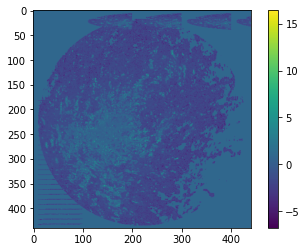

In [88]:
plt.imshow(c)
plt.colorbar()
plt.show()

In [85]:
pd = [u,delta,c]
print(len(pd))
print(len(pd[0]))
print(len(pd[0][0]))
print(pd[0][0][0])

3
440
440
0.0


In [86]:
# Save GPD parameters
np.save("E://thesis_datasets/gpd_44.npy", pd)